# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learned, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [13]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [14]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
reward: -0.0006344622803826638
reward: -0.002537789098925701
reward: -0.005709781728164669
reward: -0.00978324816168176
reward: -0.014391021870335094
reward: -0.01953286539166524
reward: -0.025484156328066773
reward: -0.03252007546094487
reward: -0.040639926040527075
reward: -0.04968970259985878
reward: -0.0595154464832176
reward: -0.07011648134418363
reward: -0.0814512314557663
reward: -0.09347813212972027
reward: -0.10619649772754296
reward: -0.12018236757619098
reward: -0.13601092704439205
reward: -0.15367961366674732
reward: -0.17225326396460988
reward: -0.1907982250134094
reward: -0.20931481578733077
reward: -0.22832070731276535
reward: -0.248332627480361
reward: -0.2693490025676796
reward: -0.29157012516358954
reward: -0.31519577034643514
reward: -0.3402232261477925
reward: -0.3663446922162769
reward: -0.3932530417952353
reward: -0.42094682672815337
reward: -0.44933628875953535
reward: -0.4783

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

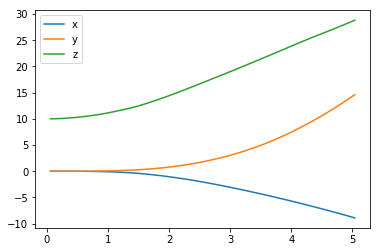

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

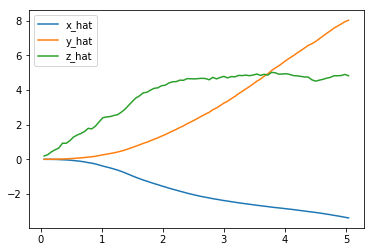

In [16]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

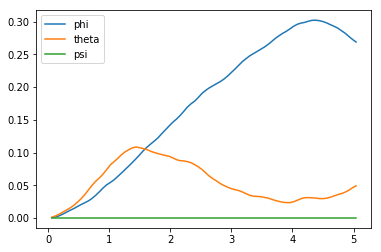

In [17]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

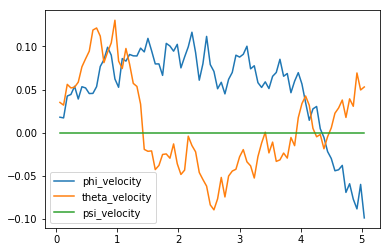

In [18]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

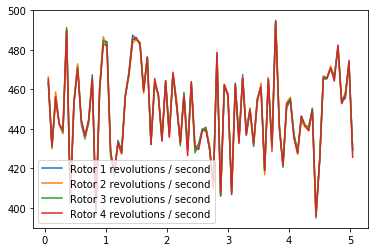

In [19]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [20]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -8.91530175  14.61551495  28.82177743   0.26898436   0.04903648   0.        ]
[-3.38656068  8.03208201  4.82663224]
[-0.09870134  0.05300027  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [15]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.540 (best =   0.136), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
Test 2: #Test 4

In [1]:
## TODO: Train your agent here.
import csv
import numpy as np
import sys
import pandas as pd
from agents.agent import Agent
from task import Task

runtime = 5.                                     # time limit of the episode
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
num_episodes = 2000

# Test cases
# target_pos = np.array([0., 0., 10.])             # hover in place
# target_pos = np.array([0., 0., 0.])              # land
# target_pos = np.array([10., 10., 20])            # move
# init_pose = np.array([0., 0., 0., 0., 0., 0.])   # takeoff

# Test case: Takeoff
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial position(x, y, z) and Euler angles(phi, theta, psi)
target_pos = np.array([0., 0., 10.])             # target position

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = Agent(task)
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
scores = []

def run_episode(i_episode, is_validation=False, writer=None):
    state = agent.reset_episode()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state

        if is_validation:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            if not writer:
                writer.writerow(to_write)
        
    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(i_episode, agent.score, agent.best_score), end="")
    sys.stdout.flush()


for i_episode in range(1, num_episodes+1):
     # start a new episode
    run_episode(i_episode)
    scores.append(agent.score)

# Validation
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    run_episode(num_episodes+1, is_validation=True, writer=writer)
    

Using TensorFlow backend.


reward: 0.9727847379945274, tanh_reward: -0.999999988783774, total: -0.027215250789246692
reward: 0.972788609970303, tanh_reward: -0.999999988751815, total: -0.02721137878151192
reward: 0.9727950629089313, tanh_reward: -0.9999999886983503, total: -0.02720492578941902
reward: 0.9728045932462657, tanh_reward: -0.9999999886189233, total: -0.027195395372657583
reward: 0.9728176957166098, tanh_reward: -0.9999999885088134, total: -0.027182292792203633
reward: 0.9728343488981095, tanh_reward: -0.9999999883673255, total: -0.02716563946921602
reward: 0.9728539562471796, tanh_reward: -0.9999999881985023, total: -0.027146031951322702
reward: 0.972875780712684, tanh_reward: -0.9999999880076978, total: -0.027124207295013858
reward: 0.9728994310318406, tanh_reward: -0.9999999877974147, total: -0.027100556765574102
reward: 0.9729243603212928, tanh_reward: -0.9999999875716805, total: -0.0270756272503877
reward: 0.9729498998715402, tanh_reward: -0.9999999873358927, total: -0.027050087464352446
reward: 

Episode =    3, score =    -inf (best =    -inf)reward: 0.9727847372878171, tanh_reward: -0.9999999887837799, total: -0.027215251495962822
reward: 0.9727886071435493, tanh_reward: -0.9999999887518384, total: -0.027211381608289065
reward: 0.9727950565490604, tanh_reward: -0.9999999886984031, total: -0.02720493214934272
reward: 0.97280408605328, tanh_reward: -0.9999999886231643, total: -0.027195902569884356
reward: 0.9728156959652823, tanh_reward: -0.9999999885256875, total: -0.02718429256040522
reward: 0.972829885245241, tanh_reward: -0.9999999884054195, total: -0.027170103160178427
reward: 0.9728466595750338, tanh_reward: -0.9999999882616136, total: -0.027153328686579825
reward: 0.9728660243914866, tanh_reward: -0.9999999880933802, total: -0.027133963701893582
reward: 0.9728879779230297, tanh_reward: -0.9999999878997391, total: -0.027112009976709373
reward: 0.9729125241092411, tanh_reward: -0.9999999876794979, total: -0.02708746357025682
reward: 0.972939666638829, tanh_reward: -0.99999

reward: 0.972998772386525, tanh_reward: -0.9999999868706445, total: -0.027001214484119518
reward: 0.9730211165277954, tanh_reward: -0.9999999866507097, total: -0.026978870122914222
reward: 0.9730404898661199, tanh_reward: -0.9999999864549685, total: -0.026959496588848553
reward: 0.9730558166505671, tanh_reward: -0.9999999862946679, total: -0.026944169644100846
reward: 0.9730659716337291, tanh_reward: -0.9999999861816146, total: -0.026934014547885465
reward: 0.9730697948512778, tanh_reward: -0.9999999861277007, total: -0.026930191276422932
reward: 0.9730661011645678, tanh_reward: -0.9999999861443839, total: -0.02693388497981608
reward: 0.9730536915241208, tanh_reward: -0.9999999862420735, total: -0.026946294717952735
reward: 0.9730313624081376, tanh_reward: -0.9999999864294882, total: -0.026968624021350585
reward: 0.9729979206500157, tanh_reward: -0.9999999867129523, total: -0.027002066062936647
reward: 0.9729521952675441, tanh_reward: -0.9999999870957874, total: -0.02704779182824335
re

reward: 0.9728085676581334, tanh_reward: -0.9999999885856352, total: -0.02719142092750182
reward: 0.9728292010089606, tanh_reward: -0.9999999884112479, total: -0.02717078740228729
reward: 0.9728579345872724, tanh_reward: -0.999999988163952, total: -0.027142053576679537
reward: 0.9728947094599286, tanh_reward: -0.9999999878397302, total: -0.02710527837980159
reward: 0.9729391197037861, tanh_reward: -0.9999999874363062, total: -0.027060867732520144
reward: 0.9729900197020034, tanh_reward: -0.9999999869573399, total: -0.027009967255336553
reward: 0.9730455433496765, tanh_reward: -0.9999999864136936, total: -0.026954443064017064
reward: 0.9731026691290908, tanh_reward: -0.9999999858298466, total: -0.02689731670075579
reward: 0.9731569739482014, tanh_reward: -0.9999999852496492, total: -0.026843011301447728
reward: 0.9732029848022707, tanh_reward: -0.9999999847355264, total: -0.026796999933255683
reward: 0.9732345098197591, tanh_reward: -0.999999984365163, total: -0.0267654745454039
reward:

reward: 0.9738997026011381, tanh_reward: -0.9999999745469871, total: -0.026100271945848963
reward: 0.9740543756937863, tanh_reward: -0.9999999714788427, total: -0.025945595785056397
reward: 0.974209066769282, tanh_reward: -0.9999999680365973, total: -0.025790901267315314
reward: 0.9743627877303398, tanh_reward: -0.9999999641975157, total: -0.025637176467175893
reward: 0.9745143324848542, tanh_reward: -0.9999999599495195, total: -0.025485627464665317
reward: 0.9746617925017242, tanh_reward: -0.9999999553126768, total: -0.02533816281095258
reward: 0.9748034207217275, tanh_reward: -0.9999999503221205, total: -0.02519652960039298
reward: 0.9749373002349718, tanh_reward: -0.9999999450420396, total: -0.02506264480706777
reward: 0.9750611445517772, tanh_reward: -0.9999999395818515, total: -0.024938795030074346
reward: 0.9751726157549747, tanh_reward: -0.9999999340877231, total: -0.024827318332748427
reward: 0.9752693241774374, tanh_reward: -0.9999999287432957, total: -0.024730604565858294
rew

Episode =   13, score =  -4.056 (best =  -0.077)reward: 0.9727852654549031, tanh_reward: -0.9999999887794258, total: -0.027214723324522683
reward: 0.9727907197331706, tanh_reward: -0.9999999887343628, total: -0.02720926900119225
reward: 0.9727998095276655, tanh_reward: -0.9999999886588609, total: -0.027200179131195323
reward: 0.9728283942984647, tanh_reward: -0.9999999884181158, total: -0.027171594119651088
reward: 0.9728923138170079, tanh_reward: -0.9999999878611234, total: -0.027107674044115515
reward: 0.9729915028764616, tanh_reward: -0.9999999869432916, total: -0.027008484066829985
reward: 0.9731259566841438, tanh_reward: -0.9999999855873654, total: -0.026874028903221547
reward: 0.9732956096430272, tanh_reward: -0.9999999836737378, total: -0.026704374030710576
reward: 0.9735002123768842, tanh_reward: -0.9999999810248681, total: -0.026499768647983868
reward: 0.9737395779109013, tanh_reward: -0.9999999773754976, total: -0.02626039946459635
reward: 0.9740134227706212, tanh_reward: -0.

reward: -3.5517484675245234, tanh_reward: -1.0, total: -4.551748467524524
reward: -3.619751789771145, tanh_reward: -1.0, total: -4.619751789771145
reward: -3.6866964081945555, tanh_reward: -1.0, total: -4.686696408194555
reward: -3.752495668635911, tanh_reward: -1.0, total: -4.752495668635911
reward: -3.8170679155183413, tanh_reward: -1.0, total: -4.817067915518342
reward: -3.880336855734538, tanh_reward: -1.0, total: -4.880336855734538
reward: -3.9422320673400564, tanh_reward: -1.0, total: -4.942232067340056
reward: -4.00268957870397, tanh_reward: -1.0, total: -5.00268957870397
reward: -4.061652450209616, tanh_reward: -1.0, total: -5.061652450209616
reward: -4.119071314220067, tanh_reward: -1.0, total: -5.119071314220067
reward: -4.174904567449897, tanh_reward: -1.0, total: -5.174904567449897
reward: -4.229118541872583, tanh_reward: -1.0, total: -5.229118541872583
reward: -4.281687926327004, tanh_reward: -1.0, total: -5.281687926327004
reward: -4.332596338949476, tanh_reward: -1.0, to

reward: -11.029731955759683, tanh_reward: -1.0, total: -12.029731955759683
reward: -11.23216699049372, tanh_reward: -1.0, total: -12.23216699049372
reward: -11.441496029275884, tanh_reward: -1.0, total: -12.441496029275884
reward: -11.658091778390002, tanh_reward: -1.0, total: -12.658091778390002
reward: -11.882367897037645, tanh_reward: -1.0, total: -12.882367897037645
reward: -12.11478504679147, tanh_reward: -1.0, total: -13.11478504679147
reward: -12.35585806699671, tanh_reward: -1.0, total: -13.35585806699671
reward: -12.60616442924393, tanh_reward: -1.0, total: -13.60616442924393
reward: -12.866354349735229, tanh_reward: -1.0, total: -13.866354349735229
reward: -13.137163206484383, tanh_reward: -1.0, total: -14.137163206484383
reward: -13.419426880299188, tanh_reward: -1.0, total: -14.419426880299188
reward: -13.714100757988685, tanh_reward: -1.0, total: -14.714100757988685
reward: -14.022283497226391, tanh_reward: -1.0, total: -15.022283497226391
reward: -14.345246990843737, tanh

reward: 0.9751316451353239, tanh_reward: -0.9999999277144765, total: -0.024868282579152634
reward: 0.9748535041880989, tanh_reward: -0.9999999401315979, total: -0.025146435943498968
reward: 0.9745357665245601, tanh_reward: -0.9999999519642021, total: -0.025464185439642018
reward: 0.9741820306786266, tanh_reward: -0.9999999625861881, total: -0.02581793190756143
reward: 0.9737954722968627, tanh_reward: -0.999999971658528, total: -0.026204499361665357
reward: 0.973378895985554, tanh_reward: -0.9999999790811283, total: -0.026621083095574205
reward: 0.9729344812782059, tanh_reward: -0.9999999849316312, total: -0.027065503653425305
reward: -1.0090229765247334, tanh_reward: -0.9999999887944072, total: -2.0090229653191405
reward: -1.0087490521219353, tanh_reward: -0.9999999887944072, total: -2.0087490409163427
Episode =   16, score =  -0.438 (best =   0.303)reward: 0.9727863597866, tanh_reward: -0.999999988770399, total: -0.027213628983798976
reward: 0.97279509683056, tanh_reward: -0.999999988

Episode =   17, score =  -0.367 (best =   0.303)reward: 0.9727868546310152, tanh_reward: -0.9999999887663148, total: -0.027213134135299577
reward: 0.9727970760723836, tanh_reward: -0.9999999886816187, total: -0.02720291260923502
reward: 0.9728141096410953, tanh_reward: -0.9999999885390554, total: -0.027185878897960092
reward: 0.9728502805821255, tanh_reward: -0.9999999882303375, total: -0.027149707648212007
reward: 0.9729178837655813, tanh_reward: -0.9999999876308774, total: -0.02708210386529608
reward: 0.9730167141143556, tanh_reward: -0.999999986699139, total: -0.02698327258478339
reward: 0.9731461208302661, tanh_reward: -0.999999985372163, total: -0.026853864541896866
reward: 0.9733041189634081, tanh_reward: -0.9999999835709288, total: -0.026695864607520714
reward: 0.9734863225449224, tanh_reward: -0.9999999812154262, total: -0.026513658670503815
reward: 0.9736855802812738, tanh_reward: -0.9999999782468543, total: -0.02631439796558044
reward: 0.9738910202165354, tanh_reward: -0.9999

reward: 0.9732212749169978, tanh_reward: -0.999999984541608, total: -0.026778709624610153
reward: 0.9734168426068281, tanh_reward: -0.9999999821523312, total: -0.026583139545503065
reward: 0.973649155913892, tanh_reward: -0.9999999788293394, total: -0.026350822915447436
reward: 0.9739169268993412, tanh_reward: -0.9999999742233142, total: -0.02608304732397304
reward: 0.9742180451861299, tanh_reward: -0.9999999678323711, total: -0.02578192264624124
reward: 0.9745491032765476, tanh_reward: -0.9999999589524655, total: -0.02545085567591787
reward: 0.9749058801093519, tanh_reward: -0.9999999465929216, total: -0.02509406648356971
reward: 0.9752828474720097, tanh_reward: -0.9999999294042516, total: -0.02471708193224198
reward: 0.9756728340671653, tanh_reward: -0.9999999056325161, total: -0.024327071565350744
reward: 0.9760675663353792, tanh_reward: -0.9999998730892873, total: -0.023932306753908117
reward: 0.9764575725013845, tanh_reward: -0.9999998292615235, total: -0.02354225676013899
reward:

Episode =   21, score =  -1.888 (best =   0.303)reward: 0.9727880808035947, tanh_reward: -0.9999999887561881, total: -0.027211907952593428
reward: 0.9728019803035626, tanh_reward: -0.9999999886407552, total: -0.02719800833719266
reward: 0.9728251414470422, tanh_reward: -0.9999999884457674, total: -0.02717484699872519
reward: 0.972873393639128, tanh_reward: -0.9999999880287275, total: -0.027126594389599523
reward: 0.9729625097779944, tanh_reward: -0.9999999872185256, total: -0.0270374774405312
reward: 0.9730923221047187, tanh_reward: -0.9999999859392052, total: -0.026907663834486506
reward: 0.9732625896593214, tanh_reward: -0.9999999840650289, total: -0.026737394405707438
reward: 0.9734729461892492, tanh_reward: -0.9999999814009448, total: -0.026527035211695638
reward: 0.9737228427599581, tanh_reward: -0.9999999776509664, total: -0.026277134891008247
reward: 0.9740116333354599, tanh_reward: -0.999999972365059, total: -0.025988339029599072
reward: 0.9743384543726593, tanh_reward: -0.9999

reward: 0.9765398518611101, tanh_reward: -0.9999998213042952, total: -0.02345996944318507
reward: 0.9770618985067108, tanh_reward: -0.9999997363729292, total: -0.02293783786621839
reward: 0.9776071114784016, tanh_reward: -0.9999996034176838, total: -0.022392491939282166
reward: 0.9781719747550811, tanh_reward: -0.9999993926711129, total: -0.02182741791603182
reward: 0.9787525080360377, tanh_reward: -0.9999990548332985, total: -0.02124654679726079
reward: 0.9793441586965826, tanh_reward: -0.9999985079378689, total: -0.020654349241286285
reward: 0.9799418509615289, tanh_reward: -0.9999976151749081, total: -0.02005576421337929
reward: 0.980539882855054, tanh_reward: -0.9999961478318297, total: -0.01945626497677566
reward: 0.9811318344553498, tanh_reward: -0.9999937236366001, total: -0.018861889181250313
reward: 0.9817105436760618, tanh_reward: -0.999989704489158, total: -0.018279160813096218
reward: 0.9822680454133726, tanh_reward: -0.9999830286029953, total: -0.017714983189622613
reward:

reward: -4.159936877503744, tanh_reward: -0.9998916552699851, total: -5.159828532773729
reward: -4.205273171784555, tanh_reward: -0.9999252107652813, total: -5.205198382549836
reward: -4.250710097224802, tanh_reward: -0.9999490310702145, total: -5.250659128295017
reward: -4.296306785598383, tanh_reward: -0.9999657318810307, total: -5.296272517479414
reward: -4.342127243219666, tanh_reward: -0.9999772875013243, total: -5.342104530720991
reward: -4.388240745535347, tanh_reward: -0.9999851717633808, total: -5.388225917298728
reward: -4.434722095942144, tanh_reward: -0.9999904717472267, total: -5.43471256768937
reward: -4.481651793636053, tanh_reward: -0.9999939789108597, total: -5.481645772546913
reward: -4.529116177737286, tanh_reward: -0.9999962614470105, total: -5.5291124391842965
reward: -4.577207662389613, tanh_reward: -0.9999977211415824, total: -5.577205383531195
reward: -4.626025116594993, tanh_reward: -0.9999986375362807, total: -5.626023754131273
reward: -4.675674246424746, tanh

reward: -2.274099163042239, tanh_reward: -0.8526033597358307, total: -3.1267025227780696
reward: -2.33022908615618, tanh_reward: -0.884809539676784, total: -3.215038625832964
reward: -2.3863161870106584, tanh_reward: -0.9109281532164664, total: -3.2972443402271248
reward: -2.4423339657514416, tanh_reward: -0.931855953522498, total: -3.3741899192739395
reward: -2.49825642792061, tanh_reward: -0.9484266608444358, total: -3.446683088765046
reward: -2.5540581300986545, tanh_reward: -0.961393644933839, total: -3.5154517750324934
reward: -2.6097141249399347, tanh_reward: -0.9714214790769898, total: -3.5811356040169247
reward: -2.6651999059870124, tanh_reward: -0.9790844814099283, total: -3.6442843873969406
reward: -2.7204913123542935, tanh_reward: -0.9848699830788525, total: -3.7053612954331463
reward: -2.7755645066529273, tanh_reward: -0.9891845836366232, total: -3.7647490902895506
reward: -2.830396040464244, tanh_reward: -0.992362162963384, total: -3.822758203427628
reward: -2.884962962974

reward: -7.632526180653734, tanh_reward: -1.0, total: -8.632526180653734
reward: -7.7794393562878295, tanh_reward: -1.0, total: -8.77943935628783
reward: -7.934416693330616, tanh_reward: -1.0, total: -8.934416693330615
reward: -8.098002817614812, tanh_reward: -1.0, total: -9.098002817614812
reward: -8.270800166539699, tanh_reward: -1.0, total: -9.270800166539699
reward: -8.45347894475729, tanh_reward: -1.0, total: -9.45347894475729
reward: -8.646789265529865, tanh_reward: -1.0, total: -9.646789265529865
reward: -8.85157613419247, tanh_reward: -1.0, total: -9.85157613419247
reward: -9.06879802225214, tanh_reward: -1.0, total: -10.06879802225214
reward: -9.29954987665245, tanh_reward: -1.0, total: -10.29954987665245
reward: -9.545092109948571, tanh_reward: -1.0, total: -10.545092109948571
reward: -9.806887473933124, tanh_reward: -1.0, total: -10.806887473933124
reward: -10.086648392338802, tanh_reward: -1.0, total: -11.086648392338802
reward: -10.386398545903106, tanh_reward: -1.0, total

reward: -2.186923566906359, tanh_reward: -0.6140351499087842, total: -2.800958716815143
reward: -2.2371814741884384, tanh_reward: -0.5478780930061801, total: -2.7850595671946183
reward: -2.287130345142928, tanh_reward: -0.47016924294752294, total: -2.7572995880904507
reward: -2.3367344012231315, tanh_reward: -0.37988771647715847, total: -2.71662211770029
reward: -2.38595913863544, tanh_reward: -0.27662471809414985, total: -2.66258385672959
reward: -2.4347714123915334, tanh_reward: -0.16094957784474748, total: -2.595720990236281
reward: -2.483139646513686, tanh_reward: -0.03475385554481098, total: -2.517893502058497
reward: -2.531033762470675, tanh_reward: 0.0985774925728428, total: -2.4324562698978323
reward: -2.5784251081097054, tanh_reward: 0.23431528299624976, total: -2.344109825113456
reward: -2.625286689526978, tanh_reward: 0.3669262513329303, total: -2.258360438194048
reward: -2.6715932384292587, tanh_reward: 0.43228839556819626, total: -2.2393048428610625
reward: -2.717321271056

reward: -8.420489749232674, tanh_reward: -1.0, total: -9.420489749232674
reward: -8.57608147649226, tanh_reward: -1.0, total: -9.57608147649226
reward: -8.734197390501013, tanh_reward: -1.0, total: -9.734197390501013
reward: -8.894934052850186, tanh_reward: -1.0, total: -9.894934052850186
reward: -9.058403580675229, tanh_reward: -1.0, total: -10.058403580675229
reward: -9.224735566194466, tanh_reward: -1.0, total: -10.224735566194466
reward: -9.394077938804367, tanh_reward: -1.0, total: -10.394077938804367
reward: -9.566598399030083, tanh_reward: -1.0, total: -10.566598399030083
reward: -9.742485875853646, tanh_reward: -1.0, total: -10.742485875853646
reward: -9.921952446141102, tanh_reward: -1.0, total: -10.921952446141102
reward: -10.105236244299089, tanh_reward: -1.0, total: -11.105236244299089
reward: -10.292605284327689, tanh_reward: -1.0, total: -11.292605284327689
reward: -10.484361667907653, tanh_reward: -1.0, total: -11.484361667907653
reward: -10.680846711730107, tanh_reward:

reward: -1.7785940719175812, tanh_reward: -0.9999998863130508, total: -2.778593958230632
reward: -1.8248203793454763, tanh_reward: -0.9999999324514558, total: -2.824820311796932
reward: -1.8707980013916963, tanh_reward: -0.9999999605429964, total: -2.870797961934693
reward: -1.916485391949983, tanh_reward: -0.9999999773251187, total: -2.916485369275102
reward: -1.9618458369311267, tanh_reward: -0.9999999871717214, total: -2.961845824102848
reward: -1.995492706357862, tanh_reward: -0.9999999887944072, total: -2.995492695152269
Episode =   26, score =  -2.787 (best =   0.303)reward: 0.9727927503578034, tanh_reward: -0.9999999887175397, total: -0.027207238359736263
reward: 0.9728206550494861, tanh_reward: -0.9999999884837969, total: -0.027179333434310782
reward: 0.9728671330892693, tanh_reward: -0.9999999880836754, total: -0.027132854994406097
reward: 0.9729432322953973, tanh_reward: -0.9999999873983101, total: -0.027056755102912833
reward: 0.9730597173705865, tanh_reward: -0.999999986272

reward: 0.973497345638905, tanh_reward: -0.9999994509445348, total: -0.026502105305629797
reward: -1.0035233467761773, tanh_reward: -0.9999995832677936, total: -2.003522930043971
reward: -1.0349705117708716, tanh_reward: -0.9999996959269702, total: -2.034970207697842
reward: -1.0678906357644984, tanh_reward: -0.9999997864914772, total: -2.0678904222559757
reward: -1.102071379768767, tanh_reward: -0.9999998555582106, total: -2.1020712353269775
reward: -1.1373110823932264, tanh_reward: -0.9999999057215749, total: -2.1373109881148014
reward: -1.1734203642579912, tanh_reward: -0.9999999405377132, total: -2.1734203047957044
reward: -1.2102228787553118, tanh_reward: -0.9999999636999954, total: -2.210222842455307
reward: -1.2475555168385082, tanh_reward: -0.9999999785126432, total: -2.2475554953511514
reward: -1.2852683705517813, tanh_reward: -0.9999999876437868, total: -2.285268358195568
reward: -1.3046393802564942, tanh_reward: -0.9999999887944072, total: -2.3046393690509013
reward: -1.3196

reward: 0.972954557525137, tanh_reward: -0.9999999872929957, total: -0.02704542976785862
reward: 0.9730710943846438, tanh_reward: -0.9999999861567962, total: -0.026928891772152408
reward: 0.9732233564461027, tanh_reward: -0.9999999845175781, total: -0.026776628071475406
reward: 0.9734094777704629, tanh_reward: -0.9999999822469996, total: -0.02659050447653666
reward: 0.9736262933906785, tanh_reward: -0.9999999791759097, total: -0.026373685785231138
reward: 0.9738687858093323, tanh_reward: -0.999999975099805, total: -0.026131189290472645
reward: 0.9741305937078949, tanh_reward: -0.9999999697795713, total: -0.025869376071676387
reward: 0.9744034538644261, tanh_reward: -0.9999999629776728, total: -0.025596509113246735
reward: 0.974677037491336, tanh_reward: -0.9999999545280125, total: -0.02532291703667644
reward: 0.9749397980361025, tanh_reward: -0.999999944419148, total: -0.025060146383045434
reward: 0.9751793733653206, tanh_reward: -0.9999999329135736, total: -0.02482055954825302
reward:

reward: 0.9738471924913915, tanh_reward: -0.9999999754731457, total: -0.026152782981754163
reward: 0.9740455086498871, tanh_reward: -0.9999999715659834, total: -0.025954462916096266
reward: 0.9742357617574527, tanh_reward: -0.999999967171451, total: -0.025764205413998265
reward: 0.9744045982250852, tanh_reward: -0.9999999625857623, total: -0.02559536436067711
reward: 0.9745384068021828, tanh_reward: -0.9999999582820279, total: -0.02546155147984508
reward: 0.9746249727137943, tanh_reward: -0.9999999548511442, total: -0.0253749821373499
reward: 0.9746539901547974, tanh_reward: -0.9999999528975566, total: -0.025345962742759243
reward: 0.9746180315479792, tanh_reward: -0.9999999528725514, total: -0.025381921324572176
reward: 0.9745133378054585, tanh_reward: -0.9999999549169207, total: -0.025486617111462273
reward: 0.9743393630769625, tanh_reward: -0.999999958818711, total: -0.025660595741748504
reward: 0.9740986194104985, tanh_reward: -0.9999999640654799, total: -0.025901344654981395
rewar

reward: 0.9741368139581137, tanh_reward: -0.999999964565069, total: -0.02586315060695532
reward: 0.9738862983190166, tanh_reward: -0.9999999694483013, total: -0.026113671129284644
reward: 0.9735870047486838, tanh_reward: -0.9999999745866731, total: -0.026412969837989353
reward: 0.9732476045113184, tanh_reward: -0.9999999795105403, total: -0.026752374999221895
reward: 0.9728772583877008, tanh_reward: -0.9999999839050103, total: -0.027122725517309543
reward: -1.0109631807290866, tanh_reward: -0.9999999876150678, total: -2.0109631683441545
reward: -1.0171478797450022, tanh_reward: -0.9999999887944072, total: -2.0171478685394093
reward: -1.0181329368310823, tanh_reward: -0.9999999887944072, total: -2.0181329256254896
reward: -1.01881417499729, tanh_reward: -0.9999999887944072, total: -2.0188141637916974
Episode =   37, score =  -0.963 (best =   0.303)reward: 0.9727943119183213, tanh_reward: -0.9999999887045855, total: -0.027205676786264177
reward: 0.9728268988567202, tanh_reward: -0.999999

Episode =   40, score =  -0.741 (best =   0.303)reward: 0.9727949353923925, tanh_reward: -0.9999999886994093, total: -0.027205053307016835
reward: 0.9728293922837423, tanh_reward: -0.9999999884096189, total: -0.027170596125876578
reward: 0.9728867649377578, tanh_reward: -0.9999999879105194, total: -0.02711322297276153
reward: 0.972967960191801, tanh_reward: -0.9999999871672256, total: -0.027032026975424617
reward: 0.9730735188870739, tanh_reward: -0.9999999861321092, total: -0.026926467245035224
reward: 0.9732022130796454, tanh_reward: -0.9999999847563028, total: -0.026797771676657423
reward: 0.9733551908926245, tanh_reward: -0.9999999829414274, total: -0.02664479204880299
reward: 0.9735318357079007, tanh_reward: -0.9999999805727176, total: -0.026468144864816856
reward: 0.9737260539342256, tanh_reward: -0.9999999775799331, total: -0.026273923645707464
reward: 0.9739311096237706, tanh_reward: -0.9999999739009137, total: -0.026068864277143056
reward: 0.9741380576377993, tanh_reward: -0.9

reward: 0.975294803681232, tanh_reward: -0.9999998939570157, total: -0.024705090275783714
reward: 0.9751925805099458, tanh_reward: -0.9999998922450667, total: -0.02480731173512085
reward: 0.9750681798574224, tanh_reward: -0.9999998912335013, total: -0.024931711376078858
reward: 0.9749261566115487, tanh_reward: -0.9999998906490631, total: -0.02507373403751445
reward: 0.974770836100562, tanh_reward: -0.9999998902417826, total: -0.025229054141220564
reward: 0.9746061393732742, tanh_reward: -0.9999998898058691, total: -0.02539375043259484
reward: 0.9744354621934411, tanh_reward: -0.9999998891907547, total: -0.02556442699731354
reward: 0.9742615966500691, tanh_reward: -0.999999888305746, total: -0.02573829165567698
reward: 0.9740866919631234, tanh_reward: -0.9999998871212415, total: -0.025913195158118185
reward: 0.9739122504404846, tanh_reward: -0.9999998856685594, total: -0.02608763522807478
reward: 0.973739134627663, tanh_reward: -0.9999998840402401, total: -0.026260749412577056
reward: 0

reward: -1.2365331530361563, tanh_reward: -0.9999974685000619, total: -2.236530621536218
reward: -1.276670079085167, tanh_reward: -0.999998122092147, total: -2.276668201177314
reward: -1.3186864930799231, tanh_reward: -0.9999986206190187, total: -2.3186851136989417
reward: -1.3624926727839022, tanh_reward: -0.9999989958506073, total: -2.3624916686345094
reward: -1.407998004291002, tanh_reward: -0.9999992749400047, total: -2.4079972792310067
reward: -1.4551119474255003, tanh_reward: -0.9999994803266599, total: -2.4551114277521604
reward: -1.5037454154467655, tanh_reward: -0.9999996300493662, total: -2.5037450454961316
reward: -1.5538122030204207, tanh_reward: -0.9999997382770817, total: -2.553811941297502
reward: -1.605230409505913, tanh_reward: -0.9999998159228434, total: -2.6052302254287563
reward: -1.6579235438034794, tanh_reward: -0.999999871252798, total: -2.6579234150562776
reward: -1.7118217786745604, tanh_reward: -0.9999999104393126, total: -2.711821689113873
reward: -1.76686306

reward: 0.9831489870879714, tanh_reward: -0.9953898046051001, total: -0.012240817517128688
reward: 0.9823861669635225, tanh_reward: -0.9971057925088473, total: -0.0147196255453248
reward: 0.9815373978629806, tanh_reward: -0.9982087039670741, total: -0.01667130610409351
reward: 0.9806099487238908, tanh_reward: -0.9989077114811551, total: -0.018297762757264247
reward: 0.9796110101123954, tanh_reward: -0.9993442180132888, total: -0.01973320790089339
reward: 0.9785474644932844, tanh_reward: -0.9996125871415824, total: -0.021065122648297963
reward: 0.9774257561345255, tanh_reward: -0.9997749140643807, total: -0.022349157929855146
reward: 0.9762518330776075, tanh_reward: -0.9998714465561954, total: -0.023619613478587875
reward: 0.9750311334430961, tanh_reward: -0.9999278526355193, total: -0.0248967191924232
reward: 0.9737685844600316, tanh_reward: -0.9999602225292257, total: -0.026191638069194112
reward: -1.0115672890125191, tanh_reward: -0.9999784597369861, total: -2.011545748749505
reward:

reward: -8.73651015871975, tanh_reward: -1.0, total: -9.73651015871975
reward: -8.824030698630265, tanh_reward: -1.0, total: -9.824030698630265
reward: -8.910997468782261, tanh_reward: -1.0, total: -9.910997468782261
reward: -8.997419732077049, tanh_reward: -1.0, total: -9.997419732077049
reward: -9.08330596097827, tanh_reward: -1.0, total: -10.08330596097827
reward: -9.168663710303578, tanh_reward: -1.0, total: -10.168663710303578
reward: -9.25349968494847, tanh_reward: -1.0, total: -10.25349968494847
reward: -9.337819690295396, tanh_reward: -1.0, total: -10.337819690295396
reward: -9.42162859358174, tanh_reward: -1.0, total: -10.42162859358174
reward: -9.504930432504114, tanh_reward: -1.0, total: -10.504930432504114
reward: -9.587728298789106, tanh_reward: -1.0, total: -10.587728298789106
reward: -9.670024223049712, tanh_reward: -1.0, total: -10.670024223049712
reward: -9.751819324385956, tanh_reward: -1.0, total: -10.751819324385956
reward: -9.833113852281837, tanh_reward: -1.0, tot

reward: -1.023529870188605, tanh_reward: -0.9999976162089362, total: -2.0235274863975414
reward: -1.0481800410241342, tanh_reward: -0.9999972529079781, total: -2.0481772939321123
reward: -1.074955965363922, tanh_reward: -0.9999969007393233, total: -2.0749528661032453
reward: -1.1037377469151075, tanh_reward: -0.9999965876345523, total: -2.1037343345496597
reward: -1.1343717182290525, tanh_reward: -0.9999963435018704, total: -2.134368061730923
reward: -1.1666771501498912, tanh_reward: -0.9999961956110567, total: -2.1666733457609477
reward: -1.2004537554569557, tanh_reward: -0.9999961635645552, total: -2.2004499190215108
reward: -1.2354891357236972, tanh_reward: -0.999996255169955, total: -2.2354853908936523
reward: -1.271565651256699, tanh_reward: -0.9999964644433693, total: -2.2715621157000685
reward: -1.3084662750356775, tanh_reward: -0.999996772396857, total: -2.3084630474325345
reward: -1.3459794446288007, tanh_reward: -0.9999971504642746, total: -2.3459765950930755
reward: -1.38390

reward: 0.9747578360735142, tanh_reward: -0.999999885095895, total: -0.025242049022380808
reward: 0.9745330172719338, tanh_reward: -0.9999998816853325, total: -0.025466864413398738
reward: 0.9742503593351494, tanh_reward: -0.9999998799042744, total: -0.02574952056912505
reward: 0.9739028961657319, tanh_reward: -0.999999880376615, total: -0.026096984210883134
reward: 0.9734845740294927, tanh_reward: -0.9999998836359959, total: -0.026515309606503168
reward: 0.9729907691197055, tanh_reward: -0.9999998899848208, total: -0.02700912086511531
reward: -1.0134028941449236, tanh_reward: -0.9999998993681558, total: -2.0134027935130794
reward: -1.037325346809993, tanh_reward: -0.9999999113057417, total: -2.0373252581157346
reward: -1.0640909163971215, tanh_reward: -0.9999999249278112, total: -2.0640908413249326
reward: -1.0935585934742342, tanh_reward: -0.9999999391261248, total: -2.093558532600359
reward: -1.125512642509543, tanh_reward: -0.9999999527761938, total: -2.1255125952857368
reward: -1.

reward: -1.24743961887769, tanh_reward: -0.9999999111157539, total: -2.2474395299934438
reward: -1.2884644291348337, tanh_reward: -0.9999999325541616, total: -2.2884643616889955
reward: -1.3311754321501015, tanh_reward: -0.9999999510198933, total: -2.331175383169995
reward: -1.3753150289739147, tanh_reward: -0.9999999659632756, total: -2.3753149949371903
reward: -1.4206187414159779, tanh_reward: -0.9999999773552304, total: -2.420618718771208
reward: -1.4668229178749175, tanh_reward: -0.9999999855593091, total: -2.4668229034342266
reward: -1.5057801187822326, tanh_reward: -0.9999999887944072, total: -2.5057801075766397
reward: -1.5357178117978418, tanh_reward: -0.9999999887944072, total: -2.535717800592249
reward: -1.5650228604204732, tanh_reward: -0.9999999887944072, total: -2.5650228492148806
Episode =   50, score =  -2.456 (best =   0.468)reward: 0.9727978504500304, tanh_reward: -0.9999999886751761, total: -0.027202138225145722
reward: 0.9728410495947772, tanh_reward: -0.999999988309

reward: 0.9756853529821049, tanh_reward: -0.9999994952037387, total: -0.02431414222163375
reward: 0.9754324922262462, tanh_reward: -0.9999994282035568, total: -0.024566935977310633
reward: 0.9751372149756474, tanh_reward: -0.9999993481814925, total: -0.02486213320584507
reward: 0.9747973882500848, tanh_reward: -0.9999992521559821, total: -0.025201863905897293
reward: 0.9744108577085184, tanh_reward: -0.9999991366549477, total: -0.025588278946429233
reward: 0.9739755505866183, tanh_reward: -0.9999989976926861, total: -0.026023447106067743
reward: 0.9734895620901373, tanh_reward: -0.999998830797725, total: -0.02650926870758774
reward: 0.9729512262642126, tanh_reward: -0.9999986311311844, total: -0.02704740486697177
reward: -1.0155887855539651, tanh_reward: -0.999998393744303, total: -2.0155871792982682
reward: -1.0393534342544704, tanh_reward: -0.999998114031058, total: -2.0393515482855284
reward: -1.0651526884436229, tanh_reward: -0.9999977884352305, total: -2.0651504768788533
reward: -

reward: -1.4072844012637267, tanh_reward: -0.9947312374049693, total: -2.402015638668696
reward: -1.4458941740878644, tanh_reward: -0.9916058198314679, total: -2.4374999939193325
reward: -1.4850252283849916, tanh_reward: -0.9866456793872364, total: -2.471670907772228
reward: -1.524579567364202, tanh_reward: -0.9788391293850716, total: -2.5034186967492733
reward: -1.5644587972037018, tanh_reward: -0.9666947866223887, total: -2.5311535838260903
reward: -1.604564887195994, tanh_reward: -0.9480923231152852, total: -2.5526572103112795
reward: -1.6448009399103611, tanh_reward: -0.9201629021279667, total: -2.5649638420383276
reward: -1.6850718058071557, tanh_reward: -0.8792868800042912, total: -2.564358685811447
reward: -1.7252846276615827, tanh_reward: -0.8213477111628954, total: -2.546632338824478
reward: -1.7653493906366353, tanh_reward: -0.7423977111697178, total: -2.507747101806353
reward: -1.8051793124277828, tanh_reward: -0.6397935318299572, total: -2.44497284425774
reward: -1.84469116

reward: -4.801280698877961, tanh_reward: -0.9999999844178814, total: -5.801280683295842
reward: -4.86772452381787, tanh_reward: -0.9999999884797146, total: -5.867724512297585
reward: -4.934481200000437, tanh_reward: -0.999999991426405, total: -5.934481191426842
reward: -5.001524406082396, tanh_reward: -0.9999999935781886, total: -6.0015243996605845
reward: -5.068831294097124, tanh_reward: -0.9999999951598476, total: -6.068831289256972
reward: -5.136382526980826, tanh_reward: -0.9999999963300493, total: -6.136382523310876
reward: -5.204162120835394, tanh_reward: -0.9999999972014403, total: -6.204162118036835
reward: -5.272157814308016, tanh_reward: -0.9999999978544526, total: -6.272157812162468
reward: -5.340361401603918, tanh_reward: -0.9999999983468534, total: -6.340361399950771
reward: -5.408768480150125, tanh_reward: -0.9999999987203836, total: -6.408768478870509
reward: -5.47737835789559, tanh_reward: -0.9999999990053866, total: -6.477378356900977
reward: -5.546193925769609, tanh_r

reward: 0.9769452145157255, tanh_reward: -0.99999975388758, total: -0.023054539371854532
reward: 0.9774007514313897, tanh_reward: -0.9999996499011762, total: -0.022598898469786466
reward: 0.9778543067183829, tanh_reward: -0.9999994989449932, total: -0.022145192226610266
reward: 0.9782996273695822, tanh_reward: -0.9999992802378888, total: -0.02169965286830655
reward: 0.9787301768950922, tanh_reward: -0.9999989645202054, total: -0.021268787625113195
reward: 0.979139181397608, tanh_reward: -0.9999985111066851, total: -0.020859329709077112
reward: 0.9795196966182187, tanh_reward: -0.999997864179597, total: -0.020478167561378324
reward: 0.9798646968290946, tanh_reward: -0.9999969482357564, total: -0.02013225140666175
reward: 0.9801671921020861, tanh_reward: -0.9999956626104338, total: -0.019828470508347684
reward: 0.9804203731093202, tanh_reward: -0.9999938750017457, total: -0.01957350189242557
reward: 0.9806177839370415, tanh_reward: -0.9999914139034215, total: -0.019373629966380035
reward

reward: -2.893543368562535, tanh_reward: -0.9999999999999961, total: -3.893543368562531
reward: -2.8973631591473588, tanh_reward: -0.9999999999999981, total: -3.897363159147357
reward: -2.900654887989883, tanh_reward: -0.999999999999999, total: -3.900654887989882
reward: -2.9034773620980006, tanh_reward: -0.9999999999999996, total: -3.903477362098
reward: -2.905891613139387, tanh_reward: -0.9999999999999998, total: -3.905891613139387
reward: -2.9079606091491463, tanh_reward: -0.9999999999999999, total: -3.9079606091491463
reward: -2.909748816646651, tanh_reward: -0.9999999999999999, total: -3.909748816646651
reward: -2.911321888959648, tanh_reward: -1.0, total: -3.911321888959648
reward: -2.9127463458375855, tanh_reward: -1.0, total: -3.9127463458375855
reward: -2.9140890844576295, tanh_reward: -1.0, total: -3.9140890844576295
reward: -2.915417127000242, tanh_reward: -1.0, total: -3.915417127000242
reward: -2.916797362888329, tanh_reward: -1.0, total: -3.916797362888329
reward: -2.9182

reward: -7.174688204992864, tanh_reward: -1.0, total: -8.174688204992865
reward: -7.244605226540853, tanh_reward: -1.0, total: -8.244605226540852
reward: -7.314886282354079, tanh_reward: -1.0, total: -8.31488628235408
reward: -7.385562726530743, tanh_reward: -1.0, total: -8.385562726530743
reward: -7.456669418879971, tanh_reward: -1.0, total: -8.456669418879972
reward: -7.52824490352411, tanh_reward: -1.0, total: -8.52824490352411
reward: -7.600331530207835, tanh_reward: -1.0, total: -8.600331530207836
reward: -7.672975711048087, tanh_reward: -1.0, total: -8.672975711048087
reward: -7.746228233969468, tanh_reward: -1.0, total: -8.746228233969468
reward: -7.820144597933573, tanh_reward: -1.0, total: -8.820144597933574
reward: -7.894785305121306, tanh_reward: -1.0, total: -8.894785305121307
reward: -7.970216244617241, tanh_reward: -1.0, total: -8.97021624461724
reward: -8.04650918637395, tanh_reward: -1.0, total: -9.04650918637395
reward: -8.123742208484149, tanh_reward: -1.0, total: -9.

reward: -1.977041382062793, tanh_reward: -0.9681926943749107, total: -2.945234076437704
reward: -2.0187309362081454, tanh_reward: -0.9636617108037181, total: -2.9823926470118636
reward: -2.05973445723119, tanh_reward: -0.9582260784842295, total: -3.0179605357154196
reward: -2.1000123270987565, tanh_reward: -0.9516783894975455, total: -3.051690716596302
reward: -2.1395275549576445, tanh_reward: -0.9437633733047407, total: -3.083290928262385
reward: -2.1782457112808, tanh_reward: -0.9341680142354586, total: -3.1124137255162587
reward: -2.2161345546343325, tanh_reward: -0.922510357842851, total: -3.1386449124771834
reward: -2.2531640578235748, tanh_reward: -0.9083283103028905, total: -3.1614923681264653
reward: -2.2893064029207033, tanh_reward: -0.8910695187643863, total: -3.1803759216850898
reward: -2.324535574247542, tanh_reward: -0.8700837626352458, total: -3.1946193368827878
reward: -2.3588272922502673, tanh_reward: -0.8446219057165879, total: -3.2034491979668553
reward: -2.3921589789

reward: 0.9757566785776721, tanh_reward: -0.9999999001094261, total: -0.024243221531753956
reward: 0.9762261651364962, tanh_reward: -0.9999998586314341, total: -0.023773693494937964
reward: 0.9767221084215141, tanh_reward: -0.9999997957079088, total: -0.023277687286394677
reward: 0.977241183054787, tanh_reward: -0.9999996990799814, total: -0.02275851602519441
reward: 0.9777796792339524, tanh_reward: -0.9999995490230917, total: -0.022219869789139368
reward: 0.9783334574939337, tanh_reward: -0.999999313656298, total: -0.021665856162364272
reward: 0.9788979134344535, tanh_reward: -0.999998941278823, total: -0.021101027844369513
reward: 0.979467924693268, tanh_reward: -0.9999983478971359, total: -0.020530423203867887
reward: 0.9800377943211913, tanh_reward: -0.999997397014696, total: -0.01995960269350472
reward: 0.9806011961105349, tanh_reward: -0.9999958670816017, total: -0.01939467097106684
reward: 0.9811511176122545, tanh_reward: -0.9999933995241709, total: -0.018842281911916392
reward:

reward: -3.8142580424999295, tanh_reward: -0.9984174851358526, total: -4.812675527635782
reward: -3.840482233787539, tanh_reward: -0.9984985586451666, total: -4.8389807924327055
reward: -3.865820101691829, tanh_reward: -0.9985757295639853, total: -4.864395831255814
reward: -3.890280143769681, tanh_reward: -0.998650144310268, total: -4.888930288079949
reward: -3.913873680398525, tanh_reward: -0.9987227891526056, total: -4.91259646955113
reward: -3.936614907779906, tanh_reward: -0.9987944858427439, total: -4.93540939362265
reward: -3.9585212287174714, tanh_reward: -0.998865885591812, total: -4.957387114309284
reward: -3.979613617722703, tanh_reward: -0.998937459826651, total: -4.978551077549354
reward: -3.999916969131731, tanh_reward: -0.9990094902177379, total: -4.998926459349469
reward: -4.019460103245475, tanh_reward: -0.9990820624992354, total: -5.0185421657447105
reward: -4.038275870837723, tanh_reward: -0.9991550665802372, total: -5.037430937417961
reward: -4.0564012155282985, tanh

reward: 0.9786284297776906, tanh_reward: 0.016170707951516167, total: 0.9947991377292068
reward: 0.9774486135054076, tanh_reward: 0.23938769475491362, total: 1.216836308260321
reward: 0.9762217796854844, tanh_reward: 0.43477245975793044, total: 1.410994239443415
reward: 0.974952856434237, tanh_reward: 0.3086816869678456, total: 1.2836345434020826
reward: 0.973646148892554, tanh_reward: 0.11015105686594899, total: 1.083797205758503
reward: -1.017563808040088, tanh_reward: -0.09084094859804094, total: -1.108404756638129
reward: -1.06795419342633, tanh_reward: -0.27833238632231116, total: -1.3462865797486412
reward: -1.119367125703554, tanh_reward: -0.441145704613164, total: -1.560512830316718
reward: -1.1717088399334714, tanh_reward: -0.5745968407441664, total: -1.7463056806776378
reward: -1.2248960961632036, tanh_reward: -0.6793699852165133, total: -1.904266081379717
reward: -1.2788547644759818, tanh_reward: -0.7592223025860705, total: -2.0380770670620523
reward: -1.3335186293643644, ta

reward: -5.574418933830456, tanh_reward: -0.9999882592546049, total: -6.574407193085061
reward: -5.596884368163566, tanh_reward: -0.9999910525713879, total: -6.596875420734953
reward: -5.618397917073032, tanh_reward: -0.9999931748806019, total: -6.618391091953633
reward: -5.6389658745253515, tanh_reward: -0.9999947847562259, total: -6.638960659281578
reward: -5.658596446574446, tanh_reward: -0.999996004797209, total: -6.658592451371655
reward: -5.677299701017402, tanh_reward: -0.9999969291889387, total: -6.677296630206341
reward: -5.6950879417550375, tanh_reward: -0.9999976298855245, total: -6.695085571640562
reward: -5.71197560152658, tanh_reward: -0.9999981616039204, total: -6.7119737631305005
reward: -5.727979161009175, tanh_reward: -0.9999985657950965, total: -6.727977726804272
reward: -5.743117259120913, tanh_reward: -0.999998873762041, total: -6.743116132882954
reward: -5.7574107602406395, tanh_reward: -0.9999991090884307, total: -6.75740986932907
reward: -5.770882810709637, tanh

reward: -7.4333101983417915, tanh_reward: -0.999998853853477, total: -8.433309052195268
reward: -7.482980404068735, tanh_reward: -0.9999995397050259, total: -8.482979943773762
reward: -7.5334783681097575, tanh_reward: -0.9999998175842528, total: -8.53347818569401
reward: -7.58480132735073, tanh_reward: -0.9999999286753475, total: -8.584801256026077
reward: -7.636946752484581, tanh_reward: -0.9999999724904761, total: -8.636946724975058
reward: -7.6894664951478875, tanh_reward: -0.9999999887944072, total: -8.689466483942295
Episode =   57, score = -14.000 (best =   0.468)reward: 0.9728006418705812, tanh_reward: -0.9999999886519221, total: -0.02719934678134084
reward: 0.9728522138609094, tanh_reward: -0.9999999882136049, total: -0.027147774352695553
reward: 0.9729381172509806, tanh_reward: -0.9999999874455932, total: -0.02706187019461259
reward: 0.9730589232354913, tanh_reward: -0.9999999862801225, total: -0.026941063044631286
reward: 0.9732151416519808, tanh_reward: -0.9999999846111598, 

reward: -3.295366187874209, tanh_reward: -0.983544608338811, total: -4.27891079621302
reward: -3.3551388160258484, tanh_reward: -0.9790506857949561, total: -4.334189501820805
reward: -3.4147434009775965, tanh_reward: -0.973035565025304, total: -4.387778966002901
reward: -3.474168457267917, tanh_reward: -0.964936724231002, total: -4.439105181498919
reward: -3.533402798062552, tanh_reward: -0.9539766675721458, total: -4.487379465634698
reward: -3.5924355755671145, tanh_reward: -0.9390858996336859, total: -4.5315214752008
reward: -3.651256248226006, tanh_reward: -0.9188070504116442, total: -4.57006329863765
reward: -3.7098545540447327, tanh_reward: -0.8911858965522423, total: -4.601040450596975
reward: -3.768220471333573, tanh_reward: -0.8536692931587992, total: -4.621889764492372
reward: -3.826344239009962, tanh_reward: -0.8030567178048807, total: -4.629400956814843
reward: -3.884216333690606, tanh_reward: -0.735594480891616, total: -4.619810814582222
reward: -3.9418274322230173, tanh_re

Episode =   58, score = -11.800 (best =   0.505)reward: 0.9728005514574521, tanh_reward: -0.9999999886526759, total: -0.027199437195223775
reward: 0.9728518523584732, tanh_reward: -0.9999999882167355, total: -0.027148135858262368
reward: 0.9729373049508994, tanh_reward: -0.9999999874530848, total: -0.027062682502185464
reward: 0.9730574435968836, tanh_reward: -0.9999999862950323, total: -0.026942542698148664
reward: 0.9732127471040292, tanh_reward: -0.9999999846382162, total: -0.02678723753418699
reward: 0.9734030027529352, tanh_reward: -0.9999999823331067, total: -0.026596979580171487
reward: 0.9736297596857117, tanh_reward: -0.9999999791297014, total: -0.02637021944398965
reward: 0.973894457352948, tanh_reward: -0.9999999746482418, total: -0.026105517295293756
reward: 0.974196570295822, tanh_reward: -0.9999999683455915, total: -0.0258033980497695
reward: 0.9745366484316366, tanh_reward: -0.9999999593566644, total: -0.02546331092502785
reward: 0.9749150811002089, tanh_reward: -0.99999

reward: -3.592136722039105, tanh_reward: -0.9999859198241622, total: -4.592122641863267
reward: -3.6523300431833974, tanh_reward: -0.9999828724315009, total: -4.652312915614898
reward: -3.712332715187803, tanh_reward: -0.9999788882243782, total: -4.712311603412181
reward: -3.772132568104028, tanh_reward: -0.9999736394236161, total: -4.772106207527644
reward: -3.8317175940383357, tanh_reward: -0.9999666694354022, total: -4.831684263473738
reward: -3.8910759942501882, tanh_reward: -0.9999573379552115, total: -4.891033332205399
reward: -3.950196130584107, tanh_reward: -0.9999447411381782, total: -4.950140871722286
reward: -4.009066590218866, tanh_reward: -0.9999275947398286, total: -5.008994184958694
reward: -4.0676762951266925, tanh_reward: -0.9999040622816876, total: -5.06758035740838
reward: -4.126014529654665, tanh_reward: -0.9998715011732043, total: -5.125886030827869
reward: -4.184070959606269, tanh_reward: -0.9998260857642048, total: -5.1838970453704745
reward: -4.241835669112251, 

reward: -7.6510210385495, tanh_reward: -0.9999993532113133, total: -8.651020391760813
reward: -7.674235773311773, tanh_reward: -0.9999994389314569, total: -8.67423521224323
reward: -7.697244073619267, tanh_reward: -0.999999513263178, total: -8.697243586882445
reward: -7.720057566354265, tanh_reward: -0.9999995778380697, total: -8.720057144192335
reward: -7.742688054287863, tanh_reward: -0.9999996340238699, total: -8.742687688311733
reward: -7.765147545647544, tanh_reward: -0.9999996829715723, total: -8.765147228619115
reward: -7.787448313737357, tanh_reward: -0.9999997256536535, total: -8.78744803939101
reward: -7.8096027054364345, tanh_reward: -0.9999997628950654, total: -8.8096024683315
reward: -7.831622953972248, tanh_reward: -0.9999997953986105, total: -8.831622749370858
reward: -7.853521224413941, tanh_reward: -0.9999998237657204, total: -8.853521048179662
reward: -7.875309694110689, tanh_reward: -0.9999998485133567, total: -8.875309542624045
reward: -7.897000614167363, tanh_rewar

reward: -1.5898533796444783, tanh_reward: -0.9999999999976779, total: -2.589853379642156
reward: -1.6462494662197558, tanh_reward: -0.9999999999991502, total: -2.646249466218906
reward: -1.7028681245622046, tanh_reward: -0.9999999999996891, total: -2.7028681245618937
reward: -1.7597020272119799, tanh_reward: -0.9999999999998863, total: -2.7597020272118664
reward: -1.8167442623885524, tanh_reward: -0.9999999999999585, total: -2.816744262388511
reward: -1.8739882460264852, tanh_reward: -0.9999999999999848, total: -2.87398824602647
reward: -1.9314274308388348, tanh_reward: -0.9999999999999944, total: -2.9314274308388293
reward: -1.9890556395567374, tanh_reward: -0.999999999999998, total: -2.989055639556735
reward: -2.04686739448284, tanh_reward: -0.9999999999999992, total: -3.046867394482839
reward: -2.1048574769394417, tanh_reward: -0.9999999999999998, total: -3.1048574769394417
reward: -2.163020996572732, tanh_reward: -0.9999999999999999, total: -3.163020996572732
reward: -2.22135346272

reward: -8.671567263684638, tanh_reward: -1.0, total: -9.671567263684638
reward: -8.741108259397816, tanh_reward: -1.0, total: -9.741108259397816
reward: -8.810707290145686, tanh_reward: -1.0, total: -9.810707290145686
reward: -8.880362304696416, tanh_reward: -1.0, total: -9.880362304696416
reward: -8.950071247195154, tanh_reward: -1.0, total: -9.950071247195154
reward: -9.019832041708415, tanh_reward: -1.0, total: -10.019832041708415
reward: -9.089642613039832, tanh_reward: -1.0, total: -10.089642613039832
reward: -9.159500877243577, tanh_reward: -1.0, total: -10.159500877243577
reward: -9.229404741344563, tanh_reward: -1.0, total: -10.229404741344563
reward: -9.299351926361734, tanh_reward: -1.0, total: -10.299351926361734
reward: -9.369340203014364, tanh_reward: -1.0, total: -10.369340203014364
reward: -9.439367643414856, tanh_reward: -1.0, total: -10.439367643414856
reward: -9.50943272808102, tanh_reward: -1.0, total: -10.50943272808102
reward: -9.579534026734716, tanh_reward: -1.0

reward: 0.9932691724878993, tanh_reward: -0.9496151248214169, total: 0.0436540476664824
reward: 0.9942254678352572, tanh_reward: -0.8891377998045309, total: 0.10508766803072633
reward: 0.9951154629876654, tanh_reward: -0.762043055468043, total: 0.23307240751962244
reward: 0.9958786863976639, tanh_reward: -0.5211858798327444, total: 0.4746928065649194
reward: 0.9964138183191623, tanh_reward: -0.14767877388765696, total: 0.8487350444315054
reward: 0.9965917505221064, tanh_reward: 0.2786808468292001, total: 1.2752725973513064
reward: 0.9963424498447393, tanh_reward: 0.26658660546775625, total: 1.2629290553124957
reward: 0.9957260917948624, tanh_reward: -0.17096377576483307, total: 0.8247623160300293
reward: 0.9948620747660497, tanh_reward: -0.5535851107893924, total: 0.4412769639766573
reward: 0.9938448969735648, tanh_reward: -0.7929045514712442, total: 0.20094034550232065
reward: 0.9927312631643855, tanh_reward: -0.9120265013353829, total: 0.08070476182900266
reward: 0.991553183069536, t

reward: -5.781532318607823, tanh_reward: -1.0, total: -6.781532318607823
reward: -5.851603381163872, tanh_reward: -1.0, total: -6.851603381163872
reward: -5.921889817538263, tanh_reward: -1.0, total: -6.921889817538263
reward: -5.9923943139411655, tanh_reward: -1.0, total: -6.9923943139411655
reward: -6.063119929803999, tanh_reward: -1.0, total: -7.063119929803999
reward: -6.1340702246347885, tanh_reward: -1.0, total: -7.1340702246347885
reward: -6.205248679276233, tanh_reward: -1.0, total: -7.205248679276233
reward: -6.2766591620603815, tanh_reward: -1.0, total: -7.2766591620603815
reward: -6.34830634176298, tanh_reward: -1.0, total: -7.34830634176298
reward: -6.420195250851189, tanh_reward: -1.0, total: -7.420195250851189
reward: -6.4923311656363225, tanh_reward: -1.0, total: -7.4923311656363225
reward: -6.564719474352517, tanh_reward: -1.0, total: -7.564719474352517
reward: -6.637365727355153, tanh_reward: -1.0, total: -7.637365727355153
reward: -6.710275698690127, tanh_reward: -1.0

reward: -21.08201499769067, tanh_reward: -1.0, total: -22.08201499769067
reward: -21.70263360157475, tanh_reward: -1.0, total: -22.70263360157475
reward: -22.412067553717478, tanh_reward: -1.0, total: -23.412067553717478
Episode =   61, score = -20.944 (best =   0.505)reward: 0.9728006409230476, tanh_reward: -0.99999998865193, total: -0.027199347728882328
reward: 0.9728522101401258, tanh_reward: -0.9999999882136371, total: -0.02714777807351132
reward: 0.9729381100352132, tanh_reward: -0.9999999874456598, total: -0.027061877410446522
reward: 0.9730622270700946, tanh_reward: -0.9999999862467731, total: -0.02693775917667851
reward: 0.9732283805625878, tanh_reward: -0.9999999844607209, total: -0.026771603898133156
reward: 0.9734363357428419, tanh_reward: -0.999999981895028, total: -0.026563646152186093
reward: 0.9736857901322871, tanh_reward: -0.9999999782525015, total: -0.026314188120214466
reward: 0.9739763752187975, tanh_reward: -0.999999973075468, total: -0.02602359785667041
reward: 0.

reward: -3.0519972241248916, tanh_reward: -1.0, total: -4.051997224124891
reward: -3.1147404836610546, tanh_reward: -1.0, total: -4.114740483661055
reward: -3.1777333860278962, tanh_reward: -1.0, total: -4.177733386027896
reward: -3.240977304629945, tanh_reward: -1.0, total: -4.240977304629945
reward: -3.3044736937138515, tanh_reward: -1.0, total: -4.3044736937138515
reward: -3.368223886736177, tanh_reward: -1.0, total: -4.3682238867361765
reward: -3.432229510257057, tanh_reward: -1.0, total: -4.4322295102570575
reward: -3.496492306412596, tanh_reward: -1.0, total: -4.496492306412597
reward: -3.561013968626972, tanh_reward: -1.0, total: -4.5610139686269715
reward: -3.6257964373533262, tanh_reward: -1.0, total: -4.625796437353326
reward: -3.6908418277925947, tanh_reward: -1.0, total: -4.690841827792594
reward: -3.756152408336772, tanh_reward: -1.0, total: -4.7561524083367726
reward: -3.8217308142149156, tanh_reward: -1.0, total: -4.821730814214916
reward: -3.887579954229961, tanh_reward

reward: -14.696817515968803, tanh_reward: -1.0, total: -15.696817515968803
reward: -14.989696925097055, tanh_reward: -1.0, total: -15.989696925097055
reward: -15.30189738496642, tanh_reward: -1.0, total: -16.30189738496642
reward: -15.636191835181966, tanh_reward: -1.0, total: -16.636191835181968
reward: -15.99596383867077, tanh_reward: -1.0, total: -16.995963838670768
reward: -16.385397079890627, tanh_reward: -1.0, total: -17.385397079890627
reward: -16.809742756099403, tanh_reward: -1.0, total: -17.809742756099403
reward: -17.27570620421921, tanh_reward: -1.0, total: -18.27570620421921
reward: -17.792021588667502, tanh_reward: -1.0, total: -18.792021588667502
reward: -18.37033374577042, tanh_reward: -1.0, total: -19.37033374577042
reward: -19.02660313399644, tanh_reward: -1.0, total: -20.02660313399644
reward: -19.78344493153348, tanh_reward: -1.0, total: -20.78344493153348
reward: -20.674236474963006, tanh_reward: -1.0, total: -21.674236474963006
reward: -21.75081481328605, tanh_rew

reward: -2.157488412194718, tanh_reward: -0.9999999999999999, total: -3.157488412194718
reward: -2.216481843425529, tanh_reward: -1.0, total: -3.216481843425529
reward: -2.275707554318887, tanh_reward: -1.0, total: -3.275707554318887
reward: -2.3351648284796482, tanh_reward: -1.0, total: -3.3351648284796482
reward: -2.3948532325324132, tanh_reward: -1.0, total: -3.3948532325324132
reward: -2.4547726579019122, tanh_reward: -1.0, total: -3.4547726579019122
reward: -2.514923083543191, tanh_reward: -1.0, total: -3.514923083543191
reward: -2.575304737351825, tanh_reward: -1.0, total: -3.575304737351825
reward: -2.635918245617539, tanh_reward: -1.0, total: -3.635918245617539
reward: -2.696764687580823, tanh_reward: -1.0, total: -3.696764687580823
reward: -2.7578453409282346, tanh_reward: -1.0, total: -3.7578453409282346
reward: -2.8191614520647272, tanh_reward: -1.0, total: -3.8191614520647272
reward: -2.8807145825328186, tanh_reward: -1.0, total: -3.8807145825328186
reward: -2.9425065075538

reward: -12.000007152667358, tanh_reward: -1.0, total: -13.000007152667358
reward: -12.180232303492378, tanh_reward: -1.0, total: -13.180232303492378
reward: -12.367098604863688, tanh_reward: -1.0, total: -13.367098604863688
reward: -12.56119095441523, tanh_reward: -1.0, total: -13.56119095441523
reward: -12.763171241394137, tanh_reward: -1.0, total: -13.763171241394137
reward: -12.973792527195576, tanh_reward: -1.0, total: -13.973792527195576
reward: -13.193916349159505, tanh_reward: -1.0, total: -14.193916349159505
reward: -13.424534127277827, tanh_reward: -1.0, total: -14.424534127277827
reward: -13.666794060256318, tanh_reward: -1.0, total: -14.666794060256318
reward: -13.92203525431274, tanh_reward: -1.0, total: -14.92203525431274
reward: -14.191831470089587, tanh_reward: -1.0, total: -15.191831470089587
reward: -14.478047798647228, tanh_reward: -1.0, total: -15.478047798647228
reward: -14.78291545834657, tanh_reward: -1.0, total: -15.78291545834657
reward: -15.109132291654504, ta

reward: -1.907911429330537, tanh_reward: -0.999999999999769, total: -2.907911429330306
reward: -1.9691472615264307, tanh_reward: -0.9999999999999133, total: -2.969147261526344
reward: -2.030808713516712, tanh_reward: -0.9999999999999675, total: -3.0308087135166795
reward: -2.0928977513905545, tanh_reward: -0.9999999999999879, total: -3.0928977513905425
reward: -2.155417069319559, tanh_reward: -0.9999999999999954, total: -3.1554170693195545
reward: -2.2183702718274994, tanh_reward: -0.9999999999999983, total: -3.2183702718274976
reward: -2.2817614584630643, tanh_reward: -0.9999999999999993, total: -3.2817614584630634
reward: -2.345595437063337, tanh_reward: -0.9999999999999998, total: -3.345595437063337
reward: -2.409877941755295, tanh_reward: -0.9999999999999999, total: -3.409877941755295
reward: -2.474615443502932, tanh_reward: -1.0, total: -3.474615443502932
reward: -2.53981510668564, tanh_reward: -1.0, total: -3.53981510668564
reward: -2.6054847326132813, tanh_reward: -1.0, total: -

reward: 0.9820098766356559, tanh_reward: -0.9999899761125209, total: -0.017980099476865075
reward: 0.9828258250822212, tanh_reward: -0.999981628106872, total: -0.017155803024650806
reward: 0.9836672275159019, tanh_reward: -0.9999656205673153, total: -0.01629839305141345
reward: 0.9845322175509696, tanh_reward: -0.9999343627569183, total: -0.015402145205948625
reward: 0.9854186571347656, tanh_reward: -0.9998722421503566, total: -0.01445358501559102
reward: 0.9863240433696062, tanh_reward: -0.9997466683336093, total: -0.013422624964003038
reward: 0.987245357970557, tanh_reward: -0.9994886350528327, total: -0.012243277082275683
reward: 0.9881788408397013, tanh_reward: -0.9989500386246922, total: -0.010771197784990916
reward: 0.9891196444670474, tanh_reward: -0.9978089957973733, total: -0.00868935133032589
reward: 0.990061301521983, tanh_reward: -0.9953581823146488, total: -0.00529688079266577
reward: 0.990994872228306, tanh_reward: -0.9900305248205106, total: 0.0009643474077953851
reward:

reward: -4.75676838501271, tanh_reward: -1.0, total: -5.75676838501271
reward: -4.821523440050389, tanh_reward: -1.0, total: -5.821523440050389
reward: -4.886429867139091, tanh_reward: -1.0, total: -5.886429867139091
reward: -4.951488145741799, tanh_reward: -1.0, total: -5.951488145741799
reward: -5.016698925009492, tanh_reward: -1.0, total: -6.016698925009492
reward: -5.08206314350516, tanh_reward: -1.0, total: -6.08206314350516
reward: -5.147581921566622, tanh_reward: -1.0, total: -6.147581921566622
reward: -5.213256417895654, tanh_reward: -1.0, total: -6.213256417895654
reward: -5.279087649868767, tanh_reward: -1.0, total: -6.279087649868767
reward: -5.345076669623653, tanh_reward: -1.0, total: -6.345076669623653
reward: -5.411224446069771, tanh_reward: -1.0, total: -6.411224446069771
reward: -5.477531750956417, tanh_reward: -1.0, total: -6.477531750956417
reward: -5.543999339526071, tanh_reward: -1.0, total: -6.543999339526071
reward: -5.610627873499913, tanh_reward: -1.0, total: -

reward: -13.23935655812729, tanh_reward: -1.0, total: -14.23935655812729
reward: -13.318091787369971, tanh_reward: -1.0, total: -14.318091787369971
reward: -13.396996742655801, tanh_reward: -1.0, total: -14.396996742655801
reward: -13.476073287674016, tanh_reward: -1.0, total: -14.476073287674016
reward: -13.555323138938443, tanh_reward: -1.0, total: -14.555323138938443
reward: -13.634747941433957, tanh_reward: -1.0, total: -14.634747941433957
reward: -13.714349245458536, tanh_reward: -1.0, total: -14.714349245458536
reward: -13.79412854004278, tanh_reward: -1.0, total: -14.79412854004278
reward: -13.87408739779217, tanh_reward: -1.0, total: -14.87408739779217
reward: -13.954227623774528, tanh_reward: -1.0, total: -14.954227623774528
reward: -14.03455126850083, tanh_reward: -1.0, total: -15.03455126850083
reward: -14.115060609881272, tanh_reward: -1.0, total: -15.115060609881272
reward: -14.195758062205263, tanh_reward: -1.0, total: -15.195758062205263
reward: -14.27664617804631, tanh_

reward: -2.239400894741059, tanh_reward: -1.0, total: -3.239400894741059
reward: -2.2959001907311443, tanh_reward: -1.0, total: -3.2959001907311443
reward: -2.3525282691675713, tanh_reward: -1.0, total: -3.3525282691675713
reward: -2.4092848227732757, tanh_reward: -1.0, total: -3.4092848227732757
reward: -2.466169815571008, tanh_reward: -1.0, total: -3.466169815571008
reward: -2.523183477757643, tanh_reward: -1.0, total: -3.523183477757643
reward: -2.5803260591939674, tanh_reward: -1.0, total: -3.5803260591939674
reward: -2.6375980472077196, tanh_reward: -1.0, total: -3.6375980472077196
reward: -2.6950003435428185, tanh_reward: -1.0, total: -3.6950003435428185
reward: -2.7525338651089917, tanh_reward: -1.0, total: -3.7525338651089917
reward: -2.810199654315724, tanh_reward: -1.0, total: -3.810199654315724
reward: -2.8679989805087605, tanh_reward: -1.0, total: -3.8679989805087605
reward: -2.92593333125909, tanh_reward: -1.0, total: -3.92593333125909
reward: -2.984004282712097, tanh_rewa

reward: -10.52311453282643, tanh_reward: -1.0, total: -11.52311453282643
reward: -10.618115181823915, tanh_reward: -1.0, total: -11.618115181823915
reward: -10.714125918906976, tanh_reward: -1.0, total: -11.714125918906976
reward: -10.811183531135544, tanh_reward: -1.0, total: -11.811183531135544
reward: -10.909326781354482, tanh_reward: -1.0, total: -11.909326781354482
reward: -11.008596514807607, tanh_reward: -1.0, total: -12.008596514807607
reward: -11.109035924475625, tanh_reward: -1.0, total: -12.109035924475625
reward: -11.210690603322883, tanh_reward: -1.0, total: -12.210690603322883
reward: -11.313608546823653, tanh_reward: -1.0, total: -12.313608546823653
reward: -11.417840326207177, tanh_reward: -1.0, total: -12.417840326207177
reward: -11.523439245142441, tanh_reward: -1.0, total: -12.523439245142441
reward: -11.630461475824912, tanh_reward: -1.0, total: -12.630461475824912
reward: -11.738966248010092, tanh_reward: -1.0, total: -12.738966248010092
reward: -11.849016102044546

reward: 0.9831645999921481, tanh_reward: -0.999974174732766, total: -0.01680957474061784
reward: 0.981787112571775, tanh_reward: -0.9999905859206365, total: -0.01820347334886152
reward: 0.9804008036262812, tanh_reward: -0.9999965889430226, total: -0.019595785316741332
reward: 0.9790061156694311, tanh_reward: -0.9999987711327081, total: -0.020992655463277
reward: 0.9776034572976344, tanh_reward: -0.9999995597032159, total: -0.02239610240558143
reward: 0.9761932074454182, tanh_reward: -0.9999998430636075, total: -0.023806635618189298
reward: 0.9747757129382971, tanh_reward: -0.9999999443398153, total: -0.025224231401518193
reward: 0.973351297409023, tanh_reward: -0.9999999803524665, total: -0.02664868294344347
reward: -1.0317151845373025, tanh_reward: -0.9999999930958542, total: -2.031715177633157
reward: -1.0845267943888797, tanh_reward: -0.9999999975843059, total: -2.0845267919731856
reward: -1.137560705952431, tanh_reward: -0.9999999991582361, total: -2.1375607051106673
reward: -1.190

reward: -7.589887378750495, tanh_reward: -1.0, total: -8.589887378750495
reward: -7.668151404292166, tanh_reward: -1.0, total: -8.668151404292166
reward: -7.747069208410854, tanh_reward: -1.0, total: -8.747069208410853
reward: -7.826659605053767, tanh_reward: -1.0, total: -8.826659605053766
reward: -7.906942072110782, tanh_reward: -1.0, total: -8.906942072110782
reward: -7.987936816828589, tanh_reward: -1.0, total: -8.98793681682859
reward: -8.069664916058617, tanh_reward: -1.0, total: -9.069664916058617
reward: -8.152148275537655, tanh_reward: -1.0, total: -9.152148275537655
reward: -8.23540960568457, tanh_reward: -1.0, total: -9.23540960568457
reward: -8.319472736131964, tanh_reward: -1.0, total: -9.319472736131964
reward: -8.404362553982832, tanh_reward: -1.0, total: -9.404362553982832
reward: -8.490104945447102, tanh_reward: -1.0, total: -9.490104945447102
reward: -8.576727028281615, tanh_reward: -1.0, total: -9.576727028281615
reward: -8.664257187846431, tanh_reward: -1.0, total: 

reward: 0.9843020809576374, tanh_reward: -0.9999449980820222, total: -0.015642917124384814
reward: 0.985177320858134, tanh_reward: -0.9998939658927565, total: -0.014716645034622444
reward: 0.9860712679547896, tanh_reward: -0.9997918009082808, total: -0.013720532953491182
reward: 0.986980730110379, tanh_reward: -0.9995839684111946, total: -0.012603238300815556
reward: 0.9879017361862601, tanh_reward: -0.9991546713164431, total: -0.011252935130182995
reward: 0.9888291911739989, tanh_reward: -0.998255027640235, total: -0.00942583646623607
reward: 0.9897563485894656, tanh_reward: -0.9963443188054806, total: -0.006587970216014982
reward: 0.9906739829975301, tanh_reward: -0.992237864613797, total: -0.001563881616266971
reward: 0.9915691060585149, tanh_reward: -0.9833301116221146, total: 0.008238994436400304
reward: 0.992423010679498, tanh_reward: -0.9639228307215234, total: 0.028500179957974603
reward: 0.9932084774766468, tanh_reward: -0.9218794482782235, total: 0.07132902919842321
reward: 0

reward: -5.10794784985176, tanh_reward: -1.0, total: -6.10794784985176
reward: -5.175534378394298, tanh_reward: -1.0, total: -6.175534378394298
reward: -5.243169772685586, tanh_reward: -1.0, total: -6.243169772685586
reward: -5.31084667516144, tanh_reward: -1.0, total: -6.31084667516144
reward: -5.378557656135326, tanh_reward: -1.0, total: -6.378557656135326
reward: -5.446295082760301, tanh_reward: -1.0, total: -6.446295082760301
reward: -5.514051400029883, tanh_reward: -1.0, total: -6.514051400029883
reward: -5.581819049698591, tanh_reward: -1.0, total: -6.581819049698591
reward: -5.649590394268699, tanh_reward: -1.0, total: -6.649590394268699
reward: -5.717357920796202, tanh_reward: -1.0, total: -6.717357920796202
reward: -5.785114178877444, tanh_reward: -1.0, total: -6.785114178877444
reward: -5.852851724819191, tanh_reward: -1.0, total: -6.852851724819191
reward: -5.920562930301924, tanh_reward: -1.0, total: -6.920562930301924
reward: -5.988240329233543, tanh_reward: -1.0, total: -

reward: -12.894261598964382, tanh_reward: -1.0, total: -13.894261598964382
reward: -12.964202803538452, tanh_reward: -1.0, total: -13.964202803538452
reward: -13.034173088229682, tanh_reward: -1.0, total: -14.034173088229682
reward: -13.104164057413874, tanh_reward: -1.0, total: -14.104164057413874
reward: -13.174167093670732, tanh_reward: -1.0, total: -14.174167093670732
reward: -13.244173343094914, tanh_reward: -1.0, total: -14.244173343094914
reward: -13.3141736648988, tanh_reward: -1.0, total: -14.3141736648988
reward: -13.384158756357337, tanh_reward: -1.0, total: -14.384158756357337
reward: -13.45411926983255, tanh_reward: -1.0, total: -14.45411926983255
reward: -13.524045676354168, tanh_reward: -1.0, total: -14.524045676354168
reward: -13.593928331680548, tanh_reward: -1.0, total: -14.593928331680548
reward: -13.66375754690084, tanh_reward: -1.0, total: -14.66375754690084
Episode =   68, score = -18.944 (best =   0.505)reward: 0.9728021496955197, tanh_reward: -0.9999999886393411

reward: -2.647958007992231, tanh_reward: -0.9999999999999556, total: -3.6479580079921865
reward: -2.7085859411280166, tanh_reward: -0.9999999999999729, total: -3.7085859411279896
reward: -2.7692915219694294, tanh_reward: -0.9999999999999832, total: -3.7692915219694125
reward: -2.8300678542912454, tanh_reward: -0.9999999999999895, total: -3.8300678542912348
reward: -2.8909083421385793, tanh_reward: -0.9999999999999932, total: -3.8909083421385726
reward: -2.9518068013348575, tanh_reward: -0.9999999999999956, total: -3.951806801334853
reward: -3.0127573840961523, tanh_reward: -0.9999999999999971, total: -4.012757384096149
reward: -3.0737545089682805, tanh_reward: -0.999999999999998, total: -4.073754508968278
reward: -3.1347927925352197, tanh_reward: -0.9999999999999987, total: -4.134792792535219
reward: -3.195867200859068, tanh_reward: -0.9999999999999991, total: -4.195867200859067
reward: -3.256972938490738, tanh_reward: -0.9999999999999993, total: -4.256972938490738
reward: -3.318105338

reward: -8.579492505853251, tanh_reward: -0.9999479934603743, total: -9.579440499313625
reward: -8.637223860377489, tanh_reward: -0.9998796825636806, total: -9.637103542941169
reward: -8.694900898234788, tanh_reward: -0.9997186459347948, total: -9.694619544169583
reward: -8.752523441559767, tanh_reward: -0.9993350932641868, total: -9.751858534823953
reward: -8.810091337262225, tanh_reward: -0.9984124100429759, total: -9.8085037473052
reward: -8.867604417943147, tanh_reward: -0.9961720038401654, total: -9.863776421783312
reward: -8.925062463501133, tanh_reward: -0.9906890662548954, total: -9.915751529756028
reward: -8.982465249837578, tanh_reward: -0.97721188899791, total: -9.959677138835488
reward: -9.0398126056882, tanh_reward: -0.944221348630313, total: -9.984033954318512
reward: -9.097104436139855, tanh_reward: -0.8654372518826454, total: -9.962541688022501
reward: -9.154340659792952, tanh_reward: -0.6903631370145733, total: -9.844703796807526
reward: -9.211521143976945, tanh_reward

reward: -1.3125295009115774, tanh_reward: -0.9999972978729651, total: -2.3125267987845426
reward: -1.369050827437066, tanh_reward: -0.9999985853085684, total: -2.3690494127456345
reward: -1.4259801815373403, tanh_reward: -0.9999992503694367, total: -2.425979431906777
reward: -1.4832917248562043, tanh_reward: -0.9999995977740332, total: -2.4832913226302376
reward: -1.540961670070338, tanh_reward: -0.9999997813592137, total: -2.5409614514295518
reward: -1.5989682198350876, tanh_reward: -0.9999998795448914, total: -2.598968099379979
reward: -1.657291028766005, tanh_reward: -0.9999999327115194, total: -2.6572909614775244
reward: -1.7159110742388866, tanh_reward: -0.9999999618705913, total: -2.715911036109478
reward: -1.7748105556157636, tanh_reward: -0.9999999780739832, total: -2.774810533689747
reward: -1.8339725729894838, tanh_reward: -0.9999999871999963, total: -2.83397256018948
reward: -1.893381129849955, tanh_reward: -0.9999999924111538, total: -2.8933811222611086
reward: -1.953021147

reward: -7.017556322697287, tanh_reward: -0.995855712304528, total: -8.013412035001814
reward: -7.071436501433939, tanh_reward: -0.9986407017249127, total: -8.070077203158851
reward: -7.12510006814509, tanh_reward: -0.9995608718474359, total: -8.124660939992527
reward: -7.178545036612947, tanh_reward: -0.9998601580565345, total: -8.178405194669482
reward: -7.23176949308057, tanh_reward: -0.9999560830059482, total: -8.231725576086518
reward: -7.284771540019318, tanh_reward: -0.9999863950002091, total: -8.284757935019528
reward: -7.337549268157483, tanh_reward: -0.9999958414825336, total: -8.337545109640017
reward: -7.390100743599494, tanh_reward: -0.9999987455601521, total: -8.390099489159647
reward: -7.442423995561468, tanh_reward: -0.9999996264685622, total: -8.44242362203003
reward: -7.494517014658672, tanh_reward: -0.999999890184212, total: -8.494516904842884
reward: -7.546377812739854, tanh_reward: -0.9999999681171021, total: -8.546377780856956
reward: -7.596659157990639, tanh_rewa

reward: -2.809553116061664, tanh_reward: -0.9999997914998119, total: -3.809552907561476
reward: -2.870261205084089, tanh_reward: -0.9999997633368259, total: -3.870260968420915
reward: -2.930923030965407, tanh_reward: -0.9999997232646307, total: -3.930922754230038
reward: -2.991526054776772, tanh_reward: -0.9999996665899968, total: -3.9915257213667688
reward: -3.052057991414384, tanh_reward: -0.9999995860643034, total: -4.0520575774786876
reward: -3.112506899280794, tanh_reward: -0.9999994703609371, total: -4.112506369641731
reward: -3.1728611448968165, tanh_reward: -0.9999993015026274, total: -4.172860446399444
reward: -3.233109301727101, tanh_reward: -0.9999990504402293, total: -4.2331083521673305
reward: -3.2932400266620525, tanh_reward: -0.9999986693111015, total: -4.293238695973154
reward: -3.3532421621851625, tanh_reward: -0.9999980775978753, total: -4.353240239783037
reward: -3.4131047044789016, tanh_reward: -0.9999971369226366, total: -4.413101841401538
reward: -3.47281679159811

reward: 0.9866870625512206, tanh_reward: 0.07345244483188165, total: 1.0601395073831024
reward: 0.985694507400904, tanh_reward: -0.2718091896703128, total: 0.7138853177305913
reward: 0.9846263048463789, tanh_reward: -0.5573794598868351, total: 0.4272468449595438
reward: 0.9834934887883408, tanh_reward: -0.7515927296526355, total: 0.2319007591357053
reward: 0.982305195483859, tanh_reward: -0.8670665653527714, total: 0.1152386301310876
reward: 0.9810689450405791, tanh_reward: -0.930513008309722, total: 0.05055593673085712
reward: 0.9797909150521853, tanh_reward: -0.9639839580068978, total: 0.01580695704528745
reward: 0.9784761952496204, tanh_reward: -0.9813291264377577, total: -0.002852931188137342
reward: 0.9771290027138604, tanh_reward: -0.990271655867586, total: -0.013142653153725647
reward: 0.9757528461568471, tanh_reward: -0.9948905687303051, total: -0.019137722573458027
reward: 0.9743506775238795, tanh_reward: -0.9972900324676659, total: -0.022939354943786405
reward: 0.972925013281

Episode =   72, score =  -7.934 (best =   0.505)reward: 0.972802910394654, tanh_reward: -0.9999999886329888, total: -0.027197078238334726
reward: 0.9728612847955983, tanh_reward: -0.9999999881347773, total: -0.027138703339179004
reward: 0.9729585123965652, tanh_reward: -0.9999999872560192, total: -0.027041474859454073
reward: 0.9730948680269331, tanh_reward: -0.9999999859128982, total: -0.026905117885965057
reward: 0.9732705572945121, tanh_reward: -0.9999999839715611, total: -0.02672942667704903
reward: 0.9734853131528615, tanh_reward: -0.9999999812315293, total: -0.02651466807866787
reward: 0.9737396683557374, tanh_reward: -0.9999999773741194, total: -0.026260309018381944
reward: 0.9740340420099716, tanh_reward: -0.9999999719096726, total: -0.025965929899701035
reward: 0.9743678394002692, tanh_reward: -0.9999999640997743, total: -0.025632124699505154
reward: 0.9747407118865351, tanh_reward: -0.999999952780306, total: -0.02525924089377085
reward: 0.9751521780538321, tanh_reward: -0.999

reward: -3.55510441764523, tanh_reward: -0.9999998352349171, total: -4.555104252880147
reward: -3.6160513002253936, tanh_reward: -0.9999997699165637, total: -4.616051070141957
reward: -3.6769004916884342, tanh_reward: -0.9999996699790833, total: -4.676900161667517
reward: -3.7376448409375422, tanh_reward: -0.9999995138129278, total: -4.73764435475047
reward: -3.7982774650481788, tanh_reward: -0.9999992644133552, total: -4.798276729461534
reward: -3.8587918049350938, tanh_reward: -0.9999988571473983, total: -4.858790662082492
reward: -3.919181552105828, tanh_reward: -0.9999981768460056, total: -4.919179728951834
reward: -3.9794406620110307, tanh_reward: -0.9999970140860408, total: -4.9794376760970716
reward: -4.039563387044639, tanh_reward: -0.999994980169569, total: -5.039558367214208
reward: -4.099544329709291, tanh_reward: -0.9999913385600427, total: -5.099535668269334
reward: -4.159378381700352, tanh_reward: -0.9999846642399527, total: -5.159363045940304
reward: -4.21906063904626, t

reward: 0.980341031723902, tanh_reward: -0.9795291366876018, total: 0.000811895036300192
reward: 0.9790299079870021, tanh_reward: -0.9898718303867893, total: -0.010841922399787207
reward: 0.9776870712480346, tanh_reward: -0.9949686881413149, total: -0.017281616893280338
reward: 0.976316001228088, tanh_reward: -0.9974854264886318, total: -0.021169425260543773
reward: 0.9749196057909044, tanh_reward: -0.9987339548162699, total: -0.0238143490253655
reward: 0.9735003335875589, tanh_reward: -0.9993572377603395, total: -0.025856904172780526
reward: -1.0265713377720034, tanh_reward: -0.9996706910772539, total: -2.026242028849257
reward: -1.0801810034915493, tanh_reward: -0.9998296263780255, total: -2.080010629869575
reward: -1.1344317054159059, tanh_reward: -0.9999109330579363, total: -2.134342638473842
reward: -1.1892731650544663, tanh_reward: -0.9999529239390126, total: -2.189226088993479
reward: -1.2446609607158823, tanh_reward: -0.9999748292794304, total: -2.2446357899953124
reward: -1.30

reward: -6.439771557675201, tanh_reward: -0.9390099157861704, total: -7.3787814734613715
reward: -6.497279872631674, tanh_reward: -0.9782245216004032, total: -7.475504394232077
reward: -6.554663499035719, tanh_reward: -0.992442494845213, total: -7.547105993880932
reward: -6.611923137707481, tanh_reward: -0.99742867136757, total: -7.609351809075051
reward: -6.6690593821837965, tanh_reward: -0.9991395579856255, total: -7.668198940169422
reward: -6.726072742311696, tanh_reward: -0.9997164405784761, total: -7.725789182890172
reward: -6.782963662302561, tanh_reward: -0.9999079136130755, total: -7.782871575915636
reward: -6.839732549318986, tanh_reward: -0.9999705191555892, total: -7.839703068474575
reward: -6.896379828941221, tanh_reward: -0.9999906930876092, total: -7.89637052202883
reward: -6.952905967984026, tanh_reward: -0.9999971019299178, total: -7.952903069913943
reward: -7.009311426975506, tanh_reward: -0.9999991096455791, total: -8.009310536621085
reward: -7.065596571913739, tanh_r

reward: -2.619839372409637, tanh_reward: -0.9999999966516034, total: -3.6198393690612405
reward: -2.681395478292427, tanh_reward: -0.9999999971386538, total: -3.681395475431081
reward: -2.743027785804906, tanh_reward: -0.999999997499115, total: -3.7430277833040213
reward: -2.8047273343347316, tanh_reward: -0.9999999977639383, total: -3.80472733209867
reward: -2.8664854996854108, tanh_reward: -0.9999999979544475, total: -3.866485497639858
reward: -2.928293932531586, tanh_reward: -0.9999999980851397, total: -3.928293930616726
reward: -2.9901444614875254, tanh_reward: -0.9999999981655, total: -3.9901444596530253
reward: -3.0520292165432434, tanh_reward: -0.9999999982011262, total: -4.05202921474437
reward: -3.1139407450601224, tanh_reward: -0.9999999981943657, total: -4.1139407432544886
reward: -3.1758717286358014, tanh_reward: -0.9999999981445815, total: -4.175871726780382
reward: -3.2378151095556356, tanh_reward: -0.9999999980480535, total: -4.237815107603689
reward: -3.299764233539367,

reward: 0.9841624621813732, tanh_reward: -0.99994336590339, total: -0.015780903722016792
reward: 0.9849262201637938, tanh_reward: -0.9998946192228519, total: -0.014968399059058113
reward: 0.9856815819669817, tanh_reward: -0.9998014346087517, total: -0.014119852641769959
reward: 0.986419861603269, tanh_reward: -0.9996215392315866, total: -0.013201677628317587
reward: 0.9871305434107016, tanh_reward: -0.999271174311591, total: -0.012140630900889349
reward: 0.9878009423239775, tanh_reward: -0.9985835302032164, total: -0.010782587879238914
reward: 0.9884159382725815, tanh_reward: -0.997225168364469, total: -0.008809230091887499
reward: 0.9889579157594135, tanh_reward: -0.9945284793539885, total: -0.005570563594574973
reward: 0.9894071380282878, tanh_reward: -0.9891588671630314, total: 0.00024827086525647246
reward: 0.9897428150832762, tanh_reward: -0.9784671912750488, total: 0.011275623808227442
reward: 0.9899450209969346, tanh_reward: -0.9572852656263041, total: 0.03265975537063048
reward

reward: -4.883468504380163, tanh_reward: -0.784571043034063, total: -5.668039547414226
reward: -4.94352880884857, tanh_reward: -0.5634975688841212, total: -5.507026377732691
reward: -5.0034478241312, tanh_reward: -0.2049475997205203, total: -5.20839542385172
reward: -5.06322215786031, tanh_reward: 0.22877012253063508, total: -4.834452035329675
reward: -5.122848516532324, tanh_reward: 0.3056228233158909, total: -4.817225693216433
reward: -5.182323674447203, tanh_reward: -0.1451529050573022, total: -5.327476579504506
reward: -5.241644490301166, tanh_reward: -0.5500535000942952, total: -5.791697990395461
reward: -5.300807906388725, tanh_reward: -0.8008527127037411, total: -6.101660619092466
reward: -5.359810960092142, tanh_reward: -0.9207057462748077, total: -6.28051670636695
reward: -5.4186508026499745, tanh_reward: -0.9702354117311847, total: -6.388886214381159
reward: -5.477324703011929, tanh_reward: -0.9892180582266291, total: -6.466542761238558
reward: -5.53583005116515, tanh_reward:

reward: -2.1842496346899147, tanh_reward: -0.9999993825418733, total: -3.184249017231788
reward: -2.245191137698705, tanh_reward: -0.9999994908548924, total: -3.2451906285535976
reward: -2.3062791636386026, tanh_reward: -0.9999995699512518, total: -3.3062787335898545
reward: -2.367499504359193, tanh_reward: -0.9999996278056481, total: -3.3674991321648413
reward: -2.4288384395792337, tanh_reward: -0.9999996698425622, total: -3.428838109421796
reward: -2.4902826699310365, tanh_reward: -0.9999996997494278, total: -3.4902823696804646
reward: -2.5518194378703196, tanh_reward: -0.9999997199982921, total: -3.5518191578686116
reward: -2.613436652971113, tanh_reward: -0.9999997321782194, total: -3.613436385149332
reward: -2.6751226899617384, tanh_reward: -0.9999997372010329, total: -3.6751224271627714
reward: -2.736866389026645, tanh_reward: -0.9999997354127613, total: -3.7368661244394064
reward: -2.7986570431186117, tanh_reward: -0.9999997266314538, total: -3.7986567697500657
reward: -2.860484

reward: 0.9864152052604948, tanh_reward: -0.9996173234906314, total: -0.013202118230136617
reward: 0.9871214538826552, tanh_reward: -0.9992629164225656, total: -0.012141462539910441
reward: 0.9877869228626599, tanh_reward: -0.9985669346532259, total: -0.01078001179056598
reward: 0.9883965482310761, tanh_reward: -0.9971909432873589, total: -0.008794395056282767
reward: 0.9889328405983961, tanh_reward: -0.9944561285398915, total: -0.0055232879414953695
reward: 0.9893762804425517, tanh_reward: -0.9890024617801385, total: 0.0003738186624131501
reward: 0.989706386330029, tanh_reward: -0.9781231552465166, total: 0.011583231083512446
reward: 0.9899036114582513, tanh_reward: -0.9565220103953751, total: 0.03338160106287624
reward: 0.989951887983219, tanh_reward: -0.9142171496842496, total: 0.07573473829896937
reward: 0.9898411670088343, tanh_reward: -0.8338272055809238, total: 0.15601396142791046
reward: 0.9895690165678859, tanh_reward: -0.6898251790372184, total: 0.29974383753066747
reward: 0.

reward: -5.250504066079979, tanh_reward: -0.7985893850163424, total: -6.049093451096321
reward: -5.310012966242732, tanh_reward: -0.5913473524078618, total: -5.901360318650593
reward: -5.369340354193567, tanh_reward: -0.24974939513761246, total: -5.61908974933118
reward: -5.42847849857517, tanh_reward: 0.177096939113834, total: -5.251381559461335
reward: -5.48741938044019, tanh_reward: 0.36047235668042044, total: -5.126947023759769
reward: -5.546154803158803, tanh_reward: -0.07538936305906412, total: -5.621544166217867
reward: -5.6046764340576125, tanh_reward: -0.49130810652602097, total: -6.0959845405836335
reward: -5.662975781548029, tanh_reward: -0.7654448037261805, total: -6.42842058527421
reward: -5.721044164645642, tanh_reward: -0.903285490888291, total: -6.624329655533933
reward: -5.778872749484964, tanh_reward: -0.9625385776860428, total: -6.741411327171006
reward: -5.836452548989106, tanh_reward: -0.9860105733789811, total: -6.822463122368087
reward: -5.893774419462992, tanh_r

reward: -2.157462454792918, tanh_reward: -0.9999954495000669, total: -3.1574579042929853
reward: -2.2186148407038475, tanh_reward: -0.9999961133735835, total: -3.2186109540774313
reward: -2.2799481991097124, tanh_reward: -0.9999966027753202, total: -3.2799448018850326
reward: -2.3414494783275113, tanh_reward: -0.9999969605229997, total: -3.341446438850511
reward: -2.403106255497684, tanh_reward: -0.9999972159662666, total: -3.4031034714639508
reward: -2.464906523286484, tanh_reward: -0.9999973889129511, total: -3.464903912199435
reward: -2.526838867535162, tanh_reward: -0.9999974921340874, total: -3.5268363596692494
reward: -2.5888923507425123, tanh_reward: -0.9999975329259635, total: -3.5888898836684757
reward: -2.6510564060102007, tanh_reward: -0.9999975139675132, total: -3.6510539199777137
reward: -2.7133209932731743, tanh_reward: -0.99999743359696, total: -3.7133184268701345
reward: -2.7756764657667503, tanh_reward: -0.9999972855806792, total: -3.7756737513474294
reward: -2.8381134

reward: 0.9891896560252762, tanh_reward: -0.9815992314172279, total: 0.007590424608048263
reward: 0.9893101992900925, tanh_reward: -0.9642642900266037, total: 0.025045909263488708
reward: 0.9892833481784346, tanh_reward: -0.9310872922079786, total: 0.05819605597045596
reward: 0.9891025983094305, tanh_reward: -0.8691477105496266, total: 0.1199548877598039
reward: 0.9887682264392057, tanh_reward: -0.7587019539860665, total: 0.23006627245313915
reward: 0.9882867325962029, tanh_reward: -0.5768427861056591, total: 0.41144394649054383
reward: 0.9876692249167283, tanh_reward: -0.3129467655384963, total: 0.6747224593782319
reward: 0.9869293893753494, tanh_reward: 0.008067321370122572, total: 0.9949967107454719
reward: 0.9860816620322531, tanh_reward: 0.32515990068248934, total: 1.3112415627147425
reward: 0.9851399323897212, tanh_reward: 0.32416144533004565, total: 1.3093013777197668
reward: 0.9841168034883765, tanh_reward: 0.013512091516027653, total: 0.9976288950044041
reward: 0.9830232912316

Episode =   80, score =  -6.992 (best =   0.505)reward: 0.9728034459700179, tanh_reward: -0.9999999886285142, total: -0.02719654265849636
reward: 0.9728634262568839, tanh_reward: -0.999999988116091, total: -0.027136561859207098
reward: 0.9729633263606049, tanh_reward: -0.9999999872108573, total: -0.02703666085025236
reward: 0.9731033145498423, tanh_reward: -0.9999999858251888, total: -0.02689667127534645
reward: 0.9732834820943811, tanh_reward: -0.9999999838185998, total: -0.02671650172421869
reward: 0.973503534096154, tanh_reward: -0.9999999809785254, total: -0.026496446882371405
reward: 0.9737636977736384, tanh_reward: -0.9999999769709927, total: -0.026236279197354384
reward: 0.9740640711634013, tanh_reward: -0.9999999712827217, total: -0.025935900119320343
reward: 0.9744039865927039, tanh_reward: -0.9999999631327292, total: -0.025595976540025323
reward: 0.9747828485387316, tanh_reward: -0.9999999512932862, total: -0.025217102754554577
reward: 0.9751999169714188, tanh_reward: -0.9999

reward: -3.4385078230577895, tanh_reward: -0.9999777974075899, total: -4.4384856204653795
reward: -3.5001411870839227, tanh_reward: -0.9999670094488623, total: -4.500108196532785
reward: -3.561707177126009, tanh_reward: -0.9999496457196411, total: -4.56165682284565
reward: -3.623198743466567, tanh_reward: -0.9999210593305825, total: -4.62311980279715
reward: -3.684609076240111, tanh_reward: -0.9998729038291254, total: -4.684481980069236
reward: -3.7459316639004605, tanh_reward: -0.9997898762093939, total: -4.745721540109854
reward: -3.807160232758906, tanh_reward: -0.9996433316400789, total: -4.806803564398985
reward: -3.8682887114629985, tanh_reward: -0.9993785232613545, total: -4.867667234724353
reward: -3.9293111795028834, tanh_reward: -0.9988886168033729, total: -4.928199796306257
reward: -3.990221783934674, tanh_reward: -0.9979608048633848, total: -4.988182588798059
reward: -4.051014780012924, tanh_reward: -0.9961626154649662, total: -5.04717739547789
reward: -4.111684553063536, t

reward: -1.2435485009423166, tanh_reward: -0.9997930652109667, total: -2.2433415661532834
reward: -1.2994930758477314, tanh_reward: -0.9998770138460837, total: -2.299370089693815
reward: -1.3559459313448963, tanh_reward: -0.9999256352928647, total: -2.355871566637761
reward: -1.412868823056304, tanh_reward: -0.9999542211142951, total: -2.412823044170599
reward: -1.4702267843576984, tanh_reward: -0.9999712893630186, total: -2.470198073720717
reward: -1.527987546223735, tanh_reward: -0.999981643747625, total: -2.52796918997136
reward: -1.5861211261262713, tanh_reward: -0.9999880280119922, total: -2.5861091541382635
reward: -1.6445995692484867, tanh_reward: -0.9999920299609812, total: -2.644591599209468
reward: -1.7033967464362423, tanh_reward: -0.9999945808544402, total: -2.7033913272906824
reward: -1.7624877698170054, tanh_reward: -0.9999962344082329, total: -2.7624840042252385
reward: -1.8218490833110341, tanh_reward: -0.9999973244303729, total: -2.821846407741407
reward: -1.8814585723

reward: 0.9819733298810549, tanh_reward: -0.9999898044863855, total: -0.018016474605330624
reward: 0.9827310736078625, tanh_reward: -0.9999817685516161, total: -0.01725069494375364
reward: 0.9834995116281479, tanh_reward: -0.9999668653781351, total: -0.0164673537499872
reward: 0.9842737916692457, tanh_reward: -0.999938859208648, total: -0.015665067539402333
reward: 0.9850481157840058, tanh_reward: -0.9998855789121668, total: -0.014837463128161033
reward: 0.9858154838887973, tanh_reward: -0.9997830597152199, total: -0.013967575826422607
reward: 0.9865673977143529, tanh_reward: -0.999583740925049, total: -0.013016343210696113
reward: 0.9872935028094398, tanh_reward: -0.9991925804920339, total: -0.011899077682594017
reward: 0.9879812066364497, tanh_reward: -0.9984185645753326, total: -0.010437357938882896
reward: 0.9886153448585642, tanh_reward: -0.9968761826324417, total: -0.008260837773877538
reward: 0.9891780406745796, tanh_reward: -0.9937858049212357, total: -0.004607764246656099
rewa

reward: -4.778698081962307, tanh_reward: 0.2898633004936982, total: -4.488834781468609
reward: -4.834611146766339, tanh_reward: 0.20046816711870738, total: -4.634142979647632
reward: -4.890282487585825, tanh_reward: -0.2976629195591187, total: -5.187945407144944
reward: -4.945710027334622, tanh_reward: -0.6797983538038641, total: -5.625508381138486
reward: -5.0008919695773075, tanh_reward: -0.8768407281768599, total: -5.877732697754167
reward: -5.0558267607880545, tanh_reward: -0.9567760729988614, total: -6.012602833786916
reward: -5.110513062312309, tanh_reward: -0.98555690241297, total: -6.096069964725279
reward: -5.164949753468149, tanh_reward: -0.9953224141811333, total: -6.160272167649283
reward: -5.219135927202356, tanh_reward: -0.9985216680372242, total: -6.21765759523958
reward: -5.273070881975473, tanh_reward: -0.999542845354206, total: -6.272613727329679
reward: -5.326754099659569, tanh_reward: -0.9998615128097157, total: -6.3266156124692845
reward: -5.380185226415316, tanh_r

reward: -2.0961372618504726, tanh_reward: -0.9999999033454982, total: -3.096137165195971
reward: -2.156731482558814, tanh_reward: -0.9999999291835332, total: -3.156731411742347
reward: -2.2175050993630436, tanh_reward: -0.99999994704096, total: -3.2175050464040034
reward: -2.278445277185784, tanh_reward: -0.9999999595637782, total: -3.2784452367495622
reward: -2.339539703397885, tanh_reward: -0.9999999684680604, total: -3.3395396718659454
reward: -2.4007763340864603, tanh_reward: -0.9999999748812675, total: -3.400776308967728
reward: -2.46214361581272, tanh_reward: -0.9999999795533405, total: -3.4621435953660606
reward: -2.523630426086605, tanh_reward: -0.9999999829890385, total: -3.5236304090756434
reward: -2.585226011048616, tanh_reward: -0.9999999855317675, total: -3.5852259965803834
reward: -2.646920000544985, tanh_reward: -0.9999999874172614, total: -3.6469199879622467
reward: -2.7087023615979207, tanh_reward: -0.9999999888083222, total: -3.708702350406243
reward: -2.7705633616946

reward: 0.982017080758715, tanh_reward: -0.9999895162938103, total: -0.01797243553509531
reward: 0.9827811727688547, tanh_reward: -0.9999811956453454, total: -0.017200022876490695
reward: 0.9835569171589571, tanh_reward: -0.999965711325613, total: -0.01640879416665586
reward: 0.9843396041750225, tanh_reward: -0.9999365064480875, total: -0.015596902273064983
reward: 0.9851235994674269, tanh_reward: -0.9998807299559346, total: -0.014757130488507686
reward: 0.985902090273285, tanh_reward: -0.9997729667411283, total: -0.01387087646784324
reward: 0.9866667668213353, tanh_reward: -0.9995625474140026, total: -0.012895780592667383
reward: 0.9874074544749876, tanh_reward: -0.9991477350844884, total: -0.01174028060950083
reward: 0.9881117025522735, tanh_reward: -0.9983230402660604, total: -0.010211337713786905
reward: 0.9887643873741911, tanh_reward: -0.9966715834532006, total: -0.00790719607900947
reward: 0.989347474967855, tanh_reward: -0.9933458604801724, total: -0.003998385512317348
reward: 

reward: -4.771428193133699, tanh_reward: -0.9203679312507046, total: -5.691796124384403
reward: -4.826263654626065, tanh_reward: -0.8076135822088397, total: -5.6338772368349055
reward: -4.880714979490511, tanh_reward: -0.5621326292195397, total: -5.442847608710051
reward: -4.934770320472841, tanh_reward: -0.1381538442439109, total: -5.072924164716752
reward: -4.988417658913231, tanh_reward: 0.3543474127890092, total: -4.634070246124222
reward: -5.041644744963465, tanh_reward: 0.1073658149074054, total: -4.93427893005606
reward: -5.094439022260931, tanh_reward: -0.4021401178954585, total: -5.49657914015639
reward: -5.146787654324786, tanh_reward: -0.7496458048341488, total: -5.896433459158935
reward: -5.198677588472483, tanh_reward: -0.9103986270599765, total: -6.109076215532459
reward: -5.250095707746418, tanh_reward: -0.9703984550763268, total: -6.220494162822745
reward: -5.301028737340696, tanh_reward: -0.9906349956363885, total: -6.291663732977084
reward: -5.35146316739379, tanh_rew

reward: -1.8691824808548159, tanh_reward: -0.9999999714915159, total: -2.869182452346332
reward: -1.9286754967321997, tanh_reward: -0.9999999817668179, total: -2.9286754784990174
reward: -1.9883675573175459, tanh_reward: -0.9999999881047029, total: -2.988367545422249
reward: -2.048242313163688, tanh_reward: -0.9999999920800919, total: -3.0482423052437797
reward: -2.1082839878834303, tanh_reward: -0.9999999946161002, total: -3.1082839824995308
reward: -2.1684771777871488, tanh_reward: -0.9999999962615039, total: -3.1684771740486526
reward: -2.2288073822014, tanh_reward: -0.9999999973471948, total: -3.228807379548595
reward: -2.2892605491903497, tanh_reward: -0.9999999980755834, total: -3.289260547265933
reward: -2.3498226435141816, tanh_reward: -0.9999999985722784, total: -3.34982264208646
reward: -2.4104800592921736, tanh_reward: -0.999999998916335, total: -3.4104800582085084
reward: -2.4712195841603366, tanh_reward: -0.9999999991582151, total: -3.4712195833185517
reward: -2.5320283581

reward: 0.9748110605134256, tanh_reward: -0.9999999502756908, total: -0.025188889762265187
reward: 0.9752334536842951, tanh_reward: -0.9999999321703312, total: -0.02476647848603608
reward: 0.9756936717347576, tanh_reward: -0.9999999048553887, total: -0.02430623312063107
reward: 0.9761907196720477, tanh_reward: -0.9999998628576678, total: -0.023809143185620107
reward: 0.9767234978836266, tanh_reward: -0.9999997970123167, total: -0.023276299128690114
reward: 0.9772907990896008, tanh_reward: -0.9999996917179924, total: -0.022708892628391597
reward: 0.977891299892368, tanh_reward: -0.99999951997924, total: -0.022108220086871966
reward: 0.9785235489361741, tanh_reward: -0.9999992343262679, total: -0.021475685390093813
reward: 0.9791859506118273, tanh_reward: -0.9999987499555741, total: -0.020812799343746802
reward: 0.9798767511348057, tanh_reward: -0.9999979129951267, total: -0.02012116186032109
reward: 0.9805940002242088, tanh_reward: -0.9999964400185433, total: -0.019402439794334425
rewar

reward: -3.8545700921488555, tanh_reward: -0.9999999999997637, total: -4.854570092148619
reward: -3.9162979400528775, tanh_reward: -0.9999999999997602, total: -4.916297940052638
reward: -3.978007669744636, tanh_reward: -0.9999999999997519, total: -4.978007669744388
reward: -4.039695778307597, tanh_reward: -0.9999999999997383, total: -5.039695778307335
reward: -4.101358878107245, tanh_reward: -0.9999999999997187, total: -5.101358878106963
reward: -4.162993587668267, tanh_reward: -0.9999999999996918, total: -5.162993587667959
reward: -4.224596438076485, tanh_reward: -0.9999999999996559, total: -5.224596438076142
reward: -4.286164048905167, tanh_reward: -0.9999999999996085, total: -5.286164048904776
reward: -4.347693305243139, tanh_reward: -0.999999999999546, total: -5.347693305242685
reward: -4.4091811674615915, tanh_reward: -0.9999999999994635, total: -5.409181167461055
reward: -4.470624675954168, tanh_reward: -0.9999999999993541, total: -5.470624675953522
reward: -4.5320209623145615, t

reward: 0.9821237611846729, tanh_reward: -0.9999888155760501, total: -0.0178650543913772
reward: 0.9829102337247279, tanh_reward: -0.99997972088988, total: -0.01706948716515211
reward: 0.9837130855935456, tanh_reward: -0.9999625635593428, total: -0.01624947796579712
reward: 0.9845285723031598, tanh_reward: -0.9999297005395403, total: -0.015401128236380512
reward: 0.9853522064874828, tanh_reward: -0.9998658403931066, total: -0.014513633905623768
reward: 0.986178516901535, tanh_reward: -0.9997400441147183, total: -0.013561527213183266
reward: 0.9870007483017749, tanh_reward: -0.9994890510678961, total: -0.012488302766121229
reward: 0.9878104504177626, tanh_reward: -0.9989822607363625, total: -0.011171810318599928
reward: 0.9885969491538711, tanh_reward: -0.997947742702949, total: -0.009350793549077863
reward: 0.9893467054732071, tanh_reward: -0.9958153537091463, total: -0.006468648235939178
reward: 0.9900426212950245, tanh_reward: -0.9913845142916865, total: -0.0013418929966619864
reward

reward: -4.556934097121863, tanh_reward: -0.9999999999998815, total: -5.5569340971217445
reward: -4.617203236205373, tanh_reward: -0.9999999999998465, total: -5.61720323620522
reward: -4.677380186742627, tanh_reward: -0.9999999999997966, total: -5.677380186742424
reward: -4.737461418384947, tanh_reward: -0.9999999999997249, total: -5.7374614183846715
reward: -4.797443379312213, tanh_reward: -0.9999999999996197, total: -5.797443379311833
reward: -4.857322445115953, tanh_reward: -0.9999999999994633, total: -5.857322445115416
reward: -4.9170949621011015, tanh_reward: -0.9999999999992262, total: -5.917094962100328
reward: -4.976757240859852, tanh_reward: -0.9999999999988604, total: -5.976757240858713
reward: -5.036305535039508, tanh_reward: -0.9999999999982855, total: -6.036305535037794
reward: -5.095736000910016, tanh_reward: -0.9999999999973657, total: -6.095736000907381
reward: -5.155044709965619, tanh_reward: -0.9999999999958658, total: -6.1550447099614845
reward: -5.214227671468652, t

reward: 0.9910293568861162, tanh_reward: -0.964223162671933, total: 0.026806194214183177
reward: 0.9913887076282243, tanh_reward: -0.9261458630545957, total: 0.06524284457362861
reward: 0.9915897383569524, tanh_reward: -0.8497130013111837, total: 0.14187673704576875
reward: 0.991611738701417, tanh_reward: -0.7048087820386224, total: 0.28680295666279454
reward: 0.9914444649888825, tanh_reward: -0.4589972568824981, total: 0.5324472081063845
reward: 0.9910903266264904, tanh_reward: -0.11280379993521236, total: 0.878286526691278
reward: 0.9905627985883428, tanh_reward: 0.26460426332015047, total: 1.2551670619084934
reward: 0.9898821599365822, tanh_reward: 0.3305413299028214, total: 1.3204234898394036
reward: 0.9890708876876897, tanh_reward: -0.04281380717310567, total: 0.946257080514584
reward: 0.988150356222975, tanh_reward: -0.40488403596681394, total: 0.583266320256161
reward: 0.9871391798912821, tanh_reward: -0.6729285862556929, total: 0.31421059363558923
reward: 0.9860527677240668, ta

reward: -5.202105141250136, tanh_reward: -0.9998892315973047, total: -6.20199437284744
reward: -5.255949250183123, tanh_reward: -0.9997296181773451, total: -6.2556788683604685
reward: -5.309513253303601, tanh_reward: -0.9993254561576604, total: -6.308838709461262
reward: -5.362794564020593, tanh_reward: -0.9982809450924682, total: -6.3610755091130615
reward: -5.415790790732423, tanh_reward: -0.9955286095881354, total: -6.411319400320559
reward: -5.468499716722268, tanh_reward: -0.9881509058868303, total: -6.456650622609098
reward: -5.5209192934976326, tanh_reward: -0.96815098952117, total: -6.489070283018803
reward: -5.573047637356828, tanh_reward: -0.9141738300200832, total: -6.48722146737691
reward: -5.624883056072365, tanh_reward: -0.7750450858839433, total: -6.399928141956308
reward: -5.676424072163966, tanh_reward: -0.4648999437535874, total: -6.1413240159175535
reward: -5.727669375397639, tanh_reward: 0.0353363304234715, total: -5.692333044974167
reward: -5.778617712396928, tanh_

reward: -1.4853604239978284, tanh_reward: -0.9999998772727514, total: -2.48536030127058
reward: -1.5428114360444571, tanh_reward: -0.999999936085453, total: -2.5428113721299104
reward: -1.6005792898406264, tanh_reward: -0.9999999662875686, total: -2.600579256128195
reward: -1.65864396316447, tanh_reward: -0.9999999819807881, total: -2.658643945145258
reward: -1.7169866235526676, tanh_reward: -0.9999999902353515, total: -2.716986613788019
reward: -1.7755898063895401, tanh_reward: -0.9999999946325379, total: -2.775589801022078
reward: -1.834437107986605, tanh_reward: -0.999999997005761, total: -2.8344371049923662
reward: -1.8935128994405015, tanh_reward: -0.9999999983040251, total: -2.8935128977445266
reward: -1.9528020654374512, tanh_reward: -0.9999999990241683, total: -2.9528020644616193
reward: -2.0122898867990626, tanh_reward: -0.9999999994293678, total: -3.01228988622843
reward: -2.071962199539382, tanh_reward: -0.9999999996607161, total: -3.0719621992000983
reward: -2.1318055560279

reward: -6.939777647146608, tanh_reward: -0.9975349884486945, total: -7.937312635595302
reward: -6.994244695971277, tanh_reward: -0.9992337258937205, total: -7.993478421864998
reward: -7.048609684257995, tanh_reward: -0.9997650383498385, total: -8.048374722607834
reward: -7.102873017373095, tanh_reward: -0.9999288916888368, total: -8.102801909061931
reward: -7.157035151624207, tanh_reward: -0.9999787529602114, total: -8.157013904584419
reward: -7.211096626931445, tanh_reward: -0.9999937304394734, total: -8.211090357370919
reward: -7.265058072085132, tanh_reward: -0.9999981726112739, total: -8.265056244696407
reward: -7.318920152045772, tanh_reward: -0.9999994737758575, total: -8.318919625821628
reward: -7.372683468094463, tanh_reward: -0.9999998502575528, total: -8.372683318352015
reward: -7.426348515500356, tanh_reward: -0.9999999578848139, total: -8.42634847338517
reward: -7.479915694901382, tanh_reward: -0.9999999882905762, total: -8.479915683191958
reward: -7.524843508693384, tanh_

reward: -2.7280300744092303, tanh_reward: -0.9999999999994834, total: -3.728030074408714
reward: -2.7890936141661533, tanh_reward: -0.9999999999996588, total: -3.7890936141658123
reward: -2.8502373885639947, tanh_reward: -0.9999999999997711, total: -3.850237388563766
reward: -2.911454529565399, tanh_reward: -0.9999999999998439, total: -3.911454529565243
reward: -2.9727384233542393, tanh_reward: -0.9999999999998918, total: -3.972738423354131
reward: -3.0340827247056428, tanh_reward: -0.9999999999999237, total: -4.034082724705566
reward: -3.095481333804958, tanh_reward: -0.9999999999999454, total: -4.095481333804903
reward: -3.156928373603495, tanh_reward: -0.9999999999999603, total: -4.1569283736034555
reward: -3.2184181684718225, tanh_reward: -0.9999999999999706, total: -4.218418168471793
reward: -3.2799451935596644, tanh_reward: -0.9999999999999778, total: -4.279945193559643
reward: -3.341504126960887, tanh_reward: -0.999999999999983, total: -4.34150412696087
reward: -3.40308990201742

reward: -8.481647239656114, tanh_reward: -0.9487388854823823, total: -9.430386125138497
reward: -8.538429395389146, tanh_reward: -0.9819695887191051, total: -9.520398984108251
reward: -8.59512903230546, tanh_reward: -0.9938043295656469, total: -9.588933361871106
reward: -8.651745027582248, tanh_reward: -0.9979053399983956, total: -9.649650367580643
reward: -8.708276229749163, tanh_reward: -0.9993014487439846, total: -9.707577678493148
reward: -8.76472153544093, tanh_reward: -0.9997699931580123, total: -9.764491528598942
reward: -8.821079815086636, tanh_reward: -0.9999252026208322, total: -9.821005017707467
reward: -8.877349914476616, tanh_reward: -0.9999759733716154, total: -9.877325887848231
reward: -8.9335306435908, tanh_reward: -0.9999923759196511, total: -9.933523019510451
reward: -8.98962081156408, tanh_reward: -0.9999976100696524, total: -9.989618421633732
reward: -9.045619156776, tanh_reward: -0.9999992598867097, total: -10.04561841666271
reward: -9.101524265887996, tanh_reward:

reward: -2.7051116289862303, tanh_reward: -0.9999999999652698, total: -3.7051116289515003
reward: -2.7664799708304626, tanh_reward: -0.9999999999732693, total: -3.766479970803732
reward: -2.8279149544787208, tanh_reward: -0.9999999999790062, total: -3.827914954457727
reward: -2.8894082172828464, tanh_reward: -0.9999999999831718, total: -3.889408217266018
reward: -2.950951656840244, tanh_reward: -0.9999999999862299, total: -3.950951656826474
reward: -3.0125373890502862, tanh_reward: -0.9999999999884954, total: -4.012537389038782
reward: -3.0741577111306415, tanh_reward: -0.9999999999901845, total: -4.074157711120826
reward: -3.1358050478258583, tanh_reward: -0.9999999999914466, total: -4.135805047817305
reward: -3.1974720271234682, tanh_reward: -0.9999999999923861, total: -4.197472027115854
reward: -3.259151559988715, tanh_reward: -0.9999999999930754, total: -4.259151559981791
reward: -3.320836643998625, tanh_reward: -0.999999999993565, total: -4.32083664399219
reward: -3.38252047778261

reward: 0.9779104376436107, tanh_reward: -0.9999995130963516, total: -0.02208907545274086
reward: 0.9785439132742915, tanh_reward: -0.9999992225724905, total: -0.021455309298199055
reward: 0.9792074065504603, tanh_reward: -0.999998729571651, total: -0.02079132302119069
reward: 0.9798991128199875, tanh_reward: -0.999997877134399, total: -0.020098764314411488
reward: 0.9806170252584003, tanh_reward: -0.999996376091651, total: -0.019379350833250708
reward: 0.9813589000248909, tanh_reward: -0.9999936859126825, total: -0.01863478588779155
reward: 0.9821221895615309, tanh_reward: -0.9999887820542315, total: -0.017866592492700617
reward: 0.9829039684845412, tanh_reward: -0.9999796964147895, total: -0.017075727930248252
reward: 0.9837008330266567, tanh_reward: -0.9999625997599696, total: -0.01626176673331292
reward: 0.9845087658828843, tanh_reward: -0.9999299507006252, total: -0.015421184817740907
reward: 0.9853229490054257, tanh_reward: -0.9998667260873214, total: -0.014543777081895692
reward

reward: -4.406721025390468, tanh_reward: -0.9999999999969585, total: -5.4067210253874265
reward: -4.467447611187858, tanh_reward: -0.9999999999959854, total: -5.467447611183843
reward: -4.528094286898531, tanh_reward: -0.9999999999945854, total: -5.528094286893117
reward: -4.588658123757248, tanh_reward: -0.9999999999925386, total: -5.588658123749786
reward: -4.649136285810598, tanh_reward: -0.9999999999894953, total: -5.649136285800093
reward: -4.709525927610397, tanh_reward: -0.9999999999848915, total: -5.709525927595288
reward: -4.769824334628536, tanh_reward: -0.9999999999778024, total: -5.769824334606339
reward: -4.830028868698547, tanh_reward: -0.9999999999666882, total: -5.830028868665235
reward: -4.890136902229391, tanh_reward: -0.9999999999489423, total: -5.890136902178333
reward: -4.950145836639145, tanh_reward: -0.9999999999200797, total: -5.950145836559225
reward: -5.010053105306897, tanh_reward: -0.9999999998722545, total: -6.010053105179151
reward: -5.069856170723155, tan

reward: 0.9915802134785217, tanh_reward: -0.9205602953767525, total: 0.07101991810176911
reward: 0.991814118756599, tanh_reward: -0.8371999579534595, total: 0.1546141608031395
reward: 0.9918685613713218, tanh_reward: -0.6790024039199865, total: 0.3128661574513354
reward: 0.9917310713405694, tanh_reward: -0.41333752882282393, total: 0.5783935425177454
reward: 0.9914025517539798, tanh_reward: -0.04917372604136042, total: 0.9422288257126195
reward: 0.9908960808782885, tanh_reward: 0.3307126845746024, total: 1.321608765452891
reward: 0.990232475507894, tanh_reward: 0.25565853382487524, total: 1.245891009332769
reward: 0.9894352133730597, tanh_reward: -0.1343640162479975, total: 0.8550711971250622
reward: 0.9885267178716708, tanh_reward: -0.48782689975264587, total: 0.500699818119025
reward: 0.9875264781367644, tanh_reward: -0.7316538718164419, total: 0.2558726063203225
reward: 0.9864505421469963, tanh_reward: -0.8697551813947295, total: 0.11669536075226683
reward: 0.9853117523896708, tanh_

reward: -5.344580786264421, tanh_reward: -0.9999999999999907, total: -6.344580786264412
reward: -5.4045193541212395, tanh_reward: -0.9999999999999869, total: -6.404519354121226
reward: -5.464363238089353, tanh_reward: -0.9999999999999815, total: -6.4643632380893346
reward: -5.524110458640548, tanh_reward: -0.999999999999973, total: -6.524110458640521
reward: -5.583759041420228, tanh_reward: -0.9999999999999603, total: -6.583759041420188
reward: -5.643307157613092, tanh_reward: -0.9999999999999403, total: -6.643307157613033
reward: -5.702753059242564, tanh_reward: -0.9999999999999084, total: -6.702753059242473
reward: -5.762095001630775, tanh_reward: -0.9999999999998571, total: -6.762095001630632
reward: -5.821331270613799, tanh_reward: -0.9999999999997731, total: -6.821331270613571
reward: -5.88046019950337, tanh_reward: -0.9999999999996327, total: -6.880460199503002
reward: -5.939480190912972, tanh_reward: -0.9999999999993947, total: -6.9394801909123665
reward: -5.99838970450786, tanh

reward: 0.9908335397712618, tanh_reward: -0.9658756989010765, total: 0.024957840870185266
reward: 0.9911564479684899, tanh_reward: -0.9300283063994476, total: 0.06112814156904234
reward: 0.991320855519425, tanh_reward: -0.858451104222375, total: 0.13286975129704992
reward: 0.9913086964471487, tanh_reward: -0.7229392276655884, total: 0.2683694687815603
reward: 0.9911120943516472, tanh_reward: -0.4915417635282346, total: 0.49957033082341257
reward: 0.9907347876408016, tanh_reward: -0.15944398088893136, total: 0.8312908067518703
reward: 0.9901902922756122, tanh_reward: 0.2142440957347291, total: 1.2044343880103412
reward: 0.9894979704582983, tanh_reward: 0.38270614431971783, total: 1.3722041147780162
reward: 0.988678982795588, tanh_reward: 0.02376163365439988, total: 1.012440616449988
reward: 0.9877534125608517, tanh_reward: -0.34131328956422885, total: 0.6464401229966228
reward: 0.986738829903109, tanh_reward: -0.62574619928511, total: 0.360992630617999
reward: 0.9856498999631942, tanh_r

reward: -5.345653746060707, tanh_reward: -0.9966911572767296, total: -6.342344903337437
reward: -5.402878708362406, tanh_reward: -0.9918785315993043, total: -6.39475723996171
reward: -5.4599308165976455, tanh_reward: -0.979714656326734, total: -6.439645472924379
reward: -5.516807375177902, tanh_reward: -0.9487543367002447, total: -6.465561711878147
reward: -5.573505824910521, tanh_reward: -0.8710749638894459, total: -6.444580788799967
reward: -5.630023747939175, tanh_reward: -0.6887561976428997, total: -6.318779945582075
reward: -5.686358860463065, tanh_reward: -0.3305590311568769, total: -6.016917891619942
reward: -5.742508998450079, tanh_reward: 0.16718437452351714, total: -5.575324623926562
reward: -5.798472135062864, tanh_reward: 0.299543803752273, total: -5.498928331310592
reward: -5.85424636790503, tanh_reward: -0.2194491880065386, total: -6.073695555911568
reward: -5.909829896895576, tanh_reward: -0.6439860029484066, total: -6.553815899843983
reward: -5.965220990916093, tanh_rew

reward: -1.6728836758803478, tanh_reward: -0.9999999536890827, total: -2.6728836295694305
reward: -1.7314091883442901, tanh_reward: -0.9999999730779288, total: -2.731409161422219
reward: -1.7901782849511658, tanh_reward: -0.9999999840711734, total: -2.790178269022339
reward: -1.8491733601738105, tanh_reward: -0.9999999904029431, total: -2.849173350576754
reward: -1.9083776520401396, tanh_reward: -0.9999999941089388, total: -2.9083776461490785
reward: -1.9677749681611403, tanh_reward: -0.999999996313905, total: -2.967774964475045
reward: -2.027349658107169, tanh_reward: -0.9999999976478333, total: -3.0273496557550024
reward: -2.0870866584407968, tanh_reward: -0.999999998468545, total: -3.087086656909342
reward: -2.146971547672387, tanh_reward: -0.9999999989821683, total: -3.1469715466545556
reward: -2.2069903020427875, tanh_reward: -0.9999999993091587, total: -3.2069903013519463
reward: -2.267129347023968, tanh_reward: -0.9999999995209287, total: -3.2671293465448965
reward: -2.327375623

reward: 0.9737873399579056, tanh_reward: -0.999999976567471, total: -0.02621263660956541
reward: 0.974093875226122, tanh_reward: -0.9999999706470936, total: -0.025906095420971553
reward: 0.9744404142662972, tanh_reward: -0.999999962133417, total: -0.02555954786711978
reward: 0.9748263790165047, tanh_reward: -0.9999999497129628, total: -0.025173570696458092
reward: 0.9752510880947406, tanh_reward: -0.9999999312861677, total: -0.024748843191427117
reward: 0.9757136629465427, tanh_reward: -0.9999999034489344, total: -0.0242862405023917
reward: 0.976213142727072, tanh_reward: -0.9999998605836453, total: -0.02378671785657327
reward: 0.9767484629813312, tanh_reward: -0.9999997932661282, total: -0.02325133028479698
reward: 0.9773184337739413, tanh_reward: -0.999999685425498, total: -0.022681251651556655
reward: 0.9779217509224492, tanh_reward: -0.9999995091991124, total: -0.02207775827666325
reward: 0.9785569862535971, tanh_reward: -0.9999992154893456, total: -0.021442229235748456
reward: 0.9

reward: -3.841853092568723, tanh_reward: -0.9999999999991579, total: -4.841853092567881
reward: -3.902928555235998, tanh_reward: -0.9999999999990699, total: -4.902928555235068
reward: -3.9639603635037304, tanh_reward: -0.9999999999989503, total: -4.9639603635026806
reward: -4.0249448902207225, tanh_reward: -0.9999999999987895, total: -5.024944890219512
reward: -4.085878620320825, tanh_reward: -0.9999999999985739, total: -5.085878620319399
reward: -4.1467579069979, tanh_reward: -0.9999999999982834, total: -5.146757906996183
reward: -4.20757924188055, tanh_reward: -0.9999999999978888, total: -5.207579241878439
reward: -4.26833919504225, tanh_reward: -0.9999999999973475, total: -5.268339195039598
reward: -4.32903434886625, tanh_reward: -0.9999999999965953, total: -5.329034348862845
reward: -4.389661313218605, tanh_reward: -0.9999999999955358, total: -5.389661313214141
reward: -4.450216744799528, tanh_reward: -0.9999999999940208, total: -5.450216744793549
reward: -4.510697362774919, tanh_r

reward: 0.9846265075293821, tanh_reward: -0.99992548364709, total: -0.015298976117707919
reward: 0.9854640300723996, tanh_reward: -0.9998570026347521, total: -0.014392972562352502
reward: 0.9863065475169505, tanh_reward: -0.9997212740387205, total: -0.013414726521770004
reward: 0.987147714213579, tanh_reward: -0.9994486966172611, total: -0.012300982403682048
reward: 0.9879795327474792, tanh_reward: -0.9988945358863499, total: -0.010915003138870727
reward: 0.9887917959020128, tanh_reward: -0.9977551595388376, total: -0.008963363636824817
reward: 0.9895713696692323, tanh_reward: -0.9953890614766845, total: -0.005817691807452174
reward: 0.9903013534424924, tanh_reward: -0.990435142844212, total: -0.0001337894017195973
reward: 0.9909602721061261, tanh_reward: -0.9800087026201842, total: 0.010951569485941892
reward: 0.9915217030263342, tanh_reward: -0.9580677264455529, total: 0.03345397658078131
reward: 0.9919551093814363, tanh_reward: -0.9123846634451389, total: 0.07957044593629736
reward:

reward: -4.6919789303421116, tanh_reward: -0.9999999999963571, total: -5.691978930338468
reward: -4.750536343658202, tanh_reward: -0.9999999999943556, total: -5.750536343652557
reward: -4.808966985001399, tanh_reward: -0.9999999999910529, total: -5.808966984992452
reward: -4.867268567613449, tanh_reward: -0.9999999999854926, total: -5.867268567598941
reward: -4.925438895488996, tanh_reward: -0.9999999999759404, total: -5.925438895464936
reward: -4.983475834349503, tanh_reward: -0.9999999999591945, total: -5.983475834308697
reward: -5.041377335798776, tanh_reward: -0.9999999999292348, total: -6.041377335728011
reward: -5.099141437366219, tanh_reward: -0.9999999998745325, total: -6.0991414372407515
reward: -5.156766278732247, tanh_reward: -0.9999999997726013, total: -6.156766278504849
reward: -5.214250167855147, tanh_reward: -0.999999999578767, total: -6.214250167433915
reward: -5.271591526035696, tanh_reward: -0.9999999992026203, total: -6.271591525238316
reward: -5.328788808667823, tan

reward: 0.9895165449969151, tanh_reward: -0.6180444166367052, total: 0.37147212836020993
reward: 0.9885040241115329, tanh_reward: -0.8127894934468096, total: 0.1757145306647233
reward: 0.9874154717443363, tanh_reward: -0.9137754187199609, total: 0.07364005302437537
reward: 0.9862649850598336, tanh_reward: -0.9615265919836684, total: 0.02473839307616521
reward: 0.9850633586729705, tanh_reward: -0.9830927702821705, total: 0.001970588390799999
reward: 0.9838188646991608, tanh_reward: -0.9926223828436446, total: -0.008803518144483768
reward: 0.9825378952294946, tanh_reward: -0.9967904666076621, total: -0.014252571378167489
reward: 0.9812254434110889, tanh_reward: -0.9986050304206506, total: -0.01737958700956177
reward: 0.9798854586002056, tanh_reward: -0.9993935104769733, total: -0.01950805187676774
reward: 0.9785211127320573, tanh_reward: -0.9997360090144426, total: -0.021214896282385265
reward: 0.9771349877909096, tanh_reward: -0.9998848780109065, total: -0.02274989021999696
reward: 0.97

reward: -5.86642690015053, tanh_reward: -0.9999999999998445, total: -6.866426900150374
reward: -5.922118364758603, tanh_reward: -0.9999999999997071, total: -6.92211836475831
reward: -5.977636886880315, tanh_reward: -0.9999999999994371, total: -6.977636886879752
reward: -6.032980419911754, tanh_reward: -0.9999999999988959, total: -7.03298041991065
reward: -6.088146854011402, tanh_reward: -0.9999999999977895, total: -7.088146854009191
reward: -6.143133995561646, tanh_reward: -0.9999999999954846, total: -7.143133995557131
reward: -6.197939574916765, tanh_reward: -0.9999999999905895, total: -7.1979395749073545
reward: -6.2525612500550105, tanh_reward: -0.9999999999799928, total: -7.252561250035003
reward: -6.306996615317176, tanh_reward: -0.9999999999566119, total: -7.306996615273787
reward: -6.361243214388816, tanh_reward: -0.9999999999040359, total: -7.361243214292852
reward: -6.415298534211047, tanh_reward: -0.9999999997835536, total: -7.4152985339946005
reward: -6.469159997567395, tanh

reward: 0.9862095981612572, tanh_reward: -0.9613330371996399, total: 0.024876560961617278
reward: 0.98500821252875, tanh_reward: -0.9830060064947338, total: 0.0020022060340162406
reward: 0.9837639305323008, tanh_reward: -0.9925850081173363, total: -0.008821077585035475
reward: 0.982483136133712, tanh_reward: -0.996774979402558, total: -0.014291843268846027
reward: 0.9811708206559988, tanh_reward: -0.9985989034190721, total: -0.017428082763073283
reward: 0.9798309310079819, tanh_reward: -0.9993912416829254, total: -0.01956031067494346
reward: 0.9784666392631585, tanh_reward: -0.999735258809136, total: -0.021268619545977585
reward: 0.9770805285360598, tanh_reward: -0.9998846866236462, total: -0.0228041580875864
reward: 0.9756747286455677, tanh_reward: -0.9999496656262442, total: -0.02427493698067651
reward: 0.974251023027999, tanh_reward: -0.999977970549729, total: -0.025726947521729993
reward: 0.9728109237352741, tanh_reward: -0.9999903280677042, total: -0.027179404332430046
reward: -1.

reward: -6.461838905085291, tanh_reward: -0.9999999999999987, total: -7.4618389050852905
reward: -6.5193727350806325, tanh_reward: -0.9999999999999977, total: -7.51937273508063
reward: -6.576801656512328, tanh_reward: -0.9999999999999961, total: -7.576801656512324
reward: -6.634125640046524, tanh_reward: -0.9999999999999932, total: -7.634125640046517
reward: -6.69134466695383, tanh_reward: -0.9999999999999882, total: -7.691344666953818
reward: -6.748458734294739, tanh_reward: -0.999999999999979, total: -7.748458734294718
reward: -6.805467888659419, tanh_reward: -0.999999999999962, total: -7.805467888659381
reward: -6.862372139458212, tanh_reward: -0.9999999999999303, total: -7.862372139458142
reward: -6.919171372194607, tanh_reward: -0.9999999999998702, total: -7.919171372194477
reward: -6.9758654498731705, tanh_reward: -0.9999999999997549, total: -7.975865449872925
reward: -7.0324542172770235, tanh_reward: -0.9999999999995298, total: -8.032454217276554
reward: -7.0889375175987155, tan

reward: 0.9897329733083079, tanh_reward: -0.9950872572506901, total: -0.005354283942382243
reward: 0.9904974778723861, tanh_reward: -0.9897231493304038, total: 0.0007743285419822277
reward: 0.9911972921076332, tanh_reward: -0.9783258141581636, total: 0.012871477949469634
reward: 0.9918058200172326, tanh_reward: -0.954111863960422, total: 0.037693956056810585
reward: 0.9922910649139227, tanh_reward: -0.9032727279257305, total: 0.08901833698819217
reward: 0.9926181755173672, tanh_reward: -0.8002282520139926, total: 0.19238992350337458
reward: 0.9927553286315323, tanh_reward: -0.6073456652528766, total: 0.3854096633786557
reward: 0.9926819103257575, tanh_reward: -0.29721257317902844, total: 0.6954693371467291
reward: 0.9923947936257832, tanh_reward: 0.09484798372754402, total: 1.0872427773533273
reward: 0.9919083241422545, tanh_reward: 0.46190337949996957, total: 1.453811703642224
reward: 0.9912482095675357, tanh_reward: 0.09274852608402087, total: 1.0839967356515565
reward: 0.99044376537

reward: -5.392751899970855, tanh_reward: -1.0, total: -6.392751899970855
reward: -5.4511268930895325, tanh_reward: -0.9999999999999999, total: -6.4511268930895325
reward: -5.509354735766659, tanh_reward: -0.9999999999999999, total: -6.509354735766659
reward: -5.567433354245997, tanh_reward: -0.9999999999999999, total: -6.567433354245997
reward: -5.62536087070528, tanh_reward: -0.9999999999999998, total: -6.62536087070528
reward: -5.683135467957134, tanh_reward: -0.9999999999999998, total: -6.683135467957134
reward: -5.7407554650018335, tanh_reward: -0.9999999999999996, total: -6.740755465001833
reward: -5.798219279195724, tanh_reward: -0.9999999999999993, total: -6.798219279195723
reward: -5.8555254020401675, tanh_reward: -0.999999999999999, total: -6.855525402040167
reward: -5.912672299259614, tanh_reward: -0.9999999999999983, total: -6.912672299259612
reward: -5.969658571552723, tanh_reward: -0.9999999999999972, total: -6.969658571552721
reward: -6.026483124882224, tanh_reward: -0.99

reward: 0.9846840463117196, tanh_reward: -0.9999232100401698, total: -0.015239163728450245
reward: 0.9855335631349912, tanh_reward: -0.9998519837014027, total: -0.014318420566411527
reward: 0.9863906284556905, tanh_reward: -0.9997100588799894, total: -0.01331943042429895
reward: 0.9872494653113568, tanh_reward: -0.9994233465406631, total: -0.012173881229306294
reward: 0.9881027549331871, tanh_reward: -0.9988366257922903, total: -0.010733870859103156
reward: 0.9889410655220525, tanh_reward: -0.9976216215203159, total: -0.00868055599826334
reward: 0.9897521080803042, tanh_reward: -0.9950786684651345, total: -0.005326560384830259
reward: 0.9905197688846361, tanh_reward: -0.9897094986931162, total: 0.0008102701915199129
reward: 0.9912230356409375, tanh_reward: -0.9783091107709904, total: 0.012913924869947135
reward: 0.9918351630763841, tanh_reward: -0.9541091359840875, total: 0.037726027092296555
reward: 0.9923238721725796, tanh_reward: -0.9033504042481314, total: 0.08897346792444816
rewar

reward: -4.634892991633831, tanh_reward: -0.9999999999999782, total: -5.634892991633809
reward: -4.69132361340459, tanh_reward: -0.9999999999999677, total: -5.691323613404558
reward: -4.7475000760389285, tanh_reward: -0.9999999999999509, total: -5.74750007603888
reward: -4.80341567229417, tanh_reward: -0.9999999999999235, total: -5.8034156722940935
reward: -4.859063706452509, tanh_reward: -0.9999999999998778, total: -5.859063706452386
reward: -4.914437448735741, tanh_reward: -0.9999999999997994, total: -5.914437448735541
reward: -4.969530163666318, tanh_reward: -0.9999999999996625, total: -5.96953016366598
reward: -5.024335109338762, tanh_reward: -0.9999999999994177, total: -6.024335109338179
reward: -5.078845535549315, tanh_reward: -0.9999999999989696, total: -6.078845535548285
reward: -5.133054658301588, tanh_reward: -0.999999999998131, total: -6.133054658299719
reward: -5.186955686812345, tanh_reward: -0.9999999999965252, total: -6.18695568680887
reward: -5.2405418715241705, tanh_re

reward: 0.9927449405009183, tanh_reward: -0.6106280470275329, total: 0.3821168934733854
reward: 0.9926670881056976, tanh_reward: -0.30307018918710166, total: 0.6895968989185959
reward: 0.9923752708276994, tanh_reward: 0.08706504695337637, total: 1.0794403177810759
reward: 0.9918840792177753, tanh_reward: 0.4544223566565579, total: 1.4463064358743332
reward: 0.9912193537036896, tanh_reward: 0.10396030597671001, total: 1.0951796596803995
reward: 0.9904104386269031, tanh_reward: -0.2941819362390241, total: 0.696228502387879
reward: 0.9894846816975705, tanh_reward: -0.6121391905343154, total: 0.3773454911632551
reward: 0.9884650135334065, tanh_reward: -0.8085785605811097, total: 0.17988645295229688
reward: 0.9873696109013094, tanh_reward: -0.9111952701064543, total: 0.07617434079485508
reward: 0.986212502086796, tanh_reward: -0.9600728624306759, total: 0.026139639656120095
reward: 0.9850044175799267, tanh_reward: -0.9823109692365987, total: 0.0026934483433280754
reward: 0.9837535792900254,

reward: -5.528420508832953, tanh_reward: -0.9999999999979212, total: -6.528420508830875
reward: -5.584513070795813, tanh_reward: -0.9999999999961062, total: -6.584513070791919
reward: -5.640414232348546, tanh_reward: -0.9999999999925427, total: -6.640414232341089
reward: -5.696121685930611, tanh_reward: -0.9999999999853993, total: -6.69612168591601
reward: -5.751633195284472, tanh_reward: -0.9999999999707794, total: -6.751633195255252
reward: -5.80694656246364, tanh_reward: -0.999999999940232, total: -6.806946562403872
reward: -5.8620596796428845, tanh_reward: -0.9999999998750759, total: -6.8620596795179605
reward: -5.916970520257307, tanh_reward: -0.9999999997332176, total: -6.9169705199905245
reward: -5.971677134932925, tanh_reward: -0.999999999417988, total: -6.971677134350913
reward: -6.02617767171479, tanh_reward: -0.9999999987031313, total: -7.026177670417922
reward: -6.08047036716494, tanh_reward: -0.9999999970489775, total: -7.080470364213918
reward: -6.134553527970476, tanh_re

reward: 0.9823633524299983, tanh_reward: -0.9964434263121813, total: -0.01408007388218302
reward: 0.9810444956227898, tanh_reward: -0.9984340562253263, total: -0.01738956060253649
reward: 0.9796978925505678, tanh_reward: -0.9993096500507596, total: -0.01961175750019173
reward: 0.9783266997015122, tanh_reward: -0.9996949958756944, total: -0.021368296174182233
reward: 0.9769334898049212, tanh_reward: -0.9998648553029333, total: -0.022931365498012113
reward: 0.9755203890663731, tanh_reward: -0.9999399068758414, total: -0.024419517809468383
reward: 0.9740891758900461, tanh_reward: -0.9999731688550992, total: -0.02588399296505317
reward: -1.0052206582284657, tanh_reward: -0.9999879638455823, total: -2.005208622074048
reward: -1.0589792161643363, tanh_reward: -0.9999945723807978, total: -2.058973788545134
reward: -1.1132586378697857, tanh_reward: -0.9999975382832891, total: -2.113256176153075
reward: -1.168022472798752, tanh_reward: -0.999998876421593, total: -2.168021349220345
reward: -1.22

reward: -6.20165555487689, tanh_reward: -0.9999999994526068, total: -7.201655554329497
reward: -6.25290955899378, tanh_reward: -0.9999999988211976, total: -7.252909557814977
reward: -6.303792266241935, tanh_reward: -0.9999999974180792, total: -7.303792263660014
reward: -6.354300752160134, tanh_reward: -0.9999999942501094, total: -7.354300746410243
reward: -6.404432388712164, tanh_reward: -0.9999999869850481, total: -7.404432375697212
reward: -6.454184897087633, tanh_reward: -0.9999999700676355, total: -7.454184867155269
reward: -6.503556314701133, tanh_reward: -0.9999999300795047, total: -7.503556244780638
reward: -6.552545024639971, tanh_reward: -0.9999998341636548, total: -7.552544858803626
reward: -6.60114971196253, tanh_reward: -0.9999996007841915, total: -7.601149312746721
reward: -6.649369223818665, tanh_reward: -0.9999990249471278, total: -7.649368248765793
reward: -6.697202561899218, tanh_reward: -0.9999975846572401, total: -7.697200146556458
reward: -6.744648848423334, tanh_re

reward: 0.9818422077864177, tanh_reward: -0.9950553846207267, total: -0.013213176834309004
reward: 0.9805295033963084, tanh_reward: -0.9977775197439933, total: -0.017248016347684914
reward: 0.9791882429980431, tanh_reward: -0.9989994909861223, total: -0.019811247988079206
reward: 0.9778216644893245, tanh_reward: -0.9995484425298528, total: -0.02172677804052825
reward: 0.9764324241449421, tanh_reward: -0.9997955243862142, total: -0.023363100241272083
reward: 0.9750227289572863, tanh_reward: -0.9999070423023253, total: -0.024884313345039044
reward: 0.9735944300781542, tanh_reward: -0.9999575479263005, total: -0.026363117848146378
reward: -1.0233073027804673, tanh_reward: -0.9999805139586445, total: -2.0232878167391117
reward: -1.0769876521047987, tanh_reward: -0.9999910051630135, total: -2.076978657267812
reward: -1.1312000797035293, tanh_reward: -0.9999958223158588, total: -2.131195902019388
reward: -1.185906271776722, tanh_reward: -0.9999980466811835, total: -2.1859043184579052
reward:

reward: -6.278312936552235, tanh_reward: -0.999999984901324, total: -7.278312921453559
reward: -6.333575965994915, tanh_reward: -0.9999999651529617, total: -7.333575931147877
reward: -6.388611537934297, tanh_reward: -0.9999999178939674, total: -7.388611455828265
reward: -6.443415468760966, tanh_reward: -0.9999998025252115, total: -7.443415271286177
reward: -6.497983546831948, tanh_reward: -0.999999515249109, total: -7.497983062081057
reward: -6.55231145505785, tanh_reward: -0.9999987856662478, total: -7.552310240724097
reward: -6.606394733608303, tanh_reward: -0.9999968960579235, total: -7.606391629666226
reward: -6.660228785977049, tanh_reward: -0.9999919055517836, total: -7.660220691528832
reward: -6.713808884985198, tanh_reward: -0.9999784674181504, total: -7.713787352403349
reward: -6.7671301891143205, tanh_reward: -0.9999415782988751, total: -7.767071767413196
reward: -6.820187741647041, tanh_reward: -0.9998383604179202, total: -7.820026102064961
reward: -6.872976464382593, tanh_r

reward: -1.293701551640979, tanh_reward: -0.9999996116078143, total: -2.2937011632487936
reward: -1.3497358426273691, tanh_reward: -0.9999998147348133, total: -2.3497356573621824
reward: -1.4061441240092052, tanh_reward: -0.999999910852237, total: -2.406144034861442
reward: -1.462903776791694, tanh_reward: -0.9999999567063728, total: -2.4629037334980666
reward: -1.5199939523074222, tanh_reward: -0.9999999787707811, total: -2.5199939310782034
reward: -1.5773950708929827, tanh_reward: -0.9999999894843461, total: -2.577395060377329
reward: -1.6350886251119559, tanh_reward: -0.9999999947359237, total: -2.6350886198478793
reward: -1.6930572826440435, tanh_reward: -0.9999999973357273, total: -2.693057279979771
reward: -1.7512850043100578, tanh_reward: -0.9999999986360811, total: -2.751285002946139
reward: -1.8097566910419645, tanh_reward: -0.9999999992934697, total: -2.8097566903354343
reward: -1.8684580479675013, tanh_reward: -0.9999999996295066, total: -2.8684580475970076
reward: -1.927375

reward: -6.986593295857354, tanh_reward: -0.9999869614180841, total: -7.986580257275438
reward: -7.0415461852994, tanh_reward: -0.9999663495715692, total: -8.04151253487097
reward: -7.096277538409494, tanh_reward: -0.9999115307967825, total: -8.096189069206275
reward: -7.150782641162948, tanh_reward: -0.9997630881391749, total: -8.150545729302124
reward: -7.205056899253627, tanh_reward: -0.9993539001076919, total: -8.20441079936132
reward: -7.259095829324037, tanh_reward: -0.9982061604812714, total: -8.257301989805308
reward: -7.3128950685966405, tanh_reward: -0.994933707447752, total: -8.307828776044392
reward: -7.366450363230497, tanh_reward: -0.9854761697966662, total: -8.351926533027163
reward: -7.41975754260217, tanh_reward: -0.9579981455122004, total: -8.37775568811437
reward: -7.472812507547549, tanh_reward: -0.8796347942343419, total: -8.352447301781892
reward: -7.5256112331261065, tanh_reward: -0.6742431733200777, total: -8.199854406446184
reward: -7.578149772606425, tanh_rewa

reward: -1.6382292774484273, tanh_reward: -0.9999999941051687, total: -2.638229271553596
reward: -1.6962001354092764, tanh_reward: -0.9999999970069212, total: -2.6962001324161977
reward: -1.7544297478881188, tanh_reward: -0.9999999984631867, total: -2.754429746351305
reward: -1.8129033895608035, tanh_reward: -0.9999999992017389, total: -2.8129033887625425
reward: -1.871607161625296, tanh_reward: -0.9999999995803855, total: -2.8716071612056817
reward: -1.9305276715508106, tanh_reward: -0.9999999997766968, total: -2.9305276713275075
reward: -1.9896522767906888, tanh_reward: -0.9999999998796538, total: -2.9896522766703426
reward: -2.048968944070749, tanh_reward: -0.9999999999342929, total: -3.048968944005042
reward: -2.108466121367324, tanh_reward: -0.9999999999636434, total: -3.1084661213309674
reward: -2.168133015746022, tanh_reward: -0.9999999999796069, total: -3.168133015725629
reward: -2.2279592862902895, tanh_reward: -0.9999999999884001, total: -3.2279592862786894
reward: -2.2879347

reward: -7.34832724362491, tanh_reward: -0.9994835393868993, total: -8.34781078301181
reward: -7.403577087481802, tanh_reward: -0.9986265703997274, total: -8.402203657881529
reward: -7.4586992773324265, tanh_reward: -0.9962967513285711, total: -8.454996028660998
reward: -7.513695265089529, tanh_reward: -0.9898908052883734, total: -8.503586070377903
reward: -7.568566543612254, tanh_reward: -0.9721690677522787, total: -8.540735611364532
reward: -7.623314633090358, tanh_reward: -0.9235341597946312, total: -8.546848792884989
reward: -7.677941094478932, tanh_reward: -0.7960684506143056, total: -8.474009545093237
reward: -7.7324475148370055, tanh_reward: -0.5051535868728962, total: -8.237601101709902
reward: -7.786835477318979, tanh_reward: -0.017868494341562288, total: -7.804703971660541
reward: -7.841106562001632, tanh_reward: 0.4405183132475834, total: -7.400588248754048
reward: -7.895262327563519, tanh_reward: -0.07854784989803454, total: -7.973810177461553
reward: -7.94930428246302, tan

reward: -1.8246951838774446, tanh_reward: -0.9999999981921376, total: -2.8246951820695823
reward: -1.883647710101067, tanh_reward: -0.9999999989839712, total: -2.883647709085038
reward: -1.9428004265726162, tanh_reward: -0.9999999994192974, total: -2.942800425991914
reward: -2.002137561938709, tanh_reward: -0.9999999996622856, total: -3.002137561600995
reward: -2.0616438096549787, tanh_reward: -0.9999999998000455, total: -3.061643809455024
reward: -2.121304341741535, tanh_reward: -0.9999999998794039, total: -3.121304341620939
reward: -2.181104983052759, tanh_reward: -0.9999999999258712, total: -3.1811049829786304
reward: -2.241031859581161, tanh_reward: -0.9999999999535355, total: -3.2410318595346963
reward: -2.301071066649783, tanh_reward: -0.9999999999702862, total: -3.301071066620069
reward: -2.3612089097293874, tanh_reward: -0.999999999980604, total: -3.3612089097099913
reward: -2.4214319305000407, tanh_reward: -0.9999999999870698, total: -3.4214319304871106
reward: -2.481726934246

Episode =  108, score =  -9.816 (best =   0.505)reward: 0.9728041025987919, tanh_reward: -0.999999988623026, total: -0.02719588602423406
reward: 0.9728660518124613, tanh_reward: -0.9999999880931403, total: -0.02713393628067895
reward: 0.9729692301113223, tanh_reward: -0.999999987155253, total: -0.027030757043930653
reward: 0.973113665489597, tanh_reward: -0.9999999857169595, total: -0.02688632022736248
reward: 0.9732993150229263, tanh_reward: -0.9999999836292364, total: -0.02670066860631004
reward: 0.9735259006817972, tanh_reward: -0.999999980663323, total: -0.026474079981525733
reward: 0.9737933466546118, tanh_reward: -0.9999999764638293, total: -0.026206629809217508
reward: 0.974101485093068, tanh_reward: -0.9999999704825616, total: -0.025898485389493575
reward: 0.9744497692368029, tanh_reward: -0.999999961872459, total: -0.025550192635656055
reward: 0.9748376342580204, tanh_reward: -0.9999999492961271, total: -0.02516231503810673
reward: 0.975264423554819, tanh_reward: -0.9999999306

reward: -3.4191747035457096, tanh_reward: -0.9999999999999987, total: -4.419174703545709
reward: -3.4798998703740294, tanh_reward: -0.9999999999999989, total: -4.4798998703740285
reward: -3.54059435523938, tanh_reward: -0.9999999999999991, total: -4.54059435523938
reward: -3.601252114314346, tanh_reward: -0.9999999999999992, total: -4.601252114314345
reward: -3.6618672536271655, tanh_reward: -0.9999999999999993, total: -4.661867253627165
reward: -3.722433986864901, tanh_reward: -0.9999999999999994, total: -4.722433986864901
reward: -3.78294666003503, tanh_reward: -0.9999999999999994, total: -4.782946660035029
reward: -3.843399779773106, tanh_reward: -0.9999999999999996, total: -4.843399779773105
reward: -3.9037880390331643, tanh_reward: -0.9999999999999996, total: -4.903788039033164
reward: -3.964106348857309, tanh_reward: -0.9999999999999996, total: -4.9641063488573085
reward: -4.024349789298061, tanh_reward: -0.9999999999999996, total: -5.024349789298061
reward: -4.084513586537828, t

reward: 0.974840850295425, tanh_reward: -0.9999999491766476, total: -0.025159098881222586
reward: 0.9752685707284005, tanh_reward: -0.999999930401653, total: -0.024731359673252573
reward: 0.9757345486604717, tanh_reward: -0.9999999019671311, total: -0.024265353306659354
reward: 0.9762379530007527, tanh_reward: -0.9999998580506841, total: -0.023761905049931475
reward: 0.9767778759709499, tanh_reward: -0.9999997888368545, total: -0.02322191286590458
reward: 0.9773533233551609, tanh_reward: -0.9999996774905384, total: -0.022646354135377522
reward: 0.9779632243357974, tanh_reward: -0.9999994946289892, total: -0.022036270293191773
reward: 0.9786064220924889, tanh_reward: -0.9999991880789021, total: -0.021392765986413154
reward: 0.9792816616469519, tanh_reward: -0.9999986636090431, total: -0.020717001962091253
reward: 0.9799875843693131, tanh_reward: -0.9999977481362033, total: -0.020010163766890243
reward: 0.9807227089213263, tanh_reward: -0.9999961184492232, total: -0.019273409527896912
re

reward: -3.868513214252033, tanh_reward: -1.0, total: -4.868513214252033
reward: -3.9286593920327713, tanh_reward: -1.0, total: -4.928659392032771
reward: -3.9887970714109877, tanh_reward: -1.0, total: -4.988797071410987
reward: -4.04892306607587, tanh_reward: -1.0, total: -5.04892306607587
reward: -4.10903428513106, tanh_reward: -1.0, total: -5.10903428513106
reward: -4.1691278469577435, tanh_reward: -1.0, total: -5.1691278469577435
reward: -4.22920102662625, tanh_reward: -1.0, total: -5.22920102662625
reward: -4.289251186246582, tanh_reward: -1.0, total: -5.289251186246582
reward: -4.349275706877874, tanh_reward: -1.0, total: -5.349275706877874
reward: -4.409272144522285, tanh_reward: -1.0, total: -5.409272144522285
reward: -4.469238132985703, tanh_reward: -1.0, total: -5.469238132985703
reward: -4.529171289420054, tanh_reward: -1.0, total: -5.529171289420054
reward: -4.589069413163969, tanh_reward: -1.0, total: -5.589069413163969
reward: -4.648930378682886, tanh_reward: -1.0, total:

reward: -10.076127812222369, tanh_reward: -0.9999999999320731, total: -11.076127812154443
reward: -10.12344544533218, tanh_reward: -0.9999999998007597, total: -11.12344544513294
reward: -10.170525750377866, tanh_reward: -0.9999999994073043, total: -11.17052574978517
reward: -10.217367839937392, tanh_reward: -0.9999999982120703, total: -11.217367838149462
reward: -10.263970880959302, tanh_reward: -0.999999994531385, total: -11.263970875490687
reward: -10.310334092529404, tanh_reward: -0.9999999830428292, total: -11.310334075572232
reward: -10.356456750359248, tanh_reward: -0.9999999467013712, total: -11.356456697060619
reward: -10.402338166221222, tanh_reward: -0.999999830213878, total: -11.4023379964351
reward: -10.447977678973968, tanh_reward: -0.999999451911346, total: -11.447977130885315
reward: -10.493374672218682, tanh_reward: -0.9999982073316859, total: -11.493372879550368
reward: -10.538528622006812, tanh_reward: -0.9999940600080116, total: -11.538522682014824
reward: -10.583439

reward: -1.0700544677756556, tanh_reward: -0.999999308670389, total: -2.0700537764460445
reward: -1.1241274280522253, tanh_reward: -0.9999997097828267, total: -2.124127137835052
reward: -1.178609358524803, tanh_reward: -0.9999998778126667, total: -2.17860923633747
reward: -1.2334750999522615, tanh_reward: -0.9999999483858407, total: -2.2334750483381023
reward: -1.2887019865804434, tanh_reward: -0.9999999781162294, total: -2.288701964696673
reward: -1.3442689710530866, tanh_reward: -0.9999999906834395, total: -2.344268961736526
reward: -1.4001570087783455, tanh_reward: -0.9999999960158615, total: -2.400157004794207
reward: -1.4563485580587174, tanh_reward: -0.999999998287934, total: -2.4563485563466516
reward: -1.5128271430039293, tanh_reward: -0.9999999992604399, total: -2.5128271422643693
reward: -1.569577383977413, tanh_reward: -0.999999999678745, total: -2.569577383656158
reward: -1.6265848827233864, tanh_reward: -0.9999999998596206, total: -2.626584882583007
reward: -1.683836129978

reward: -7.566752339222802, tanh_reward: -1.0, total: -8.566752339222802
reward: -7.6223836295907486, tanh_reward: -1.0, total: -8.622383629590749
reward: -7.677928499436753, tanh_reward: -1.0, total: -8.677928499436753
reward: -7.733387688791214, tanh_reward: -1.0, total: -8.733387688791215
reward: -7.788761946445729, tanh_reward: -1.0, total: -8.788761946445728
reward: -7.844052003065961, tanh_reward: -1.0, total: -8.844052003065961
reward: -7.899258615674265, tanh_reward: -1.0, total: -8.899258615674265
reward: -7.954382526171564, tanh_reward: -1.0, total: -8.954382526171564
reward: -8.009424413654083, tanh_reward: -1.0, total: -9.009424413654083
reward: -8.064385008023098, tanh_reward: -0.9999999999999999, total: -9.064385008023098
reward: -8.119265001224747, tanh_reward: -0.9999999999999999, total: -9.119265001224747
reward: -8.17406495872831, tanh_reward: -0.9999999999999997, total: -9.17406495872831
reward: -8.22878540200722, tanh_reward: -0.9999999999999994, total: -9.228785402

reward: 0.98484793611683, tanh_reward: -0.9999161633357826, total: -0.015068227218952623
reward: 0.9857319142659988, tanh_reward: -0.9998362611863741, total: -0.014104346920375321
reward: 0.9866309347004568, tanh_reward: -0.9996745240452302, total: -0.013043589344773343
reward: 0.9875409748219326, tanh_reward: -0.999342063207986, total: -0.011801088386053427
reward: 0.9884569105437447, tanh_reward: -0.998648624440644, total: -0.010191713896899213
reward: 0.9893720137441698, tanh_reward: -0.9971824345866612, total: -0.0078104208424913946
reward: 0.990277219826678, tanh_reward: -0.9940439969698216, total: -0.0037667771431435515
reward: 0.9911599992791693, tanh_reward: -0.987257260031755, total: 0.003902739247414355
reward: 0.9920026902429655, tanh_reward: -0.9724882516771438, total: 0.01951443856582169
reward: 0.9927802035564125, tanh_reward: -0.9403948637387267, total: 0.05238533981768578
reward: 0.9934574043510652, tanh_reward: -0.871870902338279, total: 0.1215865020127862
reward: 0.99

reward: -4.885562872720197, tanh_reward: -1.0, total: -5.885562872720197
reward: -4.9419383335862825, tanh_reward: -1.0, total: -5.9419383335862825
reward: -4.9981083844047935, tanh_reward: -1.0, total: -5.9981083844047935
reward: -5.054067124589276, tanh_reward: -1.0, total: -6.054067124589276
reward: -5.109808799136908, tanh_reward: -1.0, total: -6.109808799136908
reward: -5.165327817051584, tanh_reward: -1.0, total: -6.165327817051584
reward: -5.220618725947879, tanh_reward: -1.0, total: -6.220618725947879
reward: -5.27567625091267, tanh_reward: -1.0, total: -6.27567625091267
reward: -5.330495331435872, tanh_reward: -1.0, total: -6.330495331435872
reward: -5.385071068107913, tanh_reward: -1.0, total: -6.385071068107913
reward: -5.4393987063391025, tanh_reward: -1.0, total: -6.4393987063391025
reward: -5.493473612569864, tanh_reward: -1.0, total: -6.493473612569864
reward: -5.547291273642946, tanh_reward: -1.0, total: -6.547291273642946
reward: -5.6008472971095005, tanh_reward: -1.0,

reward: 0.9823089192160293, tanh_reward: -0.9999874501770826, total: -0.017678530961053318
reward: 0.9831282635240634, tanh_reward: -0.999976885198496, total: -0.016848621674432684
reward: 0.9839704329220763, tanh_reward: -0.9999565737037664, total: -0.01598614078169014
reward: 0.9848330191191186, tanh_reward: -0.9999168465667349, total: -0.015083827447616271
reward: 0.9857131835297759, tanh_reward: -0.9998378468536672, total: -0.014124663323891284
reward: 0.986607500411782, tanh_reward: -0.9996782352074122, total: -0.013070734795630146
reward: 0.9875117292548259, tanh_reward: -0.9993508226211204, total: -0.011839093366294517
reward: 0.9884204715978328, tanh_reward: -0.9986694676985665, total: -0.01024899610073371
reward: 0.9893266620548299, tanh_reward: -0.997232382857388, total: -0.007905720802558136
reward: 0.990220811930546, tanh_reward: -0.9941643851377957, total: -0.003943573207249695
reward: 0.9910898879071198, tanh_reward: -0.9875484158536008, total: 0.003541472053519068
reward

reward: -4.730499085512983, tanh_reward: -1.0, total: -5.730499085512983
reward: -4.789870817691347, tanh_reward: -1.0, total: -5.789870817691347
reward: -4.849201229889797, tanh_reward: -1.0, total: -5.849201229889797
reward: -4.908488789750908, tanh_reward: -1.0, total: -5.908488789750908
reward: -4.967731998619569, tanh_reward: -1.0, total: -5.967731998619569
reward: -5.02692923939934, tanh_reward: -1.0, total: -6.02692923939934
reward: -5.086079072122964, tanh_reward: -1.0, total: -6.086079072122964
reward: -5.145180087235412, tanh_reward: -1.0, total: -6.145180087235412
reward: -5.204230763439048, tanh_reward: -1.0, total: -6.204230763439048
reward: -5.263229689134009, tanh_reward: -1.0, total: -6.263229689134009
reward: -5.322175489746065, tanh_reward: -1.0, total: -6.322175489746065
reward: -5.381066758025856, tanh_reward: -1.0, total: -6.381066758025856
reward: -5.439902152832598, tanh_reward: -1.0, total: -6.439902152832598
reward: -5.498680373314568, tanh_reward: -1.0, total:

reward: -11.260998586681813, tanh_reward: -1.0, total: -12.260998586681813
reward: -11.31445066581828, tanh_reward: -0.9999999999999999, total: -12.31445066581828
reward: -11.36791321965779, tanh_reward: -0.9999999999999999, total: -12.36791321965779
reward: -11.42138753561402, tanh_reward: -0.9999999999999997, total: -12.42138753561402
reward: -11.474874912483342, tanh_reward: -0.9999999999999993, total: -12.474874912483342
reward: -11.528376639776168, tanh_reward: -0.9999999999999984, total: -12.528376639776166
reward: -11.581894255598458, tanh_reward: -0.9999999999999964, total: -12.581894255598455
reward: -11.635429332281571, tanh_reward: -0.999999999999992, total: -12.635429332281564
reward: -11.688983265740777, tanh_reward: -0.9999999999999817, total: -12.68898326574076
reward: -11.742557479040943, tanh_reward: -0.9999999999999574, total: -12.7425574790409
reward: -11.796153457965463, tanh_reward: -0.9999999999998997, total: -12.796153457965364
reward: -11.849772803528536, tanh_r

reward: -2.221263591154835, tanh_reward: -0.9999999999999976, total: -3.221263591154832
reward: -2.2792321659938772, tanh_reward: -0.999999999999999, total: -3.2792321659938763
reward: -2.3373073020393766, tanh_reward: -0.9999999999999996, total: -3.337307302039376
reward: -2.3954829724507904, tanh_reward: -0.9999999999999998, total: -3.3954829724507904
reward: -2.4537534239484278, tanh_reward: -0.9999999999999999, total: -3.4537534239484278
reward: -2.5121130459450516, tanh_reward: -1.0, total: -3.5121130459450516
reward: -2.5705565849439966, tanh_reward: -1.0, total: -3.5705565849439966
reward: -2.6290790111153663, tanh_reward: -1.0, total: -3.6290790111153663
reward: -2.6876753877739565, tanh_reward: -1.0, total: -3.6876753877739565
reward: -2.7463407682674648, tanh_reward: -1.0, total: -3.7463407682674648
reward: -2.8050703982599803, tanh_reward: -1.0, total: -3.8050703982599803
reward: -2.8638599103659095, tanh_reward: -1.0, total: -3.8638599103659095
reward: -2.922705203225231, t

reward: -8.64194276226496, tanh_reward: -1.0, total: -9.64194276226496
reward: -8.696719407234896, tanh_reward: -1.0, total: -9.696719407234896
reward: -8.751423895668925, tanh_reward: -1.0, total: -9.751423895668925
reward: -8.806057003058132, tanh_reward: -1.0, total: -9.806057003058132
reward: -8.860619548207705, tanh_reward: -1.0, total: -9.860619548207705
reward: -8.915112319094527, tanh_reward: -1.0, total: -9.915112319094527
reward: -8.96953610413022, tanh_reward: -1.0, total: -9.96953610413022
reward: -9.023891738300593, tanh_reward: -1.0, total: -10.023891738300593
reward: -9.078180152659659, tanh_reward: -1.0, total: -10.078180152659659
reward: -9.132402358163043, tanh_reward: -1.0, total: -10.132402358163043
reward: -9.186559432164298, tanh_reward: -1.0, total: -10.186559432164298
reward: -9.240652507715762, tanh_reward: -1.0, total: -10.240652507715762
reward: -9.29468292501596, tanh_reward: -1.0, total: -10.29468292501596
reward: -9.348652091043752, tanh_reward: -1.0, tota

reward: 0.9947410870987283, tanh_reward: 0.15649861081400876, total: 1.151239697912737
reward: 0.9940555522256804, tanh_reward: -0.2731263778513685, total: 0.7209291743743119
reward: 0.9931888005465183, tanh_reward: -0.6184593027990765, total: 0.3747294977474418
reward: 0.9921938916274299, tanh_reward: -0.823870336401037, total: 0.16832355522639286
reward: 0.9911077710335329, tanh_reward: -0.9244374084220133, total: 0.0666703626115196
reward: 0.9899549266259972, tanh_reward: -0.968786301289715, total: 0.021168625336282165
reward: 0.988751539570548, tanh_reward: -0.9873598012591512, total: 0.0013917383113967174
reward: 0.987508497287257, tanh_reward: -0.9949402786577823, total: -0.007431781370525359
reward: 0.9862333214696801, tanh_reward: -0.9979904808764287, total: -0.011757159406748596
reward: 0.9849313611036185, tanh_reward: -0.9992067174050394, total: -0.01427535630142096
reward: 0.9836065367060979, tanh_reward: -0.9996884309723338, total: -0.016081894266235963
reward: 0.9822618090

reward: -6.2314966977505595, tanh_reward: -1.0, total: -7.2314966977505595
reward: -6.289378877736023, tanh_reward: -1.0, total: -7.289378877736023
reward: -6.34719616670394, tanh_reward: -1.0, total: -7.34719616670394
reward: -6.404947410074554, tanh_reward: -1.0, total: -7.404947410074554
reward: -6.46263148403752, tanh_reward: -1.0, total: -7.46263148403752
reward: -6.520247299576068, tanh_reward: -1.0, total: -7.520247299576068
reward: -6.577793629078289, tanh_reward: -1.0, total: -7.577793629078289
reward: -6.635269295609348, tanh_reward: -1.0, total: -7.635269295609348
reward: -6.692673354432252, tanh_reward: -1.0, total: -7.692673354432252
reward: -6.750005079742614, tanh_reward: -1.0, total: -7.750005079742614
reward: -6.807263776063698, tanh_reward: -1.0, total: -7.807263776063698
reward: -6.8644485991758115, tanh_reward: -1.0, total: -7.8644485991758115
reward: -6.921558735831004, tanh_reward: -1.0, total: -7.921558735831004
reward: -6.9785934155463325, tanh_reward: -1.0, tot

reward: 0.9738005150902269, tanh_reward: -0.9999999763395773, total: -0.026199461249350353
reward: 0.9741105787810223, tanh_reward: -0.9999999702848704, total: -0.02588939150384817
reward: 0.9744610186948437, tanh_reward: -0.9999999615567182, total: -0.025538942861874525
reward: 0.9748513394561333, tanh_reward: -0.9999999487852683, total: -0.025148609329134985
reward: 0.9752809792053159, tanh_reward: -0.9999999297696193, total: -0.0247189505643034
reward: 0.9757492652344936, tanh_reward: -0.9999999009164848, total: -0.02425063568199126
reward: 0.9762554672583299, tanh_reward: -0.9999998562529716, total: -0.023744388994641707
reward: 0.9767987955393861, tanh_reward: -0.9999997856730573, total: -0.023200990133671162
reward: 0.9773783986716209, tanh_reward: -0.9999996717692211, total: -0.022621273097600203
reward: 0.9779933657841247, tanh_reward: -0.9999994840143606, total: -0.022006118230235905
reward: 0.9786427277084055, tanh_reward: -0.999999167907119, total: -0.02135644019871341
rewar

reward: -3.592757805405114, tanh_reward: -1.0, total: -4.592757805405114
reward: -3.651838020855865, tanh_reward: -1.0, total: -4.651838020855865
reward: -3.7109128730817083, tanh_reward: -1.0, total: -4.710912873081709
reward: -3.7699791657337607, tanh_reward: -1.0, total: -4.76997916573376
reward: -3.829033799417181, tanh_reward: -1.0, total: -4.82903379941718
reward: -3.8880736437533203, tanh_reward: -1.0, total: -4.88807364375332
reward: -3.947095711781673, tanh_reward: -1.0, total: -4.947095711781673
reward: -4.006097103303784, tanh_reward: -1.0, total: -5.006097103303784
reward: -4.065074949099005, tanh_reward: -1.0, total: -5.065074949099005
reward: -4.124026399503397, tanh_reward: -1.0, total: -5.124026399503397
reward: -4.182948689816177, tanh_reward: -1.0, total: -5.182948689816177
reward: -4.241839206418706, tanh_reward: -1.0, total: -5.241839206418706
reward: -4.300695385229972, tanh_reward: -1.0, total: -5.300695385229972
reward: -4.3595147456036045, tanh_reward: -1.0, tot

reward: -9.851569325397795, tanh_reward: -1.0, total: -10.851569325397795
reward: -9.899893181522263, tanh_reward: -1.0, total: -10.899893181522263
reward: -9.948076908826762, tanh_reward: -1.0, total: -10.948076908826762
reward: -9.996120414918432, tanh_reward: -1.0, total: -10.996120414918432
reward: -10.044023728534713, tanh_reward: -1.0, total: -11.044023728534713
reward: -10.091786975656722, tanh_reward: -1.0, total: -11.091786975656722
reward: -10.139410381290087, tanh_reward: -1.0, total: -11.139410381290087
reward: -10.186894289720582, tanh_reward: -1.0, total: -11.186894289720582
reward: -10.234239198230679, tanh_reward: -1.0, total: -11.234239198230679
reward: -10.281445774439629, tanh_reward: -1.0, total: -11.281445774439629
reward: -10.328514834778897, tanh_reward: -1.0, total: -11.328514834778897
reward: -10.375447315197516, tanh_reward: -1.0, total: -11.375447315197516
reward: -10.422244211627868, tanh_reward: -1.0, total: -11.422244211627868
reward: -10.46890664477926, t

reward: -1.317196172348561, tanh_reward: -0.9999999997200083, total: -2.317196172068569
reward: -1.3719382929018382, tanh_reward: -0.9999999998960173, total: -2.3719382927978554
reward: -1.4269048175159473, tanh_reward: -0.9999999999613965, total: -2.426904817477344
reward: -1.4820843990768817, tanh_reward: -0.9999999999856701, total: -2.482084399062552
reward: -1.5374663684634204, tanh_reward: -0.99999999999468, total: -2.5374663684581007
reward: -1.5930406024098887, tanh_reward: -0.9999999999980242, total: -2.593040602407913
reward: -1.6487975156741683, tanh_reward: -0.9999999999992658, total: -2.6487975156734342
reward: -1.7047280454697984, tanh_reward: -0.999999999999727, total: -2.7047280454695253
reward: -1.760823649525129, tanh_reward: -0.9999999999998984, total: -2.7608236495250273
reward: -1.8170762813270656, tanh_reward: -0.9999999999999621, total: -2.8170762813270276
reward: -1.8734783192503088, tanh_reward: -0.9999999999999859, total: -2.8734783192502946
reward: -1.93002250

reward: -7.66889224969362, tanh_reward: -1.0, total: -8.66889224969362
reward: -7.723499041503571, tanh_reward: -1.0, total: -8.72349904150357
reward: -7.778015097079512, tanh_reward: -1.0, total: -8.778015097079512
reward: -7.832439858307599, tanh_reward: -1.0, total: -8.832439858307598
reward: -7.886772785598188, tanh_reward: -1.0, total: -8.886772785598188
reward: -7.941013513117541, tanh_reward: -1.0, total: -8.941013513117541
reward: -7.995161820995089, tanh_reward: -1.0, total: -8.99516182099509
reward: -8.049217497907652, tanh_reward: -1.0, total: -9.049217497907652
reward: -8.103180207192676, tanh_reward: -1.0, total: -9.103180207192676
reward: -8.15704964296131, tanh_reward: -1.0, total: -9.15704964296131
reward: -8.210825512082751, tanh_reward: -1.0, total: -9.210825512082751
reward: -8.264507515096946, tanh_reward: -1.0, total: -9.264507515096946
reward: -8.318095205234707, tanh_reward: -1.0, total: -9.318095205234707
reward: -8.371588158952786, tanh_reward: -1.0, total: -9.

reward: 0.9879262014454002, tanh_reward: -0.9992211969203301, total: -0.011294995474929848
reward: 0.9889242408597897, tanh_reward: -0.9983671645686968, total: -0.009442923708907092
reward: 0.9899423722789737, tanh_reward: -0.9965186265018742, total: -0.006576254222900424
reward: 0.9909782959083329, tanh_reward: -0.9924611117454356, total: -0.0014828158371027467
reward: 0.9920289172348512, tanh_reward: -0.983452435354918, total: 0.008576481879933207
reward: 0.9930896924154358, tanh_reward: -0.9633241079277591, total: 0.029765584487676633
reward: 0.994153276823848, tanh_reward: -0.9185565471201365, total: 0.07559672970371156
reward: 0.9952063477294021, tanh_reward: -0.8217534651936196, total: 0.1734528825357825
reward: 0.9962214344514695, tanh_reward: -0.6278649866270075, total: 0.368356447824462
reward: 0.9971338776915003, tanh_reward: -0.2977681248286282, total: 0.6993657528628721
reward: 0.9977818581607225, tanh_reward: 0.12924454508310146, total: 1.127026403243824
reward: 0.99787434

reward: -4.963260656956807, tanh_reward: -1.0, total: -5.963260656956807
reward: -5.02019528704682, tanh_reward: -1.0, total: -6.02019528704682
reward: -5.077131081492416, tanh_reward: -1.0, total: -6.077131081492416
reward: -5.1340669216248465, tanh_reward: -1.0, total: -6.1340669216248465
reward: -5.191001703197967, tanh_reward: -1.0, total: -6.191001703197967
reward: -5.2479342921509, tanh_reward: -1.0, total: -6.2479342921509
reward: -5.3048632541803205, tanh_reward: -1.0, total: -6.3048632541803205
reward: -5.36178720915199, tanh_reward: -1.0, total: -6.36178720915199
reward: -5.418705170566361, tanh_reward: -1.0, total: -6.418705170566361
reward: -5.475615971567728, tanh_reward: -1.0, total: -6.475615971567728
reward: -5.532518512835076, tanh_reward: -1.0, total: -6.532518512835076
reward: -5.589411997397363, tanh_reward: -1.0, total: -6.589411997397363
reward: -5.646295580499082, tanh_reward: -1.0, total: -6.646295580499082
reward: -5.7031684837313525, tanh_reward: -1.0, total: 

reward: -11.470872408202096, tanh_reward: -1.0, total: -12.470872408202096
reward: -11.522761110878175, tanh_reward: -1.0, total: -12.522761110878175
reward: -11.574519569182005, tanh_reward: -1.0, total: -12.574519569182005
reward: -11.626145554205776, tanh_reward: -1.0, total: -12.626145554205776
reward: -11.677636864051003, tanh_reward: -1.0, total: -12.677636864051003
reward: -11.728991512891058, tanh_reward: -1.0, total: -12.728991512891058
Episode =  118, score = -17.024 (best =   0.505)reward: 0.972804359298716, tanh_reward: -0.9999999886208797, total: -0.027195629322163684
reward: 0.9728670782567206, tanh_reward: -0.9999999880841558, total: -0.027132909827435214
reward: 0.9729715385845925, tanh_reward: -0.999999987133445, total: -0.027028448548852446
reward: 0.9731176887016282, tanh_reward: -0.9999999856746703, total: -0.02688229697304212
reward: 0.973305412844505, tanh_reward: -0.9999999835557178, total: -0.02669457071121284
reward: 0.973534453275392, tanh_reward: -0.999999980

reward: -2.8356675505847146, tanh_reward: -1.0, total: -3.8356675505847146
reward: -2.893889155689342, tanh_reward: -1.0, total: -3.893889155689342
reward: -2.9521726430813255, tanh_reward: -1.0, total: -3.9521726430813255
reward: -3.010513749861013, tanh_reward: -1.0, total: -4.010513749861013
reward: -3.06890831113929, tanh_reward: -1.0, total: -4.06890831113929
reward: -3.127352624550634, tanh_reward: -1.0, total: -4.127352624550634
reward: -3.1858430666525246, tanh_reward: -1.0, total: -4.185843066652525
reward: -3.24437606304071, tanh_reward: -1.0, total: -4.2443760630407095
reward: -3.302948058164496, tanh_reward: -1.0, total: -4.302948058164496
reward: -3.361555650176071, tanh_reward: -1.0, total: -4.36155565017607
reward: -3.4201954689087968, tanh_reward: -1.0, total: -4.420195468908797
reward: -3.4788640628479257, tanh_reward: -1.0, total: -4.478864062847926
reward: -3.537557974454787, tanh_reward: -1.0, total: -4.537557974454787
reward: -3.596273785982889, tanh_reward: -1.0, 

reward: -9.119382818133314, tanh_reward: -1.0, total: -10.119382818133314
reward: -9.165383907576796, tanh_reward: -1.0, total: -10.165383907576796
reward: -9.211138658816944, tanh_reward: -1.0, total: -10.211138658816944
reward: -9.25664525780094, tanh_reward: -1.0, total: -10.25664525780094
reward: -9.30190192307396, tanh_reward: -1.0, total: -10.30190192307396
reward: -9.346906967076755, tanh_reward: -1.0, total: -10.346906967076755
reward: -9.391658816148741, tanh_reward: -1.0, total: -10.391658816148741
reward: -9.436155994933781, tanh_reward: -1.0, total: -10.436155994933781
reward: -9.480397097067591, tanh_reward: -1.0, total: -10.480397097067591
reward: -9.5243807780822, tanh_reward: -1.0, total: -10.5243807780822
reward: -9.568105765484283, tanh_reward: -1.0, total: -10.568105765484283
reward: -9.611570879130479, tanh_reward: -1.0, total: -10.611570879130479
reward: -9.65477504381858, tanh_reward: -1.0, total: -10.65477504381858
reward: -9.697717275766863, tanh_reward: -1.0, t

reward: 0.9775405189438691, tanh_reward: -0.9999985027601714, total: -0.022457983816302374
reward: 0.9761245819025924, tanh_reward: -0.9999994436441497, total: -0.023874861741557285
reward: 0.9746990097492009, tanh_reward: -0.999999793961672, total: -0.025300784212471172
reward: 0.9732643788568218, tanh_reward: -0.9999999239300871, total: -0.026735545073265254
reward: -1.035355069765555, tanh_reward: -0.9999999719922124, total: -2.035355041757767
reward: -1.088677714726107, tanh_reward: -0.999999989713393, total: -2.0886777044395
reward: -1.142282047636271, tanh_reward: -0.9999999962302214, total: -2.1422820438664925
reward: -1.1961540420604053, tanh_reward: -0.9999999986211101, total: -2.1961540406815154
reward: -1.2502807816725672, tanh_reward: -0.9999999994964641, total: -2.2502807811690313
reward: -1.3046505375927604, tanh_reward: -0.9999999998163753, total: -2.3046505374091355
reward: -1.3592524270757078, tanh_reward: -0.999999999933113, total: -2.359252427008821
reward: -1.414076

reward: -7.284723576281076, tanh_reward: -1.0, total: -8.284723576281076
reward: -7.3386859132048246, tanh_reward: -1.0, total: -8.338685913204824
reward: -7.392551587340511, tanh_reward: -1.0, total: -8.392551587340511
reward: -7.446320864173541, tanh_reward: -1.0, total: -8.44632086417354
reward: -7.49999402748396, tanh_reward: -1.0, total: -8.499994027483961
reward: -7.553571316213649, tanh_reward: -1.0, total: -8.553571316213649
reward: -7.607052955592633, tanh_reward: -1.0, total: -8.607052955592632
reward: -7.660439184230469, tanh_reward: -1.0, total: -8.66043918423047
reward: -7.71373028013015, tanh_reward: -1.0, total: -8.71373028013015
reward: -7.76692634911109, tanh_reward: -1.0, total: -8.76692634911109
reward: -7.820027514710641, tanh_reward: -1.0, total: -8.820027514710642
reward: -7.873034102103917, tanh_reward: -1.0, total: -8.873034102103917
reward: -7.925946447066363, tanh_reward: -1.0, total: -8.925946447066362
reward: -7.978764894076773, tanh_reward: -1.0, total: -8.

reward: 0.9850383750051432, tanh_reward: -0.9999074648016354, total: -0.014869089796492152
reward: 0.9859604880212516, tanh_reward: -0.9998168684812265, total: -0.013856380459974948
reward: 0.986906139340396, tanh_reward: -0.9996306224627308, total: -0.012724483122334873
reward: 0.9878735442898611, tanh_reward: -0.9992412390236199, total: -0.01136769473375887
reward: 0.988860576756979, tanh_reward: -0.9984139482014699, total: -0.009553371444490866
reward: 0.989864582780139, tanh_reward: -0.9966294603059298, total: -0.006764877525790802
reward: 0.990882068226394, tanh_reward: -0.9927270864905304, total: -0.001845018264136411
reward: 0.9919081229739286, tanh_reward: -0.9840967547306839, total: 0.007811368243244687
reward: 0.9929353420549761, tanh_reward: -0.964888840151687, total: 0.028046501903289167
reward: 0.9939516968939253, tanh_reward: -0.9223104597211987, total: 0.07164123717272652
reward: 0.9949360188916881, tanh_reward: -0.8303749677132231, total: 0.1645610511784651
reward: 0.99

reward: -5.255779847320707, tanh_reward: -1.0, total: -6.255779847320707
reward: -5.3132397637117315, tanh_reward: -1.0, total: -6.3132397637117315
reward: -5.370621887180869, tanh_reward: -1.0, total: -6.370621887180869
reward: -5.42792343231145, tanh_reward: -1.0, total: -6.42792343231145
reward: -5.485141624468077, tanh_reward: -1.0, total: -6.485141624468077
reward: -5.54227341789486, tanh_reward: -1.0, total: -6.54227341789486
reward: -5.59931594226822, tanh_reward: -1.0, total: -6.59931594226822
reward: -5.65626635828777, tanh_reward: -1.0, total: -6.65626635828777
reward: -5.713121718088067, tanh_reward: -1.0, total: -6.713121718088067
reward: -5.769879024834042, tanh_reward: -1.0, total: -6.769879024834042
reward: -5.826535334145071, tanh_reward: -1.0, total: -6.826535334145071
reward: -5.883087853165884, tanh_reward: -1.0, total: -6.883087853165884
reward: -5.939533797995045, tanh_reward: -1.0, total: -6.939533797995045
reward: -5.99587044708009, tanh_reward: -1.0, total: -6.9

Episode =  121, score = -16.916 (best =   0.505)reward: 0.9728044254094557, tanh_reward: -0.9999999886203268, total: -0.027195563210871132
reward: 0.9728673426000046, tanh_reward: -0.9999999880818409, total: -0.02713264548183625
reward: 0.9729721329641033, tanh_reward: -0.9999999871278239, total: -0.027027854163720555
reward: 0.9731187444880127, tanh_reward: -0.9999999856635519, total: -0.02688124117553914
reward: 0.973307061442998, tanh_reward: -0.9999999835357845, total: -0.02669292209278651
reward: 0.9735368272917114, tanh_reward: -0.999999980507455, total: -0.02646315321574355
reward: 0.9738078357490051, tanh_reward: -0.9999999762119794, total: -0.026192140462974356
reward: 0.9741198176930294, tanh_reward: -0.9999999700825498, total: -0.02588015238952046
reward: 0.9744723297661491, tanh_reward: -0.9999999612362169, total: -0.02552763147006787
reward: 0.9748648907619731, tanh_reward: -0.9999999482738705, total: -0.025135057511897374
reward: 0.9752969635575385, tanh_reward: -0.999999

reward: -3.1171014851954206, tanh_reward: -1.0, total: -4.117101485195421
reward: -3.173846814999604, tanh_reward: -1.0, total: -4.173846814999604
reward: -3.2306201532628074, tanh_reward: -1.0, total: -4.230620153262807
reward: -3.287419601439178, tanh_reward: -1.0, total: -4.287419601439177
reward: -3.344243358746671, tanh_reward: -1.0, total: -4.344243358746671
reward: -3.4010898366148568, tanh_reward: -1.0, total: -4.401089836614856
reward: -3.4579576282106395, tanh_reward: -1.0, total: -4.4579576282106395
reward: -3.514845380316938, tanh_reward: -1.0, total: -4.514845380316938
reward: -3.571751669063263, tanh_reward: -1.0, total: -4.5717516690632625
reward: -3.628674938774877, tanh_reward: -1.0, total: -4.628674938774877
reward: -3.6856136952260563, tanh_reward: -1.0, total: -4.685613695226056
reward: -3.7425666956246877, tanh_reward: -1.0, total: -4.742566695624688
reward: -3.7995327456057715, tanh_reward: -1.0, total: -4.799532745605772
reward: -3.856510714988061, tanh_reward: -

reward: -9.73056229677687, tanh_reward: -1.0, total: -10.73056229677687
reward: -9.784706668180203, tanh_reward: -1.0, total: -10.784706668180203
reward: -9.83875385034538, tanh_reward: -1.0, total: -10.83875385034538
reward: -9.892702550168558, tanh_reward: -1.0, total: -10.892702550168558
reward: -9.946551489054247, tanh_reward: -1.0, total: -10.946551489054247
reward: -10.000299569655342, tanh_reward: -1.0, total: -11.000299569655342
reward: -10.05394571951, tanh_reward: -1.0, total: -11.05394571951
reward: -10.107488870669211, tanh_reward: -1.0, total: -11.107488870669211
reward: -10.16092794283398, tanh_reward: -1.0, total: -11.16092794283398
reward: -10.214261679060007, tanh_reward: -1.0, total: -11.214261679060007
reward: -10.267488853326233, tanh_reward: -1.0, total: -11.267488853326233
reward: -10.320608475247514, tanh_reward: -1.0, total: -11.320608475247514
reward: -10.373619568896554, tanh_reward: -1.0, total: -11.373619568896554
reward: -10.426521188386184, tanh_reward: -1

reward: -1.2759975880252106, tanh_reward: -0.9999999999095815, total: -2.2759975879347922
reward: -1.32970760137222, tanh_reward: -0.9999999999683565, total: -2.3297076013405764
reward: -1.3835887109754605, tanh_reward: -0.9999999999889544, total: -2.383588710964415
reward: -1.4376314289927512, tanh_reward: -0.9999999999961536, total: -2.437631428988905
reward: -1.4918267702091978, tanh_reward: -0.9999999999986636, total: -2.4918267702078616
reward: -1.5461663441418754, tanh_reward: -0.9999999999995366, total: -2.5461663441414117
reward: -1.6006425148754535, tanh_reward: -0.9999999999998397, total: -2.600642514875293
reward: -1.6552480325981649, tanh_reward: -0.9999999999999446, total: -2.6552480325981094
reward: -1.7099756814435902, tanh_reward: -0.9999999999999809, total: -2.709975681443571
reward: -1.7648186653686597, tanh_reward: -0.9999999999999934, total: -2.764818665368653
reward: -1.8197705126958894, tanh_reward: -0.9999999999999978, total: -2.819770512695887
reward: -1.8748249

reward: -7.693784115456902, tanh_reward: -1.0, total: -8.693784115456902
reward: -7.7507681765918495, tanh_reward: -1.0, total: -8.75076817659185
reward: -7.807753268291575, tanh_reward: -1.0, total: -8.807753268291574
reward: -7.864738723327792, tanh_reward: -1.0, total: -8.864738723327793
reward: -7.921723859771779, tanh_reward: -1.0, total: -8.92172385977178
reward: -7.978708177643929, tanh_reward: -1.0, total: -8.978708177643929
reward: -8.035691075385406, tanh_reward: -1.0, total: -9.035691075385406
reward: -8.092671925488435, tanh_reward: -1.0, total: -9.092671925488435
reward: -8.149650144337553, tanh_reward: -1.0, total: -9.149650144337553
reward: -8.20662513078964, tanh_reward: -1.0, total: -9.20662513078964
reward: -8.263596253395589, tanh_reward: -1.0, total: -9.263596253395589
reward: -8.32056283715076, tanh_reward: -1.0, total: -9.32056283715076
reward: -8.377524080028206, tanh_reward: -1.0, total: -9.377524080028206
reward: -8.434479160343358, tanh_reward: -1.0, total: -9

reward: 0.9910066490613473, tanh_reward: -0.992388907446369, total: -0.0013822583850217063
reward: 0.9920620093633697, tanh_reward: -0.9832867928034502, total: 0.00877521655991953
reward: 0.9931287505812028, tanh_reward: -0.9629451795292112, total: 0.030183571051991542
reward: 0.9942001351655813, tanh_reward: -0.9177052834356063, total: 0.07649485172997494
reward: 0.9952638909422822, tanh_reward: -0.8199358738133975, total: 0.17532801712888468
reward: 0.9962943598583781, tanh_reward: -0.6244076113892463, total: 0.37188674846913183
reward: 0.9972292387216567, tanh_reward: -0.2925044614433719, total: 0.7047247772782848
reward: 0.9979030764508442, tanh_reward: 0.13495165110432877, total: 1.132854727555173
reward: 0.9979958270753978, tanh_reward: 0.39795986832769636, total: 1.395955695403094
reward: 0.9974201355142758, tanh_reward: -0.027416188647553436, total: 0.9700039468667223
reward: 0.9964745921454783, tanh_reward: -0.4474108864933466, total: 0.5490637056521317
reward: 0.9953691976300

reward: -5.155636343351096, tanh_reward: -1.0, total: -6.155636343351096
reward: -5.212451532633919, tanh_reward: -1.0, total: -6.212451532633919
reward: -5.269260930641547, tanh_reward: -1.0, total: -6.269260930641547
reward: -5.3260645824772475, tanh_reward: -1.0, total: -6.3260645824772475
reward: -5.382862513670473, tanh_reward: -1.0, total: -6.382862513670473
reward: -5.439654520333261, tanh_reward: -1.0, total: -6.439654520333261
reward: -5.496440971916287, tanh_reward: -1.0, total: -6.496440971916287
reward: -5.5532221778339705, tanh_reward: -1.0, total: -6.5532221778339705
reward: -5.609997782978072, tanh_reward: -1.0, total: -6.609997782978072
reward: -5.666767082377544, tanh_reward: -1.0, total: -6.666767082377544
reward: -5.723529349629347, tanh_reward: -1.0, total: -6.723529349629347
reward: -5.780284146796072, tanh_reward: -1.0, total: -6.780284146796072
reward: -5.837030985447742, tanh_reward: -1.0, total: -6.837030985447742
reward: -5.893769341279507, tanh_reward: -1.0, 

reward: -11.572690984999657, tanh_reward: -1.0, total: -12.572690984999657
reward: -11.623718252860465, tanh_reward: -1.0, total: -12.623718252860465
reward: -11.674686211980504, tanh_reward: -1.0, total: -12.674686211980504
Episode =  124, score = -17.032 (best =   0.505)reward: 0.9728044597338952, tanh_reward: -0.9999999886200398, total: -0.027195528886144626
reward: 0.9728674798448866, tanh_reward: -0.9999999880806388, total: -0.027132508235752195
reward: 0.9729724415435617, tanh_reward: -0.9999999871249047, total: -0.027027545581343015
reward: 0.9731192720157542, tanh_reward: -0.9999999856579932, total: -0.026880713642238985
reward: 0.9733078349444606, tanh_reward: -0.9999999835264235, total: -0.026692148581962893
reward: 0.9735378742124954, tanh_reward: -0.9999999804924538, total: -0.026462106279958375
reward: 0.9738091546876674, tanh_reward: -0.9999999761889153, total: -0.026190821501247963
reward: 0.9741213795452838, tanh_reward: -0.9999999700482043, total: -0.025878590502920518

reward: -2.941989464348199, tanh_reward: -1.0, total: -3.941989464348199
reward: -2.9986524948265774, tanh_reward: -1.0, total: -3.9986524948265774
reward: -3.055352890791583, tanh_reward: -1.0, total: -4.055352890791583
reward: -3.112088236847997, tanh_reward: -1.0, total: -4.112088236847997
reward: -3.168856175540766, tanh_reward: -1.0, total: -4.168856175540766
reward: -3.2256545767587794, tanh_reward: -1.0, total: -4.22565457675878
reward: -3.2824813285005634, tanh_reward: -1.0, total: -4.282481328500563
reward: -3.339334378588402, tanh_reward: -1.0, total: -4.339334378588402
reward: -3.3962117730791745, tanh_reward: -1.0, total: -4.396211773079175
reward: -3.4531116350443773, tanh_reward: -1.0, total: -4.453111635044378
reward: -3.5100321346060435, tanh_reward: -1.0, total: -4.5100321346060435
reward: -3.566971463305349, tanh_reward: -1.0, total: -4.566971463305348
reward: -3.6239280570918857, tanh_reward: -1.0, total: -4.623928057091886
reward: -3.680900390410091, tanh_reward: -1

reward: -9.34913873588128, tanh_reward: -1.0, total: -10.34913873588128
reward: -9.403459155842842, tanh_reward: -1.0, total: -10.403459155842842
reward: -9.457731973272343, tanh_reward: -1.0, total: -10.457731973272343
reward: -9.511957140212555, tanh_reward: -1.0, total: -10.511957140212555
reward: -9.566134627683805, tanh_reward: -1.0, total: -10.566134627683805
reward: -9.620264511440883, tanh_reward: -1.0, total: -10.620264511440883
reward: -9.674346784482232, tanh_reward: -1.0, total: -10.674346784482232
reward: -9.72838145615515, tanh_reward: -1.0, total: -10.72838145615515
reward: -9.782368648793838, tanh_reward: -1.0, total: -10.782368648793838
reward: -9.836308527084102, tanh_reward: -1.0, total: -10.836308527084102
reward: -9.890201267580796, tanh_reward: -1.0, total: -10.890201267580796
reward: -9.944047032210046, tanh_reward: -1.0, total: -10.944047032210046
reward: -9.997845963774207, tanh_reward: -1.0, total: -10.997845963774207
reward: -10.051598215690595, tanh_reward: 

reward: 0.9742127429068033, tanh_reward: -0.9999999638497262, total: -0.02578722094292296
reward: 0.9727881275041887, tanh_reward: -0.9999999872571611, total: -0.027211859752972356
reward: -1.052399529120788, tanh_reward: -0.9999999955274614, total: -2.0523995246482496
reward: -1.105187113173914, tanh_reward: -0.9999999984365843, total: -2.105187111610498
reward: -1.158179740713806, tanh_reward: -0.9999999994555954, total: -2.1581797401694014
reward: -1.211367345697811, tanh_reward: -0.9999999998111214, total: -2.211367345508932
reward: -1.2647403942355493, tanh_reward: -0.999999999934696, total: -2.2647403941702455
reward: -1.3182898762142448, tanh_reward: -0.9999999999774954, total: -2.31828987619174
reward: -1.3720072964386012, tanh_reward: -0.9999999999922687, total: -2.37200729643087
reward: -1.425884823962959, tanh_reward: -0.9999999999973518, total: -2.4258848239603106
reward: -1.4799150520545996, tanh_reward: -0.9999999999990955, total: -2.4799150520536952
reward: -1.5340907655

reward: -7.231892349396889, tanh_reward: -1.0, total: -8.23189234939689
reward: -7.2899283271452875, tanh_reward: -1.0, total: -8.289928327145287
reward: -7.347943124178771, tanh_reward: -1.0, total: -8.347943124178771
reward: -7.40593373120542, tanh_reward: -1.0, total: -8.405933731205419
reward: -7.463897146371974, tanh_reward: -1.0, total: -8.463897146371973
reward: -7.521830538581346, tanh_reward: -1.0, total: -8.521830538581346
reward: -7.5797311869281785, tanh_reward: -1.0, total: -8.579731186928178
reward: -7.637596409083521, tanh_reward: -1.0, total: -8.637596409083521
reward: -7.6954235100117785, tanh_reward: -1.0, total: -8.695423510011778
reward: -7.753209874915909, tanh_reward: -1.0, total: -8.753209874915909
reward: -7.810952985019037, tanh_reward: -1.0, total: -8.810952985019037
reward: -7.868650443095552, tanh_reward: -1.0, total: -8.868650443095552
reward: -7.926299961499095, tanh_reward: -1.0, total: -8.926299961499094
reward: -7.983899382264459, tanh_reward: -1.0, tot

reward: 0.9824655026317419, tanh_reward: -0.9999861966347707, total: -0.017520694003028803
reward: 0.9833139806205454, tanh_reward: -0.999974235885309, total: -0.016660255264763557
reward: 0.9841913195079146, tanh_reward: -0.9999508706645518, total: -0.015759551156637186
reward: 0.9850965183015287, tanh_reward: -0.9999043536558883, total: -0.014807835354359589
reward: 0.9860285441826846, tanh_reward: -0.999810023038653, total: -0.013781478855968365
reward: 0.9869863146334952, tanh_reward: -0.9996152896390506, total: -0.012628975005555376
reward: 0.9879686832645931, tanh_reward: -0.9992063130343132, total: -0.011237629769720092
reward: 0.9889744146419086, tanh_reward: -0.9983331296365977, total: -0.009358714994689099
reward: 0.9900021369154431, tanh_reward: -0.9964397190502133, total: -0.006437582134770192
reward: 0.9910502412414164, tanh_reward: -0.9922760376196844, total: -0.0012257963782680292
reward: 0.9921167091312568, tanh_reward: -0.9830148811358946, total: 0.009101827995362188
r

reward: -4.660305887468569, tanh_reward: -1.0, total: -5.660305887468569
reward: -4.718141407586377, tanh_reward: -1.0, total: -5.718141407586377
reward: -4.77596725371096, tanh_reward: -1.0, total: -5.77596725371096
reward: -4.8337804230165435, tanh_reward: -1.0, total: -5.8337804230165435
reward: -4.891577892889893, tanh_reward: -1.0, total: -5.891577892889893
reward: -4.949356722425074, tanh_reward: -1.0, total: -5.949356722425074
reward: -5.007114232465682, tanh_reward: -1.0, total: -6.007114232465682
reward: -5.06484768284822, tanh_reward: -1.0, total: -6.06484768284822
reward: -5.122553963694487, tanh_reward: -1.0, total: -6.122553963694487
reward: -5.180229801762403, tanh_reward: -1.0, total: -6.180229801762403
reward: -5.237871881395961, tanh_reward: -1.0, total: -6.237871881395961
reward: -5.295476959645283, tanh_reward: -1.0, total: -6.295476959645283
reward: -5.353041768907859, tanh_reward: -1.0, total: -6.353041768907859
reward: -5.410563002126042, tanh_reward: -1.0, total:

reward: -10.567038029254336, tanh_reward: -1.0, total: -11.567038029254336
reward: -10.611211335204853, tanh_reward: -1.0, total: -11.611211335204853
reward: -10.655327017598129, tanh_reward: -1.0, total: -11.655327017598129
reward: -10.699389560851744, tanh_reward: -1.0, total: -11.699389560851744
reward: -10.743403548246095, tanh_reward: -1.0, total: -11.743403548246095
reward: -10.78737369272595, tanh_reward: -1.0, total: -11.78737369272595
reward: -10.831304748770723, tanh_reward: -1.0, total: -11.831304748770723
reward: -10.875201607566504, tanh_reward: -1.0, total: -11.875201607566504
reward: -10.919069391138255, tanh_reward: -1.0, total: -11.919069391138255
reward: -10.962913498932405, tanh_reward: -1.0, total: -11.962913498932405
reward: -11.006739468347194, tanh_reward: -1.0, total: -12.006739468347194
reward: -11.050552841737915, tanh_reward: -1.0, total: -12.050552841737915
reward: -11.094359227511806, tanh_reward: -1.0, total: -12.094359227511806
reward: -11.13816439313603,

reward: -2.257155746405826, tanh_reward: -1.0, total: -3.257155746405826
reward: -2.313223386788185, tanh_reward: -1.0, total: -3.313223386788185
reward: -2.3693873215512458, tanh_reward: -1.0, total: -3.3693873215512458
reward: -2.4256453847814536, tanh_reward: -1.0, total: -3.4256453847814536
reward: -2.4819955402430782, tanh_reward: -1.0, total: -3.4819955402430782
reward: -2.5384358718810693, tanh_reward: -1.0, total: -3.5384358718810693
reward: -2.594964584166848, tanh_reward: -1.0, total: -3.594964584166848
reward: -2.6515799804325217, tanh_reward: -1.0, total: -3.6515799804325217
reward: -2.708280439680256, tanh_reward: -1.0, total: -3.708280439680256
reward: -2.765064363421058, tanh_reward: -1.0, total: -3.765064363421058
reward: -2.8219302279385974, tanh_reward: -1.0, total: -3.8219302279385974
reward: -2.878876638047676, tanh_reward: -1.0, total: -3.878876638047676
reward: -2.9359026463865665, tanh_reward: -1.0, total: -3.9359026463865665
reward: -2.993007363326734, tanh_rewa

reward: -9.361529275765243, tanh_reward: -1.0, total: -10.361529275765243
reward: -9.437021478138961, tanh_reward: -1.0, total: -10.437021478138961
reward: -9.512998445156244, tanh_reward: -1.0, total: -10.512998445156244
reward: -9.589472658939188, tanh_reward: -1.0, total: -10.589472658939188
reward: -9.666456903538878, tanh_reward: -1.0, total: -10.666456903538878
reward: -9.74396413888323, tanh_reward: -1.0, total: -10.74396413888323
reward: -9.822007628772644, tanh_reward: -1.0, total: -10.822007628772644
reward: -9.900600960520707, tanh_reward: -1.0, total: -10.900600960520707
reward: -9.979758092809092, tanh_reward: -1.0, total: -10.979758092809092
reward: -10.05949354564012, tanh_reward: -1.0, total: -11.05949354564012
reward: -10.13982228782106, tanh_reward: -1.0, total: -11.13982228782106
reward: -10.220759599740388, tanh_reward: -1.0, total: -11.220759599740388
reward: -10.30232117449972, tanh_reward: -1.0, total: -11.30232117449972
reward: -10.384523173241144, tanh_reward: 

reward: 0.9905578471755524, tanh_reward: -0.9934073957967273, total: -0.0028495486211749244
reward: 0.9892461203448575, tanh_reward: -0.9974871902275148, total: -0.00824106988265727
reward: 0.9879203097378428, tanh_reward: -0.9990508550814684, total: -0.011130545343625564
reward: 0.9865817675549357, tanh_reward: -0.9996443060022814, total: -0.013062538447345728
reward: 0.9852315280965959, tanh_reward: -0.9998676636320311, total: -0.01463613553543519
reward: 0.9838704330951185, tanh_reward: -0.9999510961342983, total: -0.016080663039179877
reward: 0.9824991903791228, tanh_reward: -0.9999820430157327, total: -0.01748285263660987
reward: 0.9811184145439441, tanh_reward: -0.9999934461452871, total: -0.018875031601342962
reward: 0.9797286527380172, tanh_reward: -0.9999976216797559, total: -0.020268968941738685
reward: 0.9783303992803974, tanh_reward: -0.9999991416123326, total: -0.021668742331935165
reward: 0.9769241062035071, tanh_reward: -0.9999996917808895, total: -0.02307558557738243
re

reward: -6.2298991767330705, tanh_reward: -1.0, total: -7.2298991767330705
reward: -6.287033833028251, tanh_reward: -1.0, total: -7.287033833028251
reward: -6.344087858363393, tanh_reward: -1.0, total: -7.344087858363393
reward: -6.401058575552348, tanh_reward: -1.0, total: -7.401058575552348
reward: -6.457943350002976, tanh_reward: -1.0, total: -7.457943350002976
reward: -6.5147395399912655, tanh_reward: -1.0, total: -7.5147395399912655
reward: -6.57144445845582, tanh_reward: -1.0, total: -7.57144445845582
reward: -6.628055485095365, tanh_reward: -1.0, total: -7.628055485095365
reward: -6.6845701763240175, tanh_reward: -1.0, total: -7.6845701763240175
reward: -6.740985988664666, tanh_reward: -1.0, total: -7.740985988664666
reward: -6.79730046623232, tanh_reward: -1.0, total: -7.79730046623232
reward: -6.853511423670246, tanh_reward: -1.0, total: -7.853511423670246
reward: -6.909616833758605, tanh_reward: -1.0, total: -7.909616833758605
reward: -6.965614758419669, tanh_reward: -1.0, to

reward: 0.9748699595835111, tanh_reward: -0.999999948081137, total: -0.025129988497625932
reward: 0.9753026743188871, tanh_reward: -0.9999999286452743, total: -0.024697254326387252
reward: 0.9757743037063741, tanh_reward: -0.9999998990885659, total: -0.024225595382191822
reward: 0.9762842032548946, tanh_reward: -0.999999853217958, total: -0.023715649963063412
reward: 0.9768316846479231, tanh_reward: -0.9999997805167061, total: -0.02316809586878299
reward: 0.9774160222210688, tanh_reward: -0.999999662793854, total: -0.02258364057278517
reward: 0.9780364558826752, tanh_reward: -0.9999994679972958, total: -0.021963012114620595
reward: 0.9786921916840888, tanh_reward: -0.9999991385994991, total: -0.02130694691541024
reward: 0.979382402429779, tanh_reward: -0.9999985694339046, total: -0.020616167004125607
reward: 0.980106223050542, tanh_reward: -0.9999975647161237, total: -0.019891341665581708
reward: 0.9808627644996406, tanh_reward: -0.9999957533074263, total: -0.01913298880778569
reward: 

reward: -4.188989474626605, tanh_reward: -1.0, total: -5.188989474626605
reward: -4.250448880629503, tanh_reward: -1.0, total: -5.250448880629503
reward: -4.312128693304553, tanh_reward: -1.0, total: -5.312128693304553
reward: -4.3740344990845985, tanh_reward: -1.0, total: -5.3740344990845985
reward: -4.436172056346657, tanh_reward: -1.0, total: -5.436172056346657
reward: -4.498547450367316, tanh_reward: -1.0, total: -5.498547450367316
reward: -4.56116697772705, tanh_reward: -1.0, total: -5.56116697772705
reward: -4.624037056469507, tanh_reward: -1.0, total: -5.624037056469507
reward: -4.687164169953351, tanh_reward: -1.0, total: -5.687164169953351
reward: -4.750554768221319, tanh_reward: -1.0, total: -5.750554768221319
reward: -4.81421550686707, tanh_reward: -1.0, total: -5.81421550686707
reward: -4.878153437440266, tanh_reward: -1.0, total: -5.878153437440266
reward: -4.942375579850639, tanh_reward: -1.0, total: -5.942375579850639
reward: -5.0068890608470635, tanh_reward: -1.0, total

reward: -24.213769983608227, tanh_reward: -1.0, total: -25.213769983608227
reward: -26.17512442054081, tanh_reward: -1.0, total: -27.17512442054081
reward: -29.021230699535884, tanh_reward: -1.0, total: -30.021230699535884
reward: -30.383827449485473, tanh_reward: -1.0, total: -31.383827449485473
reward: -31.777467107039012, tanh_reward: -1.0, total: -32.777467107039016
reward: -32.68390901239347, tanh_reward: -1.0, total: -33.68390901239347
Episode =  130, score = -20.400 (best =   0.505)reward: 0.9728045160019765, tanh_reward: -0.9999999886195692, total: -0.027195472617592698
reward: 0.9728677048305377, tanh_reward: -0.9999999880786681, total: -0.02713228324813033
reward: 0.9729729474004958, tanh_reward: -0.9999999871201178, total: -0.02702703971962206
reward: 0.973120221820819, tanh_reward: -0.9999999856479795, total: -0.026879763827160508
reward: 0.973309442579945, tanh_reward: -0.999999983506951, total: -0.026690540927005957
reward: 0.9735403532066108, tanh_reward: -0.999999980456

reward: -3.249822320497502, tanh_reward: -1.0, total: -4.249822320497502
reward: -3.3063800659222338, tanh_reward: -1.0, total: -4.306380065922234
reward: -3.3630034570411738, tanh_reward: -1.0, total: -4.363003457041174
reward: -3.419693962743839, tanh_reward: -1.0, total: -4.419693962743839
reward: -3.476453186352008, tanh_reward: -1.0, total: -4.476453186352008
reward: -3.5332828284319517, tanh_reward: -1.0, total: -4.533282828431952
reward: -3.5901850043444576, tanh_reward: -1.0, total: -4.590185004344457
reward: -3.647161910268101, tanh_reward: -1.0, total: -4.647161910268101
reward: -3.7042154876532543, tanh_reward: -1.0, total: -4.704215487653254
reward: -3.761347606282693, tanh_reward: -1.0, total: -4.761347606282693
reward: -3.818560170797336, tanh_reward: -1.0, total: -4.818560170797336
reward: -3.8758552186866844, tanh_reward: -1.0, total: -4.875855218686684
reward: -3.9332349496367423, tanh_reward: -1.0, total: -4.933234949636742
reward: -3.9907015562939576, tanh_reward: -1

reward: -10.587216020860456, tanh_reward: -1.0, total: -11.587216020860456
reward: -10.664810518747979, tanh_reward: -1.0, total: -11.664810518747979
reward: -10.742788524229766, tanh_reward: -1.0, total: -11.742788524229766
reward: -10.821157159155876, tanh_reward: -1.0, total: -11.821157159155876
reward: -10.899923846575778, tanh_reward: -1.0, total: -11.899923846575778
reward: -10.979096358738667, tanh_reward: -1.0, total: -11.979096358738667
reward: -11.05868277127956, tanh_reward: -1.0, total: -12.05868277127956
reward: -11.138691384154267, tanh_reward: -1.0, total: -12.138691384154267
reward: -11.219130596284883, tanh_reward: -1.0, total: -12.219130596284883
reward: -11.300008865438496, tanh_reward: -1.0, total: -12.300008865438496
reward: -11.381334780835074, tanh_reward: -1.0, total: -12.381334780835074
reward: -11.46311714473319, tanh_reward: -1.0, total: -12.46311714473319
reward: -11.545364990623064, tanh_reward: -1.0, total: -12.545364990623064
reward: -11.628087527880465, 

reward: -1.1120239151835958, tanh_reward: -0.9999999983174551, total: -2.112023913501051
reward: -1.1653743597263468, tanh_reward: -0.999999999411725, total: -2.165374359138072
reward: -1.2189452579101885, tanh_reward: -0.9999999997950523, total: -2.218945257705241
reward: -1.2727278520807235, tanh_reward: -0.99999999992884, total: -2.2727278520095635
reward: -1.3267138573763941, tanh_reward: -0.9999999999753716, total: -2.326713857351766
reward: -1.3808949452602313, tanh_reward: -0.9999999999915019, total: -2.3808949452517334
reward: -1.4352631580882993, tanh_reward: -0.999999999997076, total: -2.4352631580853754
reward: -1.4898109422464723, tanh_reward: -0.9999999999989967, total: -2.489810942245469
reward: -1.544531173460596, tanh_reward: -0.9999999999996566, total: -2.5445311734602525
reward: -1.5994171413142138, tanh_reward: -0.9999999999998828, total: -2.5994171413140963
reward: -1.6544624477003744, tanh_reward: -0.99999999999996, total: -2.6544624477003342
reward: -1.70966092390

reward: -7.6531355696140935, tanh_reward: -1.0, total: -8.653135569614093
reward: -7.7101229947120045, tanh_reward: -1.0, total: -8.710122994712005
reward: -7.76705114042479, tanh_reward: -1.0, total: -8.76705114042479
reward: -7.823919333494365, tanh_reward: -1.0, total: -8.823919333494365
reward: -7.8807269793307855, tanh_reward: -1.0, total: -8.880726979330785
reward: -7.937473559169291, tanh_reward: -1.0, total: -8.937473559169291
reward: -7.994158764310659, tanh_reward: -1.0, total: -8.994158764310658
reward: -8.050782363279755, tanh_reward: -1.0, total: -9.050782363279755
reward: -8.107344087988169, tanh_reward: -1.0, total: -9.107344087988169
reward: -8.16384378146175, tanh_reward: -1.0, total: -9.16384378146175
reward: -8.22028138558884, tanh_reward: -1.0, total: -9.22028138558884
reward: -8.276656936032772, tanh_reward: -1.0, total: -9.276656936032772
reward: -8.332969985673781, tanh_reward: -1.0, total: -9.332969985673781
reward: -8.38922020743108, tanh_reward: -1.0, total: -

reward: 0.9911074330124029, tanh_reward: -0.9920969025795235, total: -0.0009894695671206488
reward: 0.9921867202254805, tanh_reward: -0.9825850334545193, total: 0.009601686770961182
reward: 0.9932862401308559, tanh_reward: -0.9612552414654978, total: 0.03203099866535808
reward: 0.9944044987865005, tanh_reward: -0.9136908474557307, total: 0.0807136513307698
reward: 0.9955393210147534, tanh_reward: -0.810840003108984, total: 0.18469931790576943
reward: 0.9966866048129037, tanh_reward: -0.6060253518632314, total: 0.39066125294967236
reward: 0.9978350307702533, tanh_reward: -0.2628202972475398, total: 0.7350147335227135
reward: 0.9989265406490176, tanh_reward: 0.16904139567764065, total: 1.1679679363266584
reward: 0.9992944033121269, tanh_reward: 0.36569192597418954, total: 1.3649863292863165
reward: 0.9983141956358502, tanh_reward: -0.06813303864799881, total: 0.9301811569878514
reward: 0.9971194945890434, tanh_reward: -0.4819051206454904, total: 0.515214373943553
reward: 0.99588035742193

reward: -5.106719772512347, tanh_reward: -1.0, total: -6.106719772512347
reward: -5.163187182584935, tanh_reward: -1.0, total: -6.163187182584935
reward: -5.2196616339592925, tanh_reward: -1.0, total: -6.2196616339592925
reward: -5.276143594143523, tanh_reward: -1.0, total: -6.276143594143523
reward: -5.332633529650087, tanh_reward: -1.0, total: -6.332633529650087
reward: -5.389131601219954, tanh_reward: -1.0, total: -6.389131601219954
reward: -5.445637903356255, tanh_reward: -1.0, total: -6.445637903356255
reward: -5.5021525459193965, tanh_reward: -1.0, total: -6.5021525459193965
reward: -5.558675728932297, tanh_reward: -1.0, total: -6.558675728932297
reward: -5.615207414449513, tanh_reward: -1.0, total: -6.615207414449513
reward: -5.671747583840586, tanh_reward: -1.0, total: -6.671747583840586
reward: -5.728296486251412, tanh_reward: -1.0, total: -6.728296486251412
reward: -5.78485456587843, tanh_reward: -1.0, total: -6.78485456587843
reward: -5.8414222769113415, tanh_reward: -1.0, t

reward: -11.527746682573532, tanh_reward: -1.0, total: -12.527746682573532
reward: -11.580378248419773, tanh_reward: -1.0, total: -12.580378248419773
reward: -11.632829081215828, tanh_reward: -1.0, total: -12.632829081215828
reward: -11.685096504739153, tanh_reward: -1.0, total: -12.685096504739153
reward: -11.737177954153307, tanh_reward: -1.0, total: -12.737177954153307
reward: -11.78907100257383, tanh_reward: -1.0, total: -12.78907100257383
Episode =  133, score = -16.986 (best =   0.505)reward: 0.9728045377105201, tanh_reward: -0.9999999886193877, total: -0.027195450908867547
reward: 0.9728677916302081, tanh_reward: -0.9999999880779076, total: -0.027132196447699486
reward: 0.9729731425432475, tanh_reward: -0.9999999871182707, total: -0.027026844575023135
reward: 0.9731204940284635, tanh_reward: -0.9999999856451084, total: -0.026879491616644935
reward: 0.9733096863852216, tanh_reward: -0.9999999835039958, total: -0.02669029711877413
reward: 0.9735404637258199, tanh_reward: -0.999999

reward: -2.744146896733904, tanh_reward: -1.0, total: -3.744146896733904
reward: -2.8000296623409993, tanh_reward: -1.0, total: -3.8000296623409993
reward: -2.855960667897407, tanh_reward: -1.0, total: -3.855960667897407
reward: -2.911938951667888, tanh_reward: -1.0, total: -3.911938951667888
reward: -2.967963673567385, tanh_reward: -1.0, total: -3.967963673567385
reward: -3.024033889174218, tanh_reward: -1.0, total: -4.024033889174218
reward: -3.080148769889804, tanh_reward: -1.0, total: -4.080148769889804
reward: -3.136307579129242, tanh_reward: -1.0, total: -4.136307579129242
reward: -3.192509653114125, tanh_reward: -1.0, total: -4.192509653114125
reward: -3.2487544837812004, tanh_reward: -1.0, total: -4.2487544837812
reward: -3.3050416514496392, tanh_reward: -1.0, total: -4.305041651449639
reward: -3.361370762723915, tanh_reward: -1.0, total: -4.361370762723915
reward: -3.4177414452953996, tanh_reward: -1.0, total: -4.4177414452954
reward: -3.4741534164615446, tanh_reward: -1.0, to

reward: -9.522360358963809, tanh_reward: -1.0, total: -10.522360358963809
reward: -9.5817653089852, tanh_reward: -1.0, total: -10.5817653089852
reward: -9.641187970923772, tanh_reward: -1.0, total: -10.641187970923772
reward: -9.700628135306676, tanh_reward: -1.0, total: -10.700628135306676
reward: -9.760085509649493, tanh_reward: -1.0, total: -10.760085509649493
reward: -9.81955964391782, tanh_reward: -1.0, total: -10.81955964391782
reward: -9.879049967973156, tanh_reward: -1.0, total: -10.879049967973156
reward: -9.938555855090975, tanh_reward: -1.0, total: -10.938555855090975
reward: -9.998076685693515, tanh_reward: -1.0, total: -10.998076685693515
reward: -10.057611608023393, tanh_reward: -1.0, total: -11.057611608023393
reward: -10.11715972402348, tanh_reward: -1.0, total: -11.11715972402348
reward: -10.176720254563909, tanh_reward: -1.0, total: -11.176720254563909
reward: -10.236292236500368, tanh_reward: -1.0, total: -11.236292236500368
reward: -10.295874632402963, tanh_reward: 

reward: 0.9742665436223452, tanh_reward: -0.9999999640193485, total: -0.025733420397003326
reward: 0.9728422279625035, tanh_reward: -0.9999999873265312, total: -0.027157759364027645
reward: -1.0503996379123888, tanh_reward: -0.9999999955553261, total: -2.050399633467715
reward: -1.1031745429435276, tanh_reward: -0.9999999984476166, total: -2.103174541391144
reward: -1.1561544010697185, tanh_reward: -0.9999999994599114, total: -2.15615440052963
reward: -1.2093292427974185, tanh_reward: -0.9999999998127915, total: -2.20932924261021
reward: -1.26268977031668, tanh_reward: -0.9999999999353361, total: -2.262689770252016
reward: -1.3162271691944716, tanh_reward: -0.9999999999777386, total: -2.31622716917221
reward: -1.3699329235736721, tanh_reward: -0.9999999999923603, total: -2.3699329235660325
reward: -1.4237990455260159, tanh_reward: -0.9999999999973861, total: -2.4237990455234018
reward: -1.4778179496853356, tanh_reward: -0.9999999999991082, total: -2.477817949684444
reward: -1.531982339

reward: -7.015090390057283, tanh_reward: -1.0, total: -8.015090390057283
reward: -7.0719188180142964, tanh_reward: -1.0, total: -8.071918818014296
reward: -7.128715847640253, tanh_reward: -1.0, total: -8.128715847640253
reward: -7.1854796423059755, tanh_reward: -1.0, total: -8.185479642305975
reward: -7.242208358494811, tanh_reward: -1.0, total: -8.24220835849481
reward: -7.298900168111845, tanh_reward: -1.0, total: -8.298900168111846
reward: -7.355553135422871, tanh_reward: -1.0, total: -8.35555313542287
reward: -7.41216533154149, tanh_reward: -1.0, total: -8.412165331541491
reward: -7.46873494536751, tanh_reward: -1.0, total: -8.46873494536751
reward: -7.525260072244306, tanh_reward: -1.0, total: -8.525260072244306
reward: -7.5817388306701785, tanh_reward: -1.0, total: -8.58173883067018
reward: -7.6381694736873795, tanh_reward: -1.0, total: -8.63816947368738
reward: -7.694550280752646, tanh_reward: -1.0, total: -8.694550280752646
reward: -7.750879558568258, tanh_reward: -1.0, total: 

reward: 0.9824753439438302, tanh_reward: -0.9999861125920023, total: -0.017510768648172137
reward: 0.9833254299961739, tanh_reward: -0.9999740604958841, total: -0.016648630499710215
reward: 0.984204705769466, tanh_reward: -0.9999504970155454, total: -0.015745791246079444
reward: 0.9851122432922239, tanh_reward: -0.9999035423190896, total: -0.014791299026865712
reward: 0.9860471080250981, tanh_reward: -0.9998082297170743, total: -0.013761121691976186
reward: 0.9870083586408709, tanh_reward: -0.9996112571293712, total: -0.01260289848850027
reward: 0.9879950565884009, tanh_reward: -0.9991970862636135, total: -0.011202029675212555
reward: 0.9890062521797567, tanh_reward: -0.9983116545055113, total: -0.009305402325754608
reward: 0.9900409667581236, tanh_reward: -0.9963889621492147, total: -0.006347995391091099
reward: 0.9910981825126348, tanh_reward: -0.9921545064094438, total: -0.001056323896808986
reward: 0.9921768155011821, tanh_reward: -0.9827212322403179, total: 0.009455583260864153
re

reward: -4.624543130964417, tanh_reward: -1.0, total: -5.624543130964417
reward: -4.6818480083462575, tanh_reward: -1.0, total: -5.6818480083462575
reward: -4.739168059724596, tanh_reward: -1.0, total: -5.739168059724596
reward: -4.796502476883762, tanh_reward: -1.0, total: -5.796502476883762
reward: -4.853850432625672, tanh_reward: -1.0, total: -5.853850432625672
reward: -4.911210950016074, tanh_reward: -1.0, total: -5.911210950016074
reward: -4.968583465903542, tanh_reward: -1.0, total: -5.968583465903542
reward: -5.025967398289319, tanh_reward: -1.0, total: -6.025967398289319
reward: -5.083361736466772, tanh_reward: -1.0, total: -6.083361736466772
reward: -5.14076532177179, tanh_reward: -1.0, total: -6.14076532177179
reward: -5.198176988505338, tanh_reward: -1.0, total: -6.198176988505338
reward: -5.255595684896894, tanh_reward: -1.0, total: -6.255595684896894
reward: -5.313020254425091, tanh_reward: -1.0, total: -6.313020254425091
reward: -5.370449502375346, tanh_reward: -1.0, tota

reward: -10.906347005928561, tanh_reward: -1.0, total: -11.906347005928561
reward: -10.954846887312563, tanh_reward: -1.0, total: -11.954846887312563
reward: -11.003149145757352, tanh_reward: -1.0, total: -12.003149145757352
reward: -11.051252175359986, tanh_reward: -1.0, total: -12.051252175359986
reward: -11.099154401577767, tanh_reward: -1.0, total: -12.099154401577767
reward: -11.146854290760142, tanh_reward: -1.0, total: -12.146854290760142
reward: -11.194350293885103, tanh_reward: -1.0, total: -12.194350293885103
reward: -11.241640879423446, tanh_reward: -1.0, total: -12.241640879423446
reward: -11.288724559209784, tanh_reward: -1.0, total: -12.288724559209784
reward: -11.335599990167692, tanh_reward: -1.0, total: -12.335599990167692
reward: -11.382265815987422, tanh_reward: -1.0, total: -12.382265815987422
reward: -11.428720513412216, tanh_reward: -1.0, total: -12.428720513412216
reward: -11.474962570841953, tanh_reward: -1.0, total: -12.474962570841953
reward: -11.5209904714580

reward: -2.2439183926253627, tanh_reward: -1.0, total: -3.2439183926253627
reward: -2.299344041322011, tanh_reward: -1.0, total: -3.299344041322011
reward: -2.354836077532396, tanh_reward: -1.0, total: -3.354836077532396
reward: -2.4103917031110806, tanh_reward: -1.0, total: -3.4103917031110806
reward: -2.4660082353867714, tanh_reward: -1.0, total: -3.4660082353867714
reward: -2.5216827850655275, tanh_reward: -1.0, total: -3.5216827850655275
reward: -2.5774125004860045, tanh_reward: -1.0, total: -3.5774125004860045
reward: -2.6331946536962447, tanh_reward: -1.0, total: -3.6331946536962447
reward: -2.68902672545176, tanh_reward: -1.0, total: -3.68902672545176
reward: -2.7449064220880524, tanh_reward: -1.0, total: -3.7449064220880524
reward: -2.800831556501453, tanh_reward: -1.0, total: -3.800831556501453
reward: -2.8567999387141527, tanh_reward: -1.0, total: -3.8567999387141527
reward: -2.912809501416976, tanh_reward: -1.0, total: -3.912809501416976
reward: -2.968858283094163, tanh_rewa

reward: -8.669277423182436, tanh_reward: -1.0, total: -9.669277423182436
reward: -8.725614885179642, tanh_reward: -1.0, total: -9.725614885179642
reward: -8.781956097365313, tanh_reward: -1.0, total: -9.781956097365313
reward: -8.838301009933932, tanh_reward: -1.0, total: -9.838301009933932
reward: -8.894649559624433, tanh_reward: -1.0, total: -9.894649559624433
reward: -8.951001734549909, tanh_reward: -1.0, total: -9.951001734549909
reward: -9.007357608157454, tanh_reward: -1.0, total: -10.007357608157454
reward: -9.063717247768833, tanh_reward: -1.0, total: -10.063717247768833
reward: -9.120080629126893, tanh_reward: -1.0, total: -10.120080629126893
reward: -9.176447489948504, tanh_reward: -1.0, total: -10.176447489948504
reward: -9.232817578927772, tanh_reward: -1.0, total: -10.232817578927772
reward: -9.289190885986631, tanh_reward: -1.0, total: -10.289190885986631
reward: -9.345567249408425, tanh_reward: -1.0, total: -10.345567249408425
reward: -9.40194650030475, tanh_reward: -1.0

reward: 0.9907539999248557, tanh_reward: -0.9938166202727357, total: -0.003062620347879963
reward: 0.989432801427617, tanh_reward: -0.997653616153562, total: -0.008220814725944936
reward: 0.9881004817064873, tanh_reward: -0.999117734551274, total: -0.011017252844786607
reward: 0.9867576150965858, tanh_reward: -0.9996709153407132, total: -0.012913300244127401
reward: 0.9854047311523924, tanh_reward: -0.9998781563850336, total: -0.01447342523264128
reward: 0.984042332353189, tanh_reward: -0.9999551994610018, total: -0.0159128671078127
reward: 0.9826708888125282, tanh_reward: -0.9999836351896217, total: -0.01731274637709357
reward: 0.9812908452580641, tanh_reward: -0.9999940593955193, total: -0.018703214137455237
reward: 0.9799026266568283, tanh_reward: -0.99999785623264, total: -0.02009522957581178
reward: 0.9785066381267669, tanh_reward: -0.9999992307270786, total: -0.021492592600311777
reward: 0.9771032645876526, tanh_reward: -0.9999997254249635, total: -0.022896460837310895
reward: 0.

reward: -6.320555939414529, tanh_reward: -1.0, total: -7.320555939414529
reward: -6.377435528388327, tanh_reward: -1.0, total: -7.377435528388327
reward: -6.434316135955716, tanh_reward: -1.0, total: -7.434316135955716
reward: -6.491198896737908, tanh_reward: -1.0, total: -7.491198896737908
reward: -6.548085029477233, tanh_reward: -1.0, total: -7.548085029477233
reward: -6.604975813081974, tanh_reward: -1.0, total: -7.604975813081974
reward: -6.661872549055877, tanh_reward: -1.0, total: -7.661872549055877
reward: -6.718776613130731, tanh_reward: -1.0, total: -7.718776613130731
reward: -6.775689499863226, tanh_reward: -1.0, total: -7.775689499863226
reward: -6.832613031439846, tanh_reward: -1.0, total: -7.832613031439846
reward: -6.889549057498316, tanh_reward: -1.0, total: -7.889549057498316
reward: -6.946499153977243, tanh_reward: -1.0, total: -7.946499153977243
reward: -7.00346469224642, tanh_reward: -1.0, total: -8.003464692246421
reward: -7.060447052645264, tanh_reward: -1.0, total

reward: 0.9762892622328394, tanh_reward: -0.9999998526728996, total: -0.023710590440060186
reward: 0.9768373056802945, tanh_reward: -0.9999997796125429, total: -0.023162473932248462
reward: 0.9774222224678829, tanh_reward: -0.9999996612651677, total: -0.0225774387972848
reward: 0.9780432538809922, tanh_reward: -0.9999994653618935, total: -0.021956211480901322
reward: 0.9786996086550261, tanh_reward: -0.9999991339656517, total: -0.02129952531062551
reward: 0.979390469286055, tanh_reward: -0.9999985611172962, total: -0.020608091831241238
reward: 0.980114997330162, tanh_reward: -0.9999975494463347, total: -0.019882552116172625
reward: 0.9808723321129668, tanh_reward: -0.9999957245847945, total: -0.019123392471827705
reward: 0.9816615894250633, tanh_reward: -0.9999923636256669, total: -0.018330774200603583
reward: 0.9824818692639861, tanh_reward: -0.9999860457678396, total: -0.017504176503853497
reward: 0.9833322587449032, tanh_reward: -0.9999739297091285, total: -0.016641670964225308
rewa

reward: -3.9312880951483264, tanh_reward: -1.0, total: -4.931288095148327
reward: -3.988052666802532, tanh_reward: -1.0, total: -4.988052666802532
reward: -4.044838987804324, tanh_reward: -1.0, total: -5.044838987804324
reward: -4.1016466632881405, tanh_reward: -1.0, total: -5.1016466632881405
reward: -4.158475273793515, tanh_reward: -1.0, total: -5.158475273793515
reward: -4.215323820169459, tanh_reward: -1.0, total: -5.215323820169459
reward: -4.27219133795593, tanh_reward: -1.0, total: -5.27219133795593
reward: -4.3290768714913375, tanh_reward: -1.0, total: -5.3290768714913375
reward: -4.385979446029647, tanh_reward: -1.0, total: -5.385979446029647
reward: -4.442897955760845, tanh_reward: -1.0, total: -5.442897955760845
reward: -4.499831303078688, tanh_reward: -1.0, total: -5.499831303078688
reward: -4.556778530519847, tanh_reward: -1.0, total: -5.556778530519847
reward: -4.613738371555121, tanh_reward: -1.0, total: -5.613738371555121
reward: -4.670709577521448, tanh_reward: -1.0, t

reward: -10.829679546641328, tanh_reward: -1.0, total: -11.829679546641328
reward: -10.883630182958681, tanh_reward: -1.0, total: -11.883630182958681
reward: -10.937542326526309, tanh_reward: -1.0, total: -11.937542326526309
reward: -10.991416815570567, tanh_reward: -1.0, total: -11.991416815570567
reward: -11.04525448856561, tanh_reward: -1.0, total: -12.04525448856561
reward: -11.099055988713094, tanh_reward: -1.0, total: -12.099055988713094
reward: -11.152821980750446, tanh_reward: -1.0, total: -12.152821980750446
reward: -11.206553122230222, tanh_reward: -1.0, total: -12.206553122230222
reward: -11.260250029633871, tanh_reward: -1.0, total: -12.260250029633871
reward: -11.313913656550337, tanh_reward: -1.0, total: -12.313913656550337
reward: -11.367544913646729, tanh_reward: -1.0, total: -12.367544913646729
reward: -11.421144310842141, tanh_reward: -1.0, total: -12.421144310842141
reward: -11.47471229842758, tanh_reward: -1.0, total: -12.47471229842758
reward: -11.528249307182175, 

reward: -2.082114158525043, tanh_reward: -1.0, total: -3.082114158525043
reward: -2.1374672384834335, tanh_reward: -1.0, total: -3.1374672384834335
reward: -2.1928990062434432, tanh_reward: -1.0, total: -3.1928990062434432
reward: -2.2484056382779203, tanh_reward: -1.0, total: -3.2484056382779203
reward: -2.3039834914962887, tanh_reward: -1.0, total: -3.3039834914962887
reward: -2.3596291336692716, tanh_reward: -1.0, total: -3.3596291336692716
reward: -2.415339442926663, tanh_reward: -1.0, total: -3.415339442926663
reward: -2.4711114177169127, tanh_reward: -1.0, total: -3.4711114177169127
reward: -2.5269420034517793, tanh_reward: -1.0, total: -3.5269420034517793
reward: -2.5828284216191735, tanh_reward: -1.0, total: -3.5828284216191735
reward: -2.6387680189898735, tanh_reward: -1.0, total: -3.6387680189898735
reward: -2.6947581293515133, tanh_reward: -1.0, total: -3.6947581293515133
reward: -2.750796181090003, tanh_reward: -1.0, total: -3.750796181090003
reward: -2.806879734506666, tan

reward: -8.51301798136237, tanh_reward: -1.0, total: -9.51301798136237
reward: -8.56834380694131, tanh_reward: -1.0, total: -9.56834380694131
reward: -8.623614553684039, tanh_reward: -1.0, total: -9.623614553684039
reward: -8.678829834462372, tanh_reward: -1.0, total: -9.678829834462372
reward: -8.733989297951084, tanh_reward: -1.0, total: -9.733989297951084
reward: -8.789092622851628, tanh_reward: -1.0, total: -9.789092622851628
reward: -8.844139876683446, tanh_reward: -1.0, total: -9.844139876683446
reward: -8.899131137225469, tanh_reward: -1.0, total: -9.899131137225469
reward: -8.954066129242076, tanh_reward: -1.0, total: -9.954066129242076
reward: -9.008944725266193, tanh_reward: -1.0, total: -10.008944725266193
reward: -9.063766796276644, tanh_reward: -1.0, total: -10.063766796276644
reward: -9.118532066684455, tanh_reward: -1.0, total: -10.118532066684455
reward: -9.173240566378535, tanh_reward: -1.0, total: -10.173240566378535
reward: -9.227892306676058, tanh_reward: -1.0, tota

reward: 0.9906962484241371, tanh_reward: -0.9937368228570198, total: -0.0030405744328827478
reward: 0.9893752017194726, tanh_reward: -0.9976215246593778, total: -0.008246322939905237
reward: 0.9880422020475674, tanh_reward: -0.9991049822111623, total: -0.011062780163594854
reward: 0.9866980001669613, tanh_reward: -0.9996658962272484, total: -0.012967896060287143
reward: 0.9853432385475893, tanh_reward: -0.9998761971363469, total: -0.014532958588757583
reward: 0.9839784863715234, tanh_reward: -0.9999544405110408, total: -0.015975954139517357
reward: 0.9826042650477904, tanh_reward: -0.9999833432319196, total: -0.017379078184129204
reward: 0.9812210550599644, tanh_reward: -0.9999939477922082, total: -0.018772892732243807
reward: 0.979829298832637, tanh_reward: -0.9999978138304241, total: -0.020168514997787046
reward: 0.9784294168651194, tanh_reward: -0.9999992147081018, total: -0.021569797842982408
reward: 0.9770218049471138, tanh_reward: -0.999999719405065, total: -0.022977914457951276


reward: -6.33872256778092, tanh_reward: -1.0, total: -7.33872256778092
reward: -6.395288940150019, tanh_reward: -1.0, total: -7.395288940150019
reward: -6.451828007624188, tanh_reward: -1.0, total: -7.451828007624188
reward: -6.508338251016021, tanh_reward: -1.0, total: -7.508338251016021
reward: -6.564818135533192, tanh_reward: -1.0, total: -7.564818135533192
reward: -6.621266208035709, tanh_reward: -1.0, total: -7.621266208035709
reward: -6.677680981391421, tanh_reward: -1.0, total: -7.677680981391421
reward: -6.734060943595357, tanh_reward: -1.0, total: -7.734060943595357
reward: -6.7904045615305035, tanh_reward: -1.0, total: -7.7904045615305035
reward: -6.846710214465086, tanh_reward: -1.0, total: -7.846710214465086
reward: -6.902976260984883, tanh_reward: -1.0, total: -7.902976260984883
reward: -6.9592011052804805, tanh_reward: -1.0, total: -7.9592011052804805
reward: -7.015383004984064, tanh_reward: -1.0, total: -8.015383004984063
reward: -7.071520229606111, tanh_reward: -1.0, to

reward: 0.9762893038857042, tanh_reward: -0.9999998526688375, total: -0.02371054878313328
reward: 0.9768374365729554, tanh_reward: -0.9999997795925317, total: -0.023162343019576315
reward: 0.9774224688054556, tanh_reward: -0.9999996612069485, total: -0.022577192401492918
reward: 0.9780436471310736, tanh_reward: -0.9999994652154033, total: -0.02195581808432967
reward: 0.978700185875289, tanh_reward: -0.9999991336189016, total: -0.02129894774361263
reward: 0.9793912700533319, tanh_reward: -0.9999985603235029, total: -0.02060729027017094
reward: 0.9801160574860558, tanh_reward: -0.9999975476734417, total: -0.019881490187385942
reward: 0.9808736847562747, tanh_reward: -0.999995720687536, total: -0.019122035931261272
reward: 0.9816632730162291, tanh_reward: -0.9999923550962855, total: -0.018329082080056347
reward: 0.9824839252852996, tanh_reward: -0.999986027097545, total: -0.01750210181224543
reward: 0.9833347335376409, tanh_reward: -0.9999738887000176, total: -0.016639155162376684
reward:

reward: -4.253689199209566, tanh_reward: -1.0, total: -5.253689199209566
reward: -4.309926299593212, tanh_reward: -1.0, total: -5.309926299593212
reward: -4.366172621012162, tanh_reward: -1.0, total: -5.366172621012162
reward: -4.422427455320805, tanh_reward: -1.0, total: -5.422427455320805
reward: -4.4786901228847915, tanh_reward: -1.0, total: -5.4786901228847915
reward: -4.534960282240605, tanh_reward: -1.0, total: -5.534960282240605
reward: -4.5912376402565, tanh_reward: -1.0, total: -5.5912376402565
reward: -4.647521912158192, tanh_reward: -1.0, total: -5.647521912158192
reward: -4.703812785940168, tanh_reward: -1.0, total: -5.703812785940168
reward: -4.76010994018237, tanh_reward: -1.0, total: -5.76010994018237
reward: -4.81641306675826, tanh_reward: -1.0, total: -5.81641306675826
reward: -4.872721889020436, tanh_reward: -1.0, total: -5.872721889020436
reward: -4.9290360301411305, tanh_reward: -1.0, total: -5.9290360301411305
reward: -4.985355119518107, tanh_reward: -1.0, total: -

reward: -11.023029007294616, tanh_reward: -1.0, total: -12.023029007294616
reward: -11.079726836010684, tanh_reward: -1.0, total: -12.079726836010684
reward: -11.13643828751997, tanh_reward: -1.0, total: -12.13643828751997
reward: -11.193163467191248, tanh_reward: -1.0, total: -12.193163467191248
reward: -11.249902420343666, tanh_reward: -1.0, total: -12.249902420343666
reward: -11.306655099915183, tanh_reward: -1.0, total: -12.306655099915183
reward: -11.363421685554478, tanh_reward: -1.0, total: -12.363421685554478
reward: -11.420202314905483, tanh_reward: -1.0, total: -12.420202314905483
reward: -11.476996833559765, tanh_reward: -1.0, total: -12.476996833559765
reward: -11.533804967179881, tanh_reward: -1.0, total: -12.533804967179881
reward: -11.590626424195698, tanh_reward: -1.0, total: -12.590626424195698
reward: -11.647460976251782, tanh_reward: -1.0, total: -12.647460976251782
reward: -11.704308501841291, tanh_reward: -1.0, total: -12.704308501841291
reward: -11.761168826185136

reward: -2.2468703142807063, tanh_reward: -1.0, total: -3.2468703142807063
reward: -2.302585490603777, tanh_reward: -1.0, total: -3.302585490603777
reward: -2.3583910598880284, tanh_reward: -1.0, total: -3.3583910598880284
reward: -2.414285612994832, tanh_reward: -1.0, total: -3.414285612994832
reward: -2.470267883710662, tanh_reward: -1.0, total: -3.470267883710662
reward: -2.526336453092658, tanh_reward: -1.0, total: -3.526336453092658
reward: -2.582490398135567, tanh_reward: -1.0, total: -3.582490398135567
reward: -2.6387289209568685, tanh_reward: -1.0, total: -3.6387289209568685
reward: -2.69505099447207, tanh_reward: -1.0, total: -3.69505099447207
reward: -2.751455416804552, tanh_reward: -1.0, total: -3.751455416804552
reward: -2.807941117066439, tanh_reward: -1.0, total: -3.807941117066439
reward: -2.864507446809877, tanh_reward: -1.0, total: -3.864507446809877
reward: -2.92115395081655, tanh_reward: -1.0, total: -3.92115395081655
reward: -2.9778802537031535, tanh_reward: -1.0, t

reward: -9.449123652568801, tanh_reward: -1.0, total: -10.449123652568801
reward: -9.51336960205091, tanh_reward: -1.0, total: -10.51336960205091
reward: -9.577688026478578, tanh_reward: -1.0, total: -10.577688026478578
reward: -9.642079525266924, tanh_reward: -1.0, total: -10.642079525266924
reward: -9.706544722309884, tanh_reward: -1.0, total: -10.706544722309884
reward: -9.77108423150511, tanh_reward: -1.0, total: -10.77108423150511
reward: -9.835698572228205, tanh_reward: -1.0, total: -10.835698572228205
reward: -9.900388209749428, tanh_reward: -1.0, total: -10.900388209749428
reward: -9.965153617386036, tanh_reward: -1.0, total: -10.965153617386036
reward: -10.02999520487416, tanh_reward: -1.0, total: -11.02999520487416
reward: -10.094913420284797, tanh_reward: -1.0, total: -11.094913420284797
reward: -10.159908856480527, tanh_reward: -1.0, total: -11.159908856480527
reward: -10.224982051293647, tanh_reward: -1.0, total: -11.224982051293647
reward: -10.290133603787751, tanh_reward

reward: 0.9826543022155203, tanh_reward: -0.9999837711862876, total: -0.01732946897076726
reward: 0.9812741018709926, tanh_reward: -0.999994109055412, total: -0.01872000718441935
reward: 0.9798857464842347, tanh_reward: -0.9999978742069293, total: -0.02011212772269466
reward: 0.978489648894306, tanh_reward: -0.9999992371741951, total: -0.021509588279889136
reward: 0.9770862008553135, tanh_reward: -0.9999997277160388, total: -0.02291352686072534
reward: 0.9756757660066652, tanh_reward: -0.9999999033000125, total: -0.02432413729334737
reward: 0.9742586767696745, tanh_reward: -0.9999999658221876, total: -0.02574128905251316
reward: 0.9728352488067237, tanh_reward: -0.9999999879752411, total: -0.02716473916851747
reward: -1.0506181857512242, tanh_reward: -0.9999999957876656, total: -2.0506181815388898
reward: -1.1033504849236013, tanh_reward: -0.9999999985304774, total: -2.103350483454079
reward: -1.1562835200391486, tanh_reward: -0.9999999994893481, total: -2.156283519528497
reward: -1.20

reward: -6.852437690922052, tanh_reward: -1.0, total: -7.852437690922052
reward: -6.909579653708606, tanh_reward: -1.0, total: -7.909579653708606
reward: -6.966698359058732, tanh_reward: -1.0, total: -7.966698359058732
reward: -7.023792173089087, tanh_reward: -1.0, total: -8.023792173089088
reward: -7.080859447010619, tanh_reward: -1.0, total: -8.080859447010619
reward: -7.137898652617689, tanh_reward: -1.0, total: -8.13789865261769
reward: -7.19490765922974, tanh_reward: -1.0, total: -8.19490765922974
reward: -7.251884329169644, tanh_reward: -1.0, total: -8.251884329169645
reward: -7.308827075427088, tanh_reward: -1.0, total: -8.308827075427088
reward: -7.365734057350393, tanh_reward: -1.0, total: -8.365734057350393
reward: -7.422603404592505, tanh_reward: -1.0, total: -8.422603404592504
reward: -7.479433437804633, tanh_reward: -1.0, total: -8.479433437804634
reward: -7.536222794617092, tanh_reward: -1.0, total: -8.536222794617093
reward: -7.5929700933317745, tanh_reward: -1.0, total:

reward: 0.9824865799783927, tanh_reward: -0.9999860005562801, total: -0.017499420577887337
reward: 0.9833375638737852, tanh_reward: -0.9999738362808861, total: -0.01663627240710086
reward: 0.9842178114118221, tanh_reward: -0.9999500393776887, total: -0.015732227965866596
reward: 0.985126397606481, tanh_reward: -0.9999025909904947, total: -0.014776193384013703
reward: 0.9860623954383216, tanh_reward: -0.999806217969599, total: -0.013743822531277372
reward: 0.9870248869656916, tanh_reward: -0.9996069313569487, total: -0.012582044391257097
reward: 0.9880129534118093, tanh_reward: -0.9991876406336562, total: -0.01117468722184689
reward: 0.9890256786767875, tanh_reward: -0.9982907368174455, total: -0.009265058140658033
reward: 0.9900621515494498, tanh_reward: -0.9963420189935601, total: -0.006279867444110354
reward: 0.9911214559965931, tanh_reward: -0.9920479138017102, total: -0.0009264578051171313
reward: 0.9922026693823998, tanh_reward: -0.9824771363685045, total: 0.009725533013895227
rew

reward: -4.790575539943342, tanh_reward: -1.0, total: -5.790575539943342
reward: -4.847709940731327, tanh_reward: -1.0, total: -5.847709940731327
reward: -4.9048461420636125, tanh_reward: -1.0, total: -5.9048461420636125
reward: -4.961982414152695, tanh_reward: -1.0, total: -5.961982414152695
reward: -5.019117076874419, tanh_reward: -1.0, total: -6.019117076874419
reward: -5.076248904415488, tanh_reward: -1.0, total: -6.076248904415488
reward: -5.133376673841658, tanh_reward: -1.0, total: -6.133376673841658
reward: -5.190499183046955, tanh_reward: -1.0, total: -6.190499183046955
reward: -5.247615261286043, tanh_reward: -1.0, total: -6.247615261286043
reward: -5.3047235689130625, tanh_reward: -1.0, total: -6.3047235689130625
reward: -5.361822779148265, tanh_reward: -1.0, total: -6.361822779148265
reward: -5.418911751805576, tanh_reward: -1.0, total: -6.418911751805576
reward: -5.475989493042992, tanh_reward: -1.0, total: -6.475989493042992
reward: -5.533055018326639, tanh_reward: -1.0, 

reward: -11.168605683354938, tanh_reward: -1.0, total: -12.168605683354938
reward: -11.222704448068534, tanh_reward: -1.0, total: -12.222704448068534
reward: -11.276748324051306, tanh_reward: -1.0, total: -12.276748324051306
reward: -11.330736057206606, tanh_reward: -1.0, total: -12.330736057206606
reward: -11.384666406595382, tanh_reward: -1.0, total: -12.384666406595382
reward: -11.43853799329776, tanh_reward: -1.0, total: -12.43853799329776
reward: -11.492349157779797, tanh_reward: -1.0, total: -12.492349157779797
reward: -11.546098266440186, tanh_reward: -1.0, total: -12.546098266440186
reward: -11.59978401939556, tanh_reward: -1.0, total: -12.59978401939556
reward: -11.6534051063831, tanh_reward: -1.0, total: -12.6534051063831
reward: -11.706960268975825, tanh_reward: -1.0, total: -12.706960268975825
reward: -11.760448344287239, tanh_reward: -1.0, total: -12.760448344287239
Episode =  145, score = -16.996 (best =   0.505)reward: 0.9728045596345946, tanh_reward: -0.9999999886192044

reward: -2.411817863400292, tanh_reward: -1.0, total: -3.411817863400292
reward: -2.4674544310985658, tanh_reward: -1.0, total: -3.4674544310985658
reward: -2.523147409169124, tanh_reward: -1.0, total: -3.523147409169124
reward: -2.5788936283100465, tanh_reward: -1.0, total: -3.5788936283100465
reward: -2.6346900785090384, tanh_reward: -1.0, total: -3.6346900785090384
reward: -2.6905344331081706, tanh_reward: -1.0, total: -3.6905344331081706
reward: -2.746424497275149, tanh_reward: -1.0, total: -3.746424497275149
reward: -2.8023581803376416, tanh_reward: -1.0, total: -3.8023581803376416
reward: -2.8583334662553135, tanh_reward: -1.0, total: -3.8583334662553135
reward: -2.914348343888466, tanh_reward: -1.0, total: -3.914348343888466
reward: -2.970400886714173, tanh_reward: -1.0, total: -3.970400886714173
reward: -3.0264893300418874, tanh_reward: -1.0, total: -4.026489330041887
reward: -3.082611822016987, tanh_reward: -1.0, total: -4.082611822016987
reward: -3.1387665935192834, tanh_rewa

reward: -9.019264543022675, tanh_reward: -1.0, total: -10.019264543022675
reward: -9.07502244989325, tanh_reward: -1.0, total: -10.07502244989325
reward: -9.130730000983736, tanh_reward: -1.0, total: -10.130730000983736
reward: -9.1863858642828, tanh_reward: -1.0, total: -10.1863858642828
reward: -9.241988662929923, tanh_reward: -1.0, total: -10.241988662929923
reward: -9.2975368692336, tanh_reward: -1.0, total: -10.2975368692336
reward: -9.35302869807737, tanh_reward: -1.0, total: -10.35302869807737
reward: -9.408462324785084, tanh_reward: -1.0, total: -10.408462324785084
reward: -9.463836091894272, tanh_reward: -1.0, total: -10.463836091894272
reward: -9.519148421969737, tanh_reward: -1.0, total: -10.519148421969737
reward: -9.574397689646503, tanh_reward: -1.0, total: -10.574397689646503
reward: -9.62958210188658, tanh_reward: -1.0, total: -10.62958210188658
reward: -9.684700005687544, tanh_reward: -1.0, total: -10.684700005687544
reward: -9.739749713627935, tanh_reward: -1.0, total

reward: 0.9784886137732413, tanh_reward: -0.9999992221072466, total: -0.02151060833400531
reward: 0.977084631971837, tanh_reward: -0.9999997222746791, total: -0.02291509030284211
reward: 0.975673621735173, tanh_reward: -0.9999999013444195, total: -0.024326279609246493
reward: 0.9742559457273382, tanh_reward: -0.9999999651219857, total: -0.025744019394647544
reward: 0.9728319487659263, tanh_reward: -0.9999999877252101, total: -0.02716803895928388
reward: -1.050759317172101, tanh_reward: -0.9999999956985953, total: -2.0507593128706962
reward: -1.1035094005816863, tanh_reward: -0.9999999984987921, total: -2.1035093990804783
reward: -1.1564570843418156, tanh_reward: -0.999999999478083, total: -2.1564570838198986
reward: -1.2095921941297967, tanh_reward: -0.9999999998192077, total: -2.209592193949004
reward: -1.2629047048208697, tanh_reward: -0.9999999999375887, total: -2.2629047047584585
reward: -1.3163850828206058, tanh_reward: -0.9999999999785251, total: -2.316385082799131
reward: -1.370

reward: -6.991065510688001, tanh_reward: -1.0, total: -7.991065510688001
reward: -7.0487233339135855, tanh_reward: -1.0, total: -8.048723333913586
reward: -7.106433428385851, tanh_reward: -1.0, total: -8.106433428385852
reward: -7.164197257243783, tanh_reward: -1.0, total: -8.164197257243783
reward: -7.222016313532448, tanh_reward: -1.0, total: -8.222016313532448
reward: -7.279892113879983, tanh_reward: -1.0, total: -8.279892113879983
reward: -7.337826174965504, tanh_reward: -1.0, total: -8.337826174965503
reward: -7.395820070309542, tanh_reward: -1.0, total: -8.395820070309542
reward: -7.453875487969782, tanh_reward: -1.0, total: -8.453875487969782
reward: -7.511994533520178, tanh_reward: -1.0, total: -8.511994533520177
reward: -7.570179361289574, tanh_reward: -1.0, total: -8.570179361289574
reward: -7.62843182733412, tanh_reward: -1.0, total: -8.62843182733412
reward: -7.686753909461781, tanh_reward: -1.0, total: -8.686753909461782
reward: -7.745147654851854, tanh_reward: -1.0, total

reward: 0.9851257031552497, tanh_reward: -0.9999026454004296, total: -0.014776942245179892
reward: 0.9860617176729186, tanh_reward: -0.9998063282820367, total: -0.013744610609118135
reward: 0.9870242739447072, tanh_reward: -0.9996071491583661, total: -0.012582875213658973
reward: 0.9880124548848387, tanh_reward: -0.9991880594096021, total: -0.011175604524763405
reward: 0.9890253482617576, tanh_reward: -0.9982915158840101, total: -0.009266167622252519
reward: 0.9900620526024824, tanh_reward: -0.9963433920442124, total: -0.006281339441730038
reward: 0.9911216583566079, tanh_reward: -0.9920501474520815, total: -0.0009284890954736058
reward: 0.9922032589244636, tanh_reward: -0.9824802708238012, total: 0.00972298810066241
reward: 0.9933059560742958, tanh_reward: -0.9610207812365354, total: 0.03228517483776039
reward: 0.9944288247691111, tanh_reward: -0.9131750845374198, total: 0.0812537402316913
reward: 0.9955708589751378, tanh_reward: -0.8097627177041032, total: 0.1858081412710345
reward: 

reward: -5.205076093049442, tanh_reward: -1.0, total: -6.205076093049442
reward: -5.275085317663991, tanh_reward: -1.0, total: -6.275085317663991
reward: -5.345667483974639, tanh_reward: -1.0, total: -6.345667483974639
reward: -5.416842141410383, tanh_reward: -1.0, total: -6.416842141410383
reward: -5.488629527573222, tanh_reward: -1.0, total: -6.488629527573222
reward: -5.561050713213344, tanh_reward: -1.0, total: -6.561050713213344
reward: -5.634127490347157, tanh_reward: -1.0, total: -6.634127490347157
reward: -5.707882402555652, tanh_reward: -1.0, total: -6.707882402555652
reward: -5.782338789675781, tanh_reward: -1.0, total: -6.782338789675781
reward: -5.857520642369988, tanh_reward: -1.0, total: -6.857520642369988
reward: -5.933452942088676, tanh_reward: -1.0, total: -6.933452942088676
reward: -6.010162004700684, tanh_reward: -1.0, total: -7.010162004700684
reward: -6.087675276408538, tanh_reward: -1.0, total: -7.087675276408538
reward: -6.166021382160601, tanh_reward: -1.0, tota

reward: 0.9851310920711512, tanh_reward: -0.9999022372602084, total: -0.0147711451890572
reward: 0.9860674388515065, tanh_reward: -0.9998054521084025, total: -0.013738013256896053
reward: 0.9870302751364171, tanh_reward: -0.9996052451435123, total: -0.012574970007095287
reward: 0.9880186791369627, tanh_reward: -0.9991838646600739, total: -0.011165185523111187
reward: 0.9890317283768623, tanh_reward: -0.9982821389667066, total: -0.009250410589844327
reward: 0.9900684938969141, tanh_reward: -0.9963221447506901, total: -0.006253650853776049
reward: 0.9911280327467619, tanh_reward: -0.9920013874951362, total: -0.0008733547483743553
reward: 0.9922093815364244, tanh_reward: -0.9823672568139057, total: 0.009842124722518664
reward: 0.9933115345106116, tanh_reward: -0.960758238690061, total: 0.032553295820550554
reward: 0.9944333673161464, tanh_reward: -0.91257389573553, total: 0.08185947158061635
reward: 0.9955734698305139, tanh_reward: -0.8084527791988811, total: 0.18712069063163272
reward: 0

reward: -5.124756566830934, tanh_reward: -1.0, total: -6.124756566830934
reward: -5.1823456748098575, tanh_reward: -1.0, total: -6.1823456748098575
reward: -5.2399846201807225, tanh_reward: -1.0, total: -6.2399846201807225
reward: -5.297674383003889, tanh_reward: -1.0, total: -6.297674383003889
reward: -5.355415952970646, tanh_reward: -1.0, total: -6.355415952970646
reward: -5.413210447371266, tanh_reward: -1.0, total: -6.413210447371266
reward: -5.471059173882567, tanh_reward: -1.0, total: -6.471059173882567
reward: -5.5289633729481205, tanh_reward: -1.0, total: -6.5289633729481205
reward: -5.586923969485086, tanh_reward: -1.0, total: -6.586923969485086
reward: -5.644941551490342, tanh_reward: -1.0, total: -6.644941551490342
reward: -5.703016637918406, tanh_reward: -1.0, total: -6.703016637918406
reward: -5.761149910462594, tanh_reward: -1.0, total: -6.761149910462594
reward: -5.819341707116092, tanh_reward: -1.0, total: -6.819341707116092
reward: -5.877592216439077, tanh_reward: -1.0

Episode =  149, score = -17.201 (best =   0.505)reward: 0.9728045605525117, tanh_reward: -0.9999999886191967, total: -0.027195428066684957
reward: 0.9728678829623089, tanh_reward: -0.9999999880771074, total: -0.027132105114798577
reward: 0.9729733478837307, tanh_reward: -0.9999999871163268, total: -0.027026639232596072
reward: 0.9731208463777798, tanh_reward: -0.9999999856413911, total: -0.026879139263611296
reward: 0.9733102062860304, tanh_reward: -0.9999999834976924, total: -0.02668977721166199
reward: 0.973541171754346, tanh_reward: -0.9999999804451274, total: -0.026458808690781432
reward: 0.9738134597370933, tanh_reward: -0.9999999761134751, total: -0.026186516376381808
reward: 0.9741267277521007, tanh_reward: -0.9999999699302843, total: -0.025873242178183542
reward: 0.9744805422399098, tanh_reward: -0.9999999610016989, total: -0.025519418761789092
reward: 0.9748744192490127, tanh_reward: -0.9999999479108069, total: -0.025125528661794183
reward: 0.975307822628512, tanh_reward: -0.9

reward: -3.0780108331807208, tanh_reward: -1.0, total: -4.078010833180721
reward: -3.133988444270896, tanh_reward: -1.0, total: -4.133988444270896
reward: -3.189992937614833, tanh_reward: -1.0, total: -4.189992937614833
reward: -3.246023361601209, tanh_reward: -1.0, total: -4.246023361601209
reward: -3.302078834822783, tanh_reward: -1.0, total: -4.302078834822783
reward: -3.3581582410156656, tanh_reward: -1.0, total: -4.358158241015666
reward: -3.4142605896778107, tanh_reward: -1.0, total: -4.414260589677811
reward: -3.470384967062041, tanh_reward: -1.0, total: -4.47038496706204
reward: -3.5265304873278693, tanh_reward: -1.0, total: -4.52653048732787
reward: -3.5826961943467226, tanh_reward: -1.0, total: -4.582696194346722
reward: -3.63888120114794, tanh_reward: -1.0, total: -4.638881201147941
reward: -3.695084821121617, tanh_reward: -1.0, total: -4.6950848211216165
reward: -3.7513066230340195, tanh_reward: -1.0, total: -4.7513066230340195
reward: -3.807546215950392, tanh_reward: -1.0,

reward: -9.892096257484877, tanh_reward: -1.0, total: -10.892096257484877
reward: -9.949713303726352, tanh_reward: -1.0, total: -10.949713303726352
reward: -10.007367039585809, tanh_reward: -1.0, total: -11.007367039585809
reward: -10.065057759183775, tanh_reward: -1.0, total: -11.065057759183775
reward: -10.122785643310072, tanh_reward: -1.0, total: -11.122785643310072
reward: -10.180551008666649, tanh_reward: -1.0, total: -11.180551008666649
reward: -10.238353793955262, tanh_reward: -1.0, total: -11.238353793955262
reward: -10.29619381653829, tanh_reward: -1.0, total: -11.29619381653829
reward: -10.354071032995664, tanh_reward: -1.0, total: -11.354071032995664
reward: -10.411985200773527, tanh_reward: -1.0, total: -11.411985200773527
reward: -10.469936015452765, tanh_reward: -1.0, total: -11.469936015452765
reward: -10.527923244702123, tanh_reward: -1.0, total: -11.527923244702123
reward: -10.58594661873909, tanh_reward: -1.0, total: -11.58594661873909
reward: -10.6440058175644, tanh

reward: -1.1023024341137921, tanh_reward: -0.9999999985131708, total: -2.102302432626963
reward: -1.1552117637661439, tanh_reward: -0.9999999994833632, total: -2.155211763249507
reward: -1.2083086596459167, tanh_reward: -0.9999999998211442, total: -2.208308659467061
reward: -1.2615832902783646, tanh_reward: -0.999999999938298, total: -2.2615832902166626
reward: -1.3150262920744717, tanh_reward: -0.9999999999787844, total: -2.3150262920532563
reward: -1.3686289038169743, tanh_reward: -0.9999999999927282, total: -2.3686289038097024
reward: -1.422382900954244, tanh_reward: -0.9999999999975149, total: -2.422382900951759
reward: -1.4762804496550024, tanh_reward: -0.9999999999991531, total: -2.4762804496541557
reward: -1.5303139690394651, tanh_reward: -0.9999999999997121, total: -2.5303139690391774
reward: -1.584476357515035, tanh_reward: -0.9999999999999024, total: -2.584476357514937
reward: -1.638760857116085, tanh_reward: -0.999999999999967, total: -2.638760857116052
reward: -1.6931609254

reward: -7.363929636424045, tanh_reward: -1.0, total: -8.363929636424045
reward: -7.420508349352232, tanh_reward: -1.0, total: -8.420508349352232
reward: -7.4770823754106015, tanh_reward: -1.0, total: -8.477082375410602
reward: -7.533651430027004, tanh_reward: -1.0, total: -8.533651430027003
reward: -7.590215238884999, tanh_reward: -1.0, total: -8.590215238884998
reward: -7.646773498343419, tanh_reward: -1.0, total: -8.646773498343418
reward: -7.703325938135508, tanh_reward: -1.0, total: -8.703325938135508
reward: -7.759872375006135, tanh_reward: -1.0, total: -8.759872375006136
reward: -7.8164125604177475, tanh_reward: -1.0, total: -8.816412560417747
reward: -7.872946262853512, tanh_reward: -1.0, total: -8.872946262853512
reward: -7.929473341635894, tanh_reward: -1.0, total: -8.929473341635894
reward: -7.985993420753145, tanh_reward: -1.0, total: -8.985993420753145
reward: -8.042506146832064, tanh_reward: -1.0, total: -9.042506146832064
reward: -8.099011436899769, tanh_reward: -1.0, to

reward: 0.9944257059904565, tanh_reward: -0.9131643839344303, total: 0.08126132205602621
reward: 0.9955658646030093, tanh_reward: -0.8097602541961785, total: 0.18580561040683086
reward: 0.9967225273239572, tanh_reward: -0.6040620868181231, total: 0.39266044050583404
reward: 0.9978909877332248, tanh_reward: -0.259987532791142, total: 0.7379034549420829
reward: 0.9990466726562792, tanh_reward: 0.17193320631121134, total: 1.1709798789674906
reward: 0.9995019456931897, tanh_reward: 0.3631677017370946, total: 1.3626696474302844
reward: 0.9983925812418992, tanh_reward: -0.0709631899891575, total: 0.9274293912527417
reward: 0.997166448968918, tanh_reward: -0.48403933902228985, total: 0.5131271099466281
reward: 0.9959144892878554, tanh_reward: -0.7576663601845538, total: 0.23824812910330162
reward: 0.994645234458244, tanh_reward: -0.8973118882849238, total: 0.09733334617332023
reward: 0.9933612592209708, tanh_reward: -0.9587837962006648, total: 0.034577463020306065
reward: 0.9920638833657195, 

reward: -5.608354485123049, tanh_reward: -1.0, total: -6.608354485123049
reward: -5.664709058691152, tanh_reward: -1.0, total: -6.664709058691152
reward: -5.721068415562265, tanh_reward: -1.0, total: -6.721068415562265
reward: -5.777432934981873, tanh_reward: -1.0, total: -6.777432934981873
reward: -5.833802993507158, tanh_reward: -1.0, total: -6.833802993507158
reward: -5.890178720268204, tanh_reward: -1.0, total: -6.890178720268204
reward: -5.9465604688432965, tanh_reward: -1.0, total: -6.9465604688432965
reward: -6.002948600666622, tanh_reward: -1.0, total: -7.002948600666622
reward: -6.059343280570539, tanh_reward: -1.0, total: -7.059343280570539
reward: -6.115744739647048, tanh_reward: -1.0, total: -7.115744739647048
reward: -6.172153225760708, tanh_reward: -1.0, total: -7.172153225760708
reward: -6.228568956876679, tanh_reward: -1.0, total: -7.228568956876679
reward: -6.284992095648362, tanh_reward: -1.0, total: -7.284992095648362
reward: -6.341422824113835, tanh_reward: -1.0, to

Episode =  152, score = -16.977 (best =   0.505)reward: 0.9728045578188087, tanh_reward: -0.9999999886192196, total: -0.02719543080041087
reward: 0.9728678720319639, tanh_reward: -0.9999999880772033, total: -0.02713211604523935
reward: 0.9729733233121574, tanh_reward: -0.9999999871165594, total: -0.027026663804401996
reward: 0.9731208121356693, tanh_reward: -0.9999999856417524, total: -0.026879173506083154
reward: 0.9733101757264319, tanh_reward: -0.999999983498063, total: -0.026689807771631102
reward: 0.9735411581697799, tanh_reward: -0.9999999804453227, total: -0.026458822275542748
reward: 0.9738134750013265, tanh_reward: -0.9999999761132073, total: -0.02618650111188081
reward: 0.9741267822677597, tanh_reward: -0.9999999699290799, total: -0.025873187661320185
reward: 0.9744806461860059, tanh_reward: -0.9999999609987207, total: -0.025519314812714744
reward: 0.9748745786244501, tanh_reward: -0.9999999479047077, total: -0.025125369280257548
reward: 0.975308039241284, tanh_reward: -0.999

reward: -3.0754382829485687, tanh_reward: -1.0, total: -4.075438282948569
reward: -3.131337655711884, tanh_reward: -1.0, total: -4.131337655711884
reward: -3.1872625415186633, tanh_reward: -1.0, total: -4.187262541518663
reward: -3.2432116192944536, tanh_reward: -1.0, total: -4.243211619294454
reward: -3.299183652023438, tanh_reward: -1.0, total: -4.299183652023438
reward: -3.3551774631970765, tanh_reward: -1.0, total: -4.3551774631970765
reward: -3.4111920041825896, tanh_reward: -1.0, total: -4.41119200418259
reward: -3.467226304578238, tanh_reward: -1.0, total: -4.467226304578238
reward: -3.5232794262552787, tanh_reward: -1.0, total: -4.523279426255279
reward: -3.5793508246463572, tanh_reward: -1.0, total: -4.579350824646357
reward: -3.635440019783136, tanh_reward: -1.0, total: -4.635440019783136
reward: -3.6915462861721124, tanh_reward: -1.0, total: -4.6915462861721124
reward: -3.747668995115306, tanh_reward: -1.0, total: -4.747668995115307
reward: -3.803807601822664, tanh_reward: -

reward: -9.92958323793482, tanh_reward: -1.0, total: -10.92958323793482
reward: -9.986315638551341, tanh_reward: -1.0, total: -10.986315638551341
reward: -10.042973196609191, tanh_reward: -1.0, total: -11.042973196609191
reward: -10.099554633412286, tanh_reward: -1.0, total: -11.099554633412286
reward: -10.156058759245813, tanh_reward: -1.0, total: -11.156058759245813
reward: -10.212484460061068, tanh_reward: -1.0, total: -11.212484460061068
reward: -10.268830511568815, tanh_reward: -1.0, total: -11.268830511568815
reward: -10.325095796049014, tanh_reward: -1.0, total: -11.325095796049014
reward: -10.381279509884973, tanh_reward: -1.0, total: -11.381279509884973
reward: -10.437380809404251, tanh_reward: -1.0, total: -11.437380809404251
reward: -10.493398950139408, tanh_reward: -1.0, total: -11.493398950139408
reward: -10.549333412732153, tanh_reward: -1.0, total: -11.549333412732153
reward: -10.605184104597347, tanh_reward: -1.0, total: -11.605184104597347
reward: -10.66095099137677, t

reward: -1.262954842156059, tanh_reward: -0.9999999999394777, total: -2.262954842095537
reward: -1.3164391475169759, tanh_reward: -0.9999999999791996, total: -2.3164391474961756
reward: -1.3700871164506243, tanh_reward: -0.999999999992874, total: -2.3700871164434982
reward: -1.423890363002612, tanh_reward: -0.9999999999975662, total: -2.4238903630001785
reward: -1.4778409182063987, tanh_reward: -0.9999999999991711, total: -2.47784091820557
reward: -1.5319314594029376, tanh_reward: -0.9999999999997184, total: -2.531931459402656
reward: -1.5861554322407407, tanh_reward: -0.9999999999999046, total: -2.5861554322406453
reward: -1.6405065942465344, tanh_reward: -0.9999999999999678, total: -2.640506594246502
reward: -1.6949785766802345, tanh_reward: -0.9999999999999891, total: -2.6949785766802234
reward: -1.749565243074088, tanh_reward: -0.9999999999999963, total: -2.7495652430740845
reward: -1.8042607320790036, tanh_reward: -0.9999999999999988, total: -2.8042607320790025
reward: -1.85905949

reward: -7.828496381898809, tanh_reward: -1.0, total: -8.828496381898809
reward: -7.885464955121471, tanh_reward: -1.0, total: -8.88546495512147
reward: -7.942443507231836, tanh_reward: -1.0, total: -8.942443507231836
reward: -7.999431142545662, tanh_reward: -1.0, total: -8.999431142545662
reward: -8.056426955416669, tanh_reward: -1.0, total: -9.056426955416669
reward: -8.113430161688564, tanh_reward: -1.0, total: -9.113430161688564
reward: -8.17044024190357, tanh_reward: -1.0, total: -9.17044024190357
reward: -8.2274566888938, tanh_reward: -1.0, total: -9.2274566888938
reward: -8.284478786280884, tanh_reward: -1.0, total: -9.284478786280884
reward: -8.34150583011665, tanh_reward: -1.0, total: -9.34150583011665
reward: -8.39853717779296, tanh_reward: -1.0, total: -9.39853717779296
reward: -8.45557228249411, tanh_reward: -1.0, total: -9.45557228249411
reward: -8.512610541333911, tanh_reward: -1.0, total: -9.512610541333911
reward: -8.569651374080685, tanh_reward: -1.0, total: -9.5696513

reward: 0.9978884674669842, tanh_reward: -0.25862028980308976, total: 0.7392681776638945
reward: 0.9990342740750482, tanh_reward: 0.17345631994752606, total: 1.1724905940225743
reward: 0.9994642750520693, tanh_reward: 0.3617089607287414, total: 1.3611732357808106
reward: 0.9983751900936227, tanh_reward: -0.072744400688319, total: 0.9256307894053037
reward: 0.9971531348391829, tanh_reward: -0.4854927828217333, total: 0.5116603520174496
reward: 0.9959026091744536, tanh_reward: -0.7585204717442353, total: 0.2373821374302183
reward: 0.9946339642477072, tanh_reward: -0.8977223002737419, total: 0.09691166397396533
reward: 0.993350258081066, tanh_reward: -0.958961181533783, total: 0.03438907654728307
reward: 0.9920529825714428, tanh_reward: -0.9839923530717188, total: 0.00806062949972397
reward: 0.9907431251515757, tanh_reward: -0.9938583516610203, total: -0.003115226509444624
reward: 0.9894214566746933, tanh_reward: -0.9976703964816815, total: -0.008248939806988265
reward: 0.9880886308702018

reward: -5.810829526466874, tanh_reward: -1.0, total: -6.810829526466874
reward: -5.8676493048667115, tanh_reward: -1.0, total: -6.8676493048667115
reward: -5.924450508784797, tanh_reward: -1.0, total: -6.924450508784797
reward: -5.981232875286905, tanh_reward: -1.0, total: -6.981232875286905
reward: -6.037996166444282, tanh_reward: -1.0, total: -7.037996166444282
reward: -6.094739648067938, tanh_reward: -1.0, total: -7.094739648067938
reward: -6.151462604561738, tanh_reward: -1.0, total: -7.151462604561738
reward: -6.208164396611231, tanh_reward: -1.0, total: -7.208164396611231
reward: -6.264844517834444, tanh_reward: -1.0, total: -7.264844517834444
reward: -6.321502530831063, tanh_reward: -1.0, total: -7.321502530831063
reward: -6.378138070825592, tanh_reward: -1.0, total: -7.378138070825592
reward: -6.434750850493836, tanh_reward: -1.0, total: -7.434750850493836
reward: -6.4913405633316845, tanh_reward: -1.0, total: -7.4913405633316845
reward: -6.547906967064305, tanh_reward: -1.0, 

reward: 0.9738129290094163, tanh_reward: -0.9999999761227892, total: -0.02618704711337294
reward: 0.9741260397735119, tanh_reward: -0.9999999699454828, total: -0.025873930171970927
reward: 0.9744796759672545, tanh_reward: -0.9999999610265177, total: -0.02552028505926318
reward: 0.9748733420952006, tanh_reward: -0.9999999479520248, total: -0.025126605856824247
reward: 0.9753064906785475, tanh_reward: -0.9999999284451743, total: -0.024693437766626802
reward: 0.9757785328326245, tanh_reward: -0.9999998987752842, total: -0.024221365942659667
reward: 0.976288842572302, tanh_reward: -0.9999998527189023, total: -0.023711010146600375
reward: 0.9768367510260141, tanh_reward: -0.9999997797038787, total: -0.023163028677864572
reward: 0.977421540953046, tanh_reward: -0.9999996614387492, total: -0.02257812048570318
reward: 0.9780424675503374, tanh_reward: -0.9999994656810145, total: -0.021956998130677086
reward: 0.9786987537198297, tanh_reward: -0.9999991345359533, total: -0.02130038081612362
rewar

reward: -3.411181507249755, tanh_reward: -1.0, total: -4.411181507249755
reward: -3.467254448233411, tanh_reward: -1.0, total: -4.467254448233411
reward: -3.523349637488697, tanh_reward: -1.0, total: -4.523349637488697
reward: -3.5794666337724124, tanh_reward: -1.0, total: -4.579466633772412
reward: -3.635605063459156, tanh_reward: -1.0, total: -4.635605063459156
reward: -3.691764504986355, tanh_reward: -1.0, total: -4.691764504986355
reward: -3.7479449856824845, tanh_reward: -1.0, total: -4.7479449856824845
reward: -3.8041465857663135, tanh_reward: -1.0, total: -4.804146585766313
reward: -3.8603690593979016, tanh_reward: -1.0, total: -4.860369059397902
reward: -3.9166118765976043, tanh_reward: -1.0, total: -4.916611876597605
reward: -3.9728745844446265, tanh_reward: -1.0, total: -4.972874584444627
reward: -4.029157148981966, tanh_reward: -1.0, total: -5.029157148981966
reward: -4.08545981088313, tanh_reward: -1.0, total: -5.08545981088313
reward: -4.141782851732074, tanh_reward: -1.0,

reward: -10.039475389762291, tanh_reward: -1.0, total: -11.039475389762291
reward: -10.099463694856718, tanh_reward: -1.0, total: -11.099463694856718
reward: -10.159431253176013, tanh_reward: -1.0, total: -11.159431253176013
reward: -10.21937728617749, tanh_reward: -1.0, total: -11.21937728617749
reward: -10.279301093844255, tanh_reward: -1.0, total: -11.279301093844255
reward: -10.339201905922813, tanh_reward: -1.0, total: -11.339201905922813
reward: -10.399078825865772, tanh_reward: -1.0, total: -11.399078825865772
reward: -10.458931012627376, tanh_reward: -1.0, total: -11.458931012627376
reward: -10.518757864480222, tanh_reward: -1.0, total: -11.518757864480222
reward: -10.57855882802519, tanh_reward: -1.0, total: -11.57855882802519
reward: -10.638333402088968, tanh_reward: -1.0, total: -11.638333402088968
reward: -10.698081121519534, tanh_reward: -1.0, total: -11.698081121519534
reward: -10.757801735757225, tanh_reward: -1.0, total: -11.757801735757225
reward: -10.817494975177695, 

reward: -1.2656972981106511, tanh_reward: -0.9999999999378296, total: -2.265697298048481
reward: -1.3193754570922707, tanh_reward: -0.9999999999786093, total: -2.3193754570708798
reward: -1.3732274368740596, tanh_reward: -0.9999999999926633, total: -2.3732274368667228
reward: -1.427244784084783, tanh_reward: -0.9999999999974911, total: -2.427244784082274
reward: -1.4814194932148994, tanh_reward: -0.9999999999991445, total: -2.4814194932140436
reward: -1.5357443827232677, tanh_reward: -0.999999999999709, total: -2.5357443827229766
reward: -1.5902126900087419, tanh_reward: -0.9999999999999013, total: -2.5902126900086433
reward: -1.6448180200893827, tanh_reward: -0.9999999999999666, total: -2.644818020089349
reward: -1.6995543020350035, tanh_reward: -0.9999999999999887, total: -2.699554302034992
reward: -1.7544155090909168, tanh_reward: -0.9999999999999962, total: -2.7544155090909133
reward: -1.809395969717355, tanh_reward: -0.9999999999999987, total: -2.809395969717354
reward: -1.8644906

reward: -8.060039593097532, tanh_reward: -1.0, total: -9.060039593097532
reward: -8.11654506004599, tanh_reward: -1.0, total: -9.11654506004599
reward: -8.173043825893643, tanh_reward: -1.0, total: -9.173043825893643
reward: -8.229536637753517, tanh_reward: -1.0, total: -9.229536637753517
reward: -8.28602416420063, tanh_reward: -1.0, total: -9.28602416420063
reward: -8.342506661925771, tanh_reward: -1.0, total: -9.342506661925771
reward: -8.398983810948598, tanh_reward: -1.0, total: -9.398983810948598
reward: -8.455455271891323, tanh_reward: -1.0, total: -9.455455271891323
reward: -8.511921223862366, tanh_reward: -1.0, total: -9.511921223862366
reward: -8.568381577572358, tanh_reward: -1.0, total: -9.568381577572358
reward: -8.624836223096226, tanh_reward: -1.0, total: -9.624836223096226
reward: -8.681285257346435, tanh_reward: -1.0, total: -9.681285257346435
reward: -8.737728535610591, tanh_reward: -1.0, total: -9.737728535610591
reward: -8.794165871250991, tanh_reward: -1.0, total: -

reward: 0.9978969509095711, tanh_reward: -0.2601394743960152, total: 0.7377574765135559
reward: 0.9990663387122574, tanh_reward: 0.17188869042878874, total: 1.1709550291410462
reward: 0.9995548337195242, tanh_reward: 0.363097486434913, total: 1.3626523201544374
reward: 0.9984124862218225, tanh_reward: -0.07117431610273112, total: 0.9272381701190915
reward: 0.9971803435898292, tanh_reward: -0.48430209044362865, total: 0.5128782531462006
reward: 0.995926144015344, tanh_reward: -0.7578683967598832, total: 0.2380577472554608
reward: 0.9946558654929011, tanh_reward: -0.8974290379509243, total: 0.09722682754197676
reward: 0.9933714450045903, tanh_reward: -0.9588419073610608, total: 0.034529537643529506
reward: 0.9920739617207953, tanh_reward: -0.9839461733348138, total: 0.008127788385981494
reward: 0.9907642187187572, tanh_reward: -0.9938409216826607, total: -0.0030767029639034993
reward: 0.9894428933939776, tanh_reward: -0.9976639148716742, total: -0.008221021477696544
reward: 0.98811058657

reward: -6.017094177294451, tanh_reward: -1.0, total: -7.017094177294451
reward: -6.076465989015872, tanh_reward: -1.0, total: -7.076465989015872
reward: -6.135914093534799, tanh_reward: -1.0, total: -7.135914093534799
reward: -6.195438931052639, tanh_reward: -1.0, total: -7.195438931052639
reward: -6.255040926126245, tanh_reward: -1.0, total: -7.255040926126245
reward: -6.314720549886485, tanh_reward: -1.0, total: -7.314720549886485
reward: -6.374478506599364, tanh_reward: -1.0, total: -7.374478506599364
reward: -6.434315526559627, tanh_reward: -1.0, total: -7.434315526559627
reward: -6.49423219639812, tanh_reward: -1.0, total: -7.49423219639812
reward: -6.554229174949368, tanh_reward: -1.0, total: -7.554229174949368
reward: -6.614307223210356, tanh_reward: -1.0, total: -7.614307223210356
reward: -6.674467223465837, tanh_reward: -1.0, total: -7.674467223465837
reward: -6.734710323731259, tanh_reward: -1.0, total: -7.734710323731259
reward: -6.7950377143228575, tanh_reward: -1.0, total

reward: 0.9738129210650005, tanh_reward: -0.9999999761229283, total: -0.026187055057927844
reward: 0.974126113422847, tanh_reward: -0.9999999699438551, total: -0.025873856521008043
reward: 0.9744798621481138, tanh_reward: -0.9999999610211817, total: -0.025520098873067942
reward: 0.974873688874383, tanh_reward: -0.9999999479387495, total: -0.025126259064366496
reward: 0.97530706288311, tanh_reward: -0.9999999284150515, total: -0.0246928655319415
reward: 0.9757793937501028, tanh_reward: -0.9999998987111473, total: -0.024220504961044442
reward: 0.9762900405567057, tanh_reward: -0.9999998525889883, total: -0.023709812032282618
reward: 0.976838319585906, tanh_reward: -0.9999997794493033, total: -0.02316145986339735
reward: 0.9774235120969501, tanh_reward: -0.9999996609467439, total: -0.022576148849793753
reward: 0.9780448703060065, tanh_reward: -0.999999464733706, total: -0.021954594427699536
reward: 0.9787016140270233, tanh_reward: -0.9999991327075208, total: -0.021297518680497562
reward: 

reward: -3.413573647253286, tanh_reward: -1.0, total: -4.413573647253286
reward: -3.469675952051972, tanh_reward: -1.0, total: -4.469675952051972
reward: -3.5258028387766003, tanh_reward: -1.0, total: -4.525802838776601
reward: -3.581954115120349, tanh_reward: -1.0, total: -4.5819541151203484
reward: -3.638129677947915, tanh_reward: -1.0, total: -4.638129677947915
reward: -3.6943293697737163, tanh_reward: -1.0, total: -4.694329369773716
reward: -3.7505534808693546, tanh_reward: -1.0, total: -4.750553480869355
reward: -3.8068023692638895, tanh_reward: -1.0, total: -4.80680236926389
reward: -3.8630761058618694, tanh_reward: -1.0, total: -4.86307610586187
reward: -3.919374590967943, tanh_reward: -1.0, total: -4.9193745909679425
reward: -3.9756978260185454, tanh_reward: -1.0, total: -4.975697826018545
reward: -4.0320461636458, tanh_reward: -1.0, total: -5.0320461636458
reward: -4.088420060978522, tanh_reward: -1.0, total: -5.088420060978522
reward: -4.144820024202042, tanh_reward: -1.0, to

reward: -9.943924486744994, tanh_reward: -1.0, total: -10.943924486744994
reward: -9.99909745873736, tanh_reward: -1.0, total: -10.99909745873736
reward: -10.054120395199082, tanh_reward: -1.0, total: -11.054120395199082
reward: -10.108990674466886, tanh_reward: -1.0, total: -11.108990674466886
reward: -10.163705728371225, tanh_reward: -1.0, total: -11.163705728371225
reward: -10.21826302844509, tanh_reward: -1.0, total: -11.21826302844509
reward: -10.272660034197482, tanh_reward: -1.0, total: -11.272660034197482
reward: -10.326894262494022, tanh_reward: -1.0, total: -11.326894262494022
reward: -10.380963350149923, tanh_reward: -1.0, total: -11.380963350149923
reward: -10.434865155024307, tanh_reward: -1.0, total: -11.434865155024307
reward: -10.488597562762045, tanh_reward: -1.0, total: -11.488597562762045
reward: -10.542158301293794, tanh_reward: -1.0, total: -11.542158301293794
reward: -10.595545038463467, tanh_reward: -1.0, total: -11.595545038463467
reward: -10.648755481336144, ta

reward: -1.4219127586422906, tanh_reward: -0.9999999999975293, total: -2.42191275863982
reward: -1.4757958197402101, tanh_reward: -0.9999999999991587, total: -2.4757958197393686
reward: -1.5298164268161787, tanh_reward: -0.9999999999997142, total: -2.529816426815893
reward: -1.5839679992055329, tanh_reward: -0.9999999999999032, total: -2.583967999205436
reward: -1.6382443161560254, tanh_reward: -0.9999999999999672, total: -2.6382443161559928
reward: -1.692639224214512, tanh_reward: -0.999999999999989, total: -2.692639224214501
reward: -1.7471466178389357, tanh_reward: -0.9999999999999963, total: -2.747146617838932
reward: -1.8017607294346605, tanh_reward: -0.9999999999999988, total: -2.801760729434659
reward: -1.8564764064475732, tanh_reward: -0.9999999999999996, total: -2.8564764064475727
reward: -1.9112889477885076, tanh_reward: -0.9999999999999999, total: -2.9112889477885076
reward: -1.9661939293825288, tanh_reward: -1.0, total: -2.966193929382529
reward: -2.0211870379286068, tanh_r

reward: -7.70070032554595, tanh_reward: -1.0, total: -8.700700325545949
reward: -7.756221319172565, tanh_reward: -1.0, total: -8.756221319172564
reward: -7.811596266487831, tanh_reward: -1.0, total: -8.81159626648783
reward: -7.866820222776046, tanh_reward: -1.0, total: -8.866820222776045
reward: -7.921888297832668, tanh_reward: -1.0, total: -8.921888297832668
reward: -7.976795591687361, tanh_reward: -1.0, total: -8.976795591687361
reward: -8.031537200249657, tanh_reward: -1.0, total: -9.031537200249657
reward: -8.086108335097459, tanh_reward: -1.0, total: -9.086108335097459
reward: -8.140504440254647, tanh_reward: -1.0, total: -9.140504440254647
reward: -8.194721182128578, tanh_reward: -1.0, total: -9.194721182128578
reward: -8.24875436056085, tanh_reward: -1.0, total: -9.24875436056085
reward: -8.30259981667915, tanh_reward: -1.0, total: -9.30259981667915
reward: -8.356253637104427, tanh_reward: -1.0, total: -9.356253637104427
reward: -8.40971204049201, tanh_reward: -1.0, total: -9.4

reward: 0.9911024445842894, tanh_reward: -0.9921348552044605, total: -0.0010324106201711203
reward: 0.9921816289525008, tanh_reward: -0.9826747899214662, total: 0.009506839031034664
reward: 0.9932811371678913, tanh_reward: -0.9614683115461906, total: 0.031812825621700735
reward: 0.9943995575062936, tanh_reward: -0.9141899239625103, total: 0.0802096335437833
reward: 0.9955348761088829, tanh_reward: -0.8119535105113127, total: 0.1835813655975702
reward: 0.9966833671264244, tanh_reward: -0.608234885648396, total: 0.38844848147802835
reward: 0.9978349123550129, tanh_reward: -0.2663022322255732, total: 0.7315326801294397
reward: 0.9989373947766212, tanh_reward: 0.16516584593045436, total: 1.1641032407070755
reward: 0.9993303647457046, tanh_reward: 0.36934928060122507, total: 1.3686796453469297
reward: 0.9983375181620976, tanh_reward: -0.06368500139442304, total: 0.9346525167676746
reward: 0.9971384450380333, tanh_reward: -0.4782866556712754, total: 0.5188517893667579
reward: 0.9958975455199

reward: -5.279319313653947, tanh_reward: -1.0, total: -6.279319313653947
reward: -5.343600420602984, tanh_reward: -1.0, total: -6.343600420602984
reward: -5.408135477265248, tanh_reward: -1.0, total: -6.408135477265248
reward: -5.4729306537396445, tanh_reward: -1.0, total: -6.4729306537396445
reward: -5.537992375625058, tanh_reward: -1.0, total: -6.537992375625058
reward: -5.603327358068944, tanh_reward: -1.0, total: -6.603327358068944
reward: -5.668942694051881, tanh_reward: -1.0, total: -6.668942694051881
reward: -5.734845876650661, tanh_reward: -1.0, total: -6.734845876650661
reward: -5.801044843724043, tanh_reward: -1.0, total: -6.801044843724043
reward: -5.867548170406983, tanh_reward: -1.0, total: -6.867548170406983
reward: -5.93436486424643, tanh_reward: -1.0, total: -6.93436486424643
reward: -6.001504126913586, tanh_reward: -1.0, total: -7.001504126913586
reward: -6.068975641009207, tanh_reward: -1.0, total: -7.068975641009207
reward: -6.136789426519465, tanh_reward: -1.0, tota

Episode =  161, score = -20.144 (best =   0.505)reward: 0.9728044972873461, tanh_reward: -0.9999999886197257, total: -0.02719549133237964
reward: 0.9728676300019922, tanh_reward: -0.9999999880793236, total: -0.027132358077331387
reward: 0.9729727791754397, tanh_reward: -0.9999999871217099, total: -0.027027207946270226
reward: 0.9731198638589539, tanh_reward: -0.9999999856517543, total: -0.026880121792800415
reward: 0.9733087399351187, tanh_reward: -0.9999999835154647, total: -0.026691243580346025
reward: 0.9735391521445926, tanh_reward: -0.999999980474127, total: -0.026460828329534336
reward: 0.9738108427516916, tanh_reward: -0.9999999761593652, total: -0.026189133407673593
reward: 0.9741234940068689, tanh_reward: -0.9999999700016483, total: -0.02587647599477938
reward: 0.9744766714575889, tanh_reward: -0.9999999611124487, total: -0.025523289654859838
reward: 0.9748698874967521, tanh_reward: -0.9999999480839181, total: -0.025130060587166048
reward: 0.97530260168913, tanh_reward: -0.999

reward: -3.0918246167162935, tanh_reward: -1.0, total: -4.091824616716293
reward: -3.1481698608214774, tanh_reward: -1.0, total: -4.148169860821477
reward: -3.204541420448481, tanh_reward: -1.0, total: -4.20454142044848
reward: -3.2609369180120273, tanh_reward: -1.0, total: -4.260936918012027
reward: -3.3173540560545773, tanh_reward: -1.0, total: -4.317354056054578
reward: -3.3737909167446496, tanh_reward: -1.0, total: -4.37379091674465
reward: -3.4302456770574956, tanh_reward: -1.0, total: -4.430245677057496
reward: -3.4867165904708264, tanh_reward: -1.0, total: -4.486716590470826
reward: -3.5432019731537636, tanh_reward: -1.0, total: -4.543201973153764
reward: -3.599700364698857, tanh_reward: -1.0, total: -4.599700364698856
reward: -3.6562103734574185, tanh_reward: -1.0, total: -4.6562103734574185
reward: -3.712730526979873, tanh_reward: -1.0, total: -4.712730526979874
reward: -3.769259226603814, tanh_reward: -1.0, total: -4.769259226603814
reward: -3.825794951312921, tanh_reward: -1

reward: -9.524609372235208, tanh_reward: -1.0, total: -10.524609372235208
reward: -9.581218704840081, tanh_reward: -1.0, total: -10.581218704840081
reward: -9.637847255150572, tanh_reward: -1.0, total: -10.637847255150572
reward: -9.694495332580873, tanh_reward: -1.0, total: -10.694495332580873
reward: -9.751163210624991, tanh_reward: -1.0, total: -10.751163210624991
reward: -9.807851408363641, tanh_reward: -1.0, total: -10.807851408363641
reward: -9.864560986862688, tanh_reward: -1.0, total: -10.864560986862688
reward: -9.921292953018257, tanh_reward: -1.0, total: -10.921292953018257
reward: -9.97804771148429, tanh_reward: -1.0, total: -10.97804771148429
reward: -10.034825830885463, tanh_reward: -1.0, total: -11.034825830885463
reward: -10.091627898060704, tanh_reward: -1.0, total: -11.091627898060704
reward: -10.148454381815275, tanh_reward: -1.0, total: -11.148454381815275
reward: -10.205305672959296, tanh_reward: -1.0, total: -11.205305672959296
reward: -10.262182198349091, tanh_re

reward: 0.9741988537857664, tanh_reward: -0.9999999608165566, total: -0.025801107030790194
reward: -1.0002669640268098, tanh_reward: -0.9999999861471113, total: -2.000266950173921
reward: -1.0527661190709365, tanh_reward: -0.9999999951231096, total: -2.0527661141940463
reward: -1.1054797202135962, tanh_reward: -0.9999999982899441, total: -2.10547971850354
reward: -1.1583960788183119, tanh_reward: -0.9999999994026384, total: -2.1583960782209504
reward: -1.2115043829648569, tanh_reward: -0.9999999997920722, total: -2.211504382756929
reward: -1.264794430008703, tanh_reward: -0.9999999999278693, total: -2.2647944299365723
reward: -1.3182565686051786, tanh_reward: -0.9999999999750575, total: -2.318256568580236
reward: -1.3718816467356512, tanh_reward: -0.999999999991401, total: -2.371881646727052
reward: -1.425661200956147, tanh_reward: -0.9999999999970439, total: -2.425661200953191
reward: -1.4795872162309234, tanh_reward: -0.9999999999989865, total: -2.47958721622991
reward: -1.5336518994

reward: -6.9786582220162, tanh_reward: -1.0, total: -7.9786582220162
reward: -7.035463895431382, tanh_reward: -1.0, total: -8.035463895431382
reward: -7.092282009319665, tanh_reward: -1.0, total: -8.092282009319664
reward: -7.149113000478046, tanh_reward: -1.0, total: -8.149113000478046
reward: -7.205957315200115, tanh_reward: -1.0, total: -8.205957315200115
reward: -7.26281553653147, tanh_reward: -1.0, total: -8.26281553653147
reward: -7.319688395690951, tanh_reward: -1.0, total: -8.319688395690951
reward: -7.376576603952638, tanh_reward: -1.0, total: -8.376576603952639
reward: -7.43348069861226, tanh_reward: -1.0, total: -8.43348069861226
reward: -7.490401249936312, tanh_reward: -1.0, total: -8.490401249936312
reward: -7.547338829222321, tanh_reward: -1.0, total: -8.547338829222321
reward: -7.6042939766805775, tanh_reward: -1.0, total: -8.604293976680577
reward: -7.661267402371559, tanh_reward: -1.0, total: -8.661267402371559
reward: -7.718259806558407, tanh_reward: -1.0, total: -8.7

reward: 0.9823937881588481, tanh_reward: -0.9999868107786269, total: -0.017593022619778798
reward: 0.9832310942273652, tanh_reward: -0.9999755111601392, total: -0.016744416932773953
reward: 0.984095106215587, tanh_reward: -0.9999535717918601, total: -0.015858465576273018
reward: 0.9849843096162014, tanh_reward: -0.999910184468776, total: -0.014925874852574572
reward: 0.9858970059704875, tanh_reward: -0.999822839839534, total: -0.013925833869046556
reward: 0.9868312372272445, tanh_reward: -0.9996439507905764, total: -0.012812713563331912
reward: 0.9877846915923494, tanh_reward: -0.999271444970352, total: -0.011486753378002645
reward: 0.9887545168928346, tanh_reward: -0.9984833712601734, total: -0.009728854367338835
reward: 0.9897370283091723, tanh_reward: -0.9967910805573654, total: -0.00705405224819311
reward: 0.9907272502323885, tanh_reward: -0.9931075885145363, total: -0.002380338282147787
reward: 0.9917181191699109, tanh_reward: -0.9849998710301434, total: 0.006718248139767513
rewar

reward: -4.638868544878905, tanh_reward: -1.0, total: -5.638868544878905
reward: -4.699207354264386, tanh_reward: -1.0, total: -5.699207354264386
reward: -4.7595625008899205, tanh_reward: -1.0, total: -5.7595625008899205
reward: -4.819932148222042, tanh_reward: -1.0, total: -5.819932148222042
reward: -4.880314529743286, tanh_reward: -1.0, total: -5.880314529743286
reward: -4.940707776045253, tanh_reward: -1.0, total: -5.940707776045253
reward: -5.0011099981277125, tanh_reward: -1.0, total: -6.0011099981277125
reward: -5.061519312826236, tanh_reward: -1.0, total: -6.061519312826236
reward: -5.1219338649405115, tanh_reward: -1.0, total: -6.1219338649405115
reward: -5.182352014080522, tanh_reward: -1.0, total: -6.182352014080522
reward: -5.242772117766153, tanh_reward: -1.0, total: -6.242772117766153
reward: -5.303192337612756, tanh_reward: -1.0, total: -6.303192337612756
reward: -5.363611011616881, tanh_reward: -1.0, total: -6.363611011616881
reward: -5.424026502178694, tanh_reward: -1.0

reward: -11.418710070002614, tanh_reward: -1.0, total: -12.418710070002614
reward: -11.475156344450783, tanh_reward: -1.0, total: -12.475156344450783
reward: -11.53171404456943, tanh_reward: -1.0, total: -12.53171404456943
reward: -11.588387675060568, tanh_reward: -1.0, total: -12.588387675060568
reward: -11.645181485571175, tanh_reward: -1.0, total: -12.645181485571175
reward: -11.702099337151584, tanh_reward: -1.0, total: -12.702099337151584
reward: -11.75914507756072, tanh_reward: -1.0, total: -12.75914507756072
reward: -11.81632234204361, tanh_reward: -1.0, total: -12.81632234204361
reward: -11.873634372835518, tanh_reward: -1.0, total: -12.873634372835518
reward: -11.93108432741091, tanh_reward: -1.0, total: -12.93108432741091
reward: -11.988675219548712, tanh_reward: -1.0, total: -12.988675219548712
reward: -12.046409887682074, tanh_reward: -1.0, total: -13.046409887682074
reward: -12.104049633569204, tanh_reward: -1.0, total: -13.104049633569204
reward: -12.161345202207723, tanh

reward: 0.973527646150472, tanh_reward: -0.9999999796769491, total: -0.026472333526477043
reward: 0.9735235207954555, tanh_reward: -0.9999999795898206, total: -0.02647645879436511
reward: 0.9734954942685731, tanh_reward: -0.9999999798055152, total: -0.02650448553694218
reward: 0.9734257455577732, tanh_reward: -0.9999999805760135, total: -0.0265742350182403
reward: 0.9733061562358947, tanh_reward: -0.999999981964677, total: -0.026693825728782317
reward: 0.9731411254396839, tanh_reward: -0.9999999838076642, total: -0.0268588583679803
reward: 0.9729463409177638, tanh_reward: -0.9999999858018299, total: -0.02705364488406614
reward: -1.0014703774724616, tanh_reward: -0.999999987656501, total: -2.0014703651289625
reward: -1.0066593547132912, tanh_reward: -0.9999999887944072, total: -2.0066593435076983
Episode =  167, score =  -0.519 (best =   0.505)reward: 0.9727978524162755, tanh_reward: -0.9999999886751597, total: -0.027202136258884235
reward: 0.9728410479300228, tanh_reward: -0.9999999883

Episode =  170, score =  -0.519 (best =   0.505)reward: 0.9727976773492163, tanh_reward: -0.9999999886766165, total: -0.027202311327400253
reward: 0.972840348029097, tanh_reward: -0.9999999883159304, total: -0.027159640286833375
reward: 0.9729112449551118, tanh_reward: -0.9999999876910699, total: -0.02708874273595807
reward: 0.9730093247792186, tanh_reward: -0.9999999867711185, total: -0.02699066199189981
reward: 0.9731318464460639, tanh_reward: -0.9999999855244428, total: -0.026868139078378928
reward: 0.9732733191748932, tanh_reward: -0.999999983936874, total: -0.026726664761980712
reward: 0.9734245258079173, tanh_reward: -0.9999999820431931, total: -0.026575456235275796
reward: 0.9735724330257062, tanh_reward: -0.9999999799649041, total: -0.02642754693919791
reward: 0.9737013908919308, tanh_reward: -0.9999999779356677, total: -0.026298587043737
reward: 0.9737956765349811, tanh_reward: -0.999999976281993, total: -0.026204299747011883
reward: 0.9738434626788114, tanh_reward: -0.9999999

reward: 0.9737925840832269, tanh_reward: -0.9999999763415581, total: -0.02620739225833124
reward: 0.9738448080973521, tanh_reward: -0.9999999753089628, total: -0.026155167211610708
reward: 0.9738469014513899, tanh_reward: -0.9999999751317481, total: -0.02615307368035824
reward: 0.9738032645486495, tanh_reward: -0.9999999757655655, total: -0.026196711216916024
reward: 0.9737274158343167, tanh_reward: -0.9999999769409775, total: -0.026272561106660874
reward: 0.9736387744766346, tanh_reward: -0.9999999782848881, total: -0.026361203808253464
reward: 0.9735572580000246, tanh_reward: -0.9999999794664096, total: -0.026442721466385044
reward: 0.9734976175000376, tanh_reward: -0.9999999802834642, total: -0.026502362783426547
reward: 0.9734649393453066, tanh_reward: -0.9999999806868272, total: -0.026535041341520516
reward: 0.9734528525263308, tanh_reward: -0.9999999807713927, total: -0.02654712824506189
reward: 0.9734450539921585, tanh_reward: -0.9999999807554422, total: -0.026554926763283637
re

reward: 0.9734164337482281, tanh_reward: -0.9999999812532742, total: -0.0265835475050461
reward: 0.9734012082533645, tanh_reward: -0.9999999813638816, total: -0.02659877311051706
reward: 0.9733854128440078, tanh_reward: -0.999999981438242, total: -0.026614568594234167
reward: 0.973348314182319, tanh_reward: -0.9999999817490459, total: -0.026651667566726878
reward: 0.9732720986790663, tanh_reward: -0.9999999825182821, total: -0.02672788383921587
reward: 0.9731471668067018, tanh_reward: -0.9999999838173292, total: -0.026852817010627472
reward: 0.972975516269311, tanh_reward: -0.9999999855233451, total: -0.027024469254034122
reward: -1.0004915493691116, tanh_reward: -0.9999999873855918, total: -2.000491536754703
reward: -1.0069621103691955, tanh_reward: -0.9999999887944072, total: -2.006962099163603
Episode =  177, score =  -0.519 (best =   0.505)reward: 0.97279681446162, tanh_reward: -0.9999999886837944, total: -0.02720317422217433
reward: 0.972836900247711, tanh_reward: -0.9999999883454

reward: 0.9729968334432942, tanh_reward: -0.999999985712303, total: -0.027003152269008734
reward: 0.9728337504260867, tanh_reward: -0.9999999872896993, total: -0.027166236863612636
reward: -1.0038139945214444, tanh_reward: -0.9999999886318456, total: -2.00381398315329
reward: -1.0045895883152334, tanh_reward: -0.9999999887944072, total: -2.0045895771096407
reward: -1.004613990626507, tanh_reward: -0.9999999887944072, total: -2.004613979420914
reward: -1.0046195365118047, tanh_reward: -0.9999999887944072, total: -2.004619525306212
Episode =  180, score =  -0.959 (best =   0.505)reward: 0.9727949304904565, tanh_reward: -0.99999998869945, total: -0.027205058208993438
reward: 0.972829371381483, tanh_reward: -0.9999999884097969, total: -0.027170617028313915
reward: 0.9728866938026797, tanh_reward: -0.999999987911151, total: -0.027113294108471298
reward: 0.9729662028232346, tanh_reward: -0.9999999871837819, total: -0.027033784360547264
reward: 0.9730666719576612, tanh_reward: -0.999999986201

reward: 0.9774724994492433, tanh_reward: -0.9999996423982214, total: -0.022527142948978063
reward: 0.977820149400703, tanh_reward: -0.9999995356631993, total: -0.02217938626249627
reward: 0.9781749548072958, tanh_reward: -0.9999993929589797, total: -0.02182443815168389
reward: 0.9785359680671356, tanh_reward: -0.9999992012806823, total: -0.021463233213546706
reward: 0.9789021598500501, tanh_reward: -0.9999989426996522, total: -0.021096782849602036
reward: 0.9792724076403935, tanh_reward: -0.9999985924509199, total: -0.02072618481052646
reward: 0.979645490418458, tanh_reward: -0.9999981162640004, total: -0.020352625845542316
reward: 0.9800200814601404, tanh_reward: -0.999997466642913, total: -0.01997738518277259
reward: 0.9803947405171494, tanh_reward: -0.9999965776826664, total: -0.019601837165517
reward: 0.9807678992887303, tanh_reward: -0.9999953578758856, total: -0.019227458587155244
reward: 0.9811378561822054, tanh_reward: -0.9999936801002258, total: -0.01885582391802043
reward: 0.

reward: -2.9803603590952847, tanh_reward: -0.8830011735692168, total: -3.8633615326645017
reward: -3.0305659711701383, tanh_reward: -0.9052185826545853, total: -3.935784553824724
reward: -3.081140205148542, tanh_reward: -0.9239304085662269, total: -4.005070613714769
reward: -3.1320898157716424, tanh_reward: -0.9394965351594293, total: -4.071586350931072
reward: -3.1834219274511244, tanh_reward: -0.9522951800790088, total: -4.135717107530133
reward: -3.2351441411498327, tanh_reward: -0.9627023568931875, total: -4.19784649804302
reward: -3.287264373701171, tanh_reward: -0.971076322205121, total: -4.258340695906292
reward: -3.3397909236944123, tanh_reward: -0.9777472078637524, total: -4.317538131558164
reward: -3.3927325363239023, tanh_reward: -0.9830109410079295, total: -4.375743477331832
reward: -3.4460983285975195, tanh_reward: -0.987126621657617, total: -4.433224950255137
reward: -3.499897819249289, tanh_reward: -0.9903165839912856, total: -4.490214403240575
reward: -3.554140958222619

reward: 0.9897456123160826, tanh_reward: -0.996993496000979, total: -0.007247883684896372
reward: 0.9903729653684572, tanh_reward: -0.9951994093103372, total: -0.004826443941880032
reward: 0.9910061324919405, tanh_reward: -0.9922924311081427, total: -0.0012862986162022194
reward: 0.9916442453850992, tanh_reward: -0.9875631745463807, total: 0.004081070838718559
reward: 0.9922861996977361, tanh_reward: -0.9798465725566997, total: 0.012439627141036413
reward: 0.9929305408462665, tanh_reward: -0.9672399871165429, total: 0.02569055372972362
reward: 0.9935752855005404, tanh_reward: -0.9466755714386691, total: 0.04689971406187132
reward: 0.9942176281956174, tanh_reward: -0.9133275154739833, total: 0.08089011272163416
reward: 0.9948534374821209, tanh_reward: -0.8599436408833745, total: 0.13490979659874636
reward: 0.9954763497727391, tanh_reward: -0.7765046832875684, total: 0.21897166648517075
reward: 0.9960761548584638, tanh_reward: -0.6512336558664412, total: 0.3448424989920226
reward: 0.9966

reward: -2.6347536765426867, tanh_reward: -1.0, total: -3.6347536765426867
reward: -2.6693587648841297, tanh_reward: -1.0, total: -3.6693587648841297
reward: -2.7039917561139704, tanh_reward: -1.0, total: -3.7039917561139704
reward: -2.7386522258576793, tanh_reward: -1.0, total: -3.7386522258576793
reward: -2.7733397504711887, tanh_reward: -1.0, total: -3.7733397504711887
reward: -2.8080538567386246, tanh_reward: -1.0, total: -3.8080538567386246
reward: -2.842794056516035, tanh_reward: -1.0, total: -3.842794056516035
reward: -2.877559848522516, tanh_reward: -1.0, total: -3.877559848522516
reward: -2.9123507164309186, tanh_reward: -1.0, total: -3.9123507164309186
reward: -2.947166085825911, tanh_reward: -1.0, total: -3.947166085825911
reward: -2.982005357972999, tanh_reward: -1.0, total: -3.982005357972999
reward: -3.016867941546303, tanh_reward: -1.0, total: -4.0168679415463036
reward: -3.0517533564910617, tanh_reward: -1.0, total: -4.051753356491062
reward: -3.0866610922793414, tanh_r

reward: 0.9728990484402757, tanh_reward: -0.9999999878009003, total: -0.02710093936062452
reward: 0.9729657749288967, tanh_reward: -0.9999999871878243, total: -0.02703421225892766
reward: 0.9730482188245239, tanh_reward: -0.9999999863876193, total: -0.026951767563095475
reward: 0.97314632711094, tanh_reward: -0.9999999853699926, total: -0.026853658259052615
reward: 0.9732600345684073, tanh_reward: -0.9999999840950018, total: -0.02673994952659453
reward: 0.9733892626239309, tanh_reward: -0.9999999825105342, total: -0.02661071988660335
reward: 0.9735339157191225, tanh_reward: -0.9999999805489387, total: -0.02646606482981617
reward: 0.9736938860987782, tanh_reward: -0.9999999781223698, total: -0.026306092023591687
reward: 0.9738690584938793, tanh_reward: -0.9999999751164819, total: -0.026130916622602585
reward: 0.9740593060927861, tanh_reward: -0.9999999713820239, total: -0.025940665289237774
reward: 0.9742644894252506, tanh_reward: -0.9999999667233733, total: -0.025735477298122755
reward

reward: -1.272815539701302, tanh_reward: -0.9999975438440567, total: -2.2728130835453584
reward: -1.3073716625012537, tanh_reward: -0.9999984181099852, total: -2.307370080611239
reward: -1.3420969435361514, tanh_reward: -0.9999989776970651, total: -2.3420959212332164
reward: -1.3769842538776937, tanh_reward: -0.999999337003932, total: -2.3769835908816255
reward: -1.412026895474295, tanh_reward: -0.9999995684665787, total: -2.4120264639408737
reward: -1.4472186468627277, tanh_reward: -0.9999997180755166, total: -2.4472183649382444
reward: -1.4825535971190107, tanh_reward: -0.9999998151123108, total: -2.4825534122313213
reward: -1.518026160394696, tanh_reward: -0.9999998782746421, total: -2.5180260386693383
reward: -1.5536310926916568, tanh_reward: -0.9999999195378017, total: -2.5536310122294585
reward: -1.589363454191056, tanh_reward: -0.9999999465953131, total: -2.589363400786369
reward: -1.6252185586259746, tanh_reward: -0.9999999644056166, total: -2.625218523031591
reward: -1.6611919

reward: -4.820469687799771, tanh_reward: -0.9999999999999675, total: -5.820469687799738
reward: -4.860391197210529, tanh_reward: -0.9999999999999637, total: -5.860391197210492
reward: -4.900324749982085, tanh_reward: -0.9999999999999593, total: -5.900324749982044
reward: -4.9402697318573505, tanh_reward: -0.9999999999999539, total: -5.940269731857304
reward: -4.980225582673539, tanh_reward: -0.9999999999999475, total: -5.980225582673486
reward: -5.02019177600919, tanh_reward: -0.9999999999999397, total: -6.0201917760091295
reward: -5.060168036229386, tanh_reward: -0.9999999999999303, total: -6.0601680362293155
reward: -5.100154123444402, tanh_reward: -0.9999999999999188, total: -6.100154123444321
reward: -5.1401496211672955, tanh_reward: -0.9999999999999047, total: -6.1401496211672
reward: -5.180154242474268, tanh_reward: -0.9999999999998874, total: -6.180154242474155
reward: -5.2201677192820375, tanh_reward: -0.9999999999998661, total: -6.220167719281903
reward: -5.260189692536474, ta

reward: 0.9728410323688471, tanh_reward: -0.9999999883095692, total: -0.02715895594072204
reward: 0.9728438800015172, tanh_reward: -0.9999999882841736, total: -0.027156108282656355
reward: 0.9728349095319044, tanh_reward: -0.9999999883592222, total: -0.02716507882731778
reward: 0.9728087269269374, tanh_reward: -0.9999999885776559, total: -0.0271912616507185
reward: -1.0000518263863496, tanh_reward: -0.9999999887944072, total: -2.0000518151807567
reward: -1.000081698427731, tanh_reward: -0.9999999887944072, total: -2.000081687222138
Episode =  188, score =  -1.068 (best =   0.505)reward: 0.9727846578079423, tanh_reward: -0.999999988784435, total: -0.027215330976492647
reward: 0.9727882860720649, tanh_reward: -0.9999999887544919, total: -0.027211702682427008
reward: 0.9727942832486924, tanh_reward: -0.9999999887048232, total: -0.02720570545613077
reward: 0.9728024820259029, tanh_reward: -0.9999999886365624, total: -0.02719750661065945
reward: 0.9728122411313089, tanh_reward: -0.999999988

reward: 0.9728058980276753, tanh_reward: -0.9999999886074694, total: -0.02719409057979416
reward: 0.9728001042026003, tanh_reward: -0.9999999886548876, total: -0.02719988445228727
reward: -1.0000157373126723, tanh_reward: -0.9999999887944072, total: -2.0000157261070797
Episode =  196, score =  -0.739 (best =   0.505)reward: 0.9727840360296034, tanh_reward: -0.9999999887895583, total: -0.02721595275995492
reward: 0.9727857989569892, tanh_reward: -0.9999999887750259, total: -0.027214189818036694
reward: 0.9727886850667841, tanh_reward: -0.999999988751194, total: -0.027211303684409938
reward: 0.972793110333591, tanh_reward: -0.9999999887145506, total: -0.027206878380959698
reward: 0.9727989483261397, tanh_reward: -0.9999999886660048, total: -0.027201040339865146
reward: 0.9728044329752746, tanh_reward: -0.9999999886201124, total: -0.027195555644837777
reward: 0.9728064961858808, tanh_reward: -0.9999999886024561, total: -0.027193492416575316
reward: 0.9728007128303497, tanh_reward: -0.9999

reward: 0.9727933488594549, tanh_reward: -0.9999999887125723, total: -0.027206639853117442
reward: 0.9727992917656314, tanh_reward: -0.9999999886631437, total: -0.027200696897512255
reward: 0.9728048736996474, tanh_reward: -0.9999999886164246, total: -0.027195114916777174
reward: 0.9728070067375242, tanh_reward: -0.9999999885981737, total: -0.027192981860649557
reward: 0.9728012435417744, tanh_reward: -0.9999999886453604, total: -0.027198745103585997
reward: -1.0000159522631287, tanh_reward: -0.9999999887944072, total: -2.0000159410575358
Episode =  205, score =  -0.739 (best =   0.505)reward: 0.9727840322478671, tanh_reward: -0.9999999887895895, total: -0.027215956541722375
reward: 0.9727857838286954, tanh_reward: -0.9999999887751507, total: -0.027214204946455323
reward: 0.972788650946689, tanh_reward: -0.999999988751476, total: -0.027211337804787017
reward: 0.9727930580479809, tanh_reward: -0.9999999887149843, total: -0.027206930667003415
reward: 0.9727988854591366, tanh_reward: -0.9

reward: -1.00001471310517, tanh_reward: -0.9999999887944072, total: -2.0000147018995773
Episode =  214, score =  -0.739 (best =   0.505)reward: 0.9727836516881473, tanh_reward: -0.9999999887927241, total: -0.027216337104576827
reward: 0.9727842621854864, tanh_reward: -0.9999999887876951, total: -0.027215726602208723
reward: 0.9727852369635399, tanh_reward: -0.9999999887796605, total: -0.02721475181612054
reward: 0.9727874157686004, tanh_reward: -0.9999999887616783, total: -0.027212572993077888
reward: 0.972791148431985, tanh_reward: -0.9999999887307872, total: -0.027208840298802217
reward: 0.9727948222898477, tanh_reward: -0.9999999887002184, total: -0.02720516641037074
reward: 0.9727955663023381, tanh_reward: -0.9999999886936932, total: -0.02720442239135512
reward: 0.9727891385951781, tanh_reward: -0.9999999887460754, total: -0.027210850150897303
reward: -1.0000145623315178, tanh_reward: -0.9999999887944072, total: -2.000014551125925
Episode =  215, score =  -0.739 (best =   0.505)rew

reward: -1.0000000000105538, tanh_reward: -0.9999999887944072, total: -1.9999999888049609
reward: -1.0000000005143732, tanh_reward: -0.9999999887944072, total: -1.9999999893087805
Episode =  233, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000101223, tanh_reward: -0.9999999887944072, total: -1.9999999888045297
reward: -1.0000000004933898, tanh_reward: -0.9999999887944072, total: -1.9999999892877969
Episode =  234, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000096816, tanh_reward: -0.9999999887944072, total: -1.9999999888040887
reward: -1.000000000471937, tanh_reward: -0.9999999887944072, total: -1.9999999892663443
Episode =  235, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.000000000009236, tanh_reward: -0.

Episode =  259, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.000000000002488, tanh_reward: -0.9999999887944072, total: -1.9999999887968953
reward: -1.0000000001214902, tanh_reward: -0.9999999887944072, total: -1.9999999889158975
Episode =  260, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000023899, tanh_reward: -0.9999999887944072, total: -1.9999999887967972
reward: -1.0000000001167035, tanh_reward: -0.9999999887944072, total: -1.9999999889111106
Episode =  261, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000022762, tanh_reward: -0.9999999887944072, total: -1.9999999887966835
reward: -1.0000000001111542, tanh_reward: -0.9999999887944072, total: -1.9999999889055613
Episode =  262, score =  -4.027 (best =   0.

Episode =  285, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000001097, tanh_reward: -0.9999999887944072, total: -1.9999999887945168
reward: -1.0000000000053593, tanh_reward: -0.9999999887944072, total: -1.9999999887997664
Episode =  286, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000824, tanh_reward: -0.9999999887944072, total: -1.9999999887944897
reward: -1.0000000000040234, tanh_reward: -0.9999999887944072, total: -1.9999999887984306
Episode =  287, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.000000000000061, tanh_reward: -0.9999999887944072, total: -1.9999999887944684
reward: -1.0000000000029883, tanh_reward: -0.9999999887944072, total: -1.9999999887973954
Episode =  288, score =  -4.027 (best =   0.

Episode =  311, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000013, tanh_reward: -0.9999999887944072, total: -1.9999999887944084
Episode =  312, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.000000000000001, tanh_reward: -0.9999999887944072, total: -1.9999999887944084
Episode =  313, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000007, tanh_reward: -0.9999999887944072, total: -1.999999988794408
Episode =  314, score =  -2.054 (best =   

Episode =  337, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  338, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  339, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  340, score =  -0.082 (best

Episode =  363, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  364, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  365, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  366, score =  -0.082 (best

Episode =  389, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  390, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  391, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  392, score =  -0.082 (best

Episode =  415, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  416, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  417, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  418, score =  -0.082 (best

Episode =  441, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  442, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  443, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  444, score =  -0.082 (best

Episode =  467, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  468, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  469, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  470, score =  -0.082 (best

Episode =  493, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  494, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  495, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  496, score =  -0.082 (best

Episode =  519, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  520, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  521, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  522, score =  -0.082 (best

Episode =  545, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  546, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  547, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  548, score =  -0.082 (best

Episode =  571, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  572, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  573, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  574, score =  -0.082 (best

Episode =  597, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  598, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  599, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  600, score =  -0.082 (best

Episode =  623, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  624, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  625, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  626, score =  -0.082 (best

Episode =  649, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  650, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  651, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  652, score =  -0.082 (best

Episode =  675, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  676, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  677, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  678, score =  -0.082 (best

Episode =  701, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  702, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  703, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  704, score =  -0.082 (best

Episode =  727, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  728, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  729, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  730, score =  -0.082 (best

Episode =  753, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  754, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  755, score =  -0.082 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
Episode =  756, score =  -0.082 (best

Episode =  779, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000004, tanh_reward: -0.9999999887944072, total: -1.9999999887944075
Episode =  780, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000004, tanh_reward: -0.9999999887944072, total: -1.9999999887944075
Episode =  781, score =  -2.054 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000004, tanh_reward: -0.9999999887944072, total: -1.9999999887944075
Episode =  782, score =  -2.054 (best = 

Episode =  805, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000007, tanh_reward: -0.9999999887944072, total: -1.999999988794408
reward: -1.0000000000000377, tanh_reward: -0.9999999887944072, total: -1.9999999887944448
Episode =  806, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000009, tanh_reward: -0.9999999887944072, total: -1.999999988794408
reward: -1.000000000000044, tanh_reward: -0.9999999887944072, total: -1.999999988794451
Episode =  807, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.000000000000001, tanh_reward: -0.9999999887944072, total: -1.9999999887944084
reward: -1.000000000000049, tanh_reward: -0.9999999887944072, total: -1.9999999887944564
Episode =  808, score =  -4.027 (best =   0.505)r

Episode =  831, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000235, tanh_reward: -0.9999999887944072, total: -1.9999999887944306
reward: -1.0000000000011449, tanh_reward: -0.9999999887944072, total: -1.999999988795552
Episode =  832, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000269, tanh_reward: -0.9999999887944072, total: -1.9999999887944342
reward: -1.0000000000013123, tanh_reward: -0.9999999887944072, total: -1.9999999887957194
Episode =  833, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000000306, tanh_reward: -0.9999999887944072, total: -1.9999999887944377
reward: -1.000000000001505, tanh_reward: -0.9999999887944072, total: -1.9999999887959121
Episode =  834, score =  -4.027 (best =   0.5

Episode =  857, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000004705, tanh_reward: -0.9999999887944072, total: -1.9999999887948778
reward: -1.0000000000230016, tanh_reward: -0.9999999887944072, total: -1.9999999888174087
Episode =  858, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000005227, tanh_reward: -0.9999999887944072, total: -1.9999999887949298
reward: -1.0000000000255576, tanh_reward: -0.9999999887944072, total: -1.9999999888199649
Episode =  859, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000005702, tanh_reward: -0.9999999887944072, total: -1.9999999887949773
reward: -1.0000000000278724, tanh_reward: -0.9999999887944072, total: -1.9999999888222795
Episode =  860, score =  -4.027 (best =   0

Episode =  883, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000019351, tanh_reward: -0.9999999887944072, total: -1.9999999887963424
reward: -1.0000000000945413, tanh_reward: -0.9999999887944072, total: -1.9999999888889484
Episode =  884, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000020184, tanh_reward: -0.9999999887944072, total: -1.9999999887964255
reward: -1.0000000000986076, tanh_reward: -0.9999999887944072, total: -1.999999988893015
Episode =  885, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000021096, tanh_reward: -0.9999999887944072, total: -1.999999988796517
reward: -1.0000000001030642, tanh_reward: -0.9999999887944072, total: -1.9999999888974713
Episode =  886, score =  -4.027 (best =   0.5

Episode =  909, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000045557, tanh_reward: -0.9999999887944072, total: -1.999999988798963
reward: -1.0000000002224114, tanh_reward: -0.9999999887944072, total: -1.9999999890168185
Episode =  910, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000046791, tanh_reward: -0.9999999887944072, total: -1.9999999887990865
reward: -1.0000000002284382, tanh_reward: -0.9999999887944072, total: -1.9999999890228453
Episode =  911, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000048117, tanh_reward: -0.9999999887944072, total: -1.9999999887992188
reward: -1.0000000002349043, tanh_reward: -0.9999999887944072, total: -1.9999999890293116
Episode =  912, score =  -4.027 (best =   0.

Episode =  935, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000096139, tanh_reward: -0.9999999887944072, total: -1.9999999888040212
reward: -1.0000000004689693, tanh_reward: -0.9999999887944072, total: -1.9999999892633764
Episode =  936, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000098037, tanh_reward: -0.9999999887944072, total: -1.9999999888042108
reward: -1.000000000478225, tanh_reward: -0.9999999887944072, total: -1.9999999892726321
Episode =  937, score =  -4.027 (best =   0.505)reward: 0.9727834473024092, tanh_reward: -0.9999999887944072, total: -0.027216541491998036
reward: -1.0000000000100198, tanh_reward: -0.9999999887944072, total: -1.999999988804427
reward: -1.0000000004887457, tanh_reward: -0.9999999887944072, total: -1.999999989283153
Episode =  938, score =  -4.027 (best =   0.50

Episode =  953, score =  -2.054 (best =   0.505)reward: 0.9727839185755928, tanh_reward: -0.9999999887905259, total: -0.027216070214933108
reward: 0.9727853305448985, tanh_reward: -0.9999999887788891, total: -0.027214658233990607
reward: 0.9727876543856632, tanh_reward: -0.9999999887597106, total: -0.027212334374047464
reward: 0.9727850816922031, tanh_reward: -0.99999998878094, total: -0.02721490708873686
reward: -1.0000000102601034, tanh_reward: -0.9999999887944072, total: -1.9999999990545105
reward: -1.0000000192618768, tanh_reward: -0.9999999887944072, total: -2.000000008056284
Episode =  954, score =  -2.054 (best =   0.505)reward: 0.9727839758284182, tanh_reward: -0.9999999887900543, total: -0.027216012961636005
reward: 0.972785559518634, tanh_reward: -0.9999999887770008, total: -0.027214429258366812
reward: 0.9727881689887403, tanh_reward: -0.9999999887554593, total: -0.027211819766718937
reward: 0.972785938401036, tanh_reward: -0.9999999887738747, total: -0.02721405037283875
rew

Episode =  967, score =  -1.068 (best =   0.505)reward: 0.9727849154813117, tanh_reward: -0.9999999887823111, total: -0.02721507330099937
reward: 0.9727893174058871, tanh_reward: -0.9999999887459661, total: -0.02721067134007893
reward: 0.9727966132249439, tanh_reward: -0.9999999886854674, total: -0.027203375460523427
reward: 0.9727999971529802, tanh_reward: -0.9999999886572957, total: -0.027199991504315513
reward: 0.9727927013682757, tanh_reward: -0.9999999887179422, total: -0.027207287349666487
reward: -1.000000030963896, tanh_reward: -0.9999999887944072, total: -2.000000019758303
Episode =  968, score =  -1.068 (best =   0.505)reward: 0.9727850274146922, tanh_reward: -0.9999999887813884, total: -0.02721496136669621
reward: 0.9727897650450839, tanh_reward: -0.9999999887422635, total: -0.027210223697179625
reward: 0.9727976190223733, tanh_reward: -0.9999999886771016, total: -0.02720236965472833
reward: 0.9728016716699274, tanh_reward: -0.9999999886433296, total: -0.027198316973402248
r

Episode =  978, score =  -1.397 (best =   0.505)reward: 0.9727864047121203, tanh_reward: -0.9999999887700283, total: -0.02721358405790797
reward: 0.9727952728841731, tanh_reward: -0.9999999886966063, total: -0.027204715812433222
reward: 0.9728099923304331, tanh_reward: -0.9999999885736787, total: -0.027189996243245584
reward: 0.9728222686783156, tanh_reward: -0.9999999884701305, total: -0.027177719791814936
reward: 0.9728238652416688, tanh_reward: -0.9999999884565912, total: -0.027176123214922465
reward: 0.9728147844780125, tanh_reward: -0.9999999885333577, total: -0.02718520405534519
reward: 0.9727950271095148, tanh_reward: -0.9999999886986274, total: -0.027204961589112564
reward: -1.0000001319665386, tanh_reward: -0.9999999887944072, total: -2.0000001207609457
reward: -1.0000001823681837, tanh_reward: -0.9999999887944072, total: -2.0000001711625908
Episode =  979, score =  -1.397 (best =   0.505)reward: 0.9727865519306118, tanh_reward: -0.9999999887688132, total: -0.02721343683820143

Episode =  987, score =  -1.068 (best =   0.505)reward: 0.9727885277375546, tanh_reward: -0.9999999887524947, total: -0.027211461014940097
reward: 0.9728037626177665, tanh_reward: -0.9999999886258679, total: -0.027196226008101454
reward: 0.9728290630753011, tanh_reward: -0.9999999884124217, total: -0.02717092533712051
reward: 0.9728563741697248, tanh_reward: -0.9999999881775101, total: -0.02714361400778531
reward: 0.9728775520310567, tanh_reward: -0.9999999879920661, total: -0.027122435961009383
reward: 0.9728921647293576, tanh_reward: -0.9999999878623831, total: -0.02710782313302551
reward: 0.9728999856006795, tanh_reward: -0.999999987792316, total: -0.027100002191636552
reward: 0.9729005540186536, tanh_reward: -0.9999999877869767, total: -0.027099433768323133
reward: 0.9728928489297056, tanh_reward: -0.9999999878554675, total: -0.027107138925761887
reward: 0.9728760236119354, tanh_reward: -0.9999999880038456, total: -0.027123964391910227
reward: 0.9728492285329073, tanh_reward: -0.99

Episode =  992, score =  -0.575 (best =   0.505)reward: 0.9727905272712097, tanh_reward: -0.999999988735956, total: -0.027209461464746232
reward: 0.9728117586059817, tanh_reward: -0.9999999885588388, total: -0.02718822995285708
reward: 0.9728470294072864, tanh_reward: -0.9999999882584218, total: -0.027152958851135445
reward: 0.9728949940513624, tanh_reward: -0.9999999878371748, total: -0.027104993785812437
reward: 0.9729533696079161, tanh_reward: -0.9999999873039694, total: -0.02704661769605332
reward: 0.9730190120169848, tanh_reward: -0.9999999866760794, total: -0.026980974659094548
reward: 0.9730866556859609, tanh_reward: -0.9999999859955012, total: -0.02691333030954035
reward: 0.9731494587822483, tanh_reward: -0.999999985329972, total: -0.026850526547723685
reward: 0.9732013321311997, tanh_reward: -0.9999999847512692, total: -0.02679865262006942
reward: 0.9732404138977234, tanh_reward: -0.999999984291361, total: -0.026759570393637633
reward: 0.973271265880982, tanh_reward: -0.999999

reward: 0.9735660378556853, tanh_reward: -0.9999999796589583, total: -0.026433941803272964
reward: 0.9734830482579216, tanh_reward: -0.9999999807530777, total: -0.026516932495156076
reward: 0.9733904041326237, tanh_reward: -0.9999999819329146, total: -0.02660957780029094
reward: 0.9733039830534755, tanh_reward: -0.9999999829793478, total: -0.026695999925872238
reward: 0.9732333175602909, tanh_reward: -0.9999999837873235, total: -0.02676666622703261
reward: 0.9731796714058621, tanh_reward: -0.9999999843589567, total: -0.026820312953094505
reward: 0.9731362760002651, tanh_reward: -0.9999999847776556, total: -0.026863708777390527
reward: 0.973089955841891, tanh_reward: -0.9999999851852013, total: -0.026910029343310327
reward: 0.9730252152468482, tanh_reward: -0.999999985738134, total: -0.026974770491285827
reward: 0.9729302644537939, tanh_reward: -0.9999999865383868, total: -0.027069722084592907
reward: 0.9728004525708154, tanh_reward: -0.9999999875950557, total: -0.02719953502424033
rewa

reward: -1.0057230571158862, tanh_reward: -0.9999999887944072, total: -2.0057230459102935
reward: -1.0062102553741479, tanh_reward: -0.9999999887944072, total: -2.006210244168555
reward: -1.0065860471226433, tanh_reward: -0.9999999887944072, total: -2.0065860359170506
Episode =  999, score =  -0.959 (best =   0.505)reward: 0.9727950478751562, tanh_reward: -0.9999999886984752, total: -0.027204940823318924
reward: 0.9728298346974844, tanh_reward: -0.9999999884058501, total: -0.02717015370836573
reward: 0.972887633572007, tanh_reward: -0.999999987902798, total: -0.027112354330790955
reward: 0.9729704550197706, tanh_reward: -0.9999999871436435, total: -0.027029532123872824
reward: 0.9730785736091906, tanh_reward: -0.9999999860802171, total: -0.02692141247102653
reward: 0.9732064083631821, tanh_reward: -0.9999999847077081, total: -0.02679357634452606
reward: 0.9733444410025097, tanh_reward: -0.9999999830697222, total: -0.026655542067212434
reward: 0.9734791259786598, tanh_reward: -0.9999999

reward: 0.9737082192478748, tanh_reward: -0.9999999777559397, total: -0.026291758508064977
reward: 0.9737424870485838, tanh_reward: -0.9999999770869616, total: -0.02625749003837785
reward: 0.9737266492508883, tanh_reward: -0.9999999772260708, total: -0.02627332797518256
reward: 0.973668525853359, tanh_reward: -0.9999999780487676, total: -0.026331452195408667
reward: 0.9735847020277363, tanh_reward: -0.9999999792474017, total: -0.026415277219665412
reward: 0.9734958470839576, tanh_reward: -0.9999999804728563, total: -0.026504133388898676
reward: 0.9734202693883044, tanh_reward: -0.9999999814639244, total: -0.026579712075620043
reward: 0.9733686342620715, tanh_reward: -0.9999999820991856, total: -0.026631347837114072
reward: 0.9733409774093296, tanh_reward: -0.9999999823959453, total: -0.026659004986615775
reward: 0.9733264903334039, tanh_reward: -0.9999999824927612, total: -0.026673492159357326
reward: 0.9733063868538927, tanh_reward: -0.9999999826207918, total: -0.026693595766899114
re

reward: 0.9733577292382226, tanh_reward: -0.9999999820855515, total: -0.026642252847328907
reward: 0.9733397209653754, tanh_reward: -0.9999999821879239, total: -0.026660261222548498
reward: 0.9732943179902787, tanh_reward: -0.9999999825976982, total: -0.02670566460741952
reward: 0.9732057134561372, tanh_reward: -0.9999999834934303, total: -0.026794270037293177
reward: 0.9730683741878963, tanh_reward: -0.9999999848781223, total: -0.026931610690225982
reward: 0.9728889888829886, tanh_reward: -0.9999999865754563, total: -0.02711099769246772
reward: -1.0036405986452164, tanh_reward: -0.9999999883243073, total: -2.0036405869695235
reward: -1.0061367393846954, tanh_reward: -0.9999999887944072, total: -2.0061367281791025
reward: -1.0064838509751428, tanh_reward: -0.9999999887944072, total: -2.00648383976955
Episode = 1006, score =  -0.740 (best =   0.505)reward: 0.9727964566889521, tanh_reward: -0.9999999886867691, total: -0.027203531997817
reward: 0.9728354671278546, tanh_reward: -0.99999998

Episode = 1009, score =  -0.739 (best =   0.505)reward: 0.9727968274914657, tanh_reward: -0.999999988683686, total: -0.027203161192220326
reward: 0.9728369495654421, tanh_reward: -0.9999999883450732, total: -0.02716303877963111
reward: 0.9729036024718595, tanh_reward: -0.999999987760004, total: -0.02709638528814451
reward: 0.9729969339075913, tanh_reward: -0.9999999868910258, total: -0.027003052983434417
reward: 0.9731152554383314, tanh_reward: -0.9999999856998406, total: -0.02688473026150917
reward: 0.9732526532444344, tanh_reward: -0.9999999841788564, total: -0.026747330934421942
reward: 0.973399175722799, tanh_reward: -0.9999999823740896, total: -0.02660080665129061
reward: 0.9735408370327945, tanh_reward: -0.9999999804230898, total: -0.026459143390295314
reward: 0.9736611342663491, tanh_reward: -0.9999999785749311, total: -0.02633884430858191
reward: 0.9737442421074094, tanh_reward: -0.999999977154763, total: -0.026255735047353568
reward: 0.973779306047535, tanh_reward: -0.99999997

reward: 0.9737507654631545, tanh_reward: -0.9999999770433722, total: -0.026249211580217646
reward: 0.9737851943320556, tanh_reward: -0.9999999763481602, total: -0.02621478201610461
reward: 0.9737696074890331, tanh_reward: -0.9999999764867469, total: -0.026230368997713804
reward: 0.9737127639315487, tanh_reward: -0.9999999773160686, total: -0.026287213384519892
reward: 0.9736319635847395, tanh_reward: -0.9999999785097797, total: -0.026368014925040262
reward: 0.9735481673376397, tanh_reward: -0.9999999797066581, total: -0.02645181236901839
reward: 0.973479685282251, tanh_reward: -0.9999999806384471, total: -0.026520295356196044
reward: 0.9734367205429157, tanh_reward: -0.9999999811835945, total: -0.02656326064067871
reward: 0.9734181900367261, tanh_reward: -0.9999999813701302, total: -0.026581791333404103
reward: 0.973411784648418, tanh_reward: -0.9999999813596088, total: -0.026588196711190726
reward: 0.9733976228345892, tanh_reward: -0.9999999814115478, total: -0.026602358576958585
rewa

reward: 0.9734183953821655, tanh_reward: -0.9999999812684287, total: -0.026581585886263248
reward: 0.9734046108902616, tanh_reward: -0.9999999813148771, total: -0.02659537042461546
reward: 0.9733615378190636, tanh_reward: -0.9999999817111711, total: -0.026638443892107455
reward: 0.9732737586698829, tanh_reward: -0.9999999826412771, total: -0.026726223971394236
reward: 0.9731366163776918, tanh_reward: -0.9999999840966833, total: -0.02686336771899156
reward: 0.9729579337680904, tanh_reward: -0.9999999858779719, total: -0.02704205210988153
reward: -1.001025676630592, tanh_reward: -0.9999999877020003, total: -2.0010256643325923
reward: -1.0060831005375266, tanh_reward: -0.9999999887944072, total: -2.0060830893319337
reward: -1.0064142982429278, tanh_reward: -0.9999999887944072, total: -2.006414287037335
Episode = 1016, score =  -0.739 (best =   0.505)reward: 0.9727972274643575, tanh_reward: -0.9999999886803594, total: -0.02720276121600196
reward: 0.9728385483384253, tanh_reward: -0.9999999

Episode = 1019, score =  -0.739 (best =   0.505)reward: 0.9727973398676426, tanh_reward: -0.9999999886794244, total: -0.027202648811781804
reward: 0.9728389976481786, tanh_reward: -0.999999988327519, total: -0.027160990679340413
reward: 0.9729081933975825, tanh_reward: -0.9999999877186406, total: -0.027091794321058127
reward: 0.9730045138477729, tanh_reward: -0.9999999868177993, total: -0.02699547297002647
reward: 0.9731256436097897, tanh_reward: -0.999999985590231, total: -0.026874341980441252
reward: 0.9732654707624128, tanh_reward: -0.9999999840290099, total: -0.02673451326659715
reward: 0.9734137951466498, tanh_reward: -0.9999999821833031, total: -0.026586187036653275
reward: 0.9735564045766225, tanh_reward: -0.9999999801967848, total: -0.026443575620162307
reward: 0.9736766918270845, tanh_reward: -0.9999999783263749, total: -0.026323286499290388
reward: 0.9737589448113674, tanh_reward: -0.9999999769029282, total: -0.026241032091560812
reward: 0.9737926902619457, tanh_reward: -0.99

reward: 0.9737617212303649, tanh_reward: -0.9999999768548091, total: -0.026238255624444262
reward: 0.9737952182024385, tanh_reward: -0.9999999761692385, total: -0.026204757966799996
reward: 0.9737787830800881, tanh_reward: -0.9999999763233097, total: -0.026221193243221586
reward: 0.9737216325842053, tanh_reward: -0.9999999771640948, total: -0.026278344579889534
reward: 0.9736413846037639, tanh_reward: -0.9999999783581968, total: -0.026358593754432835
reward: 0.9735590668140927, tanh_reward: -0.9999999795425661, total: -0.026440912728473487
reward: 0.9734927355597146, tanh_reward: -0.9999999804518038, total: -0.02650724489208922
reward: 0.9734521165069041, tanh_reward: -0.9999999809694133, total: -0.02654786446250923
reward: 0.9734356096893996, tanh_reward: -0.9999999811291913, total: -0.026564371439791734
reward: 0.9734304874209125, tanh_reward: -0.9999999810991869, total: -0.026569493678274325
reward: 0.9734166193721807, tanh_reward: -0.9999999811458626, total: -0.026583361773681924
r

reward: 0.9734275445214405, tanh_reward: -0.9999999811404804, total: -0.026572436619039852
reward: 0.9734132336257162, tanh_reward: -0.9999999811933981, total: -0.026586747567681868
reward: 0.9733691325426056, tanh_reward: -0.9999999816051397, total: -0.0266308490625341
reward: 0.9732800670965966, tanh_reward: -0.9999999825565486, total: -0.026719915459952004
reward: 0.9731417370347434, tanh_reward: -0.9999999840330626, total: -0.02685824699831918
reward: 0.972962298748627, tanh_reward: -0.999999985829959, total: -0.027037687081331918
reward: -1.000871386953647, tanh_reward: -0.9999999876625093, total: -2.0008713746161564
reward: -1.0060849357551631, tanh_reward: -0.9999999887944072, total: -2.00608492454957
reward: -1.0064140974925646, tanh_reward: -0.9999999887944072, total: -2.0064140862869717
Episode = 1026, score =  -0.739 (best =   0.505)reward: 0.9727974610609512, tanh_reward: -0.9999999886784161, total: -0.02720252761746489
reward: 0.9728394820211475, tanh_reward: -0.9999999883

Episode = 1029, score =  -0.739 (best =   0.505)reward: 0.9727975045141305, tanh_reward: -0.9999999886780546, total: -0.027202484163924123
reward: 0.9728396557404355, tanh_reward: -0.9999999883218729, total: -0.027160332581437352
reward: 0.9729096679914034, tanh_reward: -0.9999999877053252, total: -0.02709031971392173
reward: 0.9730069449172968, tanh_reward: -0.9999999867942271, total: -0.0269930418769303
reward: 0.9731289644355338, tanh_reward: -0.9999999855550136, total: -0.02687102111947981
reward: 0.9732695457020488, tanh_reward: -0.9999999839810693, total: -0.02673043827902044
reward: 0.9734184115526467, tanh_reward: -0.9999999821226129, total: -0.02658157056996613
reward: 0.9735612797804728, tanh_reward: -0.9999999801253263, total: -0.026438700344853516
reward: 0.9736815072490547, tanh_reward: -0.9999999782487314, total: -0.02631847099967677
reward: 0.9737634315969987, tanh_reward: -0.9999999768252688, total: -0.026236545228270014
reward: 0.9737967159145375, tanh_reward: -0.99999

reward: 0.9737653089590426, tanh_reward: -0.9999999767926236, total: -0.026234667833581082
reward: 0.9737983183265863, tanh_reward: -0.9999999761135019, total: -0.026201657786915633
reward: 0.9737814729102271, tanh_reward: -0.9999999762751183, total: -0.026218503364891177
reward: 0.9737241932159392, tanh_reward: -0.9999999771201366, total: -0.02627578390419738
reward: 0.9736442046236466, tanh_reward: -0.9999999783128809, total: -0.026355773689234252
reward: 0.9735624815302776, tanh_reward: -0.9999999794911333, total: -0.026437497960855705
reward: 0.9734968808283015, tanh_reward: -0.9999999803921803, total: -0.02650309956387875
reward: 0.9734568685835707, tanh_reward: -0.9999999809025226, total: -0.0265431123189519
reward: 0.9734406521190402, tanh_reward: -0.9999999810582068, total: -0.02655932893916657
reward: 0.9734354528276049, tanh_reward: -0.9999999810283093, total: -0.02656452820070443
reward: 0.9734211437107066, tanh_reward: -0.9999999810802516, total: -0.026578837369544916
rewar

reward: 0.9734404154606877, tanh_reward: -0.9999999809581347, total: -0.02655956549744698
reward: 0.9734262930120339, tanh_reward: -0.9999999810074488, total: -0.02657368799541493
reward: 0.97338199217482, tanh_reward: -0.9999999814245063, total: -0.02661798924968628
reward: 0.9732926127174302, tanh_reward: -0.9999999823881839, total: -0.02670736967075371
reward: 0.9731542075115895, tanh_reward: -0.9999999838792623, total: -0.026845776367672713
reward: 0.9729752063702897, tanh_reward: -0.9999999856887885, total: -0.02702477931849878
reward: -1.0003601600761463, tanh_reward: -0.9999999875305058, total: -2.000360147606652
reward: -1.0061020943718815, tanh_reward: -0.9999999887944072, total: -2.006102083166289
reward: -1.0064316599181264, tanh_reward: -0.9999999887944072, total: -2.0064316487125335
Episode = 1036, score =  -0.739 (best =   0.505)reward: 0.9727976234421631, tanh_reward: -0.9999999886770651, total: -0.027202365234901937
reward: 0.9728401311307885, tanh_reward: -0.9999999883

Episode = 1039, score =  -0.739 (best =   0.505)reward: 0.9727976326182122, tanh_reward: -0.9999999886769888, total: -0.027202356058776633
reward: 0.9728401677976314, tanh_reward: -0.9999999883174777, total: -0.027159820519846334
reward: 0.9729108157950109, tanh_reward: -0.9999999876949507, total: -0.027089171899939757
reward: 0.9730088327859704, tanh_reward: -0.999999986775893, total: -0.02699115398992258
reward: 0.9731315344949535, tanh_reward: -0.9999999855277001, total: -0.0268684510327466
reward: 0.9732726943304674, tanh_reward: -0.9999999839439332, total: -0.02672728961346582
reward: 0.9734219689311234, tanh_reward: -0.9999999820757265, total: -0.026578013144603063
reward: 0.9735650257634406, tanh_reward: -0.9999999800703212, total: -0.026434954306880587
reward: 0.9736852230632795, tanh_reward: -0.9999999781888448, total: -0.026314755125565248
reward: 0.9737670210547122, tanh_reward: -0.9999999767634945, total: -0.026232955708782257
reward: 0.9738002828890586, tanh_reward: -0.999

reward: 0.9737679748908441, tanh_reward: -0.9999999767476918, total: -0.02623200185684771
reward: 0.9738017454493352, tanh_reward: -0.9999999760547901, total: -0.026198230605454897
reward: 0.9737863803875849, tanh_reward: -0.9999999761922209, total: -0.026213595804636003
reward: 0.9737313979065996, tanh_reward: -0.9999999770025366, total: -0.02626857909593705
reward: 0.9736542878150339, tanh_reward: -0.9999999781555402, total: -0.026345690340506267
reward: 0.9735753352841795, tanh_reward: -0.999999979299417, total: -0.026424644015237475
reward: 0.9735117492224511, tanh_reward: -0.9999999801778936, total: -0.026488230955442504
reward: 0.9734724193178483, tanh_reward: -0.999999980682033, total: -0.02652756136418466
reward: 0.9734550919213697, tanh_reward: -0.9999999808528682, total: -0.026544888931498534
reward: 0.9734471807565688, tanh_reward: -0.9999999808582581, total: -0.026552800101689367
reward: 0.9734295995768145, tanh_reward: -0.9999999809535245, total: -0.026570381376709973
rewa

reward: 0.9734288475984804, tanh_reward: -0.9999999811348378, total: -0.026571133536357427
reward: 0.9733882460358061, tanh_reward: -0.9999999815455705, total: -0.026611735509764367
reward: 0.9733288686792733, tanh_reward: -0.999999982149785, total: -0.026671113470511765
reward: 0.9732506922052355, tanh_reward: -0.9999999829376511, total: -0.02674929073241561
reward: 0.9731596500551744, tanh_reward: -0.9999999838313247, total: -0.02684033377615036
reward: 0.9730623428774541, tanh_reward: -0.999999984758018, total: -0.02693764188056391
reward: 0.9729603280542646, tanh_reward: -0.9999999857076898, total: -0.027039657653425198
reward: 0.9728472221142124, tanh_reward: -0.9999999867394151, total: -0.027152764625202774
reward: -1.0026763733737394, tanh_reward: -0.9999999879326565, total: -2.002676361306396
reward: -1.0066591129758353, tanh_reward: -0.9999999887944072, total: -2.0066591017702424
reward: -1.0070185532084697, tanh_reward: -0.9999999887944072, total: -2.0070185420028768
reward: 

reward: 0.973446036986065, tanh_reward: -0.9999999808808869, total: -0.026553943894821908
reward: 0.9734247551076609, tanh_reward: -0.9999999810283862, total: -0.026575225920725254
reward: 0.9733766953256358, tanh_reward: -0.9999999814940481, total: -0.026623286168412363
reward: 0.9732918697354601, tanh_reward: -0.9999999823936688, total: -0.026708112658208716
reward: 0.9731699940667123, tanh_reward: -0.9999999836859133, total: -0.02682998961920091
reward: 0.973019399729277, tanh_reward: -0.999999985209186, total: -0.026980585479909003
reward: 0.972852714725721, tanh_reward: -0.9999999867737992, total: -0.027147272048078208
reward: -1.0037574481880012, tanh_reward: -0.9999999882442167, total: -2.0037574364322177
reward: -1.006483696881221, tanh_reward: -0.9999999887944072, total: -2.006483685675628
Episode = 1049, score =  -0.520 (best =   0.505)reward: 0.9727977158179193, tanh_reward: -0.9999999886762965, total: -0.027202272858377174
reward: 0.9728405004013319, tanh_reward: -0.9999999

Episode = 1052, score =  -0.520 (best =   0.505)reward: 0.9727977457191693, tanh_reward: -0.9999999886760477, total: -0.027202242956878342
reward: 0.9728406199120615, tanh_reward: -0.9999999883135957, total: -0.027159368401534212
reward: 0.9729118297045999, tanh_reward: -0.999999987685779, total: -0.02708815798117914
reward: 0.9730104837011382, tanh_reward: -0.9999999867598393, total: -0.02698950305870107
reward: 0.9731337437379407, tanh_reward: -0.9999999855041815, total: -0.02686624176624075
reward: 0.9732753632156472, tanh_reward: -0.9999999839123961, total: -0.026724620696748858
reward: 0.9734249675859556, tanh_reward: -0.9999999820361416, total: -0.026575014450185952
reward: 0.9735682212355317, tanh_reward: -0.9999999800233885, total: -0.026431758787856863
reward: 0.9736885317709247, tanh_reward: -0.9999999781356685, total: -0.026311446364743807
reward: 0.973770554785288, tanh_reward: -0.9999999767031467, total: -0.02622942191785871
reward: 0.9738043858472166, tanh_reward: -0.9999

reward: 0.9737691197908773, tanh_reward: -0.9999999767288043, total: -0.026230856937926927
reward: 0.9738034053167265, tanh_reward: -0.9999999760272458, total: -0.026196570710519285
reward: 0.9737892471078508, tanh_reward: -0.9999999761450451, total: -0.026210729037194347
reward: 0.9737362141687775, tanh_reward: -0.9999999769251924, total: -0.026263762756414843
reward: 0.9736615583369767, tanh_reward: -0.9999999780430983, total: -0.026338419706121607
reward: 0.9735849362299143, tanh_reward: -0.9999999791568864, total: -0.026415042926972165
reward: 0.973522830646225, tanh_reward: -0.9999999800186977, total: -0.026477149372472697
reward: 0.9734833406036952, tanh_reward: -0.9999999805278877, total: -0.02651663992419251
reward: 0.9734635575414277, tanh_reward: -0.9999999807334731, total: -0.02653642319204541
reward: 0.973451050093822, tanh_reward: -0.9999999808023049, total: -0.026548930708482854
reward: 0.9734283266105945, tanh_reward: -0.9999999809682899, total: -0.026571654357695373
rew

reward: 0.973746485034995, tanh_reward: -0.9999999768020227, total: -0.026253491767027737
reward: 0.97369250755589, tanh_reward: -0.999999977593519, total: -0.02630747003762901
reward: 0.97363187935384, tanh_reward: -0.9999999784779937, total: -0.02636809912415372
reward: 0.9735694224016427, tanh_reward: -0.9999999793699522, total: -0.026430556968309538
reward: 0.9735009857656138, tanh_reward: -0.9999999803177033, total: -0.026498994552089483
reward: 0.9734176601856906, tanh_reward: -0.999999981417491, total: -0.026582321231800377
reward: 0.9733150261661268, tanh_reward: -0.9999999826811973, total: -0.026684956515070524
reward: 0.9731980128276302, tanh_reward: -0.9999999840001053, total: -0.02680197117247507
reward: 0.9730787117628735, tanh_reward: -0.9999999852145276, total: -0.02692127345165407
reward: 0.9729693850400138, tanh_reward: -0.9999999862135464, total: -0.02703060117353251
reward: 0.9728731044322797, tanh_reward: -0.9999999870095136, total: -0.027126882577233946
reward: -1.

reward: 0.9737456154747365, tanh_reward: -0.9999999767814541, total: -0.026254361306717655
reward: 0.9736789472447512, tanh_reward: -0.9999999777768114, total: -0.02632103053206014
reward: 0.9736086793140356, tanh_reward: -0.9999999788027355, total: -0.026391299488699893
reward: 0.9735473061744445, tanh_reward: -0.9999999796637037, total: -0.02645267348925917
reward: 0.9734984729575098, tanh_reward: -0.9999999803129791, total: -0.0265015073554693
reward: 0.9734564541522831, tanh_reward: -0.999999980833235, total: -0.026543526680951945
reward: 0.9734106210876291, tanh_reward: -0.9999999813628393, total: -0.026589360275210194
reward: 0.9733528959172485, tanh_reward: -0.9999999819957784, total: -0.026647086078529947
reward: 0.9732834367753302, tanh_reward: -0.9999999827162676, total: -0.02671654594093731
reward: 0.9732098327851181, tanh_reward: -0.9999999834284348, total: -0.02679015064331669
reward: 0.9731412093827273, tanh_reward: -0.9999999840398708, total: -0.02685877465714348
reward:

reward: 0.9737552339419417, tanh_reward: -0.9999999766199645, total: -0.026244742678022792
reward: 0.9736930728143797, tanh_reward: -0.9999999775462651, total: -0.02630690473188546
reward: 0.9736263424332149, tanh_reward: -0.9999999785232366, total: -0.026373636090021746
reward: 0.9735651152562268, tanh_reward: -0.9999999793877858, total: -0.026434864131559044
reward: 0.9735104280642739, tanh_reward: -0.9999999801252999, total: -0.02648955206102599
reward: 0.973455288004209, tanh_reward: -0.9999999808308297, total: -0.026544692826620753
reward: 0.9733906232541863, tanh_reward: -0.9999999816147352, total: -0.026609358360548896
reward: 0.9733133196355395, tanh_reward: -0.9999999824966062, total: -0.02668666286106669
reward: 0.973229780421053, tanh_reward: -0.9999999833790574, total: -0.026770202958004363
reward: 0.9731514852557854, tanh_reward: -0.9999999841301731, total: -0.026848498874387672
reward: 0.9730856914398474, tanh_reward: -0.9999999846942633, total: -0.026914293254415966
rewa

reward: 0.9733353395996245, tanh_reward: -0.9999999824403467, total: -0.02666464284072223
reward: 0.9731759814243489, tanh_reward: -0.9999999842752852, total: -0.026824002850936335
reward: 0.9730055508845995, tanh_reward: -0.9999999860104029, total: -0.02699443512580335
reward: 0.9728175842261954, tanh_reward: -0.9999999876991122, total: -0.027182403472916894
reward: -1.0039152629758727, tanh_reward: -0.9999999887944072, total: -2.00391525177028
reward: -1.0044281950367642, tanh_reward: -0.9999999887944072, total: -2.0044281838311715
Episode = 1068, score =  -0.574 (best =   0.505)reward: 0.9727978132652584, tanh_reward: -0.9999999886754856, total: -0.02720217541022718
reward: 0.972840889905685, tanh_reward: -0.9999999883112769, total: -0.02715909840559194
reward: 0.972912434910447, tanh_reward: -0.9999999876803013, total: -0.027087552769854306
reward: 0.9730108595206405, tanh_reward: -0.9999999867561831, total: -0.026989127235542587
reward: 0.9731326943180065, tanh_reward: -0.99999998

reward: -1.0000730889841956, tanh_reward: -0.999999987108275, total: -2.0000730760924705
reward: -1.0018172582489726, tanh_reward: -0.9999999874366922, total: -2.0018172456856647
reward: -1.003549727424644, tanh_reward: -0.9999999877268443, total: -2.0035497151514883
reward: -1.0057458107796513, tanh_reward: -0.9999999880825391, total: -2.0057457988621903
reward: -1.0084089812416226, tanh_reward: -0.9999999884963631, total: -2.0084089697379857
reward: -1.0107352238988077, tanh_reward: -0.9999999887944072, total: -2.010735212693215
Episode = 1071, score =  -1.159 (best =   0.505)reward: 0.9727978356349488, tanh_reward: -0.9999999886752994, total: -0.027202153040350563
reward: 0.9728409793290734, tanh_reward: -0.9999999883105087, total: -0.027159008981435306
reward: 0.9729126354857349, tanh_reward: -0.9999999876784853, total: -0.02708735219275038
reward: 0.9730116231243234, tanh_reward: -0.9999999867487483, total: -0.026988363624424916
reward: 0.9731348279682465, tanh_reward: -0.99999998

Episode = 1074, score =  -0.574 (best =   0.505)reward: 0.9727978201810706, tanh_reward: -0.999999988675428, total: -0.027202168494357415
reward: 0.972840917544498, tanh_reward: -0.9999999883110395, total: -0.02715907076654156
reward: 0.9729124967822725, tanh_reward: -0.9999999876797411, total: -0.027087490897468536
reward: 0.9730102568860487, tanh_reward: -0.9999999867620482, total: -0.026989729875999457
reward: 0.9731300973440631, tanh_reward: -0.9999999855430077, total: -0.026869888198944647
reward: 0.973266188234928, tanh_reward: -0.9999999840207338, total: -0.026733795785805703
reward: 0.9734083466367536, tanh_reward: -0.9999999822553719, total: -0.026591635618618326
reward: 0.9735434244837223, tanh_reward: -0.9999999803884312, total: -0.026456555904708856
reward: 0.973657662690133, tanh_reward: -0.999999978638403, total: -0.026342315948269968
reward: 0.9737409880913633, tanh_reward: -0.999999977232301, total: -0.026258989140937716
reward: 0.973789403082986, tanh_reward: -0.999999

reward: 0.973325310899728, tanh_reward: -0.9999999825346718, total: -0.02667467163494386
reward: 0.9731709385219948, tanh_reward: -0.9999999842983243, total: -0.026829045776329496
reward: 0.9730084866711083, tanh_reward: -0.9999999859434882, total: -0.02699149927237987
reward: 0.9728346426532316, tanh_reward: -0.9999999875045193, total: -0.027165344851287743
reward: -1.004103122693818, tanh_reward: -0.9999999887944072, total: -2.004103111488225
reward: -1.0046550290229284, tanh_reward: -0.9999999887944072, total: -2.0046550178173357
Episode = 1078, score =  -0.574 (best =   0.505)reward: 0.9727978451087523, tanh_reward: -0.9999999886752206, total: -0.027202143566468218
reward: 0.9728410172059173, tanh_reward: -0.9999999883101834, total: -0.027158971104266127
reward: 0.9729127205300155, tanh_reward: -0.9999999876777153, total: -0.027087267147699712
reward: 0.9730116616639545, tanh_reward: -0.9999999867483732, total: -0.02698832508441873
reward: 0.9731346260108454, tanh_reward: -0.999999

Episode = 1081, score =  -0.740 (best =   0.505)reward: 0.9727978620460753, tanh_reward: -0.9999999886750796, total: -0.02720212662900423
reward: 0.9728410848954937, tanh_reward: -0.9999999883096019, total: -0.027158903414108204
reward: 0.9729128720523652, tanh_reward: -0.9999999876763431, total: -0.02708711562397792
reward: 0.9730118600089732, tanh_reward: -0.9999999867464415, total: -0.02698812673746831
reward: 0.9731347662273726, tanh_reward: -0.9999999854932901, total: -0.02686521926591745
reward: 0.9732754198544217, tanh_reward: -0.9999999839117679, total: -0.026724564057346245
reward: 0.9734233791208462, tanh_reward: -0.9999999820573623, total: -0.02657660293651609
reward: 0.9735645983001512, tanh_reward: -0.9999999800776672, total: -0.02643538177751603
reward: 0.9736833705669558, tanh_reward: -0.9999999782220705, total: -0.026316607655114788
reward: 0.973767081348246, tanh_reward: -0.9999999767716812, total: -0.02623289542343521
reward: 0.9738088447919617, tanh_reward: -0.999999

reward: 0.9737398410009064, tanh_reward: -0.9999999767373442, total: -0.026260135736437817
reward: 0.9736626069207321, tanh_reward: -0.999999977946343, total: -0.026337371025610845
reward: 0.9735518445304118, tanh_reward: -0.9999999795891095, total: -0.026448135058697697
reward: 0.973417593991232, tanh_reward: -0.9999999814094973, total: -0.026582387418265352
reward: 0.9732679886908896, tanh_reward: -0.9999999832308244, total: -0.0267319945399348
reward: 0.9730999809956371, tanh_reward: -0.9999999850546856, total: -0.026900004059048466
reward: 0.972902729548741, tanh_reward: -0.9999999869496031, total: -0.027097257400862107
reward: -1.0037316743295546, tanh_reward: -0.9999999887944072, total: -2.0037316631239617
reward: -1.0042527895378928, tanh_reward: -0.9999999887944072, total: -2.0042527783323
Episode = 1085, score =  -0.574 (best =   0.505)reward: 0.9727978509480102, tanh_reward: -0.9999999886751719, total: -0.027202137727161735
reward: 0.9728410405545068, tanh_reward: -0.99999998

Episode = 1088, score =  -1.070 (best =   0.505)reward: 0.9727978640116429, tanh_reward: -0.9999999886750632, total: -0.027202124663420313
reward: 0.972841092769419, tanh_reward: -0.9999999883095343, total: -0.027158895540115302
reward: 0.9729128899869655, tanh_reward: -0.9999999876761807, total: -0.027087097689215245
reward: 0.9730120235795195, tanh_reward: -0.9999999867448481, total: -0.026987963165328588
reward: 0.9731353292713822, tanh_reward: -0.999999985487283, total: -0.02686465621590073
reward: 0.9732766001790093, tanh_reward: -0.9999999838977841, total: -0.026723383718774807
reward: 0.9734253908406875, tanh_reward: -0.9999999820307008, total: -0.026574591190013375
reward: 0.9735675507783461, tanh_reward: -0.9999999800339465, total: -0.02643242925560041
reward: 0.97368709830527, tanh_reward: -0.9999999781610218, total: -0.026312879855751814
reward: 0.9737710294060201, tanh_reward: -0.9999999767011645, total: -0.026228947295144356
reward: 0.9738120381483321, tanh_reward: -0.9999

reward: 0.9730120438144302, tanh_reward: -0.999999986744651, total: -0.026987942930220776
reward: 0.9731353916464115, tanh_reward: -0.9999999854866175, total: -0.026864593840206008
reward: 0.9732767265275186, tanh_reward: -0.9999999838962872, total: -0.02672325736876857
reward: 0.973425587766406, tanh_reward: -0.9999999820280935, total: -0.026574394261687506
reward: 0.9735678129853256, tanh_reward: -0.9999999800300835, total: -0.026432167044757926
reward: 0.9736874193552726, tanh_reward: -0.9999999781558431, total: -0.026312558800570485
reward: 0.9737715445860411, tanh_reward: -0.9999999766923525, total: -0.026228432106311428
reward: 0.9738130508890985, tanh_reward: -0.999999975867485, total: -0.026186924978386483
reward: 0.9738115240074476, tanh_reward: -0.9999999757686372, total: -0.026188451761189557
reward: 0.9737766732922563, tanh_reward: -0.9999999762488523, total: -0.02622330295659603
reward: 0.973723167329757, tanh_reward: -0.9999999770401362, total: -0.026276809710379267
rewar

reward: 0.9738067465976912, tanh_reward: -0.9999999757830554, total: -0.026193229185364264
reward: 0.9737796618107222, tanh_reward: -0.9999999761456931, total: -0.026220314334970962
reward: 0.9737420418509671, tanh_reward: -0.9999999766941409, total: -0.026257934843173736
reward: 0.9736893458835001, tanh_reward: -0.9999999774917573, total: -0.026310631608257196
reward: 0.9736110773353981, tanh_reward: -0.9999999786702353, total: -0.026388901334837178
reward: 0.9735007545365283, tanh_reward: -0.9999999802485082, total: -0.026499225711979935
reward: 0.9733628539261698, tanh_reward: -0.9999999820565516, total: -0.02663712813038177
reward: 0.9732087362548856, tanh_reward: -0.999999983866285, total: -0.026791247611399394
reward: 0.9730450154389112, tanh_reward: -0.9999999855711986, total: -0.026954970132287426
reward: 0.9728666299410266, tanh_reward: -0.9999999872175053, total: -0.027133357276478698
reward: -1.0040541134535004, tanh_reward: -0.9999999887944072, total: -2.0040541022479075
re

reward: 0.9729099020387009, tanh_reward: -0.9999999855034882, total: -0.027090083464787362
reward: -1.0022651247929883, tanh_reward: -0.9999999870684629, total: -2.002265111861451
reward: -1.0095016561522197, tanh_reward: -0.9999999884910996, total: -2.0095016446433194
reward: -1.0125003001474258, tanh_reward: -0.9999999887944072, total: -2.012500288941833
reward: -1.014404240712782, tanh_reward: -0.9999999887944072, total: -2.014404229507189
reward: -1.016570370726304, tanh_reward: -0.9999999887944072, total: -2.016570359520711
Episode = 1098, score =  -0.982 (best =   0.505)reward: 0.97279785306102, tanh_reward: -0.9999999886751544, total: -0.027202135614134426
reward: 0.9728410489566145, tanh_reward: -0.9999999883099107, total: -0.027158939353296163
reward: 0.9729127911026925, tanh_reward: -0.9999999876770762, total: -0.027087196574383743
reward: 0.9730068655586493, tanh_reward: -0.9999999867950056, total: -0.02699312123635622
reward: 0.9731157085189387, tanh_reward: -0.999999985695

reward: 0.9729128337215163, tanh_reward: -0.9999999876766902, total: -0.027087153955173915
reward: 0.9730117629555772, tanh_reward: -0.9999999867473868, total: -0.02698822379180954
reward: 0.9731345489625054, tanh_reward: -0.9999999854956073, total: -0.026865436533101916
reward: 0.9732750367905176, tanh_reward: -0.9999999839163041, total: -0.026724947125786436
reward: 0.9734227480281363, tanh_reward: -0.9999999820657328, total: -0.026577234037596487
reward: 0.9735636922516843, tanh_reward: -0.9999999800911669, total: -0.026436287839482597
reward: 0.9736823705533219, tanh_reward: -0.9999999782388269, total: -0.026317607685505062
reward: 0.9737670970844725, tanh_reward: -0.9999999767734091, total: -0.026232879688936617
reward: 0.9738120141009736, tanh_reward: -0.9999999758956194, total: -0.026187961794645775
reward: 0.9738171785659148, tanh_reward: -0.9999999756830383, total: -0.02618279711712357
reward: 0.9737917153799961, tanh_reward: -0.9999999760049116, total: -0.026208260624915547
r

reward: 0.9737805232773765, tanh_reward: -0.9999999761800187, total: -0.02621945290264216
reward: 0.9737288753037457, tanh_reward: -0.9999999769405209, total: -0.02627110163677515
reward: 0.9736710612945999, tanh_reward: -0.9999999777878822, total: -0.026328916493282284
reward: 0.9736130291238019, tanh_reward: -0.999999978616348, total: -0.026386949492546163
reward: 0.9735520922762244, tanh_reward: -0.9999999794578747, total: -0.026447887181650254
reward: 0.9734805245376222, tanh_reward: -0.9999999804077417, total: -0.0265194558701195
reward: 0.9733921791615474, tanh_reward: -0.9999999815177474, total: -0.026607802356199972
reward: 0.9732896267689476, tanh_reward: -0.9999999827128948, total: -0.026710355943947217
reward: 0.9731840185552547, tanh_reward: -0.9999999838334532, total: -0.026815965278198517
reward: 0.9730857891382677, tanh_reward: -0.9999999847717557, total: -0.02691419563348796
reward: 0.9729952529749432, tanh_reward: -0.9999999855583587, total: -0.027004732583415514
rewar

reward: 0.9736361764996674, tanh_reward: -0.9999999782586682, total: -0.02636380175900077
reward: 0.9735730960229056, tanh_reward: -0.9999999791467898, total: -0.026426883123884193
reward: 0.973495071330697, tanh_reward: -0.9999999802055316, total: -0.026504908874834587
reward: 0.9733975447533447, tanh_reward: -0.9999999814537228, total: -0.026602436700378096
reward: 0.9732852183898858, tanh_reward: -0.9999999827788059, total: -0.026714764388920065
reward: 0.9731701208633832, tanh_reward: -0.9999999840088696, total: -0.02682986314548641
reward: 0.9730609782189582, tanh_reward: -0.9999999850592507, total: -0.02693900684029249
reward: 0.9729555906817462, tanh_reward: -0.9999999859867763, total: -0.02704439530503011
reward: 0.9728444538964826, tanh_reward: -0.9999999869104054, total: -0.027155533013922817
reward: -1.0022405661992078, tanh_reward: -0.9999999878799445, total: -2.0022405540791524
reward: -1.006735023880681, tanh_reward: -0.9999999887944072, total: -2.006735012675088
reward: 

reward: -1.0025396921670513, tanh_reward: -0.9999999879623777, total: -2.002539680129429
reward: -1.0066869033092316, tanh_reward: -0.9999999887944072, total: -2.0066868921036387
reward: -1.0072310305690286, tanh_reward: -0.9999999887944072, total: -2.0072310193634357
Episode = 1111, score =  -0.740 (best =   0.505)reward: 0.9727978661194533, tanh_reward: -0.9999999886750457, total: -0.0272021225555924
reward: 0.9728411011606896, tanh_reward: -0.9999999883094622, total: -0.02715888714877268
reward: 0.9729129082385898, tanh_reward: -0.9999999876760154, total: -0.02708707943742561
reward: 0.9730059691810594, tanh_reward: -0.999999986803703, total: -0.02699401762264353
reward: 0.9731117449607213, tanh_reward: -0.9999999857368005, total: -0.02688824077607921
reward: 0.9732260048705118, tanh_reward: -0.9999999844864795, total: -0.026773979615967725
reward: 0.9733431160832944, tanh_reward: -0.9999999830887073, total: -0.02665686700541292
reward: 0.973453383536621, tanh_reward: -0.99999998165

reward: 0.9736770538823746, tanh_reward: -0.9999999777640192, total: -0.02632292388164459
reward: 0.9736141198714577, tanh_reward: -0.9999999786731368, total: -0.026385858801679096
reward: 0.9735223850105602, tanh_reward: -0.9999999799553948, total: -0.026477594944834593
reward: 0.9734109204265045, tanh_reward: -0.9999999814029505, total: -0.02658906097644609
reward: 0.973284617697266, tanh_reward: -0.9999999829014931, total: -0.026715365204227015
reward: 0.9731384070546416, tanh_reward: -0.9999999844815262, total: -0.026861577426884553
reward: 0.9729616855653016, tanh_reward: -0.9999999862105649, total: -0.027038300645263247
reward: -1.0012404903289436, tanh_reward: -0.9999999880515095, total: -2.001240478380453
reward: -1.0051079704578858, tanh_reward: -0.9999999887944072, total: -2.005107959252293
Episode = 1115, score =  -0.574 (best =   0.505)reward: 0.9727978550215719, tanh_reward: -0.9999999886751381, total: -0.027202133653566163
reward: 0.9728410568061862, tanh_reward: -0.99999

reward: 0.9736969785348957, tanh_reward: -0.9999999777280233, total: -0.02630299919312762
reward: 0.9737047277437528, tanh_reward: -0.9999999774970575, total: -0.02629524975330466
reward: 0.9736976950707379, tanh_reward: -0.9999999775116701, total: -0.026302282440932245
reward: 0.9736650323738817, tanh_reward: -0.9999999779489338, total: -0.026334945575052116
reward: 0.9735995704149594, tanh_reward: -0.9999999788883411, total: -0.026400408473381765
reward: 0.9735040505849907, tanh_reward: -0.9999999802121531, total: -0.026495929627162407
reward: 0.973387550788401, tanh_reward: -0.9999999817089958, total: -0.026612430920594843
reward: 0.9732560080850686, tanh_reward: -0.9999999832479511, total: -0.026743975162882516
reward: 0.9731056469544823, tanh_reward: -0.9999999848430634, total: -0.026894337888581088
reward: 0.9729260942650276, tanh_reward: -0.9999999865613237, total: -0.027073892296296087
reward: -1.0026439778866885, tanh_reward: -0.9999999883802885, total: -2.002643966266977
rewa

reward: 0.9733396127142054, tanh_reward: -0.9999999831323617, total: -0.026660370418156276
reward: 0.9734484342263604, tanh_reward: -0.9999999817182935, total: -0.026551547491933114
reward: 0.9735383980816661, tanh_reward: -0.9999999804466411, total: -0.026461582364974978
reward: 0.9736046214972255, tanh_reward: -0.9999999794316283, total: -0.02639535793440284
reward: 0.9736496159121011, tanh_reward: -0.9999999786807752, total: -0.026350362768674085
reward: 0.9736796149620812, tanh_reward: -0.9999999781285739, total: -0.026320363166492666
reward: 0.9737008672829207, tanh_reward: -0.9999999776946276, total: -0.02629911041170685
reward: 0.9737138716850791, tanh_reward: -0.9999999773847914, total: -0.026286105699712348
reward: 0.9737122855245676, tanh_reward: -0.999999977316206, total: -0.02628769179163848
reward: 0.9736857499334338, tanh_reward: -0.9999999776627049, total: -0.026314227729271056
reward: 0.9736277823481669, tanh_reward: -0.9999999785012342, total: -0.026372196153067295
rew

Episode = 1126, score =  -0.327 (best =   0.505)reward: 0.972797853107516, tanh_reward: -0.999999988675154, total: -0.027202135567638064
reward: 0.9728410491277912, tanh_reward: -0.9999999883099092, total: -0.02715893918211798
reward: 0.9729127912350911, tanh_reward: -0.999999987677075, total: -0.027087196441983874
reward: 0.9730034438742997, tanh_reward: -0.9999999868281735, total: -0.02699654295387377
reward: 0.973102430236365, tanh_reward: -0.9999999858341514, total: -0.026897555597786393
reward: 0.9732063689605872, tanh_reward: -0.9999999847090336, total: -0.02679361574844641
reward: 0.9733104908924797, tanh_reward: -0.9999999834907101, total: -0.02668949259823039
reward: 0.9734069205571846, tanh_reward: -0.999999982271813, total: -0.026593061714628385
reward: 0.973485630110089, tanh_reward: -0.9999999812018233, total: -0.02651435109173428
reward: 0.9735411280912019, tanh_reward: -0.9999999803939267, total: -0.026458852302724822
reward: 0.9735746617332711, tanh_reward: -0.999999979

reward: 0.9735967943406496, tanh_reward: -0.9999999790689788, total: -0.026403184728329143
reward: 0.9735042881384619, tanh_reward: -0.9999999803524673, total: -0.026495692214005384
reward: 0.9734015734367492, tanh_reward: -0.9999999816811892, total: -0.02659840824444004
reward: 0.9732882005609186, tanh_reward: -0.9999999830447732, total: -0.02671178248385464
reward: 0.9731618109690996, tanh_reward: -0.9999999844543864, total: -0.02683817348528683
reward: 0.9730209533400768, tanh_reward: -0.9999999859011122, total: -0.0269790325610354
reward: 0.9728673624203297, tanh_reward: -0.9999999873411175, total: -0.02713262492078783
reward: -1.0027836541854662, tanh_reward: -0.9999999886950061, total: -2.0027836428804724
reward: -1.003423663360001, tanh_reward: -0.9999999887944072, total: -2.0034236521544084
Episode = 1130, score =  -0.519 (best =   0.505)reward: 0.9727978251196682, tanh_reward: -0.9999999886753869, total: -0.027202163555718695
reward: 0.9728409372460463, tanh_reward: -0.9999999

Episode = 1133, score =  -0.519 (best =   0.505)reward: 0.9727978360884529, tanh_reward: -0.9999999886752956, total: -0.027202152586842665
reward: 0.9728409810855162, tanh_reward: -0.9999999883104937, total: -0.02715900722497755
reward: 0.9729126384827101, tanh_reward: -0.9999999876784581, total: -0.027087349195747956
reward: 0.9730052004931667, tanh_reward: -0.9999999868111558, total: -0.026994786317989017
reward: 0.9731098759449324, tanh_reward: -0.9999999857563848, total: -0.026890109811452456
reward: 0.9732225505245382, tanh_reward: -0.9999999845258558, total: -0.0267774340013176
reward: 0.9733361170662268, tanh_reward: -0.999999983176004, total: -0.026663866109777223
reward: 0.9734415976473548, tanh_reward: -0.9999999818124004, total: -0.026558384165045523
reward: 0.973531010436407, tanh_reward: -0.9999999805613737, total: -0.02646897012496674
reward: 0.9736019762789262, tanh_reward: -0.999999979493653, total: -0.02639800321472685
reward: 0.9736578135983746, tanh_reward: -0.999999

reward: 0.9735987888692101, tanh_reward: -0.9999999795434588, total: -0.02640119067424862
reward: 0.9736536658591389, tanh_reward: -0.9999999786640161, total: -0.026346312804877203
reward: 0.9736975578830815, tanh_reward: -0.9999999779163234, total: -0.026302420033241902
reward: 0.9737335779284221, tanh_reward: -0.9999999772676513, total: -0.02626639933922925
reward: 0.9737608585805222, tanh_reward: -0.9999999767466289, total: -0.02623911816610669
reward: 0.9737749041107787, tanh_reward: -0.9999999764438475, total: -0.02622507233306881
reward: 0.9737690760532356, tanh_reward: -0.9999999764837755, total: -0.026230900430539883
reward: 0.9737384556707103, tanh_reward: -0.9999999769451499, total: -0.026261521274439592
reward: 0.9736831774620093, tanh_reward: -0.9999999777950307, total: -0.026316800333021417
reward: 0.9736083350848168, tanh_reward: -0.999999978905604, total: -0.02639164382078718
reward: 0.9735204450093536, tanh_reward: -0.9999999801366782, total: -0.026479535127324594
rewar

reward: 0.9737635583700374, tanh_reward: -0.9999999763513114, total: -0.026236417981274074
reward: 0.9737021281012126, tanh_reward: -0.9999999772885928, total: -0.026297849187380207
reward: 0.9736277551817087, tanh_reward: -0.9999999783747422, total: -0.02637222319303345
reward: 0.9735416336086882, tanh_reward: -0.9999999795680953, total: -0.026458345959407104
reward: 0.973442175390641, tanh_reward: -0.9999999808725255, total: -0.026557805481884467
reward: 0.9733270048458089, tanh_reward: -0.9999999822957821, total: -0.026672977449973212
reward: 0.9731956025310069, tanh_reward: -0.9999999838103794, total: -0.026804381279372458
reward: 0.9730507729103264, tanh_reward: -0.9999999853476427, total: -0.026949212437316294
reward: 0.972898405793281, tanh_reward: -0.999999986819332, total: -0.02710158102605098
reward: -1.001411946578013, tanh_reward: -0.9999999881560278, total: -2.0014119347340404
reward: -1.0044852072069317, tanh_reward: -0.9999999887944072, total: -2.004485196001339
reward: 

reward: 0.9737000547404269, tanh_reward: -0.9999999773311802, total: -0.02629992259075331
reward: 0.9736253255359957, tanh_reward: -0.9999999784235017, total: -0.026374652887506067
reward: 0.9735393756154115, tanh_reward: -0.9999999796142681, total: -0.026460603998856635
reward: 0.9734411770148822, tanh_reward: -0.9999999809007096, total: -0.02655880388582743
reward: 0.9733285730474569, tanh_reward: -0.9999999822910465, total: -0.026671409243589572
reward: 0.9732007841830765, tanh_reward: -0.9999999837654716, total: -0.026799199582395072
reward: 0.973060019610083, tanh_reward: -0.9999999852652314, total: -0.026939965655148335
reward: 0.9729114293116664, tanh_reward: -0.9999999867100243, total: -0.027088557398357915
reward: -1.0008248960879564, tanh_reward: -0.9999999880329548, total: -2.0008248841209113
reward: -1.0044107193166854, tanh_reward: -0.9999999887944072, total: -2.0044107081110925
reward: -1.004761254007216, tanh_reward: -0.9999999887944072, total: -2.004761242801623
reward:

reward: 0.9737267042470081, tanh_reward: -0.9999999770502735, total: -0.026273272803265413
reward: 0.9736599933643103, tanh_reward: -0.9999999780637235, total: -0.026339984699413233
reward: 0.9735801143345296, tanh_reward: -0.9999999792179227, total: -0.026419864883393096
reward: 0.973491808697403, tanh_reward: -0.9999999804176996, total: -0.026508171720296514
reward: 0.9733971719612118, tanh_reward: -0.9999999816235259, total: -0.026602809662314097
reward: 0.9732955655133347, tanh_reward: -0.999999982839741, total: -0.02670441732640627
reward: 0.9731850953721192, tanh_reward: -0.9999999840822408, total: -0.02681488871012161
reward: 0.9730645630021855, tanh_reward: -0.9999999853497312, total: -0.026935422347545757
reward: 0.9729346198624618, tanh_reward: -0.9999999866152778, total: -0.02706536675281601
reward: 0.9727975195040252, tanh_reward: -0.9999999878385912, total: -0.027202468334566077
reward: -1.003832729417644, tanh_reward: -0.9999999887944072, total: -2.0038327182120512
reward

reward: 0.9731322930981285, tanh_reward: -0.999999985423947, total: -0.026867692325818426
reward: 0.9730803638779094, tanh_reward: -0.9999999859501856, total: -0.02691962207227616
reward: 0.973006542421991, tanh_reward: -0.9999999866653619, total: -0.026993444243370912
reward: 0.9729028621658838, tanh_reward: -0.9999999876124092, total: -0.027097125446525316
reward: -1.0005150718312108, tanh_reward: -0.9999999887383749, total: -2.000515060569586
reward: -1.0009004014774048, tanh_reward: -0.9999999887944072, total: -2.000900390271812
Episode = 1149, score =  -0.574 (best =   0.505)reward: 0.9727978875978275, tanh_reward: -0.999999988674867, total: -0.027202101077039464
reward: 0.9728411870318331, tanh_reward: -0.9999999883087245, total: -0.02715880127689141
reward: 0.9729131010185902, tanh_reward: -0.9999999876742693, total: -0.027086886655679154
reward: 0.9730061500944056, tanh_reward: -0.9999999868019487, total: -0.026993836707543073
reward: 0.9731116505327566, tanh_reward: -0.9999999

reward: 0.9731310143175711, tanh_reward: -0.9999999844021735, total: -0.026868970084602428
reward: 0.9729850543886408, tanh_reward: -0.9999999858946671, total: -0.027014931506026296
reward: 0.9728366471044503, tanh_reward: -0.9999999872704295, total: -0.02716334016597921
reward: -1.0034051663920798, tanh_reward: -0.9999999884893561, total: -2.003405154881436
reward: -1.0051222316399657, tanh_reward: -0.9999999887944072, total: -2.005122220434373
reward: -1.005559028064805, tanh_reward: -0.9999999887944072, total: -2.005559016859212
Episode = 1152, score =  -0.673 (best =   0.505)reward: 0.9727978911766458, tanh_reward: -0.9999999886748372, total: -0.027202097498191358
reward: 0.9728412013358873, tanh_reward: -0.9999999883086016, total: -0.027158786972714344
reward: 0.9729131330629538, tanh_reward: -0.9999999876739791, total: -0.027086854611025335
reward: 0.9730063113122043, tanh_reward: -0.9999999868003847, total: -0.026993675488180435
reward: 0.9731121433577937, tanh_reward: -0.999999

Episode = 1155, score =  -0.673 (best =   0.505)reward: 0.9727979007950861, tanh_reward: -0.9999999886747571, total: -0.027202087879671044
reward: 0.9728412397781772, tanh_reward: -0.9999999883082713, total: -0.027158748530094146
reward: 0.9729132191710061, tanh_reward: -0.9999999876731992, total: -0.027086768502193048
reward: 0.9730064169928331, tanh_reward: -0.9999999867993596, total: -0.026993569806526563
reward: 0.9731121971431219, tanh_reward: -0.9999999857320608, total: -0.02688778858893892
reward: 0.9732263483915894, tanh_reward: -0.9999999844825689, total: -0.02677363609097949
reward: 0.9733416967532561, tanh_reward: -0.9999999831067037, total: -0.02665828635344758
reward: 0.9734490604040632, tanh_reward: -0.9999999817117736, total: -0.026550921307710418
reward: 0.9735402612257266, tanh_reward: -0.9999999804271322, total: -0.026459719201405663
reward: 0.9736135015198991, tanh_reward: -0.999999979315799, total: -0.026386477795899865
reward: 0.9736728156405272, tanh_reward: -0.99

reward: 0.9732583584681695, tanh_reward: -0.9999999841129007, total: -0.02674162564473115
reward: 0.9733319000749849, tanh_reward: -0.9999999832282156, total: -0.02666808315323066
reward: 0.9733907914559708, tanh_reward: -0.9999999824815979, total: -0.026609191025627088
reward: 0.9734299345878487, tanh_reward: -0.9999999819623223, total: -0.02657004737447366
reward: 0.9734460143831446, tanh_reward: -0.9999999817366056, total: -0.02655396735346105
reward: 0.9734386601777437, tanh_reward: -0.9999999818215332, total: -0.026561321643789437
reward: 0.9734108630298965, tanh_reward: -0.9999999821753278, total: -0.026589119145431273
reward: 0.9733683668859153, tanh_reward: -0.9999999827112205, total: -0.026631615825305155
reward: 0.973318112100228, tanh_reward: -0.9999999833284428, total: -0.02668187122821475
reward: 0.9732665474864391, tanh_reward: -0.9999999839409252, total: -0.026733436454486004
reward: 0.9732174483920462, tanh_reward: -0.9999999845033439, total: -0.026782536111297772
rewar

reward: 0.9738257001892116, tanh_reward: -0.9999999754453998, total: -0.026174275256188206
reward: 0.9738053319668553, tanh_reward: -0.9999999757359886, total: -0.026194643769133386
reward: 0.9737623824254173, tanh_reward: -0.9999999764080992, total: -0.026237593982681884
reward: 0.9737009007849191, tanh_reward: -0.9999999773566391, total: -0.026299076571720037
reward: 0.9736262534022414, tanh_reward: -0.999999978458242, total: -0.026373725056000552
reward: 0.973542664481984, tanh_reward: -0.9999999796237696, total: -0.02645731514178562
reward: 0.9734517324505539, tanh_reward: -0.9999999808186177, total: -0.026548248368063798
reward: 0.9733526108214945, tanh_reward: -0.9999999820478642, total: -0.02664737122636973
reward: 0.9732436134757532, tanh_reward: -0.9999999833226576, total: -0.026756369846904438
reward: 0.9731240891108894, tanh_reward: -0.9999999846328276, total: -0.026875895521938142
reward: 0.9729953528903623, tanh_reward: -0.999999985941964, total: -0.027004633051601723
rewa

reward: 0.9738178311048762, tanh_reward: -0.9999999755982265, total: -0.026182144493350323
reward: 0.973796829587116, tanh_reward: -0.9999999759009202, total: -0.02620314631380416
reward: 0.973753345430502, tanh_reward: -0.9999999765811548, total: -0.026246631150652844
reward: 0.9736910846682643, tanh_reward: -0.999999977539924, total: -0.026308892871659717
reward: 0.9736154911275999, tanh_reward: -0.9999999786522826, total: -0.026384487524682698
reward: 0.9735314241377193, tanh_reward: -0.9999999798192463, total: -0.02646855568152695
reward: 0.9734412373415167, tanh_reward: -0.9999999809965735, total: -0.026558743655056838
reward: 0.9733445378826188, tanh_reward: -0.9999999821862791, total: -0.02665544430366029
reward: 0.9732394777081935, tanh_reward: -0.999999983406056, total: -0.02676050569786248
reward: 0.9731246100437314, tanh_reward: -0.9999999846594839, total: -0.026875374615752512
reward: 0.9730001277825346, tanh_reward: -0.9999999859244526, total: -0.026999858141917965
reward:

reward: 0.9734252841029493, tanh_reward: -0.9999999812932934, total: -0.02657469719034411
reward: 0.9733325781494909, tanh_reward: -0.9999999824176748, total: -0.026667404268183925
reward: 0.9732345625407535, tanh_reward: -0.9999999835363781, total: -0.026765420995624623
reward: 0.9731290227191877, tanh_reward: -0.9999999846707995, total: -0.02687096195161187
reward: 0.973013913974398, tanh_reward: -0.9999999858310471, total: -0.02698607185664914
reward: 0.9728884190562823, tanh_reward: -0.9999999870070054, total: -0.027111567950723114
reward: -1.0011189517677848, tanh_reward: -0.999999988174066, total: -2.0011189399418505
reward: -1.0040984868732532, tanh_reward: -0.9999999887944072, total: -2.0040984756676603
reward: -1.0044240239337963, tanh_reward: -0.9999999887944072, total: -2.0044240127282036
Episode = 1168, score =  -0.673 (best =   0.505)reward: 0.9727978868417464, tanh_reward: -0.9999999886748733, total: -0.02720210183312688
reward: 0.9728411840221716, tanh_reward: -0.9999999

reward: 0.9729986692517633, tanh_reward: -0.9999999868743166, total: -0.02700131762255331
reward: 0.9730833000012478, tanh_reward: -0.9999999860319968, total: -0.026916686030749037
reward: 0.973165284080704, tanh_reward: -0.999999985164303, total: -0.026834701083598977
reward: 0.9732416000918102, tanh_reward: -0.9999999843077785, total: -0.026758384215968323
reward: 0.9733088196874339, tanh_reward: -0.9999999835116377, total: -0.02669116382420378
reward: 0.9733640380732763, tanh_reward: -0.9999999828260409, total: -0.02663594475276454
reward: 0.9734053024788185, tanh_reward: -0.9999999822929039, total: -0.026594679814085365
reward: 0.9734315234229136, tanh_reward: -0.9999999819422863, total: -0.02656845851937273
reward: 0.9734418105257847, tanh_reward: -0.9999999817974842, total: -0.02655817127169946
reward: 0.9734366217478823, tanh_reward: -0.999999981857646, total: -0.02656336010976379
reward: 0.9734170793358603, tanh_reward: -0.9999999821063659, total: -0.026582902770505568
reward: 

reward: 0.9736178113403824, tanh_reward: -0.9999999792481797, total: -0.02638216790779735
reward: 0.9736787324439387, tanh_reward: -0.9999999782540551, total: -0.02632124581011641
reward: 0.9737317347280758, tanh_reward: -0.9999999773332399, total: -0.026268242605164027
reward: 0.973777148934111, tanh_reward: -0.9999999764942263, total: -0.02622282756011529
reward: 0.9738120620916418, tanh_reward: -0.9999999758005447, total: -0.026187913708902832
reward: 0.973835375461424, tanh_reward: -0.9999999752874991, total: -0.026164599826075108
reward: 0.973846725555183, tanh_reward: -0.9999999749737563, total: -0.02615324941857322
reward: 0.9738462745117872, tanh_reward: -0.9999999748635089, total: -0.02615370035172171
reward: 0.9738339290378526, tanh_reward: -0.9999999749611884, total: -0.026166045923335823
reward: 0.973809435139855, tanh_reward: -0.99999997526852, total: -0.026190540128665063
reward: 0.9737727696459425, tanh_reward: -0.9999999757774547, total: -0.026227206131512193
reward: 0.

reward: 0.973776555251844, tanh_reward: -0.9999999765054609, total: -0.026223421253616874
reward: 0.9738103384253923, tanh_reward: -0.99999997583124, total: -0.026189637405847677
reward: 0.973832720876598, tanh_reward: -0.9999999753331321, total: -0.026167254456534117
reward: 0.9738436043312475, tanh_reward: -0.9999999750244647, total: -0.02615637069321719
reward: 0.9738430282298235, tanh_reward: -0.9999999749117567, total: -0.026156946681933246
reward: 0.9738309078563475, tanh_reward: -0.9999999749994378, total: -0.026169067143090308
reward: 0.9738064940316891, tanh_reward: -0.9999999752986365, total: -0.026193481266947427
reward: 0.9737693637163857, tanh_reward: -0.9999999758083309, total: -0.026230612091945216
reward: 0.9737200805733907, tanh_reward: -0.9999999765047195, total: -0.026279895931328845
reward: 0.9736591908135659, tanh_reward: -0.999999977362931, total: -0.026340786549365114
reward: 0.9735869817265508, tanh_reward: -0.999999978360669, total: -0.026412996634118224
reward

reward: 0.9731721244183563, tanh_reward: -0.9999999850897794, total: -0.026827860671423065
reward: 0.9732101535644565, tanh_reward: -0.999999984667114, total: -0.026789831102657535
reward: 0.9732375125478496, tanh_reward: -0.9999999843555938, total: -0.02676247180774416
reward: 0.973254197503316, tanh_reward: -0.9999999841624362, total: -0.026745786659120196
reward: 0.9732602033781388, tanh_reward: -0.9999999840921983, total: -0.02673978071405947
reward: 0.9732555267711138, tanh_reward: -0.9999999841465651, total: -0.02674445737545128
reward: 0.9732401658497726, tanh_reward: -0.9999999843242835, total: -0.02675981847451092
reward: 0.9732141207870013, tanh_reward: -0.9999999846212054, total: -0.026785863834204116
reward: 0.9731773943713393, tanh_reward: -0.9999999850304434, total: -0.026822590659104084
reward: 0.9731299908141994, tanh_reward: -0.9999999855426513, total: -0.026869994728451974
reward: 0.9730719190600919, tanh_reward: -0.9999999861463476, total: -0.026928067086255614
rewar

reward: 0.9735017191469559, tanh_reward: -0.9999999795996669, total: -0.026498260452710976
reward: 0.973409050802266, tanh_reward: -0.9999999807884142, total: -0.026590929986148204
reward: 0.9733051662704156, tanh_reward: -0.9999999820501122, total: -0.026694815779696568
reward: 0.9731900973523723, tanh_reward: -0.9999999833606502, total: -0.02680988600827794
reward: 0.9730638987542841, tanh_reward: -0.9999999846962563, total: -0.026936085941972165
reward: 0.9729266505171823, tanh_reward: -0.999999986034251, total: -0.027073335517068697
reward: -1.0001832653211704, tanh_reward: -0.9999999873537148, total: -2.0001832526748853
reward: -1.0060254505530755, tanh_reward: -0.9999999886360719, total: -2.0060254391891474
reward: -1.0072721465506198, tanh_reward: -0.9999999887944072, total: -2.007272135345027
reward: -1.0078429690085986, tanh_reward: -0.9999999887944072, total: -2.007842957803006
Episode = 1184, score =  -0.799 (best =   0.505)reward: 0.9727978867468465, tanh_reward: -0.9999999

reward: 0.9730438763381507, tanh_reward: -0.999999984966384, total: -0.026956108628233277
reward: 0.9729049987327, tanh_reward: -0.9999999863011472, total: -0.027094987568447193
reward: -1.0010398942712102, tanh_reward: -0.9999999876142692, total: -2.0010398818854793
reward: -1.006529818977929, tanh_reward: -0.9999999887944072, total: -2.006529807772336
reward: -1.0070633711788504, tanh_reward: -0.9999999887944072, total: -2.0070633599732575
reward: -1.0076171619613405, tanh_reward: -0.9999999887944072, total: -2.0076171507557476
Episode = 1187, score =  -0.799 (best =   0.505)reward: 0.9727978809455228, tanh_reward: -0.9999999886749223, total: -0.02720210772939957
reward: 0.9728411605211694, tanh_reward: -0.9999999883089522, total: -0.02715882778778278
reward: 0.9729130429131382, tanh_reward: -0.9999999876747957, total: -0.027086944761657517
reward: 0.9729937163285505, tanh_reward: -0.9999999869220108, total: -0.02700627059346028
reward: 0.9730636169052242, tanh_reward: -0.99999998623

reward: 0.9736258246906448, tanh_reward: -0.9999999780285218, total: -0.02637415333787696
reward: 0.9735490159800506, tanh_reward: -0.9999999790859275, total: -0.026450963105876912
reward: 0.9734610118686102, tanh_reward: -0.9999999802481548, total: -0.026538968379544614
reward: 0.9733617926423983, tanh_reward: -0.9999999814922379, total: -0.026638188849839595
reward: 0.9732513601508699, tanh_reward: -0.9999999827943016, total: -0.026748622643431696
reward: 0.9731297356162656, tanh_reward: -0.9999999841304659, total: -0.02687024851420028
reward: 0.972996956412894, tanh_reward: -0.9999999854776829, total: -0.027003029064788908
reward: 0.9728530781398852, tanh_reward: -0.9999999868144096, total: -0.027146908674524406
reward: -1.0031330484377956, tanh_reward: -0.9999999881211694, total: -2.003133036558965
reward: -1.0065550735223066, tanh_reward: -0.9999999887944072, total: -2.0065550623167137
reward: -1.0070992824874856, tanh_reward: -0.9999999887944072, total: -2.0070992712818927
reward

reward: 0.9738334133673446, tanh_reward: -0.9999999752539396, total: -0.02616656188659494
reward: 0.9738300793466178, tanh_reward: -0.9999999752048477, total: -0.02616989585822993
reward: 0.9738143734850194, tanh_reward: -0.9999999753707656, total: -0.026185601885746146
reward: 0.9737835793378402, tanh_reward: -0.9999999757953133, total: -0.02621639645747309
reward: 0.9737356801832977, tanh_reward: -0.9999999764980493, total: -0.02626429631475158
reward: 0.9736720768414655, tanh_reward: -0.9999999774280266, total: -0.026327900586561093
reward: 0.9735954132866421, tanh_reward: -0.9999999785159861, total: -0.02640456522934398
reward: 0.9735075051649432, tanh_reward: -0.9999999797111573, total: -0.026492474546214062
reward: 0.9734083157933812, tanh_reward: -0.9999999809901677, total: -0.026591665196786574
reward: 0.9732978285469922, tanh_reward: -0.9999999823286327, total: -0.026702153781640536
reward: 0.9731760347156165, tanh_reward: -0.9999999837022809, total: -0.026823948986664403
rewa

Episode = 1197, score =  -0.574 (best =   0.505)reward: 0.9727978925786839, tanh_reward: -0.9999999886748255, total: -0.02720209609614166
reward: 0.9728412070021674, tanh_reward: -0.9999999883085529, total: -0.027158781306385493
reward: 0.9729131467929085, tanh_reward: -0.9999999876738548, total: -0.02708684088094626
reward: 0.9729999617286118, tanh_reward: -0.9999999868618425, total: -0.027000025133230743
reward: 0.9730874485071214, tanh_reward: -0.9999999859893332, total: -0.026912537482211785
reward: 0.9731736565165098, tanh_reward: -0.9999999850726593, total: -0.026826328556149526
reward: 0.9732553344815249, tanh_reward: -0.9999999841482465, total: -0.02674464966672163
reward: 0.9733279927259529, tanh_reward: -0.9999999832765346, total: -0.02667199055058167
reward: 0.973386441813297, tanh_reward: -0.9999999825380351, total: -0.026613540724738094
reward: 0.9734257790258518, tanh_reward: -0.9999999820183266, total: -0.026574202992474816
reward: 0.9734426696078994, tanh_reward: -0.999

reward: 0.973409910900194, tanh_reward: -0.9999999821879885, total: -0.026590071287794448
reward: 0.9733673503491136, tanh_reward: -0.9999999827242991, total: -0.02663263237518554
reward: 0.9733169194072244, tanh_reward: -0.9999999833431797, total: -0.02668306393595532
reward: 0.9732647166630423, tanh_reward: -0.9999999839625688, total: -0.026735267299526577
reward: 0.9732141557932662, tanh_reward: -0.999999984540749, total: -0.02678582874748281
reward: 0.973164857619723, tanh_reward: -0.9999999850829346, total: -0.026835127463211594
reward: 0.9731126779045456, tanh_reward: -0.9999999856335771, total: -0.026887307729031473
reward: 0.9730509500554362, tanh_reward: -0.9999999862566135, total: -0.02694903620117728
reward: 0.9729726345644945, tanh_reward: -0.9999999870078321, total: -0.02702735244333765
reward: 0.972872600135514, tanh_reward: -0.9999999879094145, total: -0.027127387773900447
reward: -1.000610239342949, tanh_reward: -0.9999999887944072, total: -2.000610228137356
reward: -1.

reward: 0.973257796813191, tanh_reward: -0.9999999841194684, total: -0.02674218730627742
reward: 0.9733312898886932, tanh_reward: -0.9999999832357632, total: -0.026668693347070005
reward: 0.9733901875198133, tanh_reward: -0.9999999824894296, total: -0.02660979496961624
reward: 0.9734293955097807, tanh_reward: -0.9999999819695661, total: -0.026570586459785384
reward: 0.973445582953123, tanh_reward: -0.9999999817425375, total: -0.026554398789414457
reward: 0.9734383443014979, tanh_reward: -0.9999999818259245, total: -0.02656163752442664
reward: 0.9734106262221714, tanh_reward: -0.9999999821786058, total: -0.026589355956434302
reward: 0.9733681308215015, tanh_reward: -0.9999999827143751, total: -0.026631851892873537
reward: 0.9733177740793895, tanh_reward: -0.9999999833327083, total: -0.026682209253318878
reward: 0.9732656582760458, tanh_reward: -0.999999983951468, total: -0.02673432567542222
reward: 0.9732151974282147, tanh_reward: -0.9999999845289166, total: -0.026784787100701868
reward

Episode = 1208, score =  -0.574 (best =   0.505)reward: 0.972797873611439, tanh_reward: -0.9999999886749834, total: -0.02720211506354442
reward: 0.9728411311920783, tanh_reward: -0.9999999883092042, total: -0.027158857117125956
reward: 0.9729129769478077, tanh_reward: -0.9999999876753931, total: -0.02708701072758546
reward: 0.9729998679027252, tanh_reward: -0.9999999868627482, total: -0.027000118960022967
reward: 0.9730877827306827, tanh_reward: -0.9999999859858887, total: -0.026912203255205935
reward: 0.9731746897488271, tanh_reward: -0.9999999850613048, total: -0.02682529531247768
reward: 0.9732571964784222, tanh_reward: -0.9999999841264788, total: -0.0267427876480566
reward: 0.9733305910433662, tanh_reward: -0.9999999832443853, total: -0.02666939220101916
reward: 0.9733894154847537, tanh_reward: -0.9999999824993919, total: -0.026610567014638264
reward: 0.9734285844526623, tanh_reward: -0.999999981980363, total: -0.026571397527700658
reward: 0.9734447670227175, tanh_reward: -0.999999

reward: 0.9731119666210152, tanh_reward: -0.9999999856415632, total: -0.02688801902054805
reward: 0.9730504098926345, tanh_reward: -0.9999999862627386, total: -0.02694957637010409
reward: 0.9729725524842763, tanh_reward: -0.9999999870094767, total: -0.0270274345252004
reward: 0.972873179383052, tanh_reward: -0.999999987905252, total: -0.027126808522200063
reward: -1.0006057112275235, tanh_reward: -0.9999999887944072, total: -2.000605700021931
reward: -1.0006899278061152, tanh_reward: -0.9999999887944072, total: -2.0006899166005225
Episode = 1212, score =  -0.574 (best =   0.505)reward: 0.9727978759854732, tanh_reward: -0.9999999886749636, total: -0.027202112689490465
reward: 0.9728411406978745, tanh_reward: -0.9999999883091225, total: -0.027158847611247983
reward: 0.9729129985272859, tanh_reward: -0.9999999876751977, total: -0.027086989147911855
reward: 0.9729998955623591, tanh_reward: -0.9999999868624811, total: -0.027000091300122042
reward: 0.9730878012030958, tanh_reward: -0.9999999

reward: 0.9731116530056206, tanh_reward: -0.9999999856449769, total: -0.026888332639356305
reward: 0.9730500911238967, tanh_reward: -0.9999999862660713, total: -0.026949895142174607
reward: 0.9729722182731377, tanh_reward: -0.9999999870127864, total: -0.027027768739648628
reward: 0.972872815890986, tanh_reward: -0.9999999879086034, total: -0.027127172017617496
reward: -1.0006051641623364, tanh_reward: -0.9999999887944072, total: -2.0006051529567435
reward: -1.0006893042686944, tanh_reward: -0.9999999887944072, total: -2.0006892930631017
Episode = 1216, score =  -0.574 (best =   0.505)reward: 0.972797863744127, tanh_reward: -0.9999999886750655, total: -0.02720212493093843
reward: 0.9728410917627387, tanh_reward: -0.999999988309543, total: -0.027158896546804256
reward: 0.9729128887645041, tanh_reward: -0.9999999876761918, total: -0.0270870989116877
reward: 0.972999717170899, tanh_reward: -0.9999999868642033, total: -0.02700026969330438
reward: 0.973087562252637, tanh_reward: -0.999999985

reward: 0.9732637704340066, tanh_reward: -0.9999999839739281, total: -0.026736213539921505
reward: 0.973212932080597, tanh_reward: -0.9999999845548841, total: -0.026787052474287143
reward: 0.9731634271031383, tanh_reward: -0.9999999850989285, total: -0.02683655799579021
reward: 0.9731111789516895, tanh_reward: -0.99999998564986, total: -0.02688880669817051
reward: 0.9730495939437328, tanh_reward: -0.9999999862709792, total: -0.026950392327246386
reward: 0.9729717177709127, tanh_reward: -0.9999999870174883, total: -0.02702826924657553
reward: 0.9728723554740274, tanh_reward: -0.999999987912672, total: -0.027127632438644578
reward: -1.0006050365240857, tanh_reward: -0.9999999887944072, total: -2.000605025318493
reward: -1.0006889592118111, tanh_reward: -0.9999999887944072, total: -2.000688948006218
Episode = 1220, score =  -0.574 (best =   0.505)reward: 0.9727978645672515, tanh_reward: -0.9999999886750587, total: -0.027202124107807202
reward: 0.9728410950631968, tanh_reward: -0.999999988

reward: 0.9732647833333917, tanh_reward: -0.9999999839623304, total: -0.026735200628938638
reward: 0.9732136115223547, tanh_reward: -0.9999999845475411, total: -0.026786373025186383
reward: 0.973163844027059, tanh_reward: -0.9999999850948689, total: -0.02683614106780985
reward: 0.9731116583728187, tanh_reward: -0.9999999856455105, total: -0.02688832727269186
reward: 0.9730505827449736, tanh_reward: -0.9999999862618958, total: -0.02694940351692221
reward: 0.9729735478346678, tanh_reward: -0.9999999870010178, total: -0.027026439166349947
reward: 0.9728752714067959, tanh_reward: -0.9999999878877217, total: -0.027124716480925848
reward: -1.0006012816418877, tanh_reward: -0.9999999887944072, total: -2.0006012704362948
reward: -1.0006862268058057, tanh_reward: -0.9999999887944072, total: -2.0006862156002128
Episode = 1224, score =  -0.574 (best =   0.505)reward: 0.9727978346399857, tanh_reward: -0.9999999886753077, total: -0.027202154035322
reward: 0.9728409754645326, tanh_reward: -0.9999999

reward: 0.9732545255643654, tanh_reward: -0.9999999841012551, total: -0.0267454585368897
reward: 0.973188058382517, tanh_reward: -0.999999984854617, total: -0.026811926472100067
reward: 0.9731211898923321, tanh_reward: -0.9999999855778062, total: -0.026878795685474133
reward: 0.9730559941577559, tanh_reward: -0.999999986249638, total: -0.02694399209188214
reward: 0.9729913323713588, tanh_reward: -0.9999999868837878, total: -0.027008654512428953
reward: 0.9729226199485039, tanh_reward: -0.9999999875235622, total: -0.027077367575058298
reward: 0.9728438767195388, tanh_reward: -0.9999999882168735, total: -0.027156111497334767
reward: -1.000335914963046, tanh_reward: -0.9999999887944072, total: -2.000335903757453
reward: -1.0003873146015314, tanh_reward: -0.9999999887944072, total: -2.0003873033959385
Episode = 1228, score =  -0.574 (best =   0.505)reward: 0.9727977973749108, tanh_reward: -0.9999999886756178, total: -0.027202191300707
reward: 0.9728408266191808, tanh_reward: -0.99999998831

reward: 0.9732610308752483, tanh_reward: -0.9999999840076573, total: -0.026738953132409038
reward: 0.9732085352012166, tanh_reward: -0.9999999846064086, total: -0.02679144940519196
reward: 0.9731576126389063, tanh_reward: -0.9999999851646452, total: -0.026842372525738845
reward: 0.973104786248563, tanh_reward: -0.9999999857200025, total: -0.02689519947143948
reward: 0.9730437887786982, tanh_reward: -0.9999999863330832, total: -0.026956197554384942
reward: 0.9729675282521081, tanh_reward: -0.9999999870616973, total: -0.027032458809589266
reward: 0.9728705319150457, tanh_reward: -0.9999999879334859, total: -0.02712945601844019
reward: -1.0005845987124897, tanh_reward: -0.9999999887944072, total: -2.000584587506897
reward: -1.0006688794682488, tanh_reward: -0.9999999887944072, total: -2.000668868262656
Episode = 1232, score =  -0.574 (best =   0.505)reward: 0.9727977869983401, tanh_reward: -0.9999999886757042, total: -0.02720220167736409
reward: 0.9728407851582841, tanh_reward: -0.9999999

reward: 0.9733926233205035, tanh_reward: -0.9999999824576598, total: -0.026607359137156283
reward: 0.9734156394105444, tanh_reward: -0.9999999821523443, total: -0.026584342741799882
reward: 0.9734208518466761, tanh_reward: -0.999999982075956, total: -0.026579130229279824
reward: 0.973407628403375, tanh_reward: -0.9999999822400972, total: -0.026592353836722205
reward: 0.9733766475367727, tanh_reward: -0.9999999826302567, total: -0.026623335093484024
reward: 0.9733302501759317, tanh_reward: -0.9999999832034625, total: -0.02666973302753084
reward: 0.9732716970681795, tanh_reward: -0.9999999839034682, total: -0.026728286835288717
reward: 0.9732052351659264, tanh_reward: -0.9999999846656035, total: -0.026794749499677084
reward: 0.9731352693849836, tanh_reward: -0.9999999854308466, total: -0.026864716045862935
reward: 0.9730655693491927, tanh_reward: -0.9999999861560516, total: -0.02693441680685882
reward: 0.9729976254032635, tanh_reward: -0.9999999868279296, total: -0.027002361424666055
rew

Episode = 1240, score =  -0.363 (best =   0.505)reward: 0.972797582326924, tanh_reward: -0.9999999886774072, total: -0.02720240635048321
reward: 0.9728399673979232, tanh_reward: -0.999999988319198, total: -0.027160020921274786
reward: 0.9729103769236239, tanh_reward: -0.9999999876989187, total: -0.027089610775294815
reward: 0.9729892975168695, tanh_reward: -0.9999999869644105, total: -0.027010689447541036
reward: 0.9730574461987969, tanh_reward: -0.9999999862949422, total: -0.026942540096145384
reward: 0.9731148654979263, tanh_reward: -0.9999999857042338, total: -0.02688512020630751
reward: 0.9731615850993119, tanh_reward: -0.999999985204834, total: -0.026838400105522076
reward: 0.9731976210048756, tanh_reward: -0.9999999848077118, total: -0.026802363802836182
reward: 0.9732229788946946, tanh_reward: -0.9999999845218412, total: -0.02677700562714669
reward: 0.9732376587810591, tanh_reward: -0.9999999843538258, total: -0.0267623255727667
reward: 0.9732416588934697, tanh_reward: -0.999999

reward: 0.9731608272577162, tanh_reward: -0.9999999852130734, total: -0.026839157955357185
reward: 0.9731967261799028, tanh_reward: -0.9999999848177017, total: -0.026803258637798866
reward: 0.9732219470090243, tanh_reward: -0.9999999845335783, total: -0.026778037524553988
reward: 0.9732364897945243, tanh_reward: -0.9999999843672669, total: -0.02676349457274263
reward: 0.9732403527885243, tanh_reward: -0.9999999843226678, total: -0.026759631534143513
reward: 0.9732335347582324, tanh_reward: -0.9999999844008407, total: -0.026766449642608325
reward: 0.9732160359071347, tanh_reward: -0.9999999845999524, total: -0.02678394869281775
reward: 0.9731878582125623, tanh_reward: -0.9999999849153446, total: -0.026812126702782324
reward: 0.9731490058527849, tanh_reward: -0.9999999853397117, total: -0.02685097948692683
reward: 0.9730994854177686, tanh_reward: -0.9999999858633827, total: -0.026900500445614095
reward: 0.9730393077986423, tanh_reward: -0.9999999864746715, total: -0.026960678676029137
re

reward: 0.9732164740588962, tanh_reward: -0.9999999845949872, total: -0.02678351053609096
reward: 0.9731883301508752, tanh_reward: -0.999999984910103, total: -0.026811654759227754
reward: 0.9731494984247903, tanh_reward: -0.9999999853343907, total: -0.026850486909600457
reward: 0.9730999577851683, tanh_reward: -0.9999999858584551, total: -0.02690002807328673
reward: 0.9730396883949324, tanh_reward: -0.9999999864708596, total: -0.026960298075927258
reward: 0.9729686991582472, tanh_reward: -0.9999999871582868, total: -0.02703128800003951
reward: 0.972886774836162, tanh_reward: -0.9999999879083215, total: -0.027113213072159414
reward: 0.972793697336332, tanh_reward: -0.999999988707461, total: -0.027206291371128954
reward: -1.0000110956605996, tanh_reward: -0.9999999887944072, total: -2.0000110844550067
Episode = 1249, score =  -0.363 (best =   0.505)reward: 0.9727975919342245, tanh_reward: -0.9999999886773273, total: -0.027202396743102764
reward: 0.9728400058094401, tanh_reward: -0.999999

reward: 0.9734041936167002, tanh_reward: -0.9999999822636365, total: -0.026595788646936347
reward: 0.9733616250043989, tanh_reward: -0.99999998279759, total: -0.026638357793191014
reward: 0.9733105098506403, tanh_reward: -0.9999999834218958, total: -0.026689473571255506
reward: 0.9732569964007377, tanh_reward: -0.9999999840534807, total: -0.026742987652742967
reward: 0.9732048297667106, tanh_reward: -0.9999999846464399, total: -0.026795154879729277
reward: 0.9731540788469468, tanh_reward: -0.9999999852008716, total: -0.02684590635392481
reward: 0.973101091549983, tanh_reward: -0.9999999857559401, total: -0.026898894205957036
reward: 0.9730395029042611, tanh_reward: -0.9999999863726704, total: -0.02696048346840929
reward: 0.9729622235217058, tanh_reward: -0.9999999871080533, total: -0.027037763586347463
reward: 0.9728638622288773, tanh_reward: -0.9999999879880314, total: -0.02713612575915403
reward: -1.0006061128975507, tanh_reward: -0.9999999887944072, total: -2.000606101691958
reward:

reward: 0.9732430158356962, tanh_reward: -0.9999999842912788, total: -0.02675696845558262
reward: 0.9733138188910399, tanh_reward: -0.999999983450308, total: -0.0266861645592682
reward: 0.973371405627118, tanh_reward: -0.9999999827310234, total: -0.026628577103905426
reward: 0.9734117318711802, tanh_reward: -0.9999999822051191, total: -0.026588250333938857
reward: 0.9734320383897116, tanh_reward: -0.9999999819282831, total: -0.026567943538571503
reward: 0.973431241308676, tanh_reward: -0.9999999819272748, total: -0.02656874061859882
reward: 0.9734106695295492, tanh_reward: -0.9999999821857775, total: -0.026589312656228214
reward: 0.9733737212146593, tanh_reward: -0.9999999826507209, total: -0.026626261436061616
reward: 0.9733250001033038, tanh_reward: -0.9999999832502161, total: -0.0266749831469123
reward: 0.973269886179281, tanh_reward: -0.9999999839064847, total: -0.026730097727203694
reward: 0.9732131148850486, tanh_reward: -0.9999999845572795, total: -0.026786869672230873
reward: 0

Episode = 1260, score =  -0.821 (best =   0.505)reward: 0.9727973430568506, tanh_reward: -0.9999999886793979, total: -0.02720264562254726
reward: 0.9728390115602212, tanh_reward: -0.9999999883273997, total: -0.027160976767178435
reward: 0.9729082438509744, tanh_reward: -0.9999999877181857, total: -0.02709174386721125
reward: 0.9729904485982066, tanh_reward: -0.9999999869533753, total: -0.027009538355168727
reward: 0.973070790535903, tanh_reward: -0.9999999861598393, total: -0.026929195623936364
reward: 0.9731480413563848, tanh_reward: -0.9999999853511983, total: -0.0268519439948135
reward: 0.9732199785444275, tanh_reward: -0.9999999845553957, total: -0.026780006010968194
reward: 0.973283749935742, tanh_reward: -0.9999999838131329, total: -0.02671623387739097
reward: 0.9733363264262375, tanh_reward: -0.9999999831730975, total: -0.02666365674686
reward: 0.9733745524261025, tanh_reward: -0.9999999826896702, total: -0.026625430263567673
reward: 0.973395661669474, tanh_reward: -0.9999999824

reward: 0.9730736046796145, tanh_reward: -0.9999999860426181, total: -0.026926381363003626
reward: 0.9730107593740528, tanh_reward: -0.9999999866598943, total: -0.02698922728584152
reward: 0.9729330086700976, tanh_reward: -0.9999999873847775, total: -0.02706697871467989
reward: 0.9728347210046078, tanh_reward: -0.9999999882457338, total: -0.027165267241126
reward: -1.0005917655762002, tanh_reward: -0.9999999887944072, total: -2.0005917543706073
reward: -1.0006781542111833, tanh_reward: -0.9999999887944072, total: -2.0006781430055907
Episode = 1264, score =  -0.574 (best =   0.505)reward: 0.9727972435535327, tanh_reward: -0.9999999886802255, total: -0.02720274512669285
reward: 0.9728386135976606, tanh_reward: -0.9999999883308127, total: -0.027161374733152166
reward: 0.9729073480385532, tanh_reward: -0.999999987726268, total: -0.027092639687714803
reward: 0.9729905174031547, tanh_reward: -0.9999999869527134, total: -0.02700946954955874
reward: 0.9730747594240802, tanh_reward: -0.99999998

reward: 0.973386196495214, tanh_reward: -0.9999999825023203, total: -0.026613786007106288
reward: 0.9733443194807886, tanh_reward: -0.9999999830204579, total: -0.026655663539669305
reward: 0.9732910347741311, tanh_reward: -0.9999999836623201, total: -0.026708948888188977
reward: 0.9732324835902542, tanh_reward: -0.9999999843425337, total: -0.026767500752279516
reward: 0.9731735426593797, tanh_reward: -0.9999999850000145, total: -0.026826442340634804
reward: 0.9731161423046208, tanh_reward: -0.9999999856135223, total: -0.02688384330890148
reward: 0.9730587966016646, tanh_reward: -0.999999986199703, total: -0.026941189598038373
reward: 0.972996776162696, tanh_reward: -0.999999986804371, total: -0.02700321064167499
reward: 0.9729233512334878, tanh_reward: -0.999999987484124, total: -0.027076636250636166
reward: 0.9728323651042962, tanh_reward: -0.9999999882776462, total: -0.027167623173350086
reward: -1.0005362964379114, tanh_reward: -0.9999999887944072, total: -2.0005362852323185
reward:

reward: 0.9733956484635524, tanh_reward: -0.9999999824139284, total: -0.02660433395037598
reward: 0.9734134281165976, tanh_reward: -0.9999999821726892, total: -0.02658655405609156
reward: 0.9734079985195621, tanh_reward: -0.9999999822312063, total: -0.026591983711644285
reward: 0.9733810950253844, tanh_reward: -0.9999999825656685, total: -0.026618887540284075
reward: 0.9733373267607358, tanh_reward: -0.9999999831050735, total: -0.026662656344337732
reward: 0.9732830129982404, tanh_reward: -0.9999999837559056, total: -0.026716970757665215
reward: 0.9732245609632253, tanh_reward: -0.9999999844310005, total: -0.026775423467775172
reward: 0.9731665527610062, tanh_reward: -0.9999999850742181, total: -0.02683343231321189
reward: 0.9731102397437087, tanh_reward: -0.9999999856725375, total: -0.026889745928828757
reward: 0.9730531739547733, tanh_reward: -0.9999999862523414, total: -0.026946812297568123
reward: 0.9729897771038306, tanh_reward: -0.9999999868665006, total: -0.02701020976266999
rew

reward: 0.9732253271981053, tanh_reward: -0.9999999844943164, total: -0.02677465729621109
reward: 0.9732960210669751, tanh_reward: -0.9999999836656067, total: -0.026703962598631614
reward: 0.9733539845470502, tanh_reward: -0.9999999829509281, total: -0.026645998403877824
reward: 0.9733939768491112, tanh_reward: -0.9999999824356883, total: -0.02660600558657711
reward: 0.9734120053534008, tanh_reward: -0.9999999821914569, total: -0.026587976838056138
reward: 0.9734065556757566, tanh_reward: -0.9999999822500678, total: -0.026593426574311185
reward: 0.9733793429662397, tanh_reward: -0.9999999825879804, total: -0.02662063962174066
reward: 0.9733350757455016, tanh_reward: -0.9999999831327373, total: -0.026664907387235703
reward: 0.9732802489378961, tanh_reward: -0.999999983788521, total: -0.026719734850624843
reward: 0.973221383525273, tanh_reward: -0.9999999844669143, total: -0.026778600941641306
reward: 0.9731630699050768, tanh_reward: -0.9999999851119098, total: -0.026836915206832956
rewa

Episode = 1279, score =  -0.574 (best =   0.505)reward: 0.9727965057356854, tanh_reward: -0.9999999886863613, total: -0.027203482950675872
reward: 0.9728356660415448, tanh_reward: -0.9999999883560609, total: -0.027164322314516043
reward: 0.9729007687253158, tanh_reward: -0.9999999877854666, total: -0.02709921906015078
reward: 0.9729797475407364, tanh_reward: -0.9999999870555731, total: -0.027020239514836786
reward: 0.9730601735528873, tanh_reward: -0.9999999862674102, total: -0.026939812714522837
reward: 0.9731404974933381, tanh_reward: -0.9999999854321739, total: -0.026859487938835858
reward: 0.9732179283889506, tanh_reward: -0.9999999845784977, total: -0.0267820561895471
reward: 0.9732883276490506, tanh_reward: -0.9999999837579313, total: -0.02671165610888071
reward: 0.9733465427736062, tanh_reward: -0.9999999830443643, total: -0.02665344027075811
reward: 0.9733873104797646, tanh_reward: -0.9999999825222644, total: -0.02661267204249984
reward: 0.9734064928140975, tanh_reward: -0.9999

reward: 0.9728966434983345, tanh_reward: -0.9999999878010706, total: -0.027103344302736088
reward: 0.9727870922432221, tanh_reward: -0.9999999887419825, total: -0.027212896498760353
reward: -1.000109202919773, tanh_reward: -0.9999999887944072, total: -2.0001091917141802
Episode = 1283, score =  -0.363 (best =   0.505)reward: 0.9727952385164165, tanh_reward: -0.9999999886968918, total: -0.0272047501804753
reward: 0.9728306020424441, tanh_reward: -0.9999999883993106, total: -0.0271693863568665
reward: 0.9728894416056851, tanh_reward: -0.999999987886716, total: -0.027110546281030823
reward: 0.9729557884589105, tanh_reward: -0.9999999872814944, total: -0.02704419882258391
reward: 0.9730137241516171, tanh_reward: -0.9999999867283098, total: -0.026986262576692677
reward: 0.9730631458119665, tanh_reward: -0.9999999862374246, total: -0.026936840425458075
reward: 0.9731032546419958, tanh_reward: -0.9999999858256958, total: -0.026896731183700062
reward: 0.9731332776404934, tanh_reward: -0.999999

Episode = 1288, score =  -0.476 (best =   0.505)reward: 0.9727923087672444, tanh_reward: -0.9999999887212003, total: -0.0272076799539559
reward: 0.9728188895864529, tanh_reward: -0.9999999884987277, total: -0.027181098912274826
reward: 0.9728631702552671, tanh_reward: -0.9999999881183264, total: -0.027136817863059215
reward: 0.97291092775882, tanh_reward: -0.9999999876939417, total: -0.027089059935121673
reward: 0.9729479643716987, tanh_reward: -0.9999999873544168, total: -0.027052022982718027
reward: 0.9729742965837991, tanh_reward: -0.9999999871073385, total: -0.027025690523539425
reward: 0.9729899365065582, tanh_reward: -0.999999986958307, total: -0.027010050451748868
reward: 0.9729948919509525, tanh_reward: -0.9999999869107268, total: -0.027005094959774323
reward: 0.9729891666767218, tanh_reward: -0.9999999869656774, total: -0.027010820288955628
reward: 0.9729727607913078, tanh_reward: -0.99999998712187, total: -0.027027226330562204
reward: 0.972945671289093, tanh_reward: -0.999999

Episode = 1294, score =  -0.870 (best =   0.505)reward: 0.9727917226379474, tanh_reward: -0.9999999887260572, total: -0.027208266088109778
reward: 0.9728165457349903, tanh_reward: -0.9999999885185201, total: -0.0271834427835298
reward: 0.9728579033728282, tanh_reward: -0.9999999881642238, total: -0.02714208479139557
reward: 0.9729021611636083, tanh_reward: -0.9999999877729643, total: -0.027097826609356
reward: 0.972935703602463, tanh_reward: -0.9999999874678401, total: -0.02706428386537718
reward: 0.9729585457046636, tanh_reward: -0.9999999872557063, total: -0.02704144155104271
reward: 0.972970698271134, tanh_reward: -0.9999999871413858, total: -0.0270292888702518
reward: 0.9729721679377075, tanh_reward: -0.9999999871274904, total: -0.02702781918978292
reward: 0.9729629572871927, tanh_reward: -0.9999999872143217, total: -0.027037029927128975
reward: 0.9729430650221121, tanh_reward: -0.9999999873998593, total: -0.02705692237774715
reward: 0.9729124861968503, tanh_reward: -0.999999987679

reward: -1.0000000180057034, tanh_reward: -0.9999999887944072, total: -2.0000000068001107
reward: -1.0000000209154216, tanh_reward: -0.9999999887944072, total: -2.000000009709829
Episode = 1300, score =  -0.870 (best =   0.505)reward: 0.9727912715368431, tanh_reward: -0.9999999887297938, total: -0.027208717192950704
reward: 0.9728147417207594, tanh_reward: -0.9999999885337307, total: -0.027185246812971298
reward: 0.9728538475994422, tanh_reward: -0.9999999881994462, total: -0.027146140600004087
reward: 0.9728954078143905, tanh_reward: -0.9999999878334929, total: -0.02710458001910232
reward: 0.9729262567560575, tanh_reward: -0.9999999875545373, total: -0.027073730798479856
reward: 0.9729464083635453, tanh_reward: -0.9999999873688691, total: -0.02705357900532379
reward: 0.9729558724218689, tanh_reward: -0.9999999872807178, total: -0.027044114858848944
reward: 0.9729546545921754, tanh_reward: -0.9999999872920952, total: -0.02704533269991971
reward: 0.972942756459079, tanh_reward: -0.99999

reward: -1.0000000050766937, tanh_reward: -0.9999999887944072, total: -1.9999999938711008
reward: -1.0000000060084488, tanh_reward: -0.9999999887944072, total: -1.999999994802856
reward: -1.0000000069691257, tanh_reward: -0.9999999887944072, total: -1.9999999957635328
Episode = 1306, score =  -1.265 (best =   0.505)reward: 0.9727907166181415, tanh_reward: -0.9999999887343886, total: -0.02720927211624702
reward: 0.9728125224077904, tanh_reward: -0.9999999885524153, total: -0.027187466144624972
reward: 0.972848856209041, tanh_reward: -0.9999999882426504, total: -0.027151132033609304
reward: 0.9728870939191563, tanh_reward: -0.9999999879075969, total: -0.027112893988440634
reward: 0.972914625101305, tanh_reward: -0.9999999876604615, total: -0.0270853625591565
reward: 0.9729314624035449, tanh_reward: -0.9999999875068378, total: -0.02706852510329294
reward: 0.9729376143401444, tanh_reward: -0.9999999874502317, total: -0.0270623731100873
reward: 0.9729330853148334, tanh_reward: -0.9999999874

reward: 0.9728915235877942, tanh_reward: -0.99999998786817, total: -0.027108464280375832
reward: 0.9728548834665124, tanh_reward: -0.9999999881904598, total: -0.027145104723947378
reward: 0.9728075392805807, tanh_reward: -0.9999999885942572, total: -0.02719244931367648
reward: -1.0000000034670884, tanh_reward: -0.9999999887944072, total: -1.9999999922614955
reward: -1.0000000041024044, tanh_reward: -0.9999999887944072, total: -1.9999999928968117
reward: -1.0000000047565478, tanh_reward: -0.9999999887944072, total: -1.9999999935509551
Episode = 1312, score =  -1.265 (best =   0.505)reward: 0.9727907185918574, tanh_reward: -0.9999999887343722, total: -0.02720927014251484
reward: 0.9728125303137165, tanh_reward: -0.9999999885523488, total: -0.027187458238632334
reward: 0.9728488741275446, tanh_reward: -0.9999999882424956, total: -0.02715111411495097
reward: 0.9728871239339498, tanh_reward: -0.9999999879073302, total: -0.02711286397338042
reward: 0.9729146671896415, tanh_reward: -0.9999999

reward: 0.9728974463310753, tanh_reward: -0.9999999878152536, total: -0.027102541484178233
reward: 0.9728615029888315, tanh_reward: -0.9999999881328744, total: -0.027138485144042934
reward: 0.9728148564067981, tanh_reward: -0.9999999885327638, total: -0.02718513212596574
reward: -1.0000000025672002, tanh_reward: -0.9999999887944072, total: -1.9999999913616073
reward: -1.0000000030384082, tanh_reward: -0.9999999887944072, total: -1.9999999918328153
reward: -1.0000000035240473, tanh_reward: -0.9999999887944072, total: -1.9999999923184544
Episode = 1318, score =  -1.265 (best =   0.505)reward: 0.9727908352597747, tanh_reward: -0.9999999887334063, total: -0.02720915347363162
reward: 0.9728129969264077, tanh_reward: -0.9999999885484229, total: -0.02718699162201521
reward: 0.9728499237970033, tanh_reward: -0.999999988233423, total: -0.027150064436419652
reward: 0.9728888726097131, tanh_reward: -0.999999987891781, total: -0.027111115282067888
reward: 0.972917113898935, tanh_reward: -0.9999999

reward: 0.9729408081513118, tanh_reward: -0.9999999874207434, total: -0.027059179269431577
reward: 0.9729368585149776, tanh_reward: -0.9999999874572002, total: -0.027063128942222625
reward: 0.9729222283177104, tanh_reward: -0.9999999875913249, total: -0.027077759273614554
reward: 0.9728969140209384, tanh_reward: -0.999999987820019, total: -0.027103073799080613
reward: 0.9728609080251222, tanh_reward: -0.9999999881380617, total: -0.02713908011293953
reward: 0.9728141986832016, tanh_reward: -0.999999988538305, total: -0.027185789855103337
reward: -1.0000000023980622, tanh_reward: -0.9999999887944072, total: -1.9999999911924693
reward: -1.000000002838053, tanh_reward: -0.9999999887944072, total: -1.99999999163246
reward: -1.0000000032913672, tanh_reward: -0.9999999887944072, total: -1.9999999920857743
Episode = 1324, score =  -1.265 (best =   0.505)reward: 0.9727908096428243, tanh_reward: -0.9999999887336185, total: -0.027209179090794233
reward: 0.972812894474424, tanh_reward: -0.99999998

reward: 0.9729388221383837, tanh_reward: -0.9999999874390884, total: -0.02706116530070468
reward: 0.9729345122687327, tanh_reward: -0.9999999874788069, total: -0.027065475210074186
reward: 0.9729195217949366, tanh_reward: -0.9999999876159796, total: -0.027080465821043065
reward: 0.9728938470496163, tanh_reward: -0.9999999878474387, total: -0.027106140797822365
reward: 0.9728574803139359, tanh_reward: -0.9999999881679024, total: -0.027142507853966436
reward: 0.9728104098333819, tanh_reward: -0.9999999885701724, total: -0.02718957873679051
reward: -1.000000002945336, tanh_reward: -0.9999999887944072, total: -1.999999991739743
reward: -1.0000000034853513, tanh_reward: -0.9999999887944072, total: -1.9999999922797587
reward: -1.0000000040415145, tanh_reward: -0.9999999887944072, total: -1.9999999928359218
Episode = 1330, score =  -1.265 (best =   0.505)reward: 0.9727907446274919, tanh_reward: -0.9999999887341567, total: -0.02720924410666481
reward: 0.9728126344461127, tanh_reward: -0.999999

reward: 0.9728880126994651, tanh_reward: -0.9999999878994298, total: -0.027111975199964666
reward: 0.9729159107847545, tanh_reward: -0.9999999876487978, total: -0.02708407686404335
reward: 0.9729331146199319, tanh_reward: -0.9999999874916604, total: -0.027066872871728487
reward: 0.9729396328646501, tanh_reward: -0.9999999874316029, total: -0.02706035456695277
reward: 0.9729354700680655, tanh_reward: -0.999999987469991, total: -0.027064517401925503
reward: 0.9729206266859278, tanh_reward: -0.9999999876059208, total: -0.027079360919992967
reward: 0.9728950990936601, tanh_reward: -0.9999999878362525, total: -0.027104888742592426
reward: 0.9728588796050687, tanh_reward: -0.9999999881557297, total: -0.027141108550660986
reward: 0.9728119564892606, tanh_reward: -0.9999999885571745, total: -0.02718803206791398
reward: -1.000000002329417, tanh_reward: -0.9999999887944072, total: -1.9999999911238242
reward: -1.000000002756467, tanh_reward: -0.9999999887944072, total: -1.9999999915508742
reward:

reward: 0.9728879027780306, tanh_reward: -0.9999999879004072, total: -0.027112085122376617
reward: 0.9729157569859938, tanh_reward: -0.9999999876501937, total: -0.02708423066419996
reward: 0.9729329169805704, tanh_reward: -0.999999987493477, total: -0.027067070512906577
reward: 0.9729393914040941, tanh_reward: -0.9999999874338328, total: -0.02706059602973865
reward: 0.9729351847885348, tanh_reward: -0.9999999874726175, total: -0.027064802684082734
reward: 0.9729202975727457, tanh_reward: -0.9999999876089178, total: -0.027079690036172166
reward: 0.9728947261189083, tanh_reward: -0.9999999878395859, total: -0.02710526172067762
reward: 0.972858462726261, tanh_reward: -0.9999999881593574, total: -0.027141525433096447
reward: 0.9728114956430266, tanh_reward: -0.999999988561049, total: -0.02718849291802239
reward: -1.0000000022504651, tanh_reward: -0.9999999887944072, total: -1.9999999910448722
reward: -1.0000000026629412, tanh_reward: -0.9999999887944072, total: -1.9999999914573485
reward: 

reward: 0.9728859818092991, tanh_reward: -0.9999999879174751, total: -0.027114006108176048
reward: 0.9729130691874223, tanh_reward: -0.999999987674562, total: -0.027086918487139733
reward: 0.9729294631165623, tanh_reward: -0.999999987525179, total: -0.027070524408616792
reward: 0.9729351719408433, tanh_reward: -0.9999999874727358, total: -0.02706481553189244
reward: 0.9729301998949411, tanh_reward: -0.9999999875184229, total: -0.027069787623481778
reward: 0.972914547127632, tanh_reward: -0.9999999876611683, total: -0.02708544053353623
reward: 0.9728882097246916, tanh_reward: -0.9999999878976773, total: -0.027111778172985712
reward: 0.9728511797315644, tanh_reward: -0.9999999882225578, total: -0.027148808490993326
reward: 0.9728034451765952, tanh_reward: -0.9999999886285202, total: -0.027196543451925015
reward: -1.0000000035203462, tanh_reward: -0.9999999887944072, total: -1.9999999923147533
reward: -1.0000000041646007, tanh_reward: -0.9999999887944072, total: -1.9999999929590078
reward

reward: 0.9728811786421281, tanh_reward: -0.9999999879600464, total: -0.027118809317918324
reward: 0.9729063486274175, tanh_reward: -0.9999999877352821, total: -0.027093639107864553
reward: 0.9729208269675262, tanh_reward: -0.9999999876040966, total: -0.027079160636570343
reward: 0.9729246212686361, tanh_reward: -0.9999999875694856, total: -0.0270753663008495
reward: 0.9729177350313716, tanh_reward: -0.9999999876322292, total: -0.027082252600857615
reward: 0.972900167677974, tanh_reward: -0.9999999877908624, total: -0.027099820112888362
reward: 0.972871914579573, tanh_reward: -0.9999999880417315, total: -0.02712807346215851
reward: 0.9728329670930327, tanh_reward: -0.999999988379131, total: -0.02716702128609827
reward: -1.0000000038439463, tanh_reward: -0.9999999887944072, total: -1.9999999926383536
Episode = 1354, score =  -0.575 (best =   0.505)reward: 0.9727903110525297, tanh_reward: -0.9999999887377455, total: -0.02720967768521587
reward: 0.9728109003789587, tanh_reward: -0.9999999

Episode = 1360, score =  -1.265 (best =   0.505)reward: 0.9727905596699769, tanh_reward: -0.9999999887356879, total: -0.027209429065711
reward: 0.9728118947263019, tanh_reward: -0.9999999885576943, total: -0.027188093831392424
reward: 0.9728474445877584, tanh_reward: -0.9999999882548403, total: -0.027152543667081863
reward: 0.9728847427130037, tanh_reward: -0.9999999879284719, total: -0.027115245215468153
reward: 0.9729113355745168, tanh_reward: -0.9999999876902539, total: -0.027088652115737077
reward: 0.9729272354561751, tanh_reward: -0.9999999875455835, total: -0.027072752089408403
reward: 0.9729324505169924, tanh_reward: -0.9999999874977632, total: -0.0270675369807708
reward: 0.9729269848076048, tanh_reward: -0.9999999875478771, total: -0.027073002740272356
reward: 0.9729108382850978, tanh_reward: -0.9999999876947513, total: -0.027089149409653457
reward: 0.9728840068325489, tanh_reward: -0.9999999879349977, total: -0.027115981102448727
reward: 0.9728464822702024, tanh_reward: -0.999

reward: -1.000000001968475, tanh_reward: -0.9999999887944072, total: -1.9999999907628823
reward: -1.000000002281532, tanh_reward: -0.9999999887944072, total: -1.9999999910759394
Episode = 1366, score =  -1.265 (best =   0.505)reward: 0.9727907321662776, tanh_reward: -0.9999999887342599, total: -0.027209256567982232
reward: 0.9728125846181881, tanh_reward: -0.999999988551892, total: -0.02718740393370389
reward: 0.9728489964481596, tanh_reward: -0.9999999882414387, total: -0.027150991793279067
reward: 0.972887327910649, tanh_reward: -0.9999999879055175, total: -0.02711265999486845
reward: 0.9729149527064848, tanh_reward: -0.9999999876574905, total: -0.027085034951005782
reward: 0.9729318835182543, tanh_reward: -0.9999999875029713, total: -0.02706810398471693
reward: 0.9729381289012917, tanh_reward: -0.9999999874454856, total: -0.02706185854419385
reward: 0.9729336933011511, tanh_reward: -0.9999999874863402, total: -0.027066294185189133
reward: 0.9729185770681564, tanh_reward: -0.99999998

reward: -1.0000000025819387, tanh_reward: -0.9999999887944072, total: -1.9999999913763458
reward: -1.0000000030541993, tanh_reward: -0.9999999887944072, total: -1.9999999918486067
reward: -1.0000000035396757, tanh_reward: -0.9999999887944072, total: -1.9999999923340828
Episode = 1372, score =  -1.265 (best =   0.505)reward: 0.9727906671146961, tanh_reward: -0.9999999887347985, total: -0.027209321620102367
reward: 0.9728123244431026, tanh_reward: -0.9999999885540806, total: -0.02718766411097795
reward: 0.972848411130753, tanh_reward: -0.9999999882464952, total: -0.02715157711574212
reward: 0.972886352760295, tanh_reward: -0.9999999879141811, total: -0.027113635153886095
reward: 0.9729135882645427, tanh_reward: -0.9999999876698596, total: -0.027086399405316985
reward: 0.9729301301762472, tanh_reward: -0.9999999875190626, total: -0.027069857342815418
reward: 0.9729359868992228, tanh_reward: -0.9999999874652313, total: -0.02706400056600855
reward: 0.9729311627277417, tanh_reward: -0.999999

reward: -1.0000000045679456, tanh_reward: -0.9999999887944072, total: -1.9999999933623527
Episode = 1378, score =  -1.265 (best =   0.505)reward: 0.9727907382975085, tanh_reward: -0.9999999887342091, total: -0.027209250436700638
reward: 0.9728126091333597, tanh_reward: -0.9999999885516857, total: -0.027187379418326052
reward: 0.9728490514806919, tanh_reward: -0.9999999882409631, total: -0.02715093676027125
reward: 0.9728874194456218, tanh_reward: -0.9999999879047039, total: -0.027112568459082054
reward: 0.9729150806986169, tanh_reward: -0.9999999876563296, total: -0.027084906957712707
reward: 0.9729320479371988, tanh_reward: -0.9999999875014612, total: -0.027067939564262455
reward: 0.9729383297303779, tanh_reward: -0.9999999874436326, total: -0.02706165771325475
reward: 0.9729339305368419, tanh_reward: -0.9999999874841584, total: -0.027066056947316564
reward: 0.9729188507229719, tanh_reward: -0.9999999876220852, total: -0.02708113689911329
reward: 0.9728930865907874, tanh_reward: -0.99

reward: -1.0000000025172144, tanh_reward: -0.9999999887944072, total: -1.9999999913116215
reward: -1.0000000029785672, tanh_reward: -0.9999999887944072, total: -1.9999999917729743
reward: -1.0000000034535232, tanh_reward: -0.9999999887944072, total: -1.9999999922479303
Episode = 1384, score =  -1.265 (best =   0.505)reward: 0.9727907766775374, tanh_reward: -0.9999999887338914, total: -0.02720921205635396
reward: 0.9728127626338086, tanh_reward: -0.9999999885503943, total: -0.027187225916585733
reward: 0.9728493967916715, tanh_reward: -0.9999999882379789, total: -0.02715059144630738
reward: 0.9728879947140897, tanh_reward: -0.9999999878995898, total: -0.02711199318550006
reward: 0.9729158856030615, tanh_reward: -0.9999999876490264, total: -0.027084102045964897
reward: 0.972933082244603, tanh_reward: -0.9999999874919581, total: -0.02706690524735511
reward: 0.9729395932947422, tanh_reward: -0.9999999874319683, total: -0.02706039413722605
reward: 0.972935423298958, tanh_reward: -0.99999998

Episode = 1390, score =  -1.265 (best =   0.505)reward: 0.9727908398512815, tanh_reward: -0.9999999887333684, total: -0.02720914888208692
reward: 0.9728130152970315, tanh_reward: -0.9999999885482682, total: -0.027186973251236757
reward: 0.9728499651909163, tanh_reward: -0.999999988233065, total: -0.027150023042148752
reward: 0.972888941652457, tanh_reward: -0.9999999878911667, total: -0.027111046238709746
reward: 0.9729172105500927, tanh_reward: -0.9999999876369953, total: -0.027082777086902543
reward: 0.9729347848155672, tanh_reward: -0.9999999874762991, total: -0.02706520266073198
reward: 0.972941673252532, tanh_reward: -0.999999987412744, total: -0.027058314160211983
reward: 0.9729378805538457, tanh_reward: -0.9999999874477765, total: -0.02706210689393085
reward: 0.9729234073160321, tanh_reward: -0.9999999875805696, total: -0.02707658026453752
reward: 0.9728982500520222, tanh_reward: -0.9999999878080551, total: -0.027101737756032862
reward: 0.9728624012024735, tanh_reward: -0.999999

Episode = 1396, score =  -1.265 (best =   0.505)reward: 0.9727908750552435, tanh_reward: -0.9999999887330769, total: -0.027209113677833408
reward: 0.9728131560931332, tanh_reward: -0.9999999885470834, total: -0.02718683245395015
reward: 0.9728502818952504, tanh_reward: -0.9999999882303262, total: -0.02714970633507585
reward: 0.9728894692304855, tanh_reward: -0.9999999878864714, total: -0.027110518655985905
reward: 0.9729179487097188, tanh_reward: -0.9999999876302873, total: -0.027082038920568485
reward: 0.9729357333460389, tanh_reward: -0.9999999874675667, total: -0.027064254121527798
reward: 0.972942832020502, tanh_reward: -0.9999999874020212, total: -0.027057155381519205
reward: 0.9729392495030218, tanh_reward: -0.9999999874351431, total: -0.02706073793212127
reward: 0.972924986470376, tanh_reward: -0.9999999875661493, total: -0.02707500109577332
reward: 0.9729000395169506, tanh_reward: -0.9999999877920124, total: -0.02709994827506179
reward: 0.9728644011636487, tanh_reward: -0.99999

reward: -1.0000000013602452, tanh_reward: -0.9999999887944072, total: -1.9999999901546524
reward: -1.0000000016101125, tanh_reward: -0.9999999887944072, total: -1.9999999904045196
reward: -1.0000000018676785, tanh_reward: -0.9999999887944072, total: -1.9999999906620856
Episode = 1402, score =  -1.265 (best =   0.505)reward: 0.9727909251574345, tanh_reward: -0.999999988732662, total: -0.027209063575227566
reward: 0.9728133564752601, tanh_reward: -0.9999999885453968, total: -0.027186632070136718
reward: 0.9728507326591191, tanh_reward: -0.9999999882264269, total: -0.02714925556730774
reward: 0.9728902201636278, tanh_reward: -0.999999987879785, total: -0.02710976771615714
reward: 0.9729189993924122, tanh_reward: -0.999999987620733, total: -0.027080988228320835
reward: 0.9729370834743102, tanh_reward: -0.9999999874551266, total: -0.027062903980816455
reward: 0.972944481409302, tanh_reward: -0.9999999873867427, total: -0.027055505977440664
reward: 0.9729411980860161, tanh_reward: -0.9999999

reward: -1.0000000008533452, tanh_reward: -0.9999999887944072, total: -1.9999999896477525
reward: -1.0000000010101946, tanh_reward: -0.9999999887944072, total: -1.9999999898046017
reward: -1.0000000011719177, tanh_reward: -0.9999999887944072, total: -1.9999999899663248
Episode = 1408, score =  -1.265 (best =   0.505)reward: 0.9727909932847677, tanh_reward: -0.9999999887320979, total: -0.027208995447330242
reward: 0.9728136289469157, tanh_reward: -0.9999999885431031, total: -0.027186359596187426
reward: 0.9728513455694394, tanh_reward: -0.999999988221123, total: -0.027148642651683597
reward: 0.972891241182542, tanh_reward: -0.9999999878706879, total: -0.02710874668814589
reward: 0.9729204279289717, tanh_reward: -0.9999999876077311, total: -0.027079559678759413
reward: 0.9729389190948043, tanh_reward: -0.9999999874381935, total: -0.027061068343389172
reward: 0.972946723837671, tanh_reward: -0.9999999873659409, total: -0.027053263528269866
reward: 0.9729438472035424, tanh_reward: -0.99999

reward: -1.0000000006911125, tanh_reward: -0.9999999887944072, total: -1.9999999894855196
reward: -1.0000000008182233, tanh_reward: -0.9999999887944072, total: -1.9999999896126304
reward: -1.0000000009493366, tanh_reward: -0.9999999887944072, total: -1.9999999897437437
Episode = 1414, score =  -1.265 (best =   0.505)reward: 0.972791020515858, tanh_reward: -0.9999999887318725, total: -0.027208968216014484
reward: 0.9728137378562426, tanh_reward: -0.9999999885421861, total: -0.02718625068594349
reward: 0.9728515905571108, tanh_reward: -0.9999999882190023, total: -0.027148397661891477
reward: 0.9728916493011062, tanh_reward: -0.9999999878670497, total: -0.027108338565943524
reward: 0.9729209989468625, tanh_reward: -0.9999999876025301, total: -0.027078988655667602
reward: 0.9729396528434213, tanh_reward: -0.9999999874314184, total: -0.02706033458799706
reward: 0.9729476202118016, tanh_reward: -0.9999999873576161, total: -0.027052367145814493
reward: 0.9729449061611782, tanh_reward: -0.9999

Episode = 1420, score =  -1.265 (best =   0.505)reward: 0.9727910584425823, tanh_reward: -0.9999999887315585, total: -0.027208930288976196
reward: 0.9728138895423688, tanh_reward: -0.9999999885409089, total: -0.027186098998540076
reward: 0.9728519317723182, tanh_reward: -0.999999988216048, total: -0.02714805644372975
reward: 0.972892217726464, tanh_reward: -0.9999999878619806, total: -0.027107770135516684
reward: 0.9729217942606889, tanh_reward: -0.9999999875952824, total: -0.027078193334593492
reward: 0.9729406748114736, tanh_reward: -0.999999987421976, total: -0.02705931261050243
reward: 0.9729488686881184, tanh_reward: -0.9999999873460121, total: -0.02705111865789378
reward: 0.9729463810879563, tanh_reward: -0.9999999873691225, total: -0.027053606281166265
reward: 0.9729332131059785, tanh_reward: -0.9999999874907552, total: -0.02706677438477678
reward: 0.9729093617407503, tanh_reward: -0.9999999877080957, total: -0.02709062596734546
reward: 0.9728748198977778, tanh_reward: -0.999999

Episode = 1426, score =  -1.265 (best =   0.505)reward: 0.972791088769369, tanh_reward: -0.9999999887313074, total: -0.027208899961938315
reward: 0.9728140108320578, tanh_reward: -0.9999999885398875, total: -0.02718597770782971
reward: 0.9728522045977847, tanh_reward: -0.9999999882136852, total: -0.027147783615900534
reward: 0.9728926721982348, tanh_reward: -0.9999999878579262, total: -0.027107315659691378
reward: 0.9729224301079333, tanh_reward: -0.9999999875894849, total: -0.027077557481551606
reward: 0.9729414918336702, tanh_reward: -0.9999999874144221, total: -0.027058495580751907
reward: 0.9729498667522467, tanh_reward: -0.999999987336728, total: -0.027050120584481308
reward: 0.9729475601282425, tanh_reward: -0.9999999873581743, total: -0.02705242722993184
reward: 0.9729345731261343, tanh_reward: -0.9999999874782471, total: -0.02706541435211285
reward: 0.9729109028147723, tanh_reward: -0.9999999876941679, total: -0.027089084879395542
reward: 0.9728765421689076, tanh_reward: -0.999

Episode = 1432, score =  -1.265 (best =   0.505)reward: 0.9727911057100341, tanh_reward: -0.999999988731167, total: -0.02720888302113289
reward: 0.972814078584715, tanh_reward: -0.9999999885393169, total: -0.027185909954601906
reward: 0.972852356994416, tanh_reward: -0.9999999882123651, total: -0.027147631217949164
reward: 0.9728929260549916, tanh_reward: -0.999999987855661, total: -0.027107061800669463
reward: 0.9729227852740334, tanh_reward: -0.9999999875862455, total: -0.027077202312212112
reward: 0.9729419481973266, tanh_reward: -0.9999999874102007, total: -0.027058039212874085
reward: 0.9729504242451416, tanh_reward: -0.9999999873315392, total: -0.02704956308639761
reward: 0.9729482187254791, tanh_reward: -0.9999999873520545, total: -0.027051768626575434
reward: 0.9729353328415907, tanh_reward: -0.9999999874712546, total: -0.027064654629663898
reward: 0.9729117637012188, tanh_reward: -0.9999999876863805, total: -0.027088223985161752
reward: 0.972877504318158, tanh_reward: -0.99999

Episode = 1438, score =  -1.265 (best =   0.505)reward: 0.972791131250795, tanh_reward: -0.9999999887309555, total: -0.027208857480160553
reward: 0.9728141807329396, tanh_reward: -0.9999999885384566, total: -0.027185807805517048
reward: 0.9728525867631945, tanh_reward: -0.9999999882103747, total: -0.027147401447180197
reward: 0.972893308805637, tanh_reward: -0.9999999878522448, total: -0.027106679046607796
reward: 0.9729233207845339, tanh_reward: -0.9999999875813596, total: -0.027076666796825632
reward: 0.9729426363048952, tanh_reward: -0.999999987403833, total: -0.02705735109893781
reward: 0.9729512648438702, tanh_reward: -0.9999999873237113, total: -0.027048722479841136
reward: 0.9729492117661294, tanh_reward: -0.9999999873428216, total: -0.02705077557669222
reward: 0.9729364783334442, tanh_reward: -0.999999987460704, total: -0.027063509127259744
reward: 0.9729130617191337, tanh_reward: -0.9999999876746296, total: -0.02708692595549589
reward: 0.9728789550017525, tanh_reward: -0.99999

Episode = 1444, score =  -1.265 (best =   0.505)reward: 0.9727911155277092, tanh_reward: -0.9999999887310858, total: -0.027208873203376505
reward: 0.9728141178498451, tanh_reward: -0.9999999885389862, total: -0.027185870689141134
reward: 0.9728524453171673, tanh_reward: -0.9999999882116001, total: -0.027147542894432775
reward: 0.9728930731859284, tanh_reward: -0.9999999878543478, total: -0.027106914668419413
reward: 0.972922991129543, tanh_reward: -0.9999999875843675, total: -0.02707699645482453
reward: 0.9729422127165421, tanh_reward: -0.9999999874077532, total: -0.027057774691211067
reward: 0.9729507473871108, tanh_reward: -0.9999999873285306, total: -0.027049239941419723
reward: 0.9729486004691177, tanh_reward: -0.999999987348506, total: -0.02705138687938835
reward: 0.9729357731883677, tanh_reward: -0.9999999874671999, total: -0.02706421427883221
reward: 0.9729122626826479, tanh_reward: -0.9999999876818646, total: -0.027087724999216745
reward: 0.9728780619953269, tanh_reward: -0.999

Episode = 1450, score =  -1.265 (best =   0.505)reward: 0.9727910526701348, tanh_reward: -0.9999999887316062, total: -0.027208936061471456
reward: 0.9728138664548056, tanh_reward: -0.9999999885411033, total: -0.02718612208629767
reward: 0.9728518798187918, tanh_reward: -0.9999999882164978, total: -0.027148108397705983
reward: 0.9728921311493969, tanh_reward: -0.9999999878627528, total: -0.027107856713355916
reward: 0.9729216730997384, tanh_reward: -0.9999999875963869, total: -0.027078314496648437
reward: 0.9729405190930577, tanh_reward: -0.9999999874234152, total: -0.02705946833035755
reward: 0.9729486784234676, tanh_reward: -0.9999999873477813, total: -0.027051308924313733
reward: 0.9729461562730154, tanh_reward: -0.9999999873712091, total: -0.027053831098193704
reward: 0.9729329537237342, tanh_reward: -0.9999999874931393, total: -0.027067033769405113
reward: 0.9729090677658675, tanh_reward: -0.9999999877107508, total: -0.02709091994488333
reward: 0.9728744913006016, tanh_reward: -0.9

Episode = 1456, score =  -1.265 (best =   0.505)reward: 0.9727910368416864, tanh_reward: -0.9999999887317373, total: -0.027208951890050903
reward: 0.9728138031497985, tanh_reward: -0.9999999885416364, total: -0.027186185391837925
reward: 0.9728517374147546, tanh_reward: -0.9999999882177308, total: -0.027148250802976226
reward: 0.9728918939243013, tanh_reward: -0.9999999878648684, total: -0.027108093940567124
reward: 0.9729213411970116, tanh_reward: -0.9999999875994117, total: -0.027078646402400097
reward: 0.9729400926197586, tanh_reward: -0.999999987427356, total: -0.027059894807597407
reward: 0.9729481574507804, tanh_reward: -0.9999999873526241, total: -0.027051829901843627
reward: 0.9729455408362447, tanh_reward: -0.9999999873769192, total: -0.02705444654067446
reward: 0.97293224382206, tanh_reward: -0.999999987499662, total: -0.027067743677602008
reward: 0.9729082633676498, tanh_reward: -0.9999999877180129, total: -0.02709172435036311
reward: 0.9728735923453155, tanh_reward: -0.9999

Episode = 1462, score =  -1.265 (best =   0.505)reward: 0.9727910512996739, tanh_reward: -0.9999999887316176, total: -0.027208937431943636
reward: 0.9728138609729295, tanh_reward: -0.9999999885411495, total: -0.02718612756821992
reward: 0.9728518674717945, tanh_reward: -0.9999999882166047, total: -0.02714812074481021
reward: 0.9728921105611447, tanh_reward: -0.9999999878629364, total: -0.02710787730179176
reward: 0.9729216442830808, tanh_reward: -0.9999999875966495, total: -0.02707834331356873
reward: 0.9729404820579441, tanh_reward: -0.9999999874237575, total: -0.027059505365813363
reward: 0.9729486331804775, tanh_reward: -0.9999999873482018, total: -0.027051354167724306
reward: 0.9729461028331927, tanh_reward: -0.999999987371705, total: -0.02705388453851232
reward: 0.9729328920951659, tanh_reward: -0.9999999874937057, total: -0.027067095398539798
reward: 0.9729089979550726, tanh_reward: -0.9999999877113812, total: -0.027090989756308637
reward: 0.9728744133155763, tanh_reward: -0.9999

Episode = 1468, score =  -1.265 (best =   0.505)reward: 0.9727909611432426, tanh_reward: -0.9999999887323642, total: -0.02720902758912158
reward: 0.9728135003979181, tanh_reward: -0.9999999885441853, total: -0.027186488146267118
reward: 0.9728510563878346, tanh_reward: -0.9999999882236258, total: -0.027148931835791146
reward: 0.9728907594240714, tanh_reward: -0.9999999878749811, total: -0.027109228450909684
reward: 0.9729197538697023, tanh_reward: -0.9999999876138678, total: -0.02708023374416546
reward: 0.9729380529367377, tanh_reward: -0.9999999874461865, total: -0.027061934509448715
reward: 0.9729456657088676, tanh_reward: -0.9999999873757608, total: -0.027054321666893144
reward: 0.9729425971580639, tanh_reward: -0.9999999874041953, total: -0.027057390246131408
reward: 0.9729288481574473, tanh_reward: -0.9999999875308151, total: -0.027071139373367803
reward: 0.9729044154936645, tanh_reward: -0.9999999877526924, total: -0.027095572259027922
reward: 0.9728692918733546, tanh_reward: -0.

Episode = 1474, score =  -1.265 (best =   0.505)reward: 0.9727909570941645, tanh_reward: -0.9999999887323977, total: -0.027209031638233183
reward: 0.9728134842037016, tanh_reward: -0.9999999885443216, total: -0.027186504340619977
reward: 0.9728510199572054, tanh_reward: -0.999999988223941, total: -0.02714896826673563
reward: 0.9728906987354428, tanh_reward: -0.9999999878755218, total: -0.02710928914007904
reward: 0.9729196689639865, tanh_reward: -0.9999999876146406, total: -0.02708031865065408
reward: 0.9729379438457895, tanh_reward: -0.9999999874471928, total: -0.027062043601403296
reward: 0.9729455324525126, tanh_reward: -0.9999999873769969, total: -0.027054454924484328
reward: 0.9729424397440934, tanh_reward: -0.9999999874056522, total: -0.027057547661558767
reward: 0.9729286665846489, tanh_reward: -0.9999999875324788, total: -0.027071320947829824
reward: 0.972904209752735, tanh_reward: -0.9999999877545439, total: -0.027095778001808957
reward: 0.9728690619477316, tanh_reward: -0.999

Episode = 1480, score =  -1.265 (best =   0.505)reward: 0.9727909725838867, tanh_reward: -0.9999999887322694, total: -0.02720901614838267
reward: 0.9728135461538684, tanh_reward: -0.9999999885438001, total: -0.02718644238993173
reward: 0.9728511593078362, tanh_reward: -0.9999999882227351, total: -0.027148828914898893
reward: 0.9728909308731063, tanh_reward: -0.9999999878734535, total: -0.02710905700034716
reward: 0.9729199937616931, tanh_reward: -0.9999999876116842, total: -0.027079993849991046
reward: 0.9729383612123517, tanh_reward: -0.9999999874433423, total: -0.02706162623099062
reward: 0.9729460423357891, tanh_reward: -0.9999999873722664, total: -0.02705394503647729
reward: 0.9729430421309048, tanh_reward: -0.9999999874000759, total: -0.02705694526917113
reward: 0.9729293614972101, tanh_reward: -0.9999999875261105, total: -0.027070626028900424
reward: 0.9729049972425243, tanh_reward: -0.9999999877474556, total: -0.02709499050493125
reward: 0.9728699420946927, tanh_reward: -0.99999

Episode = 1486, score =  -1.265 (best =   0.505)reward: 0.9727909580964128, tanh_reward: -0.9999999887323894, total: -0.027209030635976572
reward: 0.9728134882126491, tanh_reward: -0.9999999885442878, total: -0.02718650033163872
reward: 0.9728510289832009, tanh_reward: -0.9999999882238629, total: -0.027148959240662074
reward: 0.9728907137813692, tanh_reward: -0.9999999878753878, total: -0.027109274094018643
reward: 0.9729196900202881, tanh_reward: -0.999999987614449, total: -0.027080297594160863
reward: 0.9729379709050028, tanh_reward: -0.9999999874469432, total: -0.027062016541940404
reward: 0.9729455655107353, tanh_reward: -0.9999999873766903, total: -0.02705442186595497
reward: 0.9729424788010854, tanh_reward: -0.9999999874052907, total: -0.027057508604205305
reward: 0.9729287116423116, tanh_reward: -0.999999987532066, total: -0.02707127588975433
reward: 0.9729042608117656, tanh_reward: -0.9999999877540844, total: -0.027095726942318765
reward: 0.9728691190060906, tanh_reward: -0.999

Episode = 1492, score =  -1.265 (best =   0.505)reward: 0.9727909214622179, tanh_reward: -0.9999999887326927, total: -0.027209067270474785
reward: 0.9728133416976775, tanh_reward: -0.9999999885455212, total: -0.027186646847843665
reward: 0.9728506994324196, tanh_reward: -0.9999999882267144, total: -0.02714928879429479
reward: 0.9728901648295897, tanh_reward: -0.9999999878802778, total: -0.027109823050688098
reward: 0.9729189219797697, tanh_reward: -0.9999999876214373, total: -0.027081065641667568
reward: 0.9729369840031166, tanh_reward: -0.9999999874560436, total: -0.027063003452927004
reward: 0.9729443598901634, tanh_reward: -0.9999999873878689, total: -0.027055627497705514
reward: 0.9729410545201869, tanh_reward: -0.9999999874184659, total: -0.027058932898278987
reward: 0.9729270686754458, tanh_reward: -0.9999999875471097, total: -0.027072918871663965
reward: 0.9729023990482921, tanh_reward: -0.9999999877708268, total: -0.02709758872253465
reward: 0.972867038248538, tanh_reward: -0.9

Episode = 1498, score =  -1.265 (best =   0.505)reward: 0.9727908939311265, tanh_reward: -0.9999999887329206, total: -0.02720909480179412
reward: 0.9728132315899277, tanh_reward: -0.999999988546448, total: -0.027186756956520286
reward: 0.9728504517755764, tanh_reward: -0.9999999882288568, total: -0.027149536453280443
reward: 0.9728897522958917, tanh_reward: -0.9999999878839514, total: -0.027110235588059695
reward: 0.9729183447975065, tanh_reward: -0.9999999876266864, total: -0.02708164282917991
reward: 0.9729362423367491, tanh_reward: -0.9999999874628783, total: -0.02706374512612919
reward: 0.9729434538447973, tanh_reward: -0.9999999873962634, total: -0.02705653355146609
reward: 0.972939984141884, tanh_reward: -0.9999999874283582, total: -0.027060003286474177
reward: 0.9729258339470858, tanh_reward: -0.9999999875584036, total: -0.02707415361131782
reward: 0.9729009998881716, tanh_reward: -0.9999999877833939, total: -0.02709898789522236
reward: 0.9728654745080836, tanh_reward: -0.999999

Episode = 1504, score =  -1.265 (best =   0.505)reward: 0.9727909558949885, tanh_reward: -0.9999999887324076, total: -0.027209032837419045
reward: 0.9728134794108048, tanh_reward: -0.999999988544362, total: -0.027186509133557246
reward: 0.972851009228209, tanh_reward: -0.9999999882240339, total: -0.027148978995824913
reward: 0.972890680926114, tanh_reward: -0.9999999878756806, total: -0.02710930694956659
reward: 0.9729196440777078, tanh_reward: -0.9999999876148671, total: -0.027080343537159268
reward: 0.9729379118825191, tanh_reward: -0.9999999874474876, total: -0.027062075564968535
reward: 0.9729454934134625, tanh_reward: -0.9999999873773591, total: -0.027054493963896586
reward: 0.9729423936321011, tanh_reward: -0.999999987406079, total: -0.027057593773977873
reward: 0.9729286133990034, tanh_reward: -0.999999987532966, total: -0.027071374133962656
reward: 0.9729041494828421, tanh_reward: -0.9999999877550863, total: -0.027095838272244155
reward: 0.972868994563701, tanh_reward: -0.99999

Episode = 1510, score =  -1.265 (best =   0.505)reward: 0.9727909422061348, tanh_reward: -0.9999999887325209, total: -0.027209046526386116
reward: 0.9728134246636417, tanh_reward: -0.9999999885448229, total: -0.027186563881181125
reward: 0.9728508860887953, tanh_reward: -0.9999999882250994, total: -0.02714910213630406
reward: 0.9728904758081304, tanh_reward: -0.9999999878775079, total: -0.027109512069377506
reward: 0.9729193570992235, tanh_reward: -0.9999999876174787, total: -0.027080630518255155
reward: 0.9729375431298428, tanh_reward: -0.9999999874508886, total: -0.027062444321045764
reward: 0.972945042938962, tanh_reward: -0.9999999873815368, total: -0.027054944442574835
reward: 0.972941861454368, tanh_reward: -0.9999999874110032, total: -0.02705812595663515
reward: 0.9729279995052388, tanh_reward: -0.9999999875385889, total: -0.027071988033350092
reward: 0.9729034538285591, tanh_reward: -0.9999999877613442, total: -0.027096533932785105
reward: 0.9728682170717893, tanh_reward: -0.99

Episode = 1516, score =  -1.265 (best =   0.505)reward: 0.9727910279113137, tanh_reward: -0.9999999887318113, total: -0.02720896082049762
reward: 0.972813767436085, tanh_reward: -0.9999999885419371, total: -0.027186221105852004
reward: 0.9728516571246628, tanh_reward: -0.999999988218426, total: -0.027148331093763134
reward: 0.9728917602280212, tanh_reward: -0.9999999878660606, total: -0.02710822763803944
reward: 0.9729211541648375, tanh_reward: -0.9999999876011159, total: -0.02707883343627837
reward: 0.9729398523008348, tanh_reward: -0.9999999874295761, total: -0.02706013512874128
reward: 0.9729478638752269, tanh_reward: -0.9999999873553522, total: -0.027052123480125312
reward: 0.972945194015641, tanh_reward: -0.999999987380136, total: -0.02705479336449501
reward: 0.9729318437472108, tanh_reward: -0.9999999875033365, total: -0.027068143756125762
reward: 0.9729078100011365, tanh_reward: -0.9999999877221042, total: -0.027092177720967725
reward: 0.9728730856140938, tanh_reward: -0.9999999

Episode = 1522, score =  -1.265 (best =   0.505)reward: 0.9727910222079239, tanh_reward: -0.9999999887318585, total: -0.027208966523934563
reward: 0.9728137446263246, tanh_reward: -0.9999999885421291, total: -0.027186243915804487
reward: 0.9728516058260165, tanh_reward: -0.99999998821887, total: -0.027148382392853554
reward: 0.9728916747861642, tanh_reward: -0.9999999878668224, total: -0.027108313080658197
reward: 0.9729210346302507, tanh_reward: -0.999999987602205, total: -0.027078952971954284
reward: 0.9729396987107416, tanh_reward: -0.9999999874309948, total: -0.027060288720253234
reward: 0.9729476762514159, tanh_reward: -0.9999999873570955, total: -0.027052311105679627
reward: 0.9729449723645509, tanh_reward: -0.9999999873821913, total: -0.027055015017640405
reward: 0.9729315880621558, tanh_reward: -0.9999999875056843, total: -0.027068399443528457
reward: 0.9729075202645043, tanh_reward: -0.999999987724718, total: -0.027092467460213654
reward: 0.9728727617958303, tanh_reward: -0.99

Episode = 1528, score =  -1.265 (best =   0.505)reward: 0.9727910230561639, tanh_reward: -0.9999999887318515, total: -0.027208965675687535
reward: 0.9728137480186432, tanh_reward: -0.9999999885421006, total: -0.027186240523457417
reward: 0.9728516134526818, tanh_reward: -0.9999999882188041, total: -0.027148374766122307
reward: 0.9728916874876401, tanh_reward: -0.9999999878667092, total: -0.027108300379069084
reward: 0.9729210524032518, tanh_reward: -0.999999987602043, total: -0.027078935198791232
reward: 0.9729397215541484, tanh_reward: -0.9999999874307838, total: -0.027060265876635348
reward: 0.9729477041676595, tanh_reward: -0.9999999873568362, total: -0.02705228318917663
reward: 0.9729450053595365, tanh_reward: -0.9999999873818853, total: -0.027054982022348795
reward: 0.9729316261437838, tanh_reward: -0.9999999875053347, total: -0.027068361361550886
reward: 0.972907563437388, tanh_reward: -0.9999999877243285, total: -0.027092424286940475
reward: 0.972872810062104, tanh_reward: -0.99

Episode = 1534, score =  -1.265 (best =   0.505)reward: 0.9727910042728555, tanh_reward: -0.999999988732007, total: -0.027208984459151542
reward: 0.9728136728960911, tanh_reward: -0.9999999885427331, total: -0.02718631564664198
reward: 0.972851444473972, tanh_reward: -0.9999999882202668, total: -0.02714854374629483
reward: 0.972891405999772, tanh_reward: -0.9999999878692187, total: -0.027108581869446757
reward: 0.9729206585670344, tanh_reward: -0.9999999876056306, total: -0.027079329038596223
reward: 0.972939215486925, tanh_reward: -0.9999999874354573, total: -0.02706077194853229
reward: 0.9729470859444952, tanh_reward: -0.9999999873625786, total: -0.027052901418083364
reward: 0.9729442750132927, tanh_reward: -0.9999999873886556, total: -0.02705571237536286
reward: 0.9729307836642355, tanh_reward: -0.9999999875130676, total: -0.027069203848832157
reward: 0.972906608770026, tanh_reward: -0.9999999877329373, total: -0.027093378962911308
reward: 0.9728717431086819, tanh_reward: -0.9999999

Episode = 1540, score =  -1.265 (best =   0.505)reward: 0.9727909860040336, tanh_reward: -0.9999999887321582, total: -0.027209002728124654
reward: 0.9728135998313266, tanh_reward: -0.9999999885433482, total: -0.027186388712021503
reward: 0.972851280124873, tanh_reward: -0.9999999882216895, total: -0.027148708096816465
reward: 0.972891132230892, tanh_reward: -0.9999999878716589, total: -0.027108855640766927
reward: 0.9729202755465337, tanh_reward: -0.9999999876091187, total: -0.02707971206258497
reward: 0.9729387233407816, tanh_reward: -0.9999999874400004, total: -0.02706126409921883
reward: 0.97294648475126, tanh_reward: -0.9999999873681604, total: -0.027053502616900427
reward: 0.972943564804243, tanh_reward: -0.9999999873952357, total: -0.027056422590992613
reward: 0.9729299644289484, tanh_reward: -0.9999999875205827, total: -0.02707002309163431
reward: 0.9729056804633487, tanh_reward: -0.9999999877413026, total: -0.027094307277953922
reward: 0.9728707056511042, tanh_reward: -0.999999

Episode = 1546, score =  -1.265 (best =   0.505)reward: 0.9727910103539462, tanh_reward: -0.9999999887319566, total: -0.027208978378010396
reward: 0.9728136972169426, tanh_reward: -0.9999999885425283, total: -0.0271862913255857
reward: 0.9728514991800263, tanh_reward: -0.9999999882197933, total: -0.027148489039766965
reward: 0.972891497127341, tanh_reward: -0.9999999878684064, total: -0.02710849074106536
reward: 0.9729207860600912, tanh_reward: -0.9999999876044694, total: -0.02707920154437815
reward: 0.9729393793035646, tanh_reward: -0.9999999874339446, total: -0.027060608130380026
reward: 0.9729472860537813, tanh_reward: -0.9999999873607202, total: -0.02705270130693882
reward: 0.9729445113952094, tanh_reward: -0.9999999873864647, total: -0.02705547599125524
reward: 0.9729310563127727, tanh_reward: -0.9999999875105656, total: -0.027068931197792967
reward: 0.972906917696681, tanh_reward: -0.9999999877301522, total: -0.027093070033471167
reward: 0.9728720883424007, tanh_reward: -0.999999

Episode = 1552, score =  -1.265 (best =   0.505)reward: 0.9727910510333572, tanh_reward: -0.9999999887316198, total: -0.027208937698262603
reward: 0.9728138599106333, tanh_reward: -0.9999999885411585, total: -0.027186128630525164
reward: 0.9728518651275082, tanh_reward: -0.999999988216625, total: -0.027148123089116738
reward: 0.9728921067128432, tanh_reward: -0.9999999878629708, total: -0.027107881150127633
reward: 0.9729216389310963, tanh_reward: -0.9999999875966983, total: -0.027078348665601992
reward: 0.9729404752014964, tanh_reward: -0.9999999874238209, total: -0.0270595122223245
reward: 0.9729486248158797, tanh_reward: -0.9999999873482797, total: -0.027051362532399925
reward: 0.9729460929542466, tanh_reward: -0.9999999873717967, total: -0.02705389441755013
reward: 0.9729328806946244, tanh_reward: -0.9999999874938105, total: -0.027067106799186114
reward: 0.9729089850198486, tanh_reward: -0.9999999877114981, total: -0.027091002691649546
reward: 0.9728743988187772, tanh_reward: -0.99

Episode = 1558, score =  -1.265 (best =   0.505)reward: 0.972791047350696, tanh_reward: -0.9999999887316503, total: -0.02720894138095431
reward: 0.9728138451820083, tanh_reward: -0.9999999885412825, total: -0.027186143359274162
reward: 0.9728518319959847, tanh_reward: -0.9999999882169118, total: -0.027148156220927144
reward: 0.9728920515212464, tanh_reward: -0.999999987863463, total: -0.027107936342216643
reward: 0.9729215617134723, tanh_reward: -0.999999987597402, total: -0.027078425883929724
reward: 0.9729403759834925, tanh_reward: -0.9999999874247377, total: -0.027059611441245246
reward: 0.9729485036119069, tanh_reward: -0.9999999873494064, total: -0.02705148373749955
reward: 0.9729459497674735, tanh_reward: -0.9999999873731253, total: -0.027054037605651837
reward: 0.9729327155199015, tanh_reward: -0.9999999874953284, total: -0.02706727197542691
reward: 0.9729087978478256, tanh_reward: -0.9999999877131882, total: -0.02709118986536263
reward: 0.9728741896361653, tanh_reward: -0.99999

Episode = 1564, score =  -1.265 (best =   0.505)reward: 0.9727910157657864, tanh_reward: -0.9999999887319119, total: -0.027208972966125455
reward: 0.9728137188608021, tanh_reward: -0.9999999885423461, total: -0.027186269681543918
reward: 0.9728515478567241, tanh_reward: -0.999999988219372, total: -0.027148440362647852
reward: 0.9728915782047557, tanh_reward: -0.9999999878676835, total: -0.027108409662927824
reward: 0.9729208994953455, tanh_reward: -0.999999987603436, total: -0.027079088108090454
reward: 0.9729395250662642, tanh_reward: -0.9999999874325985, total: -0.027060462366334304
reward: 0.9729474641243938, tanh_reward: -0.9999999873590661, total: -0.027052523234672332
reward: 0.9729447217650198, tanh_reward: -0.9999999873845147, total: -0.027055265619494895
reward: 0.9729312989855524, tanh_reward: -0.9999999875083382, total: -0.027068688522785767
reward: 0.9729071926916755, tanh_reward: -0.9999999877276725, total: -0.02709279503599704
reward: 0.9728723956957485, tanh_reward: -0.9

Episode = 1570, score =  -1.265 (best =   0.505)reward: 0.9727910421085567, tanh_reward: -0.9999999887316937, total: -0.027208946623136998
reward: 0.97281382421673, tanh_reward: -0.999999988541459, total: -0.02718616432472898
reward: 0.9728517848410279, tanh_reward: -0.9999999882173202, total: -0.027148203376292313
reward: 0.9728919729763612, tanh_reward: -0.9999999878641636, total: -0.027108014887802345
reward: 0.97292145182746, tanh_reward: -0.9999999875984035, total: -0.027078535770943435
reward: 0.9729402347931159, tanh_reward: -0.9999999874260425, total: -0.027059752632926592
reward: 0.9729483311437881, tanh_reward: -0.9999999873510097, total: -0.027051656207221608
reward: 0.9729457460381066, tanh_reward: -0.9999999873750156, total: -0.027054241336909035
reward: 0.9729324805336936, tanh_reward: -0.9999999874974875, total: -0.027067506963793897
reward: 0.9729085315991588, tanh_reward: -0.9999999877155918, total: -0.027091456116433044
reward: 0.9728738921088796, tanh_reward: -0.9999

Episode = 1576, score =  -1.265 (best =   0.505)reward: 0.9727910236834899, tanh_reward: -0.9999999887318463, total: -0.02720896504835635
reward: 0.9728137505272635, tanh_reward: -0.9999999885420794, total: -0.0271862380148159
reward: 0.9728516190894091, tanh_reward: -0.9999999882187552, total: -0.02714836912934615
reward: 0.9728916968703113, tanh_reward: -0.9999999878666256, total: -0.027108290996314288
reward: 0.9729210655279112, tanh_reward: -0.9999999876019234, total: -0.02707892207401219
reward: 0.9729397384181643, tanh_reward: -0.999999987430628, total: -0.027060249012463733
reward: 0.9729477247688988, tanh_reward: -0.9999999873566447, total: -0.027052262587745957
reward: 0.9729450296963342, tanh_reward: -0.9999999873816596, total: -0.027054957685325398
reward: 0.9729316542158662, tanh_reward: -0.9999999875050769, total: -0.027068333289210655
reward: 0.9729075952484213, tanh_reward: -0.9999999877240415, total: -0.02709239247562023
reward: 0.9728728456207687, tanh_reward: -0.99999

Episode = 1582, score =  -1.265 (best =   0.505)reward: 0.9727910751531398, tanh_reward: -0.99999998873142, total: -0.027208913578280258
reward: 0.9728139563759084, tanh_reward: -0.9999999885403461, total: -0.027186032164437712
reward: 0.972852082113952, tanh_reward: -0.999999988214746, total: -0.027147906100793984
reward: 0.9728924681775051, tanh_reward: -0.9999999878597465, total: -0.027107519682241454
reward: 0.9729221446765182, tanh_reward: -0.9999999875920877, total: -0.027077842915569583
reward: 0.9729411250860274, tanh_reward: -0.9999999874178135, total: -0.027058862331786115
reward: 0.9729494187501246, tanh_reward: -0.9999999873408962, total: -0.027050568590771595
reward: 0.9729470309008779, tanh_reward: -0.9999999873630897, total: -0.02705295646221184
reward: 0.972933962671484, tanh_reward: -0.999999987483863, total: -0.027066024812378964
reward: 0.9729102110975995, tanh_reward: -0.9999999877004214, total: -0.02708977660282197
reward: 0.9728757691200591, tanh_reward: -0.999999

Episode = 1588, score =  -1.265 (best =   0.505)reward: 0.9727911128497637, tanh_reward: -0.999999988731108, total: -0.02720887588134424
reward: 0.9728141071406602, tanh_reward: -0.9999999885390765, total: -0.027185881398416267
reward: 0.9728524212405532, tanh_reward: -0.9999999882118087, total: -0.027147566971255532
reward: 0.9728930330937877, tanh_reward: -0.9999999878547057, total: -0.027106954760917956
reward: 0.972922935044049, tanh_reward: -0.9999999875848792, total: -0.02707705254083015
reward: 0.9729421406534482, tanh_reward: -0.99999998740842, total: -0.027057846754971804
reward: 0.9729506593564108, tanh_reward: -0.9999999873293502, total: -0.027049327972939463
reward: 0.9729484964751492, tanh_reward: -0.9999999873494728, total: -0.02705149087432357
reward: 0.9729356532290919, tanh_reward: -0.9999999874683045, total: -0.027064334239212617
reward: 0.9729121267406472, tanh_reward: -0.9999999876830951, total: -0.02708786094244786
reward: 0.9728779100359574, tanh_reward: -0.999999

reward: -1.000000000292787, tanh_reward: -0.9999999887944072, total: -1.9999999890871942
Episode = 1594, score =  -1.265 (best =   0.505)reward: 0.972791117568561, tanh_reward: -0.9999999887310689, total: -0.02720887116250792
reward: 0.972814126013199, tanh_reward: -0.9999999885389175, total: -0.02718586252571842
reward: 0.97285246369406, tanh_reward: -0.9999999882114409, total: -0.027147524517380894
reward: 0.9728931038161001, tanh_reward: -0.9999999878540745, total: -0.027106884037974455
reward: 0.972923033994157, tanh_reward: -0.9999999875839765, total: -0.02707695358981943
reward: 0.9729422678013148, tanh_reward: -0.9999999874072435, total: -0.02705771960592873
reward: 0.9729508146804517, tanh_reward: -0.999999987327904, total: -0.027049172647452213
reward: 0.9729486799621708, tanh_reward: -0.999999987347767, total: -0.027051307385596135
reward: 0.9729358648767011, tanh_reward: -0.9999999874663554, total: -0.027064122589654294
reward: 0.9729123665597537, tanh_reward: -0.99999998768

reward: -1.0000000001888452, tanh_reward: -0.9999999887944072, total: -1.9999999889832525
reward: -1.000000000223612, tanh_reward: -0.9999999887944072, total: -1.9999999890180193
reward: -1.0000000002594895, tanh_reward: -0.9999999887944072, total: -1.9999999890538969
Episode = 1600, score =  -1.265 (best =   0.505)reward: 0.9727911242593968, tanh_reward: -0.9999999887310135, total: -0.027208864471616634
reward: 0.972814152772275, tanh_reward: -0.9999999885386921, total: -0.027185835766417088
reward: 0.9728525238778944, tanh_reward: -0.9999999882109195, total: -0.027147464333025062
reward: 0.9728932040611867, tanh_reward: -0.9999999878531798, total: -0.02710678379199305
reward: 0.9729231742414428, tanh_reward: -0.9999999875826967, total: -0.02707681334125389
reward: 0.9729424480073082, tanh_reward: -0.9999999874055758, total: -0.027057539398267605
reward: 0.9729510348200154, tanh_reward: -0.9999999873258538, total: -0.027048952505838386
reward: 0.972948940028486, tanh_reward: -0.999999

reward: -1.0000000002550613, tanh_reward: -0.9999999887944072, total: -1.9999999890494684
reward: -1.0000000003020197, tanh_reward: -0.9999999887944072, total: -1.9999999890964268
reward: -1.0000000003504819, tanh_reward: -0.9999999887944072, total: -1.999999989144889
Episode = 1606, score =  -1.265 (best =   0.505)reward: 0.9727911192045281, tanh_reward: -0.9999999887310553, total: -0.027208869526527235
reward: 0.9728141325557618, tanh_reward: -0.9999999885388624, total: -0.027185855983100637
reward: 0.9728524784038062, tanh_reward: -0.9999999882113134, total: -0.027147509807507242
reward: 0.97289312831014, tanh_reward: -0.9999999878538559, total: -0.027106859543715944
reward: 0.9729230682568325, tanh_reward: -0.9999999875836638, total: -0.027076919326831317
reward: 0.9729423118207859, tanh_reward: -0.9999999874068362, total: -0.02705767558605021
reward: 0.9729508684510327, tanh_reward: -0.9999999873274033, total: -0.027049118876370515
reward: 0.9729487434843075, tanh_reward: -0.99999

reward: -1.000000000255835, tanh_reward: -0.9999999887944072, total: -1.999999989050242
reward: -1.0000000003029648, tanh_reward: -0.9999999887944072, total: -1.9999999890973719
reward: -1.000000000351627, tanh_reward: -0.9999999887944072, total: -1.9999999891460343
Episode = 1612, score =  -1.265 (best =   0.505)reward: 0.9727911390078998, tanh_reward: -0.9999999887308914, total: -0.027208849722991535
reward: 0.9728142117575216, tanh_reward: -0.9999999885381953, total: -0.027185776780673687
reward: 0.9728526565534357, tanh_reward: -0.9999999882097701, total: -0.027147331656334428
reward: 0.9728934250688166, tanh_reward: -0.9999999878512068, total: -0.02710656278239021
reward: 0.9729234834541792, tanh_reward: -0.999999987579875, total: -0.027076504125695733
reward: 0.9729428453321805, tanh_reward: -0.9999999874018981, total: -0.027057142069717655
reward: 0.9729515201957378, tanh_reward: -0.9999999873213324, total: -0.02704846712559461
reward: 0.9729495134253016, tanh_reward: -0.9999999

reward: -1.0000000002184222, tanh_reward: -0.9999999887944072, total: -1.9999999890128293
reward: -1.0000000002586618, tanh_reward: -0.9999999887944072, total: -1.999999989053069
reward: -1.0000000003002099, tanh_reward: -0.9999999887944072, total: -1.9999999890946172
Episode = 1618, score =  -1.265 (best =   0.505)reward: 0.9727911546384455, tanh_reward: -0.9999999887307619, total: -0.027208834092316447
reward: 0.9728142742704856, tanh_reward: -0.9999999885376688, total: -0.027185714267183192
reward: 0.9728527971668154, tanh_reward: -0.9999999882085517, total: -0.02714719104173635
reward: 0.9728936593004596, tanh_reward: -0.9999999878491156, total: -0.027106328548656022
reward: 0.9729238111646413, tanh_reward: -0.9999999875768836, total: -0.027076176412242248
reward: 0.9729432664183478, tanh_reward: -0.9999999873979992, total: -0.027056720979651394
reward: 0.9729520345926863, tanh_reward: -0.9999999873165389, total: -0.02704795272385263
reward: 0.9729501211061756, tanh_reward: -0.9999

reward: -1.0000000001501426, tanh_reward: -0.9999999887944072, total: -1.9999999889445497
reward: -1.0000000001777969, tanh_reward: -0.9999999887944072, total: -1.999999988972204
reward: -1.0000000002063443, tanh_reward: -0.9999999887944072, total: -1.9999999890007514
Episode = 1624, score =  -1.265 (best =   0.505)reward: 0.9727911461222009, tanh_reward: -0.9999999887308324, total: -0.027208842608631545
reward: 0.9728142402106983, tanh_reward: -0.9999999885379557, total: -0.027185748327257397
reward: 0.9728527205579732, tanh_reward: -0.9999999882092155, total: -0.027147267651242313
reward: 0.9728935316892878, tanh_reward: -0.999999987850255, total: -0.027106456160967185
reward: 0.972923632623501, tanh_reward: -0.9999999875785134, total: -0.02707635495501237
reward: 0.9729430369996914, tanh_reward: -0.9999999874001235, total: -0.0270569504004321
reward: 0.9729517543280284, tanh_reward: -0.9999999873191509, total: -0.027048232991122467
reward: 0.9729497900062168, tanh_reward: -0.9999999

reward: -1.0000000001788036, tanh_reward: -0.9999999887944072, total: -1.9999999889732107
reward: -1.0000000002117315, tanh_reward: -0.9999999887944072, total: -1.9999999890061386
reward: -1.0000000002457194, tanh_reward: -0.9999999887944072, total: -1.9999999890401265
Episode = 1630, score =  -1.265 (best =   0.505)reward: 0.9727911437981717, tanh_reward: -0.9999999887308516, total: -0.027208844932679943
reward: 0.9728142309160974, tanh_reward: -0.999999988538034, total: -0.027185757621936535
reward: 0.9728526996535803, tanh_reward: -0.9999999882093966, total: -0.027147288555816274
reward: 0.9728934968712568, tanh_reward: -0.9999999878505659, total: -0.02710649097930906
reward: 0.9729235839149274, tanh_reward: -0.999999987578958, total: -0.027076403664030635
reward: 0.9729429744184594, tanh_reward: -0.999999987400703, total: -0.0270570129822435
reward: 0.9729516778855983, tanh_reward: -0.9999999873198632, total: -0.02704830943426484
reward: 0.9729496997076091, tanh_reward: -0.99999998

reward: -1.0000000001791147, tanh_reward: -0.9999999887944072, total: -1.999999988973522
reward: -1.0000000002120788, tanh_reward: -0.9999999887944072, total: -1.999999989006486
reward: -1.000000000246087, tanh_reward: -0.9999999887944072, total: -1.9999999890404943
Episode = 1636, score =  -1.265 (best =   0.505)reward: 0.9727910967459054, tanh_reward: -0.9999999887312413, total: -0.027208891985335937
reward: 0.9728140427344936, tanh_reward: -0.9999999885396188, total: -0.027185945805125233
reward: 0.9728522763658087, tanh_reward: -0.9999999882130636, total: -0.02714771184725484
reward: 0.972892791758464, tanh_reward: -0.9999999878568594, total: -0.027107196098395403
reward: 0.9729225973890496, tanh_reward: -0.9999999875879593, total: -0.027077390198909645
reward: 0.9729417067827777, tanh_reward: -0.999999987412434, total: -0.027058280629656317
reward: 0.9729501293340419, tanh_reward: -0.9999999873342843, total: -0.0270498580002424
reward: 0.9729478703249903, tanh_reward: -0.999999987

reward: -1.0000000002701432, tanh_reward: -0.9999999887944072, total: -1.9999999890645506
reward: -1.0000000003198566, tanh_reward: -0.9999999887944072, total: -1.9999999891142637
reward: -1.0000000003711451, tanh_reward: -0.9999999887944072, total: -1.9999999891655524
Episode = 1642, score =  -1.265 (best =   0.505)reward: 0.9727910908139421, tanh_reward: -0.9999999887312904, total: -0.027208897917348263
reward: 0.9728140190097626, tanh_reward: -0.9999999885398186, total: -0.02718596953005603
reward: 0.972852222994262, tanh_reward: -0.9999999882135259, total: -0.027147765219263875
reward: 0.9728927028436493, tanh_reward: -0.9999999878576528, total: -0.0271072850140035
reward: 0.972922472981596, tanh_reward: -0.9999999875890939, total: -0.027077514607497966
reward: 0.9729415469194774, tanh_reward: -0.9999999874139126, total: -0.027058440494435176
reward: 0.9729499340419517, tanh_reward: -0.9999999873361018, total: -0.02705005329415011
reward: 0.97294763962154, tanh_reward: -0.999999987

Episode = 1648, score =  -1.265 (best =   0.505)reward: 0.9727910771823073, tanh_reward: -0.9999999887314033, total: -0.027208911549095993
reward: 0.9728139644909981, tanh_reward: -0.9999999885402777, total: -0.02718602404927961
reward: 0.9728521003604177, tanh_reward: -0.9999999882145879, total: -0.027147887854170216
reward: 0.972892498559443, tanh_reward: -0.9999999878594754, total: -0.027107489300032372
reward: 0.9729221871688801, tanh_reward: -0.9999999875917004, total: -0.027077800422820264
reward: 0.9729411796686223, tanh_reward: -0.9999999874173088, total: -0.02705880774868652
reward: 0.9729494854095183, tanh_reward: -0.9999999873402762, total: -0.027050501930757864
reward: 0.9729471096302956, tanh_reward: -0.9999999873623586, total: -0.027052877732062997
reward: 0.9729340534688874, tanh_reward: -0.9999999874830279, total: -0.02706593401414048
reward: 0.9729103139696407, tanh_reward: -0.9999999876994916, total: -0.027089673729850938
reward: 0.9728758840832872, tanh_reward: -0.99

Episode = 1654, score =  -1.265 (best =   0.505)reward: 0.9727911199768581, tanh_reward: -0.9999999887310489, total: -0.027208868754190818
reward: 0.9728141356445296, tanh_reward: -0.9999999885388363, total: -0.02718585289430675
reward: 0.9728524853491662, tanh_reward: -0.9999999882112532, total: -0.027147502862087003
reward: 0.972893139877324, tanh_reward: -0.9999999878537527, total: -0.027106847976428705
reward: 0.9729230844405043, tanh_reward: -0.9999999875835162, total: -0.02707690314301181
reward: 0.9729423326174698, tanh_reward: -0.9999999874066438, total: -0.02705765478917399
reward: 0.9729508938573197, tanh_reward: -0.9999999873271667, total: -0.027049093469846963
reward: 0.9729487734968348, tanh_reward: -0.9999999873468973, total: -0.027051213850062483
reward: 0.9729359727719579, tanh_reward: -0.9999999874653616, total: -0.027064014693403693
reward: 0.9729124888260007, tanh_reward: -0.9999999876798173, total: -0.02708749885381667
reward: 0.9728783147070224, tanh_reward: -0.999

reward: -1.0000000003553278, tanh_reward: -0.9999999887944072, total: -1.9999999891497349
reward: -1.0000000004123584, tanh_reward: -0.9999999887944072, total: -1.9999999892067657
Episode = 1660, score =  -1.265 (best =   0.505)reward: 0.972791112835428, tanh_reward: -0.9999999887311081, total: -0.027208875895680107
reward: 0.9728141070829379, tanh_reward: -0.9999999885390769, total: -0.027185881456138983
reward: 0.9728524211032816, tanh_reward: -0.9999999882118098, total: -0.02714756710852817
reward: 0.9728930328543505, tanh_reward: -0.9999999878547079, total: -0.027106955000357424
reward: 0.9729229347002077, tanh_reward: -0.9999999875848823, total: -0.027077052884674546
reward: 0.9729421402030484, tanh_reward: -0.9999999874084242, total: -0.02705784720537585
reward: 0.9729506587960541, tanh_reward: -0.9999999873293555, total: -0.02704932853330133
reward: 0.9729484958001086, tanh_reward: -0.999999987349479, total: -0.027051491549370477
reward: 0.9729356524347339, tanh_reward: -0.99999

reward: -1.0000000004477472, tanh_reward: -0.9999999887944072, total: -1.9999999892421543
reward: -1.0000000005195335, tanh_reward: -0.9999999887944072, total: -1.9999999893139409
Episode = 1666, score =  -1.265 (best =   0.505)reward: 0.9727910764860845, tanh_reward: -0.999999988731409, total: -0.027208912245324512
reward: 0.972813961706309, tanh_reward: -0.9999999885403013, total: -0.027186026833992294
reward: 0.972852094093308, tanh_reward: -0.9999999882146422, total: -0.027147894121334226
reward: 0.9728924881189206, tanh_reward: -0.9999999878595686, total: -0.027107499740647967
reward: 0.9729221725680025, tanh_reward: -0.9999999875918335, total: -0.027077815023830998
reward: 0.9729411609187606, tanh_reward: -0.9999999874174822, total: -0.0270588264987216
reward: 0.9729494625176034, tanh_reward: -0.9999999873404891, total: -0.027050524822885724
reward: 0.9729470825988401, tanh_reward: -0.9999999873626096, total: -0.027052904763769536
reward: 0.9729340222988585, tanh_reward: -0.99999

reward: -1.000000000538185, tanh_reward: -0.9999999887944072, total: -1.9999999893325922
reward: -1.0000000006372143, tanh_reward: -0.9999999887944072, total: -1.9999999894316214
reward: -1.0000000007393894, tanh_reward: -0.9999999887944072, total: -1.9999999895337965
Episode = 1672, score =  -1.265 (best =   0.505)reward: 0.9727910574733021, tanh_reward: -0.9999999887315665, total: -0.0272089312582644
reward: 0.9728138856658233, tanh_reward: -0.9999999885409415, total: -0.027186102875118245
reward: 0.9728519230441005, tanh_reward: -0.9999999882161235, total: -0.02714806517202295
reward: 0.972892203171719, tanh_reward: -0.9999999878621104, total: -0.027107784690391434
reward: 0.9729217738801282, tanh_reward: -0.9999999875954683, total: -0.027078213715340027
reward: 0.9729406486036674, tanh_reward: -0.9999999874222183, total: -0.027059338818550938
reward: 0.9729488366497558, tanh_reward: -0.9999999873463101, total: -0.027051150696554283
reward: 0.972946343213791, tanh_reward: -0.9999999

reward: -1.0000000002921205, tanh_reward: -0.9999999887944072, total: -1.9999999890865277
reward: -1.0000000003459328, tanh_reward: -0.9999999887944072, total: -1.9999999891403402
reward: -1.000000000401494, tanh_reward: -0.9999999887944072, total: -1.999999989195901
Episode = 1678, score =  -1.265 (best =   0.505)reward: 0.972791143215054, tanh_reward: -0.9999999887308565, total: -0.027208845515802493
reward: 0.9728142285836697, tanh_reward: -0.9999999885380536, total: -0.02718575995438388
reward: 0.9728526944006431, tanh_reward: -0.9999999882094421, total: -0.02714729380879899
reward: 0.9728934881124305, tanh_reward: -0.999999987850644, total: -0.027106499738213552
reward: 0.9729235716550677, tanh_reward: -0.9999999875790699, total: -0.02707641592400223
reward: 0.9729429586610399, tanh_reward: -0.9999999874008488, total: -0.027057028739808975
reward: 0.972951658634742, tanh_reward: -0.9999999873200426, total: -0.027048328685300604
reward: 0.9729496769680768, tanh_reward: -0.999999987

reward: -1.0000000001688114, tanh_reward: -0.9999999887944072, total: -1.9999999889632187
reward: -1.0000000001999176, tanh_reward: -0.9999999887944072, total: -1.999999988994325
reward: -1.0000000002320388, tanh_reward: -0.9999999887944072, total: -1.999999989026446
Episode = 1684, score =  -1.265 (best =   0.505)reward: 0.9727911656346597, tanh_reward: -0.9999999887306709, total: -0.027208823096011137
reward: 0.9728143182491855, tanh_reward: -0.9999999885372983, total: -0.027185670288112807
reward: 0.9728528960940213, tanh_reward: -0.9999999882076945, total: -0.027147092113673277
reward: 0.9728938240964553, tanh_reward: -0.999999987847644, total: -0.027106163751188683
reward: 0.9729240417307298, tanh_reward: -0.9999999875747786, total: -0.02707594584404882
reward: 0.972943562681167, tanh_reward: -0.9999999873952553, total: -0.027056424714088312
reward: 0.9729523965035849, tanh_reward: -0.9999999873131654, total: -0.027047590809580524
reward: 0.9729505486411748, tanh_reward: -0.999999

reward: -1.0000000001371645, tanh_reward: -0.9999999887944072, total: -1.9999999889315716
reward: -1.0000000001624374, tanh_reward: -0.9999999887944072, total: -1.9999999889568447
reward: -1.0000000001885332, tanh_reward: -0.9999999887944072, total: -1.9999999889829403
Episode = 1690, score =  -1.265 (best =   0.505)reward: 0.9727911707830204, tanh_reward: -0.9999999887306281, total: -0.027208817947607766
reward: 0.9728143388396028, tanh_reward: -0.9999999885371249, total: -0.02718564969752213
reward: 0.9728529424082053, tanh_reward: -0.9999999882072932, total: -0.027147045799087888
reward: 0.9728939012469479, tanh_reward: -0.999999987846955, total: -0.02710608660000713
reward: 0.9729241496757697, tanh_reward: -0.9999999875737929, total: -0.02707583789802326
reward: 0.9729437013907779, tanh_reward: -0.9999999873939704, total: -0.027056286003192542
reward: 0.9729525659601779, tanh_reward: -0.9999999873115855, total: -0.027047421351407586
reward: 0.9729507488395183, tanh_reward: -0.99999

reward: -1.0000000001699176, tanh_reward: -0.9999999887944072, total: -1.999999988964325
reward: -1.0000000002012392, tanh_reward: -0.9999999887944072, total: -1.9999999889956466
reward: -1.0000000002335923, tanh_reward: -0.9999999887944072, total: -1.9999999890279994
Episode = 1696, score =  -1.265 (best =   0.505)reward: 0.9727911892084619, tanh_reward: -0.9999999887304756, total: -0.027208799522013716
reward: 0.9728144125299898, tanh_reward: -0.9999999885365042, total: -0.02718557600651439
reward: 0.9728531081554821, tanh_reward: -0.9999999882058568, total: -0.02714688005037469
reward: 0.9728941773382574, tanh_reward: -0.9999999878444891, total: -0.02710581050623162
reward: 0.972924535951111, tanh_reward: -0.9999999875702652, total: -0.027075451619154256
reward: 0.9729441977328839, tanh_reward: -0.9999999873893718, total: -0.027055789656487916
reward: 0.9729531722926961, tanh_reward: -0.9999999873059308, total: -0.027046815013234693
reward: 0.972951465126826, tanh_reward: -0.9999999

reward: -1.0000000001915486, tanh_reward: -0.9999999887944072, total: -1.9999999889859557
reward: -1.0000000002268572, tanh_reward: -0.9999999887944072, total: -1.9999999890212643
reward: -1.000000000263329, tanh_reward: -0.9999999887944072, total: -1.999999989057736
Episode = 1702, score =  -1.265 (best =   0.505)reward: 0.9727911962010423, tanh_reward: -0.9999999887304177, total: -0.02720879252937547
reward: 0.9728144404964819, tanh_reward: -0.9999999885362686, total: -0.027185548039786678
reward: 0.9728531710654605, tanh_reward: -0.9999999882053114, total: -0.0271468171398509
reward: 0.9728942821368273, tanh_reward: -0.9999999878435529, total: -0.027105705706725658
reward: 0.9729246825749035, tanh_reward: -0.9999999875689258, total: -0.02707530499402233
reward: 0.972944386134698, tanh_reward: -0.9999999873876257, total: -0.02705560125292772
reward: 0.9729534024393363, tanh_reward: -0.9999999873037837, total: -0.027046584864447443
reward: 0.9729517369990685, tanh_reward: -0.999999987

Episode = 1708, score =  -1.265 (best =   0.505)reward: 0.9727911825921354, tanh_reward: -0.9999999887305304, total: -0.027208806138395047
reward: 0.9728143860686977, tanh_reward: -0.999999988536727, total: -0.027185602468029257
reward: 0.972853048636351, tanh_reward: -0.9999999882063726, total: -0.027146939570021567
reward: 0.9728940781912023, tanh_reward: -0.9999999878453747, total: -0.027105909654172367
reward: 0.9729243972294179, tanh_reward: -0.9999999875715322, total: -0.027075590342114264
reward: 0.9729440194745577, tanh_reward: -0.9999999873910236, total: -0.027055967916465917
reward: 0.9729529545202323, tanh_reward: -0.999999987307962, total: -0.027047032787729686
reward: 0.9729512078472851, tanh_reward: -0.9999999873242422, total: -0.027048779476957163
reward: 0.972938780834977, tanh_reward: -0.9999999874394697, total: -0.027061206604492738
reward: 0.9729156707668494, tanh_reward: -0.9999999876509762, total: -0.027084316884126824
reward: 0.9728818708305409, tanh_reward: -0.99

Episode = 1714, score =  -1.265 (best =   0.505)reward: 0.9727911889235691, tanh_reward: -0.9999999887304779, total: -0.027208799806908823
reward: 0.9728144113903385, tanh_reward: -0.9999999885365137, total: -0.0271855771461752
reward: 0.9728531055878005, tanh_reward: -0.999999988205879, total: -0.027146882618078516
reward: 0.9728941730545428, tanh_reward: -0.9999999878445274, total: -0.027105814789984528
reward: 0.9729245299517518, tanh_reward: -0.9999999875703199, total: -0.02707545761856811
reward: 0.9729441900177817, tanh_reward: -0.9999999873894433, total: -0.02705579737166164
reward: 0.9729531628590439, tanh_reward: -0.9999999873060187, total: -0.027046824446974815
reward: 0.9729514539690283, tanh_reward: -0.9999999873219495, total: -0.027048533352921234
reward: 0.972939064741498, tanh_reward: -0.9999999874368489, total: -0.027060922695350875
reward: 0.972915992477491, tanh_reward: -0.9999999876480564, total: -0.027083995170565367
reward: 0.9728822303829561, tanh_reward: -0.99999

Episode = 1720, score =  -1.265 (best =   0.505)reward: 0.9727911852567369, tanh_reward: -0.9999999887305083, total: -0.027208803473771415
reward: 0.9728143967251937, tanh_reward: -0.9999999885366373, total: -0.027185591811443643
reward: 0.9728530726008114, tanh_reward: -0.9999999882061649, total: -0.027146915605353428
reward: 0.972894118106388, tanh_reward: -0.9999999878450182, total: -0.02710586973863016
reward: 0.9729244530772737, tanh_reward: -0.9999999875710222, total: -0.027075534493748443
reward: 0.9729440912432776, tanh_reward: -0.9999999873903586, total: -0.027055896147080927
reward: 0.97295304220853, tanh_reward: -0.9999999873071441, total: -0.02704694509861416
reward: 0.9729513114643304, tanh_reward: -0.999999987323277, total: -0.027048675858946547
reward: 0.9729389003960642, tanh_reward: -0.999999987438366, total: -0.027061087042301812
reward: 0.9729158062942802, tanh_reward: -0.9999999876497462, total: -0.027084181355465975
reward: 0.9728820223545668, tanh_reward: -0.99999

reward: -1.0000000002144993, tanh_reward: -0.9999999887944072, total: -1.9999999890089066
reward: -1.000000000254048, tanh_reward: -0.9999999887944072, total: -1.999999989048455
reward: -1.0000000002949074, tanh_reward: -0.9999999887944072, total: -1.9999999890893148
Episode = 1726, score =  -1.265 (best =   0.505)reward: 0.972791207008711, tanh_reward: -0.9999999887303281, total: -0.027208781721617115
reward: 0.9728144837205472, tanh_reward: -0.9999999885359044, total: -0.027185504815357198
reward: 0.9728532682882098, tanh_reward: -0.9999999882044688, total: -0.027146719916258943
reward: 0.9728944440839931, tanh_reward: -0.9999999878421062, total: -0.027105543758113138
reward: 0.972924909148088, tanh_reward: -0.9999999875668559, total: -0.027075078418767884
reward: 0.9729446772605894, tanh_reward: -0.9999999873849272, total: -0.027055310124337817
reward: 0.9729537580724114, tanh_reward: -0.9999999873004652, total: -0.027046229228053886
reward: 0.972952157121505, tanh_reward: -0.999999

reward: 0.9727835317830855, tanh_reward: -0.9999999887937114, total: -0.027216457010625916
reward: -1.0000000002637301, tanh_reward: -0.9999999887944072, total: -1.9999999890581375
reward: -1.0000000003061598, tanh_reward: -0.9999999887944072, total: -1.999999989100567
Episode = 1732, score =  -0.871 (best =   0.505)reward: 0.972791208619497, tanh_reward: -0.9999999887303148, total: -0.027208780110817843
reward: 0.9728144901628881, tanh_reward: -0.9999999885358501, total: -0.027185498372962025
reward: 0.9728532827813139, tanh_reward: -0.9999999882043432, total: -0.027146705423029327
reward: 0.9728944682295343, tanh_reward: -0.9999999878418905, total: -0.027105519612356188
reward: 0.9729249429328242, tanh_reward: -0.9999999875665473, total: -0.027075044633723122
reward: 0.9729447206750264, tanh_reward: -0.9999999873845248, total: -0.027055266709498427
reward: 0.9729538111159255, tanh_reward: -0.9999999872999703, total: -0.027046176184044812
reward: 0.9729522198023699, tanh_reward: -0.99

reward: -1.0000000002010065, tanh_reward: -0.9999999887944072, total: -1.9999999889954139
reward: -1.0000000002380678, tanh_reward: -0.9999999887944072, total: -1.999999989032475
reward: -1.0000000002763572, tanh_reward: -0.9999999887944072, total: -1.9999999890707643
Episode = 1738, score =  -1.265 (best =   0.505)reward: 0.9727912067375856, tanh_reward: -0.9999999887303305, total: -0.0272087819927449
reward: 0.9728144826362386, tanh_reward: -0.9999999885359135, total: -0.027185505899674944
reward: 0.9728532658492008, tanh_reward: -0.99999998820449, total: -0.027146722355289143
reward: 0.9728944400199039, tanh_reward: -0.9999999878421425, total: -0.027105547822238618
reward: 0.9729249034589375, tanh_reward: -0.9999999875669079, total: -0.027075084107970437
reward: 0.9729446699456225, tanh_reward: -0.9999999873849951, total: -0.027055317439372617
reward: 0.9729537491299688, tanh_reward: -0.9999999873005487, total: -0.02704623817057994
reward: 0.9729521465490527, tanh_reward: -0.9999999

reward: 0.972785392650222, tanh_reward: -0.9999999887783769, total: -0.02721459612815491
reward: -1.0000000001712919, tanh_reward: -0.9999999887944072, total: -1.999999988965699
reward: -1.000000000198863, tanh_reward: -0.9999999887944072, total: -1.9999999889932703
Episode = 1744, score =  -0.870 (best =   0.505)reward: 0.9727912282246854, tanh_reward: -0.9999999887301525, total: -0.027208760505467056
reward: 0.9728145685721089, tanh_reward: -0.9999999885351896, total: -0.02718541996308066
reward: 0.9728534591518476, tanh_reward: -0.9999999882028143, total: -0.027146529050966706
reward: 0.9728947620280055, tanh_reward: -0.9999999878392652, total: -0.027105225811259737
reward: 0.972925353987884, tanh_reward: -0.9999999875627911, total: -0.027074633574907025
reward: 0.972945248860579, tanh_reward: -0.9999999873796273, total: -0.02705473851904827
reward: 0.9729544563520461, tanh_reward: -0.9999999872939471, total: -0.027045530941900986
reward: 0.9729529820552089, tanh_reward: -0.99999998

Episode = 1750, score =  -0.870 (best =   0.505)reward: 0.9727912417404828, tanh_reward: -0.9999999887300406, total: -0.027208746989557775
reward: 0.9728146226270941, tanh_reward: -0.9999999885347342, total: -0.02718536590764009
reward: 0.9728535807364083, tanh_reward: -0.9999999882017602, total: -0.027146407465351907
reward: 0.9728949645547879, tanh_reward: -0.9999999878374554, total: -0.027105023282667506
reward: 0.9729256373322814, tanh_reward: -0.9999999875602011, total: -0.027074350227919708
reward: 0.9729456129292414, tanh_reward: -0.9999999873762505, total: -0.02705437444700909
reward: 0.972954901077484, tanh_reward: -0.999999987289794, total: -0.027045086212310054
reward: 0.9729535073956092, tanh_reward: -0.9999999873028044, total: -0.02704647990719522
reward: 0.9729414333981847, tanh_reward: -0.9999999874149625, total: -0.027058554016777814
reward: 0.9729186765019859, tanh_reward: -0.99999998762367, total: -0.027081311121684104
reward: 0.9728852300267588, tanh_reward: -0.99999

Episode = 1756, score =  -0.870 (best =   0.505)reward: 0.9727912552087452, tanh_reward: -0.999999988729929, total: -0.027208733521183803
reward: 0.9728146764924187, tanh_reward: -0.9999999885342803, total: -0.027185312041861587
reward: 0.9728537019024711, tanh_reward: -0.9999999882007097, total: -0.027146286298238564
reward: 0.972895166396967, tanh_reward: -0.9999999878356512, total: -0.0271048214386842
reward: 0.9729259197305472, tanh_reward: -0.9999999875576194, total: -0.027074067827072223
reward: 0.9729459757945775, tanh_reward: -0.9999999873728839, total: -0.027054011578306336
reward: 0.9729553443505061, tanh_reward: -0.9999999872856532, total: -0.02704464293514708
reward: 0.9729540310465734, tanh_reward: -0.9999999872979176, total: -0.027045956251344205
reward: 0.9729420374282023, tanh_reward: -0.9999999874093751, total: -0.027057949981172835
reward: 0.9729193609424497, tanh_reward: -0.9999999876174437, total: -0.027080626674994
reward: 0.9728859949383021, tanh_reward: -0.999999

Episode = 1762, score =  -0.870 (best =   0.505)reward: 0.972791255975884, tanh_reward: -0.9999999887299227, total: -0.027208732754038678
reward: 0.9728146795603799, tanh_reward: -0.9999999885342544, total: -0.0271853089738745
reward: 0.9728537088014788, tanh_reward: -0.9999999882006498, total: -0.027146279399171025
reward: 0.9728951778867932, tanh_reward: -0.9999999878355484, total: -0.027104809948755193
reward: 0.9729259358042902, tanh_reward: -0.9999999875574724, total: -0.027074051753182227
reward: 0.9729459964471276, tanh_reward: -0.9999999873726922, total: -0.027053990925564597
reward: 0.9729553695773137, tanh_reward: -0.9999999872854175, total: -0.027044617708103846
reward: 0.9729540608435875, tanh_reward: -0.9999999872976394, total: -0.027045926454051905
reward: 0.9729420717930789, tanh_reward: -0.9999999874090572, total: -0.027057915615978256
reward: 0.9729193998774465, tanh_reward: -0.9999999876170894, total: -0.027080587739642947
reward: 0.9728860384504865, tanh_reward: -0.9

Episode = 1768, score =  -0.870 (best =   0.505)reward: 0.9727912531977757, tanh_reward: -0.9999999887299457, total: -0.02720873553216996
reward: 0.9728146684498029, tanh_reward: -0.9999999885343481, total: -0.027185320084545217
reward: 0.9728536838133934, tanh_reward: -0.9999999882008666, total: -0.02714630438747312
reward: 0.9728951362683939, tanh_reward: -0.9999999878359205, total: -0.027104851567526622
reward: 0.972925877584317, tanh_reward: -0.9999999875580047, total: -0.027074109973687643
reward: 0.972945921647943, tanh_reward: -0.9999999873733864, total: -0.027054065725443333
reward: 0.9729552782175946, tanh_reward: -0.999999987286271, total: -0.027044709068676398
reward: 0.9729539529383702, tanh_reward: -0.9999999872986466, total: -0.027046034360276416
reward: 0.9729419473510265, tanh_reward: -0.9999999874102086, total: -0.02705804005918211
reward: 0.9729192588998071, tanh_reward: -0.9999999876183722, total: -0.02708072871856504
reward: 0.9728858809306209, tanh_reward: -0.99999

Episode = 1774, score =  -0.870 (best =   0.505)reward: 0.9727912631301755, tanh_reward: -0.9999999887298634, total: -0.0272087255996879
reward: 0.9728147081733467, tanh_reward: -0.9999999885340134, total: -0.027185280360666697
reward: 0.972853773162296, tanh_reward: -0.9999999882000917, total: -0.027146215037795685
reward: 0.9728952850992667, tanh_reward: -0.9999999878345901, total: -0.027104702735323394
reward: 0.9729260858062484, tanh_reward: -0.9999999875561009, total: -0.02707390174985247
reward: 0.9729461891931308, tanh_reward: -0.9999999873709036, total: -0.02705379817777276
reward: 0.9729556050412902, tanh_reward: -0.9999999872832173, total: -0.027044382241927067
reward: 0.9729543390188026, tanh_reward: -0.9999999872950426, total: -0.02704564827624001
reward: 0.9729423926893468, tanh_reward: -0.9999999874060878, total: -0.027057594716740963
reward: 0.9729197635168256, tanh_reward: -0.9999999876137801, total: -0.02708022409695443
reward: 0.9728864448671161, tanh_reward: -0.99999

Episode = 1780, score =  -0.870 (best =   0.505)reward: 0.9727912515309006, tanh_reward: -0.9999999887299594, total: -0.027208737199058808
reward: 0.9728146617831385, tanh_reward: -0.9999999885344043, total: -0.027185326751265837
reward: 0.9728536688153808, tanh_reward: -0.9999999882009966, total: -0.027146319385615736
reward: 0.9728951112844042, tanh_reward: -0.9999999878361439, total: -0.027104876551739654
reward: 0.9729258426342775, tanh_reward: -0.9999999875583243, total: -0.027074144924046806
reward: 0.9729458767480342, tanh_reward: -0.9999999873738029, total: -0.02705411062576868
reward: 0.9729552233769017, tanh_reward: -0.9999999872867834, total: -0.027044763909881753
reward: 0.9729538881588716, tanh_reward: -0.9999999872992512, total: -0.027046099140379587
reward: 0.9729418726309917, tanh_reward: -0.9999999874108998, total: -0.02705811477990805
reward: 0.97291917423335, tanh_reward: -0.9999999876191425, total: -0.0270808133857926
reward: 0.9728857863081293, tanh_reward: -0.9999

Episode = 1786, score =  -0.870 (best =   0.505)reward: 0.9727912478827717, tanh_reward: -0.9999999887299896, total: -0.027208740847217916
reward: 0.9728146471927198, tanh_reward: -0.9999999885345272, total: -0.02718534134180739
reward: 0.9728536359950797, tanh_reward: -0.9999999882012811, total: -0.02714635220620143
reward: 0.9728950566098018, tanh_reward: -0.9999999878366326, total: -0.027104931226830775
reward: 0.9729257661355051, tanh_reward: -0.9999999875590236, total: -0.027074221423518563
reward: 0.9729457784469001, tanh_reward: -0.999999987374715, total: -0.02705420892781485
reward: 0.9729551032902519, tanh_reward: -0.9999999872879052, total: -0.027044883997653257
reward: 0.9729537462986013, tanh_reward: -0.9999999873005752, total: -0.027046241001973836
reward: 0.972941709000744, tanh_reward: -0.9999999874124135, total: -0.027058278411669523
reward: 0.9729189888274453, tanh_reward: -0.9999999876208292, total: -0.02708099879338388
reward: 0.9728855791119058, tanh_reward: -0.9999

Episode = 1792, score =  -0.870 (best =   0.505)reward: 0.9727912568602514, tanh_reward: -0.9999999887299154, total: -0.027208731869663993
reward: 0.9728146830973641, tanh_reward: -0.9999999885342247, total: -0.027185305436860596
reward: 0.9728537167582421, tanh_reward: -0.9999999882005809, total: -0.027146271442338832
reward: 0.972895191141287, tanh_reward: -0.99999998783543, total: -0.027104796694143007
reward: 0.9729259543469084, tanh_reward: -0.9999999875573029, total: -0.027074033210394477
reward: 0.9729460202703829, tanh_reward: -0.9999999873724712, total: -0.027053967102088294
reward: 0.9729553986761733, tanh_reward: -0.9999999872851456, total: -0.027044588608972298
reward: 0.9729540952154423, tanh_reward: -0.9999999872973186, total: -0.027045892081876355
reward: 0.9729421114373651, tanh_reward: -0.9999999874086903, total: -0.02705787597132525
reward: 0.9729194447968189, tanh_reward: -0.9999999876166806, total: -0.02708054281986172
reward: 0.9728860886506614, tanh_reward: -0.999

Episode = 1798, score =  -0.870 (best =   0.505)reward: 0.9727912563199286, tanh_reward: -0.9999999887299198, total: -0.02720873240999122
reward: 0.972814680936574, tanh_reward: -0.9999999885342429, total: -0.027185307597668906
reward: 0.9728537119003831, tanh_reward: -0.999999988200623, total: -0.027146276300239913
reward: 0.9728951830533362, tanh_reward: -0.9999999878355023, total: -0.027104804782166037
reward: 0.9729259430356811, tanh_reward: -0.9999999875574063, total: -0.027074044521725127
reward: 0.972946005741338, tanh_reward: -0.999999987372606, total: -0.02705398163126793
reward: 0.9729553809340413, tanh_reward: -0.9999999872853114, total: -0.02704460635127004
reward: 0.9729540742643097, tanh_reward: -0.9999999872975142, total: -0.02704591303320447
reward: 0.9729420872800681, tanh_reward: -0.9999999874089139, total: -0.02705790012884579
reward: 0.9729194174337793, tanh_reward: -0.9999999876169297, total: -0.027080570183150354
reward: 0.9728860580794687, tanh_reward: -0.9999999

Episode = 1804, score =  -0.870 (best =   0.505)reward: 0.9727912602319022, tanh_reward: -0.9999999887298874, total: -0.02720872849798517
reward: 0.9728146965819988, tanh_reward: -0.9999999885341111, total: -0.027185291952112278
reward: 0.9728537470898394, tanh_reward: -0.9999999882003179, total: -0.027146241110478475
reward: 0.9728952416673292, tanh_reward: -0.9999999878349783, total: -0.02710474616764913
reward: 0.9729260250377105, tanh_reward: -0.9999999875566565, total: -0.027073962518946004
reward: 0.9729461111041174, tanh_reward: -0.9999999873716283, total: -0.02705387626751088
reward: 0.9729555096400275, tanh_reward: -0.9999999872841088, total: -0.027044477644081244
reward: 0.9729542263056126, tanh_reward: -0.9999999872960948, total: -0.02704576099048228
reward: 0.9729422626578066, tanh_reward: -0.9999999874072911, total: -0.027057724749484535
reward: 0.9729196161557991, tanh_reward: -0.9999999876151212, total: -0.027080371459322072
reward: 0.9728862801607874, tanh_reward: -0.99

Episode = 1810, score =  -0.870 (best =   0.505)reward: 0.9727912646055503, tanh_reward: -0.9999999887298512, total: -0.027208724124300865
reward: 0.972814714074002, tanh_reward: -0.9999999885339637, total: -0.02718527445996166
reward: 0.9728537864358796, tanh_reward: -0.9999999881999767, total: -0.0271462017640971
reward: 0.9728953072109646, tanh_reward: -0.9999999878343924, total: -0.027104680623427746
reward: 0.9729261167418941, tanh_reward: -0.999999987555818, total: -0.027073870813923873
reward: 0.9729462289419699, tanh_reward: -0.9999999873705347, total: -0.027053758428564834
reward: 0.9729556535931373, tanh_reward: -0.9999999872827635, total: -0.02704433368962622
reward: 0.9729543963639808, tanh_reward: -0.9999999872945072, total: -0.027045590930526386
reward: 0.9729424588214641, tanh_reward: -0.9999999874054757, total: -0.02705752858401156
reward: 0.972919838436163, tanh_reward: -0.999999987613098, total: -0.02708014917693502
reward: 0.9728865285804194, tanh_reward: -0.99999998

Episode = 1816, score =  -0.870 (best =   0.505)reward: 0.9727912737553973, tanh_reward: -0.9999999887297754, total: -0.027208714974378045
reward: 0.9728147506679132, tanh_reward: -0.9999999885336553, total: -0.027185237865742118
reward: 0.972853868746917, tanh_reward: -0.999999988199263, total: -0.027146119452345907
reward: 0.9728954443204989, tanh_reward: -0.9999999878331666, total: -0.027104543512667667
reward: 0.9729263085658687, tanh_reward: -0.9999999875540636, total: -0.027073678988194905
reward: 0.9729464754174317, tanh_reward: -0.999999987368247, total: -0.02705351195081529
reward: 0.9729559546791483, tanh_reward: -0.9999999872799495, total: -0.027044032600801238
reward: 0.9729547520415895, tanh_reward: -0.999999987291186, total: -0.027045235249596455
reward: 0.9729428690926889, tanh_reward: -0.9999999874016781, total: -0.02705711830898916
reward: 0.972920303323689, tanh_reward: -0.9999999876088658, total: -0.02707968428517682
reward: 0.9728870481275451, tanh_reward: -0.999999

Episode = 1822, score =  -0.870 (best =   0.505)reward: 0.9727912825975804, tanh_reward: -0.9999999887297022, total: -0.027208706132121785
reward: 0.9728147860312922, tanh_reward: -0.9999999885333574, total: -0.02718520250206513
reward: 0.9728539482893244, tanh_reward: -0.9999999881985732, total: -0.027146039909248798
reward: 0.9728955768182036, tanh_reward: -0.999999987831982, total: -0.027104411013778362
reward: 0.9729264939396014, tanh_reward: -0.9999999875523682, total: -0.027073493612766786
reward: 0.9729467136082572, tanh_reward: -0.9999999873660359, total: -0.027053273757778662
reward: 0.9729562456490308, tanh_reward: -0.9999999872772295, total: -0.02704374162819867
reward: 0.9729550957733207, tanh_reward: -0.9999999872879755, total: -0.027044891514654723
reward: 0.9729432655892049, tanh_reward: -0.9999999873980069, total: -0.02705672180880203
reward: 0.9729207526080439, tanh_reward: -0.999999987604774, total: -0.02707923499673015
reward: 0.97288755024307, tanh_reward: -0.999999

Episode = 1828, score =  -0.870 (best =   0.505)reward: 0.9727912623049083, tanh_reward: -0.9999999887298703, total: -0.02720872642496197
reward: 0.9728147048728573, tanh_reward: -0.9999999885340412, total: -0.02718528366118389
reward: 0.972853765739374, tanh_reward: -0.9999999882001561, total: -0.027146222460782132
reward: 0.9728952727356507, tanh_reward: -0.9999999878347006, total: -0.02710471509904988
reward: 0.9729260685094314, tanh_reward: -0.999999987556259, total: -0.027073919046827544
reward: 0.9729461669685713, tanh_reward: -0.9999999873711098, total: -0.027053820402538564
reward: 0.9729555778890165, tanh_reward: -0.999999987283471, total: -0.027044409394454405
reward: 0.9729543069334221, tanh_reward: -0.9999999872953421, total: -0.02704568036192001
reward: 0.9729423556634768, tanh_reward: -0.9999999874064305, total: -0.027057631742953725
reward: 0.9729197215441912, tanh_reward: -0.9999999876141621, total: -0.027080266069970937
reward: 0.9728863979424147, tanh_reward: -0.99999

Episode = 1834, score =  -0.870 (best =   0.505)reward: 0.9727912833547673, tanh_reward: -0.9999999887296959, total: -0.027208705374928588
reward: 0.9728147890596109, tanh_reward: -0.9999999885333318, total: -0.02718519947372089
reward: 0.9728539551016567, tanh_reward: -0.9999999881985141, total: -0.02714603309685737
reward: 0.972895588169259, tanh_reward: -0.9999999878318804, total: -0.027104399662621348
reward: 0.9729265098274842, tanh_reward: -0.9999999875522229, total: -0.02707347772473867
reward: 0.9729467340329396, tanh_reward: -0.9999999873658463, total: -0.027053253332906646
reward: 0.9729562706114253, tanh_reward: -0.999999987276996, total: -0.027043716665570705
reward: 0.9729551252753043, tanh_reward: -0.9999999872876998, total: -0.027044862012395532
reward: 0.9729432996345044, tanh_reward: -0.9999999873976916, total: -0.02705668776318715
reward: 0.9729207911994471, tanh_reward: -0.9999999876044225, total: -0.02707919640497547
reward: 0.9728875933823314, tanh_reward: -0.99999

Episode = 1840, score =  -0.870 (best =   0.505)reward: 0.972791277512674, tanh_reward: -0.9999999887297443, total: -0.027208711217070247
reward: 0.9728147656947453, tanh_reward: -0.9999999885335287, total: -0.02718522283878333
reward: 0.9728539025473519, tanh_reward: -0.9999999881989698, total: -0.027146085651617913
reward: 0.9728955006267764, tanh_reward: -0.9999999878326632, total: -0.027104487205886763
reward: 0.9729263873487168, tanh_reward: -0.9999999875533431, total: -0.027073600204626236
reward: 0.9729465766562476, tanh_reward: -0.9999999873673072, total: -0.0270534107110596
reward: 0.9729560783622182, tanh_reward: -0.9999999872787934, total: -0.027043908916575154
reward: 0.9729548981660364, tanh_reward: -0.9999999872898212, total: -0.027045089123784782
reward: 0.9729430376641516, tanh_reward: -0.9999999874001174, total: -0.02705694973596584
reward: 0.9729204943558186, tanh_reward: -0.9999999876071262, total: -0.02707949325130754
reward: 0.9728872616418941, tanh_reward: -0.9999

Episode = 1846, score =  -0.870 (best =   0.505)reward: 0.9727912776280542, tanh_reward: -0.9999999887297434, total: -0.02720871110168921
reward: 0.9728147661562978, tanh_reward: -0.9999999885335248, total: -0.02718522237722698
reward: 0.9728539035864875, tanh_reward: -0.9999999881989609, total: -0.027146084612473365
reward: 0.9728955023576508, tanh_reward: -0.9999999878326477, total: -0.027104485474996887
reward: 0.9729263897677048, tanh_reward: -0.999999987553321, total: -0.027073597785616133
reward: 0.9729465797598665, tanh_reward: -0.9999999873672785, total: -0.027053407607411928
reward: 0.9729560821492433, tanh_reward: -0.9999999872787579, total: -0.0270439051295146
reward: 0.9729549026375456, tanh_reward: -0.9999999872897795, total: -0.027045084652233875
reward: 0.9729430428214357, tanh_reward: -0.9999999874000697, total: -0.027056944578633946
reward: 0.9729205002002264, tanh_reward: -0.999999987607073, total: -0.027079487406846625
reward: 0.9728872681747488, tanh_reward: -0.9999

Episode = 1852, score =  -0.870 (best =   0.505)reward: 0.9727912801793301, tanh_reward: -0.9999999887297222, total: -0.027208708550392036
reward: 0.97281477635986, tanh_reward: -0.9999999885334389, total: -0.027185212173578832
reward: 0.9728539265378269, tanh_reward: -0.9999999881987618, total: -0.027146061660934917
reward: 0.9728955405889247, tanh_reward: -0.9999999878323058, total: -0.027104447243381125
reward: 0.9729264432547398, tanh_reward: -0.9999999875528317, total: -0.027073544298091945
reward: 0.9729466484845187, tanh_reward: -0.9999999873666404, total: -0.02705333888212169
reward: 0.9729561660977376, tanh_reward: -0.9999999872779731, total: -0.027043821180235517
reward: 0.9729550018004319, tanh_reward: -0.9999999872888532, total: -0.02704498548842127
reward: 0.9729431571951881, tanh_reward: -0.9999999873990106, total: -0.027056830203822546
reward: 0.9729206297877987, tanh_reward: -0.9999999876058927, total: -0.027079357818094008
reward: 0.9728874129854282, tanh_reward: -0.99

Episode = 1858, score =  -0.870 (best =   0.505)reward: 0.9727912684833566, tanh_reward: -0.9999999887298191, total: -0.02720872024646248
reward: 0.972814729582858, tanh_reward: -0.999999988533833, total: -0.02718525895097501
reward: 0.9728538213189096, tanh_reward: -0.9999999881996742, total: -0.027146166880764544
reward: 0.9728953653170611, tanh_reward: -0.9999999878338729, total: -0.027104622516811783
reward: 0.9729261980379649, tanh_reward: -0.9999999875550745, total: -0.027073789517109592
reward: 0.9729463334038645, tanh_reward: -0.9999999873695652, total: -0.027053653965700697
reward: 0.9729557812065096, tanh_reward: -0.9999999872815709, total: -0.027044206075061306
reward: 0.972954547124266, tanh_reward: -0.9999999872930996, total: -0.02704544016883359
reward: 0.9729426327329507, tanh_reward: -0.9999999874038661, total: -0.027057354670915412
reward: 0.9729200355121259, tanh_reward: -0.999999987611304, total: -0.02707995209917813
reward: 0.9728867488432758, tanh_reward: -0.999999

Episode = 1864, score =  -0.870 (best =   0.505)reward: 0.9727912667337757, tanh_reward: -0.9999999887298335, total: -0.02720872199605784
reward: 0.9728147225856517, tanh_reward: -0.9999999885338919, total: -0.027185265948240223
reward: 0.972853805581768, tanh_reward: -0.9999999881998106, total: -0.02714618261804258
reward: 0.9728953391034818, tanh_reward: -0.9999999878341073, total: -0.027104648730625458
reward: 0.9729261613605434, tanh_reward: -0.9999999875554099, total: -0.027073826194866424
reward: 0.9729462862710582, tanh_reward: -0.9999999873700026, total: -0.02705370109894445
reward: 0.9729557236249711, tanh_reward: -0.999999987282109, total: -0.027044263657137968
reward: 0.9729544790989754, tanh_reward: -0.9999999872937347, total: -0.02704550819475937
reward: 0.9729425542649959, tanh_reward: -0.9999999874045924, total: -0.02705743313959652
reward: 0.9729199465993634, tanh_reward: -0.9999999876121135, total: -0.027080041012750078
reward: 0.9728866494800397, tanh_reward: -0.99999

Episode = 1870, score =  -0.870 (best =   0.505)reward: 0.9727912758562786, tanh_reward: -0.999999988729758, total: -0.02720871287347948
reward: 0.9728147590701259, tanh_reward: -0.9999999885335845, total: -0.027185229463458582
reward: 0.9728538876451335, tanh_reward: -0.9999999881990991, total: -0.027146100553965602
reward: 0.9728954757997912, tanh_reward: -0.9999999878328851, total: -0.02710451203309394
reward: 0.9729263526086317, tanh_reward: -0.9999999875536608, total: -0.027073634945029124
reward: 0.9729465320109459, tanh_reward: -0.9999999873677217, total: -0.027053455356775724
reward: 0.972956023816888, tanh_reward: -0.9999999872793033, total: -0.027043963462415332
reward: 0.9729548337231935, tanh_reward: -0.999999987290423, total: -0.027045153567229585
reward: 0.9729429633225843, tanh_reward: -0.9999999874008056, total: -0.027057024078221303
reward: 0.9729204101146296, tanh_reward: -0.9999999876078933, total: -0.02707957749326373
reward: 0.9728871675007749, tanh_reward: -0.9999

Episode = 1876, score =  -0.870 (best =   0.505)reward: 0.9727912566833807, tanh_reward: -0.9999999887299168, total: -0.027208732046536066
reward: 0.9728146823900727, tanh_reward: -0.9999999885342307, total: -0.027185306144157928
reward: 0.9728537151670853, tanh_reward: -0.9999999882005947, total: -0.02714627303350936
reward: 0.9728951884932706, tanh_reward: -0.9999999878354536, total: -0.027104799342183017
reward: 0.9729259506493736, tanh_reward: -0.9999999875573367, total: -0.02707403690796306
reward: 0.9729460155302515, tanh_reward: -0.9999999873725152, total: -0.027053971842263658
reward: 0.9729553928982265, tanh_reward: -0.9999999872851996, total: -0.027044594386973042
reward: 0.9729540884023674, tanh_reward: -0.9999999872973822, total: -0.02704589889501474
reward: 0.9729421035914942, tanh_reward: -0.999999987408763, total: -0.027057883817268702
reward: 0.9729194359165239, tanh_reward: -0.9999999876167615, total: -0.0270805517002376
reward: 0.9728860787305115, tanh_reward: -0.9999

Episode = 1882, score =  -0.870 (best =   0.505)reward: 0.9727912612434841, tanh_reward: -0.999999988729879, total: -0.027208727486394912
reward: 0.9728147006276756, tanh_reward: -0.999999988534077, total: -0.0271852879064014
reward: 0.9728537561892603, tanh_reward: -0.9999999882002389, total: -0.027146232010978655
reward: 0.9728952568251549, tanh_reward: -0.9999999878348428, total: -0.02710473100968791
reward: 0.9729260462469796, tanh_reward: -0.9999999875564626, total: -0.02707394130948293
reward: 0.9729461383601672, tanh_reward: -0.9999999873713754, total: -0.02705384901120822
reward: 0.9729555429393401, tanh_reward: -0.9999999872837976, total: -0.02704444434445752
reward: 0.9729542656458559, tanh_reward: -0.9999999872957276, total: -0.027045721649871735
reward: 0.9729423080390485, tanh_reward: -0.9999999874068711, total: -0.027057679367822662
reward: 0.972919667581112, tanh_reward: -0.9999999876146531, total: -0.027080320033541105
reward: 0.9728863376362554, tanh_reward: -0.9999999

Episode = 1888, score =  -0.870 (best =   0.505)reward: 0.9727912483421265, tanh_reward: -0.9999999887299859, total: -0.027208740387859365
reward: 0.9728146490300649, tanh_reward: -0.9999999885345117, total: -0.027185339504446793
reward: 0.9728536401308912, tanh_reward: -0.9999999882012452, total: -0.027146348070354098
reward: 0.9728950634995129, tanh_reward: -0.999999987836571, total: -0.027104924337058023
reward: 0.9729257757680412, tanh_reward: -0.9999999875589356, total: -0.02707421179089442
reward: 0.9729457908121364, tanh_reward: -0.9999999873746003, total: -0.027054196562463884
reward: 0.9729551183800004, tanh_reward: -0.9999999872877643, total: -0.02704486890776392
reward: 0.9729537641066593, tanh_reward: -0.999999987300409, total: -0.027046223193749608
reward: 0.9729417295219306, tanh_reward: -0.9999999874122236, total: -0.027058257890293036
reward: 0.9729190120578813, tanh_reward: -0.9999999876206179, total: -0.027080975562736587
reward: 0.972885605048498, tanh_reward: -0.999

Episode = 1894, score =  -0.870 (best =   0.505)reward: 0.9727912383550316, tanh_reward: -0.9999999887300686, total: -0.027208750375037005
reward: 0.9728146090876569, tanh_reward: -0.9999999885348483, total: -0.02718537944719135
reward: 0.9728535502882096, tanh_reward: -0.9999999882020242, total: -0.027146437913814547
reward: 0.9728949138437084, tanh_reward: -0.9999999878379086, total: -0.027105073994200146
reward: 0.9729255663894607, tanh_reward: -0.9999999875608496, total: -0.027074421171388918
reward: 0.9729455217779418, tanh_reward: -0.9999999873770961, total: -0.027054465599154254
reward: 0.9729547897316619, tanh_reward: -0.999999987290834, total: -0.027045197559172007
reward: 0.9729533758600122, tanh_reward: -0.9999999873040316, total: -0.02704661144401943
reward: 0.9729412816698413, tanh_reward: -0.9999999874163656, total: -0.02705870574652436
reward: 0.9729185045700075, tanh_reward: -0.9999999876252337, total: -0.027081483055226174
reward: 0.9728850378712718, tanh_reward: -0.99

reward: -1.0000000000708624, tanh_reward: -0.9999999887944072, total: -1.9999999888652695
reward: -1.0000000000822618, tanh_reward: -0.9999999887944072, total: -1.9999999888766689
Episode = 1900, score =  -0.870 (best =   0.505)reward: 0.9727912267478335, tanh_reward: -0.9999999887301647, total: -0.027208761982331242
reward: 0.9728145626658531, tanh_reward: -0.9999999885352393, total: -0.027185425869386215
reward: 0.9728534458709688, tanh_reward: -0.9999999882029295, total: -0.027146542331960677
reward: 0.9728947399085073, tanh_reward: -0.999999987839463, total: -0.0271052479309557
reward: 0.9729253230391128, tanh_reward: -0.9999999875630738, total: -0.027074664523961012
reward: 0.9729452090885522, tanh_reward: -0.9999999873799962, total: -0.02705477829144398
reward: 0.9729544077511099, tanh_reward: -0.9999999872944009, total: -0.02704557954329101
reward: 0.9729529246079659, tanh_reward: -0.9999999873082409, total: -0.027047062700275015
reward: 0.972940761139384, tanh_reward: -0.999999

reward: 0.9727852074350998, tanh_reward: -0.9999999887799041, total: -0.027214781344804373
reward: -1.0000000000469962, tanh_reward: -0.9999999887944072, total: -1.9999999888414033
reward: -1.0000000000545546, tanh_reward: -0.9999999887944072, total: -1.9999999888489617
Episode = 1906, score =  -0.870 (best =   0.505)reward: 0.9727912306877767, tanh_reward: -0.9999999887301321, total: -0.02720875804235534
reward: 0.9728145784233039, tanh_reward: -0.9999999885351066, total: -0.027185410111802755
reward: 0.9728534813152102, tanh_reward: -0.9999999882026221, total: -0.027146506887411936
reward: 0.9728947989530644, tanh_reward: -0.9999999878389353, total: -0.02710518888587088
reward: 0.9729254056521999, tanh_reward: -0.9999999875623189, total: -0.027074581910119022
reward: 0.9729453152473659, tanh_reward: -0.9999999873790116, total: -0.027054672131645696
reward: 0.972954537441032, tanh_reward: -0.99999998729319, total: -0.027045449852157954
reward: 0.9729530778225799, tanh_reward: -0.99999

reward: 0.9727860365686574, tanh_reward: -0.9999999887730658, total: -0.027213952204408476
reward: -1.0000000000674676, tanh_reward: -0.9999999887944072, total: -1.999999988861875
reward: -1.0000000000783242, tanh_reward: -0.9999999887944072, total: -1.9999999888727316
Episode = 1912, score =  -0.870 (best =   0.505)reward: 0.9727912382215622, tanh_reward: -0.9999999887300697, total: -0.027208750508507462
reward: 0.972814608554043, tanh_reward: -0.9999999885348527, total: -0.02718537998080972
reward: 0.9728535490903145, tanh_reward: -0.9999999882020346, total: -0.0271464391117201
reward: 0.9728949118541355, tanh_reward: -0.9999999878379263, total: -0.02710507598379086
reward: 0.9729255636150653, tanh_reward: -0.999999987560875, total: -0.027074423945809722
reward: 0.9729455182251957, tanh_reward: -0.9999999873771289, total: -0.027054469151933214
reward: 0.9729547854097063, tanh_reward: -0.9999999872908744, total: -0.0270452018811681
reward: 0.9729533707806912, tanh_reward: -0.999999987

reward: 0.9727868092775958, tanh_reward: -0.9999999887666892, total: -0.02721317948909341
reward: -1.0000000000404348, tanh_reward: -0.9999999887944072, total: -1.9999999888348419
reward: -1.0000000000469422, tanh_reward: -0.9999999887944072, total: -1.9999999888413496
Episode = 1918, score =  -0.870 (best =   0.505)reward: 0.9727912536816572, tanh_reward: -0.9999999887299417, total: -0.02720873504828447
reward: 0.97281467038509, tanh_reward: -0.9999999885343318, total: -0.027185318149241855
reward: 0.9728536881674692, tanh_reward: -0.9999999882008288, total: -0.027146300033359605
reward: 0.9728951435207405, tanh_reward: -0.9999999878358556, total: -0.027104844315115173
reward: 0.9729258877269623, tanh_reward: -0.999999987557912, total: -0.02707409983094966
reward: 0.9729459346740162, tanh_reward: -0.9999999873732655, total: -0.02705405269924921
reward: 0.9729552941190805, tanh_reward: -0.9999999872861225, total: -0.027044693167041944
reward: 0.9729539717060923, tanh_reward: -0.9999999

reward: 0.9727881500942437, tanh_reward: -0.9999999887556156, total: -0.02721183866137189
reward: -1.0000000000178653, tanh_reward: -0.9999999887944072, total: -1.9999999888122724
reward: -1.0000000000207416, tanh_reward: -0.9999999887944072, total: -1.9999999888151487
Episode = 1924, score =  -0.870 (best =   0.505)reward: 0.972791266096872, tanh_reward: -0.9999999887298389, total: -0.02720872263296681
reward: 0.9728147200385149, tanh_reward: -0.9999999885339134, total: -0.027185268495398485
reward: 0.9728537998531188, tanh_reward: -0.9999999881998604, total: -0.02714618834674154
reward: 0.9728953295616249, tanh_reward: -0.9999999878341926, total: -0.027104658272567694
reward: 0.9729261480110039, tanh_reward: -0.999999987555532, total: -0.027073839544528133
reward: 0.9729462691177951, tanh_reward: -0.9999999873701618, total: -0.027053718252366687
reward: 0.9729557026682093, tanh_reward: -0.9999999872823049, total: -0.02704428461409558
reward: 0.9729544543351765, tanh_reward: -0.999999

reward: 0.9727895479129931, tanh_reward: -0.9999999887440596, total: -0.027210440831066496
reward: -1.0000000000431477, tanh_reward: -0.9999999887944072, total: -1.9999999888375548
reward: -1.0000000000501006, tanh_reward: -0.9999999887944072, total: -1.999999988844508
Episode = 1930, score =  -0.870 (best =   0.505)reward: 0.972791283343913, tanh_reward: -0.999999988729696, total: -0.027208705385783016
reward: 0.9728147890163464, tanh_reward: -0.9999999885333322, total: -0.027185199516985725
reward: 0.9728539550064176, tanh_reward: -0.9999999881985149, total: -0.027146033192097296
reward: 0.9728955880113636, tanh_reward: -0.9999999878318818, total: -0.027104399820518266
reward: 0.9729265096032726, tanh_reward: -0.9999999875522249, total: -0.027073477948952207
reward: 0.9729467337387416, tanh_reward: -0.9999999873658489, total: -0.02705325362710731
reward: 0.9729562702484202, tanh_reward: -0.9999999872769995, total: -0.027043717028579217
reward: 0.9729551248495707, tanh_reward: -0.9999

Episode = 1936, score =  -0.870 (best =   0.505)reward: 0.972791279023017, tanh_reward: -0.9999999887297317, total: -0.02720870970671474
reward: 0.9728147717353363, tanh_reward: -0.9999999885334778, total: -0.027185216798141565
reward: 0.9728539161356643, tanh_reward: -0.9999999881988519, total: -0.027146072063187643
reward: 0.9728955232663284, tanh_reward: -0.9999999878324608, total: -0.027104464566132358
reward: 0.9729264190323939, tanh_reward: -0.9999999875530533, total: -0.027073568520659452
reward: 0.9729466173802953, tanh_reward: -0.9999999873669292, total: -0.02705336998663388
reward: 0.972956128121954, tanh_reward: -0.9999999872783282, total: -0.027043859156374195
reward: 0.972954956955912, tanh_reward: -0.9999999872892721, total: -0.02704503033336003
reward: 0.9729431054820853, tanh_reward: -0.9999999873994895, total: -0.027056881917404185
reward: 0.9729205712043206, tanh_reward: -0.9999999876064263, total: -0.02707941640210565
reward: 0.9728873475279229, tanh_reward: -0.99999

Episode = 1942, score =  -0.870 (best =   0.505)reward: 0.9727912819895297, tanh_reward: -0.9999999887297072, total: -0.027208706740177502
reward: 0.9728147835996914, tanh_reward: -0.9999999885333779, total: -0.02718520493368648
reward: 0.9728539428233495, tanh_reward: -0.9999999881986206, total: -0.0271460453752711
reward: 0.9728955677186736, tanh_reward: -0.9999999878320632, total: -0.02710442011338965
reward: 0.9729264812141916, tanh_reward: -0.9999999875524845, total: -0.027073506338292974
reward: 0.972946697263277, tanh_reward: -0.9999999873661876, total: -0.027053290102910577
reward: 0.9729562256885678, tanh_reward: -0.999999987277416, total: -0.027043761588848247
reward: 0.9729550721992484, tanh_reward: -0.9999999872881956, total: -0.02704491508894724
reward: 0.9729432384019854, tanh_reward: -0.9999999873982586, total: -0.027056748996273194
reward: 0.9729207218058215, tanh_reward: -0.9999999876050546, total: -0.027079265799233143
reward: 0.9728875158211601, tanh_reward: -0.99999

Episode = 1948, score =  -0.870 (best =   0.505)reward: 0.9727912932327871, tanh_reward: -0.999999988729614, total: -0.027208695496826918
reward: 0.9728148285659145, tanh_reward: -0.999999988532999, total: -0.027185159967084482
reward: 0.9728540439662626, tanh_reward: -0.9999999881977434, total: -0.027145944231480756
reward: 0.9728957361986634, tanh_reward: -0.9999999878305567, total: -0.027104251631893228
reward: 0.9729267169305694, tanh_reward: -0.9999999875503283, total: -0.027073270619758838
reward: 0.9729470001414549, tanh_reward: -0.9999999873633754, total: -0.02705298722192051
reward: 0.9729565956807911, tanh_reward: -0.9999999872739564, total: -0.027043391593165378
reward: 0.972955509284576, tanh_reward: -0.9999999872841121, total: -0.027044477999536132
reward: 0.9729437425854262, tanh_reward: -0.9999999873935889, total: -0.02705624480816271
reward: 0.9729212931176122, tanh_reward: -0.9999999875998498, total: -0.027078694482237542
reward: 0.9728881543166579, tanh_reward: -0.999

Episode = 1954, score =  -0.870 (best =   0.505)reward: 0.9727912948721212, tanh_reward: -0.9999999887296005, total: -0.02720869385747926
reward: 0.9728148351221867, tanh_reward: -0.9999999885329437, total: -0.027185153410757
reward: 0.9728540587119452, tanh_reward: -0.9999999881976155, total: -0.027145929485670295
reward: 0.9728957607610702, tanh_reward: -0.9999999878303371, total: -0.02710422706926685
reward: 0.972926751297814, tanh_reward: -0.9999999875500138, total: -0.027073236252199817
reward: 0.9729470443053982, tanh_reward: -0.9999999873629652, total: -0.027052943057567003
reward: 0.9729566496344341, tanh_reward: -0.999999987273452, total: -0.027043337639017895
reward: 0.9729555730220008, tanh_reward: -0.9999999872835165, total: -0.027044414261515715
reward: 0.9729438161043665, tanh_reward: -0.9999999873929077, total: -0.02705617128854121
reward: 0.9729213764204372, tanh_reward: -0.9999999875990907, total: -0.02707861117865351
reward: 0.9728882474106261, tanh_reward: -0.9999999

Episode = 1960, score =  -0.870 (best =   0.505)reward: 0.972791282288513, tanh_reward: -0.9999999887297047, total: -0.027208706441191777
reward: 0.9728147847952938, tanh_reward: -0.9999999885333678, total: -0.027185203738073982
reward: 0.9728539455110136, tanh_reward: -0.9999999881985973, total: -0.027146042687583694
reward: 0.9728955721934474, tanh_reward: -0.9999999878320233, total: -0.027104415638575907
reward: 0.9729264874730463, tanh_reward: -0.9999999875524272, total: -0.02707350007938092
reward: 0.9729467053040558, tanh_reward: -0.999999987366113, total: -0.02705328206205715
reward: 0.9729562355108119, tanh_reward: -0.9999999872773242, total: -0.027043751766512303
reward: 0.9729550838041754, tanh_reward: -0.9999999872880873, total: -0.027044903483911864
reward: 0.9729432517916297, tanh_reward: -0.9999999873981347, total: -0.02705673560650501
reward: 0.9729207369819621, tanh_reward: -0.9999999876049164, total: -0.027079250622954243
reward: 0.9728875327855518, tanh_reward: -0.999

Episode = 1966, score =  -0.870 (best =   0.505)reward: 0.9727912708840494, tanh_reward: -0.9999999887297992, total: -0.027208717845749852
reward: 0.9728147391843419, tanh_reward: -0.999999988533752, total: -0.027185249349410134
reward: 0.9728538429176798, tanh_reward: -0.9999999881994869, total: -0.027146145281807033
reward: 0.9728954012960619, tanh_reward: -0.9999999878335513, total: -0.027104586537489372
reward: 0.9729262483715805, tanh_reward: -0.9999999875546142, total: -0.027073739183033685
reward: 0.9729463980718766, tanh_reward: -0.999999987368965, total: -0.027053589297088454
reward: 0.9729558601958189, tanh_reward: -0.9999999872808326, total: -0.02704412708501369
reward: 0.9729546404289412, tanh_reward: -0.9999999872922283, total: -0.02704534686328708
reward: 0.9729427403525454, tanh_reward: -0.9999999874028699, total: -0.02705724705032453
reward: 0.9729201574494022, tanh_reward: -0.9999999876101939, total: -0.02707983016079174
reward: 0.9728868851039134, tanh_reward: -0.9999

Episode = 1972, score =  -0.870 (best =   0.505)reward: 0.9727912776333887, tanh_reward: -0.9999999887297433, total: -0.027208711096354588
reward: 0.972814766177653, tanh_reward: -0.9999999885335247, total: -0.02718522235587173
reward: 0.9728539036340743, tanh_reward: -0.9999999881989604, total: -0.027146084564886097
reward: 0.9728955024351446, tanh_reward: -0.999999987832647, total: -0.02710448539750243
reward: 0.9729263898727544, tanh_reward: -0.99999998755332, total: -0.02707359768056561
reward: 0.9729465798901411, tanh_reward: -0.9999999873672772, total: -0.027053407477136138
reward: 0.9729560823029473, tanh_reward: -0.9999999872787565, total: -0.02704390497580922
reward: 0.9729549028134599, tanh_reward: -0.9999999872897778, total: -0.027045084476317927
reward: 0.9729430430184479, tanh_reward: -0.9999999874000678, total: -0.027056944381619874
reward: 0.9729205004147947, tanh_reward: -0.999999987607071, total: -0.027079487192276264
reward: 0.9728872684010644, tanh_reward: -0.9999999

Episode = 1978, score =  -0.870 (best =   0.505)reward: 0.9727912867568039, tanh_reward: -0.9999999887296678, total: -0.027208701972863847
reward: 0.9728148026658676, tanh_reward: -0.9999999885332171, total: -0.027185185867349526
reward: 0.972853985708256, tanh_reward: -0.9999999881982486, total: -0.02714600248999266
reward: 0.9728956391523399, tanh_reward: -0.9999999878314245, total: -0.027104348679084622
reward: 0.97292658115125, tanh_reward: -0.9999999875515704, total: -0.02707340640032041
reward: 0.9729468256693696, tanh_reward: -0.9999999873649954, total: -0.02705316169562577
reward: 0.9729563825406339, tanh_reward: -0.9999999872759495, total: -0.02704360473531564
reward: 0.9729552574855522, tanh_reward: -0.9999999872864648, total: -0.027044729800912548
reward: 0.9729434521218425, tanh_reward: -0.9999999873962794, total: -0.027056535274436855
reward: 0.9729209639716904, tanh_reward: -0.9999999876028487, total: -0.027079023631158328
reward: 0.9728877864587463, tanh_reward: -0.99999

Episode = 1984, score =  -0.870 (best =   0.505)reward: 0.972791281614128, tanh_reward: -0.9999999887297103, total: -0.02720870711558232
reward: 0.9728147820981219, tanh_reward: -0.9999999885333904, total: -0.02718520643526856
reward: 0.97285393944256, tanh_reward: -0.9999999881986499, total: -0.027146048756089836
reward: 0.972895562083474, tanh_reward: -0.9999999878321136, total: -0.027104425748639582
reward: 0.9729264733292199, tanh_reward: -0.9999999875525567, total: -0.027073514223336814
reward: 0.9729466871323942, tanh_reward: -0.9999999873662817, total: -0.027053300233887523
reward: 0.9729562133134385, tanh_reward: -0.9999999872775318, total: -0.0270437739640933
reward: 0.9729550575793433, tanh_reward: -0.9999999872883322, total: -0.027044929708988863
reward: 0.9729432215360473, tanh_reward: -0.9999999873984148, total: -0.027056765862367493
reward: 0.972920702692975, tanh_reward: -0.9999999876052287, total: -0.027079284912253643
reward: 0.9728874944614043, tanh_reward: -0.9999999

Episode = 1990, score =  -0.870 (best =   0.505)reward: 0.9727912737519919, tanh_reward: -0.9999999887297755, total: -0.027208714977783544
reward: 0.97281475065435, tanh_reward: -0.9999999885336555, total: -0.02718523787930549
reward: 0.9728538687164374, tanh_reward: -0.9999999881992632, total: -0.027146119482825748
reward: 0.9728954442709412, tanh_reward: -0.999999987833167, total: -0.027104543562225802
reward: 0.9729263084996566, tanh_reward: -0.9999999875540643, total: -0.027073679054407718
reward: 0.9729464753368473, tanh_reward: -0.9999999873682478, total: -0.027053512031400495
reward: 0.9729559545848174, tanh_reward: -0.9999999872799504, total: -0.027044032695133002
reward: 0.9729547519325166, tanh_reward: -0.999999987291187, total: -0.027045235358670427
reward: 0.9729428689678337, tanh_reward: -0.9999999874016793, total: -0.027057118433845617
reward: 0.9729203031830577, tanh_reward: -0.999999987608867, total: -0.027079684425809325
reward: 0.9728870479722692, tanh_reward: -0.9999

reward: 0.9727884131301573, tanh_reward: -0.9999999887534419, total: -0.02721157562328458
reward: -1.0000000000382125, tanh_reward: -0.9999999887944072, total: -1.9999999888326196
reward: -1.0000000000443674, tanh_reward: -0.9999999887944072, total: -1.9999999888387747
Episode = 1996, score =  -0.870 (best =   0.505)reward: 0.9727912773005346, tanh_reward: -0.999999988729746, total: -0.02720871142921144
reward: 0.9728147648463514, tanh_reward: -0.9999999885335359, total: -0.027185223687184457
reward: 0.9728539006387268, tanh_reward: -0.9999999881989864, total: -0.027146087560259602
reward: 0.9728954974447044, tanh_reward: -0.9999999878326916, total: -0.027104490387987235
reward: 0.9729263828905358, tanh_reward: -0.9999999875533839, total: -0.02707360466284814
reward: 0.9729465709188171, tanh_reward: -0.9999999873673605, total: -0.02705341644854342
reward: 0.9729560713423109, tanh_reward: -0.999999987278859, total: -0.02704391593654809
reward: 0.9729548898603443, tanh_reward: -0.9999999

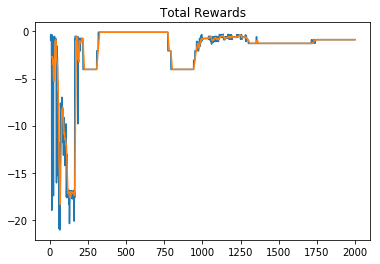

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)
plt.title('Total Rewards')

rolling_window = 10
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean)

plt.legend()
_ = plt.ylim()

In [ ]:
Test 5

In [1]:
## TODO: Train your agent here.
import csv
import numpy as np
import sys
import pandas as pd
from agents.agent import Agent
from task import Task

runtime = 5.                                     # time limit of the episode
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
num_episodes = 1000

# Test cases
# target_pos = np.array([0., 0., 10.])             # hover in place
# target_pos = np.array([0., 0., 0.])              # land
# target_pos = np.array([10., 10., 20])            # move
# init_pose = np.array([0., 0., 0., 0., 0., 0.])   # takeoff

# Test case: Takeoff
# init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial position(x, y, z) and Euler angles(phi, theta, psi)
# target_pos = np.array([0., 0., 10.])             # target position

# Test case: landing
init_pose = np.array([0., 0., 10., 0., 0., 0.])   # initial position(x, y, z) and Euler angles(phi, theta, psi)
target_pos = np.array([0., 0., 0.])               # target position

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = Agent(task)
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
scores = []

def run_episode(i_episode, is_validation=False, writer=None):
    state = agent.reset_episode()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state

        if is_validation:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            if not writer:
                writer.writerow(to_write)
        
    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(i_episode, agent.score, agent.best_score), end="")
    sys.stdout.flush()


for i_episode in range(1, num_episodes+1):
     # start a new episode
    run_episode(i_episode)
    scores.append(agent.score)

# Validation
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    run_episode(num_episodes+1, is_validation=True, writer=writer)
    

Using TensorFlow backend.


dist_reward: -1.5118389621306432, vel_discount: 0.8999999996087349, reward: -1.360655065326049
dist_reward: -1.5116965496099986, vel_discount: 0.8999999996076242, reward: -1.3605268940558455
dist_reward: -1.5114591814865128, vel_discount: 0.8592243093921776, reward: -1.2986824713872152
dist_reward: -1.5112607376269116, vel_discount: 0.8999999996042064, reward: -1.3601346632660731
dist_reward: -1.5112351331493743, vel_discount: 0.8999999996040048, reward: -1.360111619235995
dist_reward: -1.5113824274540413, vel_discount: 0.8999999996051636, reward: -1.3602441841118884
dist_reward: -1.5115692259539286, vel_discount: 0.8999999996066287, reward: -1.3604123027639279
dist_reward: -1.5116634646565932, vel_discount: 0.8999999996073658, reward: -1.360497117597403
dist_reward: -1.5116685228522413, vel_discount: 0.8999999996074053, reward: -1.3605016699735442
dist_reward: -1.5115877057916567, vel_discount: 0.8999999996067733, reward: -1.3604289346180944
dist_reward: -1.5114255711924764, vel_disco

Episode =    2, score =    -inf (best =    -inf)dist_reward: -1.5118389091023907, vel_discount: 0.8999999996087346, reward: -1.3606550176006214
dist_reward: -1.5116963374857222, vel_discount: 0.8999999996076227, reward: -1.3605267031439945
dist_reward: -1.5114587041683945, vel_discount: 0.8590691532264989, reward: -1.298447549126764
dist_reward: -1.5112599208520123, vel_discount: 0.8999999996042, reward: -1.3601339281686544
dist_reward: -1.5112339347663952, vel_discount: 0.8999999996039953, reward: -1.3601105406913
dist_reward: -1.5113808066153247, vel_discount: 0.899999999605151, reward: -1.360242725357025
dist_reward: -1.5115670830256325, vel_discount: 0.8999999996066119, reward: -1.3604103741284368
dist_reward: -1.5116606533635086, vel_discount: 0.8999999996073439, reward: -1.360494587433595
dist_reward: -1.5116649329121614, vel_discount: 0.8999999996073773, reward: -1.3604984390274313
dist_reward: -1.5115832315053535, vel_discount: 0.8999999996067384, reward: -1.3604249077603705
di

Episode =    4, score =    -inf (best =    -inf)dist_reward: -1.5118387974308267, vel_discount: 0.8999999996087337, reward: -1.3606549170962123
dist_reward: -1.51169589077554, vel_discount: 0.8999999996076191, reward: -1.3605263011048254
dist_reward: -1.5114576989863662, vel_discount: 0.8587424316069525, reward: -1.2979528596986014
dist_reward: -1.511100401599923, vel_discount: 0.7899065196361292, reward: -1.1936280590485524
dist_reward: -1.5106001601212595, vel_discount: 0.7231225078720483, reward: -1.092348976178803
dist_reward: -1.50995700803227, vel_discount: 0.6590235559975041, reward: -0.9950972368367783
dist_reward: -1.5091952814048546, vel_discount: 0.6184441058920285, reward: -0.9333529264248936
dist_reward: -1.50834002726294, vel_discount: 0.5799581611092322, reward: -0.8747741085388637
dist_reward: -1.5073931432294145, vel_discount: 0.5438814581346997, reward: -0.8198431807218621
dist_reward: -1.5063571093854393, vel_discount: 0.5103134552025195, reward: -0.7687143012593631


Episode =    6, score =  -3.110 (best =  -2.258)dist_reward: -1.5118395614734133, vel_discount: 0.8999999996087396, reward: -1.3606556047345488
dist_reward: -1.511698947108811, vel_discount: 0.899999999607643, reward: -1.360529051804804
dist_reward: -1.511464576317839, vel_discount: 0.8609784437208092, reward: -1.3013384186572652
dist_reward: -1.511118844114876, vel_discount: 0.7987391674012425, reward: -1.206989807392644
dist_reward: -1.510644134956482, vel_discount: 0.7381132346860523, reward: -1.1150264289122422
dist_reward: -1.5100405088459756, vel_discount: 0.6796089740767277, reward: -1.0262370810311134
dist_reward: -1.5093057606306406, vel_discount: 0.6215731941138789, reward: -0.9381440025296648
dist_reward: -1.5084387282060625, vel_discount: 0.5673482165777249, reward: -0.8558100222644811
dist_reward: -1.5074428849416401, vel_discount: 0.5179572748666504, reward: -0.7807910087014936
dist_reward: -1.5063193743191667, vel_discount: 0.4706716712622271, reward: -0.7089818573654745

dist_reward: -1.4769627792284417, vel_discount: 0.2596359726487903, reward: -0.383472667751037
dist_reward: -1.4750940980877285, vel_discount: 0.29919958101538535, reward: -0.4413475361061161
dist_reward: -1.4734177427749824, vel_discount: 0.35762909469234605, reward: -0.5269370534522569
dist_reward: -1.4719871643487954, vel_discount: 0.4430343875286334, reward: -0.6521409318072784
dist_reward: -1.470860481884197, vel_discount: 0.5650851732178706, reward: -0.831161450184852
dist_reward: -1.4700993255719514, vel_discount: 0.733624735621735, reward: -1.078501229060414
dist_reward: -1.4697677385624326, vel_discount: 0.8999999991054559, reward: -1.3227909633914172
dist_reward: -1.4699301014152208, vel_discount: 0.8999999991082702, reward: -1.3229370899629183
dist_reward: -1.4706490694901917, vel_discount: 0.8999999991206299, reward: -1.3235841612479278
dist_reward: -1.4719823902960738, vel_discount: 0.899999999143113, reward: -1.3247841500051438
dist_reward: -1.473979673926046, vel_discoun

dist_reward: -1.5112055519280645, vel_discount: 0.8999999996037716, reward: -1.3600849961364756
dist_reward: -1.5113983446829606, vel_discount: 0.8999999996052888, reward: -1.3602585096180986
dist_reward: -1.5117179188454806, vel_discount: 0.8999999996077911, reward: -1.3605461263680232
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   14, score =  -4.069 (best =  -1.927)dist_reward: -1.5118422456199347, vel_discount: 0.8999999996087605, reward: -1.360658020466449
dist_reward: -1.5117096842807363, vel_discount: 0.8999999996077268, reward: -1.3605387152596595
dist_reward: -1.5114887376273156, vel_discount: 0.868845599608725, reward: -1.3132503385456398
dist_reward: -1.511282467293662, vel_discount: 0.8999999996043776, reward: -1.360154219966

dist_reward: -1.5112499576688845, vel_discount: 0.8795767435747397, reward: -1.3292603164938606
dist_reward: -1.5110139027456486, vel_discount: 0.8866674400084289, reward: -1.3397668289646294
dist_reward: -1.5107935715910172, vel_discount: 0.8950495933513869, reward: -1.3522351718904293
dist_reward: -1.5105949833110541, vel_discount: 0.8999999995989295, reward: -1.3595354843740937
dist_reward: -1.5104356746619603, vel_discount: 0.8999999995976566, reward: -1.3593921065880505
dist_reward: -1.510353235131987, vel_discount: 0.8999999995969965, reward: -1.3593179110101108
dist_reward: -1.5104150430506462, vel_discount: 0.8999999995974916, reward: -1.3593735381376268
dist_reward: -1.5107173944136245, vel_discount: 0.8999999995999048, reward: -1.3596456543678312
dist_reward: -1.5113783928918556, vel_discount: 0.899999999605132, reward: -1.360240553005875
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_disco

dist_reward: -1.5111361500612603, vel_discount: 0.8999999996032241, reward: -1.3600225344555519
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   27, score =  -3.955 (best =  -1.927)dist_reward: -1.511844667701074, vel_discount: 0.8999999996087793, reward: -1.3606602003395016
dist_reward: -1.5117193731675016, vel_discount: 0.8999999996078025, reward: -1.3605474352578588
dist_reward: -1.5115105409664173, vel_discount: 0.8759599907373611, reward: -1.3240227594643665
dist_reward: -1.5112392134918173, vel_discount: 0.8557345872021409, reward: -1.2932196645211085
dist_reward: -1.5109265984097355, vel_discount: 0.8357927017574488, reward: -1.2628214238420647
dist_reward: -1.5105746860279425, vel_discount: 0.8177567386775968, reward: -1.235282628775145
dist_reward: -1.5101926755440527, vel_discount: 0.806895800873241, reward: -1.218568128406

dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   32, score =  -3.503 (best =  -1.927)dist_reward: -1.5118446501108527, vel_discount: 0.8999999996087792, reward: -1.3606601845083024
dist_reward: -1.5117193028375828, vel_discount: 0.899999999607802, reward: -1.3605473719609311
dist_reward: -1.5115103829346332, vel_discount: 0.8759085139788999, reward: -1.3239448133799525
dist_reward: -1.5110367926752355, vel_discount: 0.6667833521530379, reward: -1.0075341778465685
dist_reward: -1.5101173699685253, vel_discount: 0.48617417617532394, reward: -0.7341800682724946
dist_reward: -1.5087555171835012, vel_discount: 0.34414111218251653, reward: -0.519224801695038
dist_reward: -1.5072113248476908, vel_discount: 0.36616968079686, reward: -0.55189508971

dist_reward: -1.5002022982186682, vel_discount: 0.2505332094705114, reward: -0.3758504966277602
dist_reward: -1.498306658245939, vel_discount: 0.28335247746230735, reward: -0.4245489036122575
dist_reward: -1.4965972707221806, vel_discount: 0.34389905859275327, reward: -0.5146783924938418
dist_reward: -1.4951639224078974, vel_discount: 0.4440061832673217, reward: -0.6638620265473285
dist_reward: -1.4941056933198422, vel_discount: 0.6069736698236694, reward: -0.9068828157787826
dist_reward: -1.4935310733360656, vel_discount: 0.8507559443774745, reward: -1.2706304387531275
dist_reward: -1.4935580550913574, vel_discount: 0.8999999994381251, reward: -1.344202248743029
dist_reward: -1.4942974114529206, vel_discount: 0.8999999994462465, reward: -1.3448676694801562
dist_reward: -1.4958293813070327, vel_discount: 0.8999999994627137, reward: -1.3462464423726408
dist_reward: -1.4982301877558357, vel_discount: 0.8999999994875694, reward: -1.3484071682125132
dist_reward: -1.5015282734634923, vel_di

dist_reward: -1.5058287343678067, vel_discount: 0.8999999995591066, reward: -1.355245860267116
dist_reward: -1.5104745997259759, vel_discount: 0.8999999995979681, reward: -1.3594271391461192
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   39, score =  -2.793 (best =  -1.918)dist_reward: -1.5118473700412598, vel_discount: 0.8999999996088004, reward: -1.3606626324456996
dist_reward: -1.511730182902927, vel_discount: 0.8999999996078869, reward: -1.360557164019865
dist_reward: -1.5115348627527525, vel_discount: 0.8839090009405163, reward: -1.3360592704225458
dist_reward: -1.5109635368286254, vel_discount: 0.576631360229182, reward: -0.8712689594981861
dist_reward: -1.509718216776959, vel_discount: 0.3435816077187481, reward: -0.518711412122509
dist_reward: -1.507803312134591, vel_discount: 0.19389944049060218, reward: -0.292362218592774
dist_reward: -1.5055193421764272, vel_discount: 0.18215313543046063, reward: -0.274235068628640

dist_reward: -1.5110189712946895, vel_discount: 0.6075877097659168, reward: -0.918076556181792
dist_reward: -1.509881470219904, vel_discount: 0.38526379106420017, reward: -0.5817026592745085
dist_reward: -1.5081428032400424, vel_discount: 0.23383670723462238, reward: -0.3526591471492445
dist_reward: -1.506074928970404, vel_discount: 0.22161911424639602, reward: -0.33377499174712477
dist_reward: -1.503972162432706, vel_discount: 0.2209316254436598, reward: -0.3322750144682737
dist_reward: -1.5019008780589038, vel_discount: 0.23528262906740388, reward: -0.35337118718834126
dist_reward: -1.499924156724708, vel_discount: 0.2615736867715005, reward: -0.39234069155211576
dist_reward: -1.4981166614636647, vel_discount: 0.3151834163975625, reward: -0.47218152752222836
dist_reward: -1.496574347286248, vel_discount: 0.4061597189586044, reward: -0.6078482162944394
dist_reward: -1.4953807453829842, vel_discount: 0.5433200716758411, reward: -0.8124703737641555
dist_reward: -1.4945996350152577, vel_

dist_reward: -1.5004348513647008, vel_discount: 0.8999999995094097, reward: -1.3503913654921318
dist_reward: -1.5051366085748765, vel_discount: 0.8999999995530139, reward: -1.3546229470446138
dist_reward: -1.5102970415562087, vel_discount: 0.8999999995965459, reward: -1.3592673367912522
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   44, score =  -2.956 (best =  -1.902)dist_reward: -1.511851321061672, vel_discount: 0.8999999996088311, reward: -1.3606661883641156
dist_reward: -1.5117459876248103, vel_discount: 0.8999999996080101, reward: -1.3605713882697401
dist_reward: -1.5115704257392886, vel_discount: 0.8955604918580294, reward: -1.3537027539531283
dist_reward: -1.5113248522052798, vel_discount: 0.8613727248645622, reward: -1.3018140060

dist_reward: -1.5087961331407236, vel_discount: 0.8999999995843277, reward: -1.3579165191994866
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   46, score =  -3.175 (best =  -1.902)dist_reward: -1.5118537386066677, vel_discount: 0.89999999960885, reward: -1.3606683641546393
dist_reward: -1.5117556583180596, vel_discount: 0.8999999996080856, reward: -1.360580091893775
dist_reward: -1.5115921877706198, vel_discount: 0.8999999996068084, reward: -1.3604329683992125
dist_reward: -1.5113633694086728, vel_discount: 0.8706515278270563, reward: -1.3158708266775088
dist_reward: -1.5110692656825604, vel_discount: 0.838898147456547, reward: -1.2676332076596248
dist_reward: -1.5107099413501546, vel_discount: 0.8075372293887109, reward: -1.2199545204478857
dist_reward: -1.5102846239942171, vel_discount: 0.7758131497626085, reward: -1.1716986711789

dist_reward: -1.5067997728454516, vel_discount: 0.6345438587009664, reward: -0.9561305421510925
dist_reward: -1.5060034035967154, vel_discount: 0.6142158952178176, reward: -0.9250112287412368
dist_reward: -1.5051627462017265, vel_discount: 0.5974448335092204, reward: -0.8992517063087715
dist_reward: -1.5042858035842785, vel_discount: 0.5843945516868163, reward: -0.8790964277944767
dist_reward: -1.503383475532745, vel_discount: 0.5769710196240725, reward: -0.8674086967641098
dist_reward: -1.5024713284516422, vel_discount: 0.5767844354684147, reward: -0.8666020769884596
dist_reward: -1.5015671238726593, vel_discount: 0.5838507366758647, reward: -0.8766910714413116
dist_reward: -1.5006945300786003, vel_discount: 0.6031816672575089, reward: -0.905191428697034
dist_reward: -1.499887095397976, vel_discount: 0.6388665346627922, reward: -0.9582276710223457
dist_reward: -1.499182179358693, vel_discount: 0.6921006551054617, reward: -1.0375849684565852
dist_reward: -1.498627467267156, vel_discoun

dist_reward: -1.5095869346535657, vel_discount: 0.5919588826681488, reward: -0.8936133951279605
dist_reward: -1.5086594168630278, vel_discount: 0.5470964442964289, reward: -0.8253822026200864
dist_reward: -1.5076734884850898, vel_discount: 0.5451989631501656, reward: -0.821982022691064
dist_reward: -1.5067444005297226, vel_discount: 0.5935319105230207, reward: -0.8943008827162697
dist_reward: -1.506033482840774, vel_discount: 0.732787975676335, reward: -1.1036032271916711
dist_reward: -1.5057247848706146, vel_discount: 0.8999999995581968, reward: -1.355152305718319
dist_reward: -1.5059585675240634, vel_discount: 0.8999999995602406, reward: -1.3553627101093977
dist_reward: -1.5067502381915423, vel_discount: 0.8999999995670936, reward: -1.3560752137201064
dist_reward: -1.5079536795984767, vel_discount: 0.8999999995773132, reward: -1.357158311001237
dist_reward: -1.5092983353433134, vel_discount: 0.8999999995884553, reward: -1.3583685011878384
dist_reward: -1.510590811921003, vel_discount

dist_reward: -1.5060578844767414, vel_discount: 0.5321947392692554, reward: -0.8015160831535058
dist_reward: -1.505203380701483, vel_discount: 0.6724975443860705, reward: -1.012245577323359
dist_reward: -1.5047542716285403, vel_discount: 0.8952721534796978, reward: -1.3471645972186574
dist_reward: -1.5047882887751323, vel_discount: 0.8999999995499169, reward: -1.3543094592203393
dist_reward: -1.505223650205871, vel_discount: 0.8999999995537846, reward: -1.35470128451363
dist_reward: -1.5058335897784536, vel_discount: 0.8999999995591491, reward: -1.3552502301367602
dist_reward: -1.5062928232417283, vel_discount: 0.8999999995631468, reward: -1.3556635402595267
dist_reward: -1.506456736598218, vel_discount: 0.8999999995645651, reward: -1.3558110622824324
dist_reward: -1.5065858999628925, vel_discount: 0.8999999995656797, reward: -1.3559273093122624
dist_reward: -1.5071751813729621, vel_discount: 0.8999999995707293, reward: -1.3564576625886797
dist_reward: -1.508709580439461, vel_discount:

dist_reward: -1.5008492436796361, vel_discount: 0.8999999995134128, reward: -1.3507643185813785
dist_reward: -1.5019667513864259, vel_discount: 0.899999999524051, reward: -1.3517700755329236
dist_reward: -1.503311998425271, vel_discount: 0.8999999995365582, reward: -1.3529807978860462
dist_reward: -1.5049755527033257, vel_discount: 0.8999999995515845, reward: -1.3544779967581388
dist_reward: -1.5071369972461501, vel_discount: 0.8999999995704039, reward: -1.3564232968740748
dist_reward: -1.5099664966331514, vel_discount: 0.8999999995938853, reward: -1.3589698463566167
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   59, score =  -3.453 (best =  -1.902)dist_reward: -1.5118727760072384, vel_discount: 0.8999999996089981, reward: -1.36068549781

dist_reward: -1.5071989993991983, vel_discount: 0.8999999995709322, reward: -1.356479098812588
dist_reward: -1.5098837935033864, vel_discount: 0.899999999593217, reward: -1.3588954135388527
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   62, score =  -3.504 (best =  -1.902)dist_reward: -1.5118775845205068, vel_discount: 0.8999999996090357, reward: -1.3606898254773658
dist_reward: -1.5118510452350562, vel_discount: 0.899999999608829, reward: -1.3606659401201584
dist_reward: -1.5118068303475178, vel_discount: 0.8999999996084845, reward: -1.3606261467208702
dist_reward: -1.5116186633674116, vel_discount: 0.8405120492632058, reward: -1.2705337004514512
dist_reward: -1.5111611196591381, vel_discount: 0.7138367047754169, reward: -1.0787222740422087
dist_reward: -1.5104406771966263, vel_discount: 0.6012294116861882, reward: -0.9081213597378153
dist_reward: -1.5094772522663447, vel_discount: 0.510367914099546, reward: -0.7703887566198

dist_reward: -1.5045431394944133, vel_discount: 0.8999999995477247, reward: -1.3540888248645042
dist_reward: -1.507166974728173, vel_discount: 0.8999999995706593, reward: -1.3564502766082678
dist_reward: -1.5104609686879082, vel_discount: 0.899999999597859, reward: -1.3594148712116991
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   65, score =  -3.480 (best =  -1.902)dist_reward: -1.5118819133132937, vel_discount: 0.8999999996090693, reward: -1.3606937213909231
dist_reward: -1.5118683605706225, vel_discount: 0.8999999996089638, reward: -1.360681523922365
dist_reward: -1.5118457906382217, vel_discount: 0.8999999996087881, reward: -1.3606612109829475
dist_reward: -1.5116920067218462, vel_discount: 0.8613249122982328, reward: -1.302057985111

dist_reward: -1.504203153098314, vel_discount: 0.8999999995446674, reward: -1.3537828371035698
dist_reward: -1.5046167311200325, vel_discount: 0.8999999995483839, reward: -1.3541550573285202
dist_reward: -1.5052302754270133, vel_discount: 0.8999999995538432, reward: -1.3547072472127433
dist_reward: -1.5059475981685675, vel_discount: 0.8999999995601449, reward: -1.355352837689312
dist_reward: -1.5067477930523325, vel_discount: 0.8999999995670727, reward: -1.356073013094787
dist_reward: -1.5077368223497967, vel_discount: 0.8999999995754892, reward: -1.3569631394747663
dist_reward: -1.5090779492869024, vel_discount: 0.8999999995866489, reward: -1.358170153734433
dist_reward: -1.5109073699255893, vel_discount: 0.899999999601414, reward: -1.3598166323308039
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   68, score =  -3.654 (best =  -1.902)dist_reward: -1.5118851237529372, vel_discount: 0.8999999996090943, reward: -1.36069661078663

Episode =   76, score =  -4.082 (best =  -1.902)dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   77, score =  -4.082 (best =  -1.902)dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
Episode =   78, score =  -4.082 (best =  -1.902)dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.3606977877676325
dist_reward: -1.5118864315095801, vel_discount: 0.8999999996091045, reward: -1.360697787

Episode =  101, score =  -4.082 (best =  -1.902)

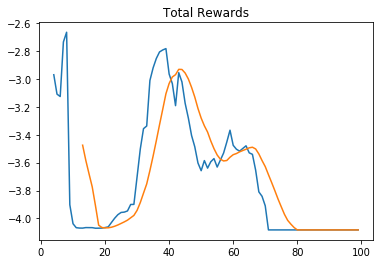

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)
plt.title('Total Rewards')

rolling_window = 10
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean)

plt.legend()
_ = plt.ylim()

In [ ]:
# Original

In [16]:
## TODO: Train your agent here.
import csv
import numpy as np
import sys
import pandas as pd
from agents.agent import Agent
from task import Task

runtime = 5.                                     # time limit of the episode
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
num_episodes = 2000

# Test cases
# target_pos = np.array([0., 0., 10.])             # hover in place
# target_pos = np.array([0., 0., 0.])              # land
# target_pos = np.array([10., 10., 20])            # move
# init_pose = np.array([0., 0., 0., 0., 0., 0.])   # takeoff

# Test case: Takeoff
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial position(x, y, z) and Euler angles(phi, theta, psi)
target_pos = np.array([0., 0., 10.])             # target position

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = Agent(task)
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
scores = []

def run_episode(i_episode, is_validation=False, writer=None):
    state = agent.reset_episode()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state

        if is_validation:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            if not writer:
                writer.writerow(to_write)
        
    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(i_episode, agent.score, agent.best_score), end="")
    sys.stdout.flush()


for i_episode in range(1, num_episodes+1):
     # start a new episode
    run_episode(i_episode)
    scores.append(agent.score)

# Validation
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    run_episode(num_episodes+1, is_validation=True, writer=writer)
    

Episode = 2001, score =   1.033 (best =   2.691)

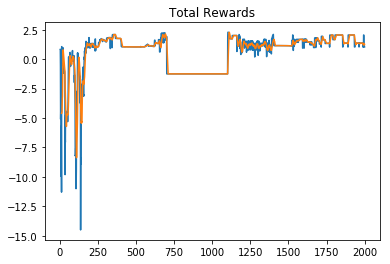

In [17]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)
plt.title('Total Rewards')

rolling_window = 10
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean)

plt.legend()
_ = plt.ylim()

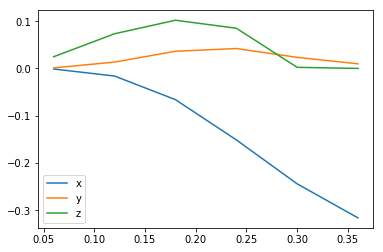

In [19]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

Text(0.5,0,'z pos')

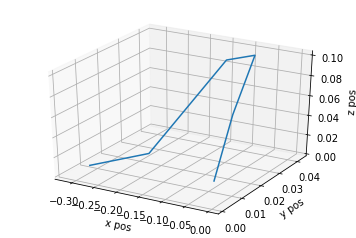

In [20]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.plot3D(results['x'], results['y'], results['z'])
ax.set_xlabel('x pos')
ax.set_ylabel('y pos')
ax.set_zlabel('z pos')

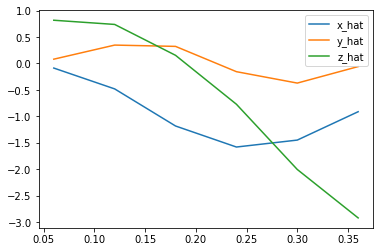

In [21]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

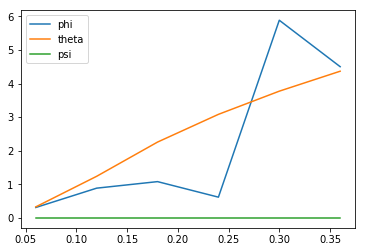

In [22]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

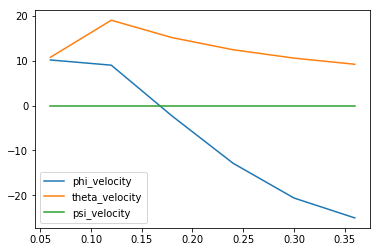

In [23]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

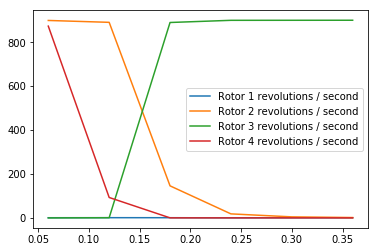

In [24]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: No update, except the reward function. The reward function is designed like this:
1. If the current position is witin 1m from target position, get +10 reward
2. If the quadcopter is getting away from the target position, get -(dist / initial_distance_between_source_target) reward.
3. Otherwise, get 1 - (dist / initial_distance_between_source_target) reward

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
1. Used DDPG(Deep Deterministic Policy Gradients) as learning algorithm. 
2. Choice of hyperparameters
 1. Actor learning rate: 0.0001
 2. Critic learning rate: 0.001
 3. Replay buffer size: 10^5
 4. Minibatch size: 64
 5. Discount factor: 0.99
 6. Soft target updates: 0.001
3. Neural network architecture
 1. Actor/Critic hidden layer: 2
 2. Hidden layer units: 256, 128 respectively
 3. Activation function: relu

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
1. It was not easy. The reward plot is dropped rapidly sometimes, and backed to normal.  
2. It was gradually learned till 500 episodes.
3. The performance between 0 and 100 episodes were unstable. The mean rewards were -15 ~ 2.5 range. But, the performance is getting better between 100 and 500 episodes. Then, eventually the mean rewards were stabilized at 2.5 after 500 episodes.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
1. Defining reward function. There are lots of given state information, such as pos, angle, velocity, so on. But, it's not easy to how to combine them and making a good reward function that can cover general cases.
2. No.